# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [12]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

def BGR_to_RGB_numpy(arr):

  rows = len(arr)
  columns = len(arr[0])
  result = np.empty((rows,columns,3),np.uint8)
  for i in range(rows):
    for j in range(columns):
      result[i][j][0] = arr[i][j][2]
      result[i][j][1] = arr[i][j][1]
      result[i][j][2] = arr[i][j][0]
  return result

def RGB_to_Grayscale(arr):
  rows = len(arr)
  columns = len(arr[0])
  result = np.empty((rows,columns),np.uint8)


  for i in range(rows):
    for j in range(columns):
      result[i][j] = 0.299*arr[i][j][0]+0.578*arr[i][j][1]+.114*arr[i][j][2]

  return result

In [13]:


b64_str = """/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAJ2AnYDASIAAhEBAxEB/8QAHAABAAIDAQEBAAAAAAAAAAAAAAQGAwUHAgEI/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/2gAMAwEAAhADEAAAAegDz9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8PrH5MzB5SSi/Klon0lI/uMrx7UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYzJ5j4rJWLB6r75zZCIne4gfZwhJog/J41/nZfDXfZ2OsOXHjJ3rW+4no8iUAAAAAAAAAAAAAAAAAAAAAAAAAeT14i4LM+LNIqJmko8+iV4984s2dW6lV9TLN20SWgdP4/wBRs1FOsV7MOYxoB85/sbLXhkeogfJuDT7Ig+icw5c36AAAAAAAAAAAAAAAAAAAAAAwxrMkbLJrDL+shjXTazR9M1Oe7+byDU7nxvpOgi+MGfGmp+6qyobLT7fpnomTm/SOeglfPukOe9Q5N0Lpmw8x31bL1vfn3nrxFmk1meVC0nfdZOjKJQAAAAAAAAAAAAAAAAAAHjxr7M7LKrHCw8lO4fY8jNVuyRk452ng/VuksvEu20XN19c3Nz1Kta+Q66y033SWrN591CqXOXhHVYMSy+vn3GnPLlzjUtFw1OwOUWflfbdSNQtfcjYebnW82xq9YsouGbgr5L1+ckvn2UAAAAAAAAAAAAAAAABGzQLPefxLDWV0uvMrjtDnPTuB9J1LnjyVTF1et+2npLDT/FkzcW68Y4zI3gm/IPwnfIPyp/rXI2TX+yTWrBmItM6BAONdK1cnch3+iX3Nc8snDNTq930tPl1nQ6N0tJOu2mHNxS4GQliUAAAAAAAAAAAAAABj9Q7McjHOpo8fKS+6LpOOuP8Acef9Ain8o/Q/GdToFR312l0e8x4MsuLGr75kZiJ7lIwesqXw9jx5yiP4lrIGOeImfzhrYY4UiKVvLBoq5BerfzvU+aqB26yTnOWwMELaYLPWXXTDKJQAAAAAAAAAAAABhMHhI1M/1yiOp8quVkrju91XneZ1c7HCl5X0aJd4YMGLN9fZeUxZSUACn/NTF6Zsk/jEizu1f5HHOl7HlW2Om1CLeM3d5PX3GouOdhswSYfqp1CvXuKNeahTtTsCiXvNK1p6sW74Z2gx/ZkInfYczNAAAAAAAAAAAAAa6XD1M8vzGyrOTTdG01vjUwC9c9uNOKF2XTXGzzE9eZfsr16gJQEHJxvUsmsgQumYe9kV2zfayw/JaptK/urJEj7Dja6T7IL1cuN9B56sYzpEljVbHHH1NhQLt5in+ct301VP8bBJFxrkKW4R6Zeo12wh/amjNAAAAAAAAAAAGIiSImz1FNt2SORS+h893LVZ+Q2mWwcjvNkTaQMuKVPxZYCUBCm88s18DDX+uLBl1fhZsH3Os1su0U6IubF9rcwfWWMW9ruGrJqJGujrdh4T3Tnv0M1DmCBMjYtTY0G/eI5pZrRVa9c58dF3NP0DI53xrtpCJfqJLgFAAAAAAAAAAQpeuszzMf2KPPx6DpOm+uEWOLfzq9eSB0DzFzY+xwSwJQANRyqy6fpj5psE7Usei0HutpGlSCVrLJFl12o2OayJYNViIew02Qk76XWpcfRKRs46wOWwPELYY7McjV7M5VWesQ9zZ73FWcW1wuWxtToe/wCXdXl1uy1swzDNAAAAAAAAAAwRcv3Ulx5HKY6tXtNjqyUrpvqOGdJ3M3Rr5HyJfozQAHn1Vkqcr7Tu2d/utVijzWLR7rXWrzXoq9si2uqd9lRU3Vcn6Y29ZsXyve1+aWXS3bHSbP0iw5uHQACDkyw9TY896BXI5nYt5c9znV8rdkzdDtddV6v7NDjZDNAAAAAAAAAfPvggyok/U96tOipVrrCuRWGzVLU3tk18zFiTIexoM0B888ps3Wl2mq6ZhbbVaqr9XZm8jne/2deqBsE9JuHNAlz4dvVTS7/aV+zf0+zeCLtqLt66Pye96LNx9s4XYzqzBn5bAa7YxLMmaHNOS9X5hh1LZEu7Np+72o867Z68mZI8iAUAAAAAAABhzRUwbGDOrmO7lWmoPJd1Ps1F1sNLW6Q5mvyyTI8gCUCpUW/S955LJ7NGrnPUKdpIwQp101NFuJtZlmVrabcqU/YbetbAuGljX3KJzyLlsqNDMWk6dQdyJrLrqrNrKhUuW+dV4b0jFtQxpiy/DX7DXTtTJy3qXKS4b9pI5vstn0XchfdRusXxMgTwJQAAAAAAAEOZBs9TIso57D6DUtTWdLh45ZlS5l3Cydrp0KWdk+fc0AAADnlyrcHpnmvUef8AZLK5afWwxrn1gU/U3tg57Z43mkj+DJC3nivsOuXyKzzm1aHedvl18lelxrI5a55lvygzQNfIxetSXUbdQ4vnK99Rdzouz2WjxdBeqvaqh7HW7GPolAAAAAAAAQJ8CzNJjSQJQNVtQww5kPU2QzQAAGg39HsmVq0V7ctmzzZcVqtrVCPXttXN5umlkeV1e02W8ir1i52IrUeXUiv2CXG3NR2jkvY8UMaAAAhvvnUmjN0uxkgBjyYyDsNfsNT0M0AAAAAAABAnwbMsmLKAlNLsUkhcMOdB1Nj9+fc0AABRrzQtSzzvFIJFyrO+NhULFKjnuXTyumZsnU7yWHYdfiiwbLnKMdTk2Xc8R71QJdt0LUbfFCUAACG+etSWM0ABiy4SHsddsbPolAAAAAAAAQpsWzzMgzhGkpfzp0adYemdsOevOu2eusm5MGeUAABGkiDpLTU7LZr4GlLHrNjqa0X3ZaXeclj18SXBu8OoNtvKjv4jQZO1J+2rNFluu64B2Ky3DGgAB8IEiLN1MozdTz25ca6Z77O0e851gzxiPsYM6glAAAAAAAAYM+MhbHWbGz0JQAEOZhswzNdsQJQAAMer0GXUmWHV7mPmn3NZMWgzbLc0cnf1Ixxtjks0vTdpkxqLTc3J9SRktlI3na4ZO0OpT+S9a47CUBiyxEj7OFNoJXn0AEKbr7MsuPIAlAAAAAAAAA1szB61JYzQBDJjSbs1k7D51JozRTEsM7hN03Oja2Tos3xaa9YSkXek2khVzJXNzc+IGeydsav1fNrdka7Nn8y1dY3nPE2ep6Z9+As2+runzcXf/wA/9Olv6Nk5bytNuRrpcPUlxthQYu0iiXo+iUDzrpkXUm5DNAAAAAAAAAAjx5+t1Nnj+Yc3xN4R1LUsyo6CJVv5f1jUla3aQs2TkgzT7zvolZNjzLf7zUrFjqXTiUMa0GtuKyqWTOI3IOs8I3O/SEDnrxxOZ9640s3d1HUCwfT3juO8l1umh7eLPZ+CXfNm9M+x8awZY2zrDS8FlI+01WoL451uotaPIlhsE7UyjNAAAAAAAAAPkUlwpuKzBM1005t56Wr76+/M3HWbPoNSXt+c9HjXZ/uKpzDmzdRrrQsjyCUABDmcfs2VOg9C646Rxi7UfOrBElarUk0ebZbKakSLNfM21dW46rRoCzYbHU9uzqdi+e+esshWY0G22M6th5izM2qUXsvjU9Yc0GPOxjSQ0+eXYgAAAAAAAApM6DctSvWXRb2IHvLHqfzPo3mOd73m3UNyJpem13Nw4PO5rcRtFZctZso2Op7BnzQAAIv54/SP5+6Zx9U5le7NFua5vD1tJFZXV7XBVbn10Hn91XT1T151BuE3FctHRsaj7D7ixcsp8lwcj3du1Mmtp+7N5I3WhzdjsOe9AMUPJ7qX9Qc3W63f7OyDO1+wlAAAAAAAA8YJVRTzuNpU9LhCm4oiz4GcxepdBJmCPftPNC1u+Sv9Bm8wOrwprFgSvELTaocvL6FA+fnn9D8v3nXajTb/AKZs9rq2txqR4otz1Is3d0iM+gtDUrkf7Y6rl6u22537gZM6x7Dx7jzSJNY1Oi+Z3OZel1rbSIouTfbCp8STChOwSRU9tkqh7+fmrdDFAAAAAAAAaraim5bbWNSxZeY9OjDB2kOpWOPLjTc56/zDU21hnc6Pc2fcwQca1u94n0Ped/izZZccmJ4Ngh5YcL7VVNTlu06ZX9TJzi2zqonUa10CKPrrlYo4tauq45dVt4+OXJ89SiPLjVeN3UstvquSuX941OMdYh6GLzyi96GW6ZUTLFmxTtPRpM3WaHpla3PFo1e0yCUAAAAAAAADzqNzrkolmmRtLGpd0y1/qVF0nYo8vLmubozTHkM1zqbrd5tcXxUjbdDq28zZeKg9FIXmf4IXqR5rx68/DIw+SR5w+j1jyZCJ6m5CJJ86uNtXqZaKqtz2k0qO8+8qs23R9Py+u617mnWs2odBR48YMmWs/ozWl3QpFxyLPQlAAAAAAAAAAA0dR6VC1MDW5iwY9NvctZmmQdJ7Xzo9VmzRo4v2WiTtyXH5/wBULBT5tPWwXWu2LLmd35V2XUg5abZZd25XZy2uZ7+La5ztC5KnbIUq68g0usHc7s07eIpd0ou+reUy5suMdVqFx3IO++Q83LBzy685jNVOFl1LVK5d1CPolAAAAAAAAAAAAApsa9+dSNrNDdzLj0e9yifJ8LTNn1siJWl3SXXaDfaLUlam88zL1l+1s8z9XHq/evuLF5F2Ljt26ZzZdfuc2LOqGCytdvrFnlVqy/M3ntP7TK1mqWul3SWt8969S9S3zcGfGnjHDsy+fU2sOczYVcXDU1ddy3E8+jNAAAAAAAAAAAAAAefQq1iz6KzR2XZUirfKhQY28PYDWyvsatg1siPNA6T6NbR+k6U2vGOzc4s6drsESXX3Om2+oOarXE4xaaR2XU1Vo/PvZct7Cm/M64lfLd71K1ZnzL6j4KkxPWWsEv37gx4pdRE11m1I+u2G/K9YTIFAAAAAAAAAAAAAAAAg49l4KTn3/N95vNi19bzbp5q1riPgn+agZMuKs2WCNgg5Ila2X7irwrv9qmW/KKDc5Q0E6f4MyPjJeOL5M+L5mrF7kZIw5mnjcarSWOtVqoHrctNbuU3Nw5jNAAAAAAAAAAAAAAAAAAARZQqM7eVXc92vQ77JHyc/OiKhaY94488i45ytf82HwgJ3moaYIaYIfyf6iB7miNlyIBUSXS7LpTblV6s1P97kw7v6zQAAAAAAAAAAAAAAAAAAAAAAAKnsd1otTT5bXRybY9fOKxZIOlN/vK57iwKfNLGqmcsiq5yx4tbr6zzqpYzdDNol4rtk1Put2TNol59LAlAAAAAAAAAAAAAAAAAAAAAAAAAAefQjQduMVJvazT6m2iLi1O8NVNzZiqXHXbGuWdOxySmbGxICUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD//EADIQAAIDAAEDAwIGAgEEAwEAAAMEAQIFAAYSExARFCBAFSEjMDFQIiQzJTI0NRZBkGD/2gAIAQEAAQUC/wDxKmfaO+OyLxI6E7xBJ5Brk8lFiSWi5PJASeSRE77UvFrRaJn+/mfaL39hzebAifKqH9RRb/NZP811ImAqVtUStLUGrSRjVpNKKVmtVIn2T/Pin+V1pmxQkm5aF7id0TP9za3tTu8gQz5llZ7gq1mo1x+OohwOK1isfs1rFeCHAqAF4qK17aKR78XvN7jJF7f2sW7oDfzUUn24vW1LiF2TFYj1taKVLvUmxeoXJ50+605XbHNkKkm/BUgQ+pSRTOz8hl7ghwIX0fzzs/TiviAGPAur+QwEktYn3/sfePcZZ8tP0WfFMMdsd/0779iMLLjWD1Dmy3RUFFga0/8ATce3m0tB4SI1847jX07Z/A/jPOuUvatK8vWL1PW0iNPhBX2XAK0yP+uuXsKaPEUo/JPt66D3g5K2seIZ1FHM3WC7Np9oWit2/XW/9bkloRhpuQWHeL0+ieXbn5CYoAteYitL0rTOu9b0msTwwpJdi03sS8Br/VkvA6sRNq/4sgHWfH6ktFKYDPy9fmqHzoGZ/wAU27NZZSjjEATyh5pufCUI18vAxVfHq7iUAH03pfn9GwS1EFUBn2apMLc0WiXXjLEy3Ee0evbHvUcyaL2Mfvr3/wBRf37RX81F63pNaxXjjYlKR+cenUMzXJqb4bNLRevNjPsu90gX3htcwOYWj8VcusiOu86RtnTrC2Dlz2azQYYXKkRe2I/DyvruFMV/CCPv51Qz5XenSEanY1KoVZdfYIDFmK1YZyyxyfziY8IgU8dAEkv9P5K+Se5a8iixeaV2qBE9fzrlg4PRgVTgqM1D4JbWT51YDvU6QHPydND5Ev8AfEjEQtsPGsImgj83kYA6FrExVvCGyYXT3hJ6NuAUrUtH08oHxkDXgQr28nFa0zcqrpDaHS6dvbnUFYvm4RLWQ53R3GH5OGJ2cp+iL+kPeRwSlWBi7rD9dVT4WjmaFEn/AEveB0IS5A31Kj0BEoWvUxosDJU+Elyfz9ff8omJitovEWi30XHUkNYah+JjIJff0gzAgCY1uoCWqu4mBxqsRWvNJ+xnel63jhL1HTQ1bM6Gfojantjuilj380eb+ivEzURprIg+O/HXgpw9slW5l6I9AbAqnCwKUTdOaPyhc6kagGf0kz7EcxFGbD6fqPiaIFOWtFYLfsoS8+D3m6ov1FFf8lkf+FD/AIUf+1T+V5mxREtY1S9xe6O7h01zybp6KE6kGT4PSga+Dmuz4F4iZnHV+Cg/oB0W87Ph+Pig7+Fra1P01hgte0f0Fr1rJR3HaOw1eaT9U4WyDlLpJOIx0+Sw9XnUWf8AKXUPZViNpKVhoubLCWWqpfhb+OhpmwP+dYE+VZas+AA5GMQ/HUdIHFaxSK1ivK1ivKUinBD8fAjmnFqzFlv8yivNz1LFicJSpKJ9+IVnYTCPQcI8zgZEjtva8sTnIfP4AVAB9bira9yXNavtSv30z7R+mzQMEpbmvo0QDV69dJNira2hSLo9N5sDj02le7XysMS/pe3bSf1gAt5RKxasBF4oisV/btetOVivsIfhGtXsor73kZO+0xFoJkIkt8cKo9bc+ULPSI6dFUaYPpJM0qIM+9CVv99c/YS4e+fQlKkjcyqqEC+JB3dZM2B9X8JULqtWtTZfpzp75Fl+VvBKr3mLiHYZopWL/TG5Uhb7whTXfRnlNdG/BlGWttxCvGOpBxwdtZqsZgO1tkeUyAnmDasWqSJqCPZddf3gdLxevNnDqbnS5A0U+n8QH+JcKO5L2IMER94Xu7KFqXghQL0t1ExVlDZXcJasXruY/wAa2VLK1EzBbWayVGYz8EazPPNMHvSRFsOLX+vYrGcaN4hgtEGUvwjfEXYMKsivXjLF2JWIjUawcYtg5CFIiPaPQg4vxnuvJbwAdPft5tZMNVHtvK3zdlhw/HNhVaT30HFADleVZvZe0e8VGMFQl8tvuyWKO9fGeObjJLWzsRdajx/hqKaCzXpr5N6WSdMmfLIyUFrRXjFbxP8AgyKle2v0ttCUGbeOxfQE/Vb4p/FjlHcOgnXKPVA8pCocI/xfQHLmwdtVt8TmZ+EieXXccziZ26Fifo8P602k5e+vfzcQVqyTaSTrC2hp8SQXTjR0FznRz6s29CCre1j+819+37klbWrUpKWiPbjR6rr9OFqZ3nURu1LOwKBnQm8JYWz38VxYroWntrFqMjB30tWsV+pk41gtWZ1TLazCq5PmN0Qe0GnIWJcHl/EMFlwdcPunsMNhsWsgECb+fAlVyNZZAseI7KCxFcFv5SH0X/SGEfj4Enk40CjIMTJlQ/NfTIyHLr8gN9dfuO814+n9PzT/ADwl6AgMltb7kgyRcN7Wjm4s29ZhWPHk7pKcR7H2eal4HnYiN3GuWNNCWD3X+ozFA30JNsaem1QIdENA5umiuKWc74iSjxVhZ6x2iM5DS4JWLCpxMCXFmPFXq0dULz8tLT4dHJyxET0oKfKexX/nLfQcUkkpIFFPft5uv3JKOO7KwsNOkaTlM0B2nPlZ2D7jpExW3tEd5jcr/wBv25KxevacXpN6xfjagG6aWQUAV/0iI7tCz1Az5h5qlUlT+T2oSpoHSB1+orUfKYq5mKlAURfgPk4jnncIuiw2VKhM9vJpUO8ZuxEh3YKIjJrL0O4A12DL6YiKfOqGhXa+TI1ZGdxzJclJysxav0RSgeDvct+RWsTzW1xqcrJ7tY+XCv0FuTuDS9fuChglgwWtuMHJ+K520FqtZi0c0ckDfNX5gh9MZ8jif49yg5EVn69Vj4qCXe8XqE1zagKNvM1T3LcfzWERBXdWO2Zi7MEIvb5IY1TaFBENUXiM3U2bQyKC+i1DbBMu1gOKHzyZGpUb+xSo9LpdvzKfRasWgxbdwaWpHNl19Q+Z57M5ecNEXow0FemG984JbTWsDNeftp5K3tI+7svMxScm9VaLlz1mHvcynULFaLdQJlsJgO1etYpUwptIbE9/r6uY/LPcLC4DsBtlpHaiSknhaFrVM7ssJu0g25Kt8sf4epm5pkRTpMIGFJ82FMZQThll7sWUcOpauoRcy70B0eoqdunkDvnbP03ntrAyGnm3n/OW6aU+OnclB8vtCsRzYYYAs3XmZYmdqcmpySKnZX7UtKkiAXpPLGrB+F9mdVzNVahnpwsQwrVVTpxX4+fb2tHhILlf4+q0xWqtI2NnAFUbOc6vDU0UFnERzIGychrZ2pKKpNlA/C9vkJnjHj4rIFWasrklNcKuRmLUaYyBkHp8+YNvUZz0fe97EnTY/wBr6i+W1hDqGOdSHbUPSV7hTXfY4njiE2EAgV6iBBs3NP8AJSL5ZsIU1t9qQNCyIdqW5rsGtofi5FQYWgt7RMWjjyg3AjpUYyiobgqEpb69DXEAh39D4q6jDC2e6+3YH/VGVlmM6itElkgfgjJNYKK7ymeuUT51grPoqUQcy7AVZSVplkAdYppfTOtqFVT0NOj2QwlNozFQk1OAmJD9Je7sovyJiedQK/Jz+n1VLJc6h7hhXNRgPUBIHldKOTwvf2wC9p+1stTgqzSvPw9TsPh1k34PYHFS/rIaL0cxmjO8mfbkrR7ji1a/TP5ce1LNnIQWQNb8R050cWRSFfPRncJnF4t8s1i57z7BVaDcPisCgWVnuVNhhFz8GakF8Iw6MC8JaA0SDL1AawYLEKorJMLyHURXXKOlC1nuyNGyLAr1LT6bBuSw60HyfzhFu2RpVtF69RwcieLlMKc1UmNFpFECVZ/jwlvyleyv2do7olWI5WParzoUqiLQw/RrPWajbSMBHND8dIlakiF5rP03vWldfWu7KOWqfO7chKzW2wSAqtvWX6bLM2QzMyhNwRR9wQT8ldzgFrqclaz0raBpFeCwtNlAG28qlAoncVpbYoaWtBJkXM8zYr06lJ2aOlbRHdcVQqEcxrBLQw/oLS95GAYvTqdI1nMidRf6rjNawh9n2hRwSIW7Z51b+ozhZ7afHGaKLnes/K+XrBrlP/NpwoKlkQppb6dl1Hw5GpTPHoaB3yZ+UwybJzBMv2sMAtHeOW6uU67ZbNfQI9lhgN8YLi4wO5p5pIb6JrLsCRmQ3gOvVVuc3TcOqEdXMavAtItc6gz4TOmcijL8iKzWe21dfzBoGhxZpWcc/wBBYtNYWj10tRtPUx9P59TFqET+0yzZVjWVqmxRtctC2sIU1t9mYMF4ME0txIdGdHm6wR5rAyLAJxavZ1Pyy0TIqTSPpjDS74yEY4IAg80e/wCD09aJyCNjOoEw8ziu0meptCvautD5exvLMa/6mYIMamcIireiVkNDpDfHnFG4JtJx8mFkeW7iHi3Oqoic3WKO9U4qp0/k55mTt1HGFwGowOM3aA3PrP8AHxptwdIpXgM+NTTCKgRbUikWYmG+pzLjsZNW9uUDeLfZkBBLCFNLcO3fI0tLqCCgzCjbiI9oIWgowyfJatHvHxfblImtf2dtSAutjWNy3tJNEVBkaDn0qsrQfD5mkRyvvZXNTCjqONQrao5jmVf4GYfvX3dPeIu3k643p2xzTR6uL7BWXI0bYvFrbLVgRmLVpmHxUS8N01TiXT1RG+i4L3sEUCjmJNfk86g1C/K6aBAszRfEkHpMnkgsXmICX3+zIDvuEc0njaomhx02t5FFAqD0PkQqzdhhnPB8ZMle+vx78j+P2QXjR1NmgXWewuc5mNEaCBNcFubNj0C4yQHDWPCz7ceatbEzSuySMs0CU0MUDhspWVuoWZqd03/WdqrN1rtLxn8xUr6Dv7BRXtcQuyeaEEzdRnqFatQLw8UI6hFpZQHuYuVfPKWLTXxH+0uCbWEOafUwguwfhazavgJ+1uMfGzaCKhizcHhqhF1VQ/HBx9yE+MHMS54Jcdz/ACjVBZjItEu1DmmjIUj5Vx30tLgQgwkyeQOQgU1ZaSoZkwwGcWBRYP7BRktYQrVt6TlpTcABr09SRaa+Njlf4+yuG82CO1I+stbWr4Tftb/6rmn/AJN/5AkRIKL0fKc/Me4neCdaGWV+0lWpi9BVT0224WJhfpsKrDVpkr2MTdfl84Qypz2sxXpkPk1P2S0Jawxki3137pp2M8r/AB9lcRLWCO1P2C9818Z5/a/8jqnQSo5QFbVE7rlR1FzUYDzVH2sFre7AvFYgKkMkPxnKXyWxGAU01AiBRvm/sRMZFWLNVDUgmyTfO6RD7B/ZLUs2FU0W+sndNe1nkfx9kQZZuEdqz6taiitlzDYH6E7u3sYnkfx+x5KZ235PKD4OtLWvlkfIsMKlWWRLctXvqssStGzxZCjc3ppBoLOoWkuIs/BX2TXztejzeuCM3zPDGPwwsBhTYT0ikylviI/skqbuF5e76yd01/2Y+0LQtrCHetvRn3+Oe1bFwTFvpek+/t/s24OJin7BwCYoqqFWr9/BscbX806fb8TGEUYjWPHE4GW63YqJAfsJahPwyC0s2BoWpov2AqkI4lEwaGjoXQW8HppbQFLItUcX/YtDHcHyeuk3Ca59txdxNiGRehYvMR8mJ+zLBZkYiRb1a6eAU6CAEaetpYmwa3rH7W4G020HjKknetXiNgs8/wAs/S0SWG6Qfhk1aHKo1MAraR9UngSmd0gP89DXqO6uPYxXiSEa5VkE9PcMz6LOCWd+uf4/2a8HMzX03VbMhsO3mxgXXz/QsE5ST932Ze/2gRvf9gtyxYVSRb9kl6ioo5LJEX7MXHFq05o3sPj5BnP4Zg6tD1zpHBmK6AZo+GzM5IXWB5+eBKlwUuXWeWTYZYKyVK4RnZ73bMuWMwgxDSn1Ei017mK/T7R7+pIN3CsWbfZ37u3xntyPyj6y2mta1Pef2XXxE5lJFIZxQZ2PTRORJlgVBFQirTJGb0FDF1zT4sYCGOZq4x1FTm5rwvH53vVYGSElvITMRK8XWbBQXTWhAC/UapJkVy937FvkRYNrWj7SasXkdZpX9j3OXg69tPoZdXWml6kryrQSsqZIhn4vaW+o+MPhpMu94jiADJX0YuBPOYIm5DFDZ2UNaeTPtGzuTfia9m2P+217Te3BuX+D4qYipbyQiPvCX02qethWtarLgFrCMMv1W/j/AGacpMzX7QsGtYIprP0smsGBaa5GOGsSJCK1Z9dbSvUmiowoXpPz8YLQNKr/AIZm4SxFkeYRBgK0Xxjs0uUVRUcLQmejL9teVOnEina9HWxJi1dojlaU94fIte3rn6PwQsnIyalLX507LQQgMM9CXqOtNAVr8LTvrHnHPN6ln3VenRit9Ja2tWLHrP2pvJ7VDbu5e9R0G2uT6OpB+ZjMPLKNp9q+IhuVmPXpzxiceRE7x8lmtBexHgY7pnzemllge4DObrwOCkO9RDqMYRC5q6N9FgA6hDx5sSQH3COmqK9h/Im6v0WpasczKFz12GHNY6ugvnF0KSdMSxLkmfbhA91gyThSVCLObrYAm2hwo4BuPoLQncGxe77Wf48JScpEVhoNWATTwELlKM1+EwG5HHVaUC44RQMLr8PBLTWo16xPvHNTP898nZv53r5tbR8ndaWBRYX1OtDUAvb2a460NQDJGNMsZ1vw3UoPOL9Iay7wIqTzRdI8ww/QCfMHU+NHL2pfniIKedSmcqPKuJjNvl0oS1LWPGk2hSu8lYS5YODnjNTgrWtT7YtC3sMdAenVVLBYxdsa61Ld9OEi0jdJpLUy3avrT/FAe80PFyejecq1NcJCOACMAvqbPRZdI1dC9LS07e0UprNG0L/EsHplnevHCr0XU+hTwyxGguZnT0SPl9EzDDdHO+ZWZgAbUGxAa3rHD7/YzikSkvLRFo0cejFlELm2Yj2gtPJWsHHb7SeUZBe3Cxaa1XrHKXreL0rfnZX1m9aztMUqn0/WtNThhyTl70XoKbTT9rqHS+UWtu2crMPOhvFucjxYJzZswnnIBGkBtgjRslMYwe3fxJQjh3ExRf6VVyNGzEaIrwf/AC8EQTmuzfuRy1lKtlqoBVkTQ/TtrFp/Llw99g+T003YSAi2N0H2LUX09MmGlYeKcl68svN71IKludRrlEziBXcguEvMHyid9cRklwpVzs5DX7jc8dYv33OT3j3/AGGveFuUPepOnBXkOreyejirjVC2WzJgd4nVEJfNtOhsdw/yD46sixnbVQW9QpDUz1VyMlzEBZ4D+SsxI2R0r21aPC64mz0YztED1N4lyUzMkSM7DBVVEGqOL8vanv4LDmP44VUhtV5YiTCbI2w/YEJ+GatL1JTPUsBjhqeSv6S8Ct31YDRgNiGz3M/ZE4TjejFJ7BPXSSXzw52qNo0x7wWfCMI/HAieSv7GgLwPJDI0TX1fh1SVrULwivQIQMURyTrvaz4oXEStKEWJSyzt1Mm0ze3plBGZw8H3HkEgoiiaMjDNx3rWKze9R0D1JMENRbVBpqNgZynSCtS1b137wPK6azzBm0+1f0mYCOw5420JQaTy7nosoJa/2F6VvX9NVf8AGpJKGgJz08Q6Wqebk5ZUFjVMLtfM0Wqa/wCIrDpUVNt+phKYp3OKHj34cdiWPfsr79lfqn8oaN52UTDzs7MVl1spak5kq2CPqF724lPxOn2AfHDqY40xUowpmzM24YVwE5Ee/MvBubgqDDWSWGYgZ8nLWisVmds4klhVrCqrEx7wZCwijNRSamjcYj8oKbx3uGhOR/HNkZIOKn4nsZ0lW0vsuoP8+UpUdNSIDrcJSCVIao5D39vNxQKvMnH75vao6a2qRseaoH2OYa47GsbX9IFWC1/2D+X9f6tpJdJLmOndxi7n+7p7XmPMzM5nuFLND8QLDBdJ3qM3e84moqh/PEMdlvmflLpcOTx8PSbxWYZDSvbXm+q63RR2+Y2IlCj0aF22kqnoChx3Nr59Hl0FaqLX9+2hovwYqjtx58CcJOhdo/m1ZMghVW32WkpDqsOaQKpKMGbsSlLct205HkPMTHCjqUei5XNBp6RdEmFk1pGuOtkyqusxk454c9KagZd/moaeGisTe4i+S0TE+piVCLTds61SPe/+wuxsnojn+mayB6vUb/yTvirnzQR2yqdPMElDMWR5e3tSfZhcF/KMFLDjjD4hWc1SjjJ1rG5qIEJVO7CtkZDZXmi18HqIJamFwslHePGxT00aHDoorW0nMYpfL9q/qQO4VTG3PQ0k5SlF60t3VvWt6lUrkv0aBcO5rUPfpWtq5/o6f460LFdYDS+OquYbQSVnxVjwLrR4wLWtYYrwSrawnRE6bBPB5NQDfynmWfwd4h3MAkVrgPTxXPutlr9ODpaMxXyU7YqMkFoC/lGrPbIRSMkVrFpOOD7mqRLnSzQyVcVE2ItCTpc0VJLUflqe+kCEsvK8lv4i0UYGG94vERHp+Jq/M4zl97KCdEx/aTHdVdVbNXR0IDTOVa83p4JuTze5eFHUo2OnS+62AS9xjqKnoy3GjqZKPxB9QMUon01PiZ5asWg1O4Zo7Fv+JQP6aoJmFwEmwQk8gxE8lBE8lAk8lQE8tFiTeFbTPFf8bhrND1F2n7Y7pmI4XRknNFPUk+azTUzwDkRhPDutnNBDqrMhZrzWT8w8PKmbcIaKEIGa2j+PQ2YoUXlayJESpR/baC/y1M/PAhTbcIorQjiD3Lx3VmaLDB5ORMTH0dSv+AGIjDB2PlIcuHSYnCzfgBbYGqHp187T3pasWi9O4dqfoVrNVgVmoFImApRMCTiawvSa3EOaFqPtJ2x3cvetIKYbYsqp9i01+MPPY+SrFK1nSTh1e7EqacKCay9JVtUtNZwFc4hSp8N39lL1YoGkjj6JjuiIisfb7cEtmPtqFwxK0tW7oaN8mlbSXvLe16gj109YaBRUK84oCqy/UTHjB0ue11rTFYaKM9emp81eaDbimnnS1YDjoU5A2uxP7IiW1X3MVctOnFSLGz0vim1geUATWE56dRZ0MhxtWUzhOu8NTKVVLyCVtaPdW/jr5PTRK2kwscbIfu6qr1LqPEGTOQojRHQhxj0ELtsK9ili0TPDgGek5p8tn/5CKAuHJolxEfgpl99O3VntUuBW9crkx87qAhKioWht0q2YsrWXNcN4/GaVncahvfZaUDkma1bPS0jGZqwwz6UcvlbAdZIlK3rb1YVsuPIallX0cyDl0EVBpg9/bjF7Dkw4LWnv2em9d9coS6dwih9J2PvHIIjq3+RskpUKi2a9Z6/L1i9S28Qx1gAw2m9PQ+Wma4UlgSw385qckdS6EeOuZFoz3jfHUzk6AgIhuOxWK8n+EqjNo83UPmKaNrRm5wALtadaXQzTV+Z6a2UJ/n4OW65891M+G/ZmnN4V7IZr3wXlWQtU9L27aT2shXt3QIcDjjbQ1A/irPsk2F4BVjZZ6z71+9mYrF7X2mhjqIb2h8NqlovXhRSS7Fpmb3gNPR9SjoMXMLnsWtFYf01yqoW70uprWlVcd28Pp83+/wALPaPIEQOobWuDmLpE0GtiPfNV0fbR0m76TWVkCRt6T+ULHGyHkgqv1Hxis3Ch08IXAioGnKki1xXsM1RTQ3/36P8AsXe5SsA6l+/mItAETJPGLQAlA21WABBnLLHowHkUiLVpa5+6SM+WPL6NrDbC5037czh3ElrOj+aOsQIIrpOc0bdqCQfFqcWUEuVuO5Tp73+d1CMC/MPRq4H0dv408nRMhf8AHKkDnLHsf1sSK3NewzsUmL2HW/q7piXuHYjy6qMt0q3qVrmpECT+h0kZdJWIrVu1tZ0pBpq5L3z1/SlIFVevbC8ze4i+S0TE+kx78NlpFgQ/EF5DUmMs1yqdQE7MrLKBnStaKROtLOnePemd3LuaK0OJr3soXK0R6AuTHvEDrX1n8uGJ46s93aavmBEeUFY7a8veo6VtRgOR7Z72oCh0cIli5f8ASOjIZbPUoks1M6ujh3oFPIOdqPS1YtW1ZoGseBdaPGBe0yIRPJWsxaPVxILlfwJalmOn6E5h5REDlr5BV6aDxUFVgGyEjFTTAnX0/iL3itL3mQW/XVF+usvFvCOkDr6aTfwllNNR6mfac5/VSh0A5f1BBHUQ/wClvHdTPTokulUjxGSjQTFGo7VZtgDfpasWg1O8Zomq9/0VK/pKCtNVaEnwUJ7ireLUiYmPo9/y7omsXiR1J3BHeSrgnzLKT3AUiYoAcjitYr6vvjTi2scMVsF1ZVUMM6OS54k5LKv9SFcQJ6niZzmytdomVdG/pBhyX0tWLQWnkoekyA0TVYn+Ck/4pR+SNPySF/4QP/CX/NRX81k/8l0fzCnExRalhwIXj5WsV+irArH4j7F35j3jBjxsaSMN/wBbelSU/CTB5n51FbcvaKUzs8ekNAp1tApKiGu2ux9Mx7xNImnZHjikRSlIqOlIpUdIpWtYrER7fsav+npc0EjQzLOoWuanCa/9j1KeRZyTClFFb/P2+qDeNASeU5VuprBzNB9mXnRJUX1U2LfsVvW8t66qxUW/lV9Hd+AO1t3V5orw2mnfWMtH8f2cx7wTIRJYQqCpqGpTbUEgUugXwpYAvFldQmrR1NxBw2y3dYNcMd654G1i7oi+HGCWAmJeOotwJLqiepfN6dFNM5s8IdQIuXZv6M4yrDMflH91MRaAriBzUVs4mOkDG+WwN1Bxd2eoK2rAGBMCXbAwTd/9Tm/+ub/LqXj9SJ3FSBC2+4Lqrxzm/wD4SY94JiIkusuJajYKsgCOBBKoMjfCBGW//wCJv//EACIRAAEEAwACAgMAAAAAAAAAAAEAEBEgMDFAQVACIRJwgP/aAAgBAwEBPwH9Yx6oLbz6DSNwj1y4RXhSwcsFvq2gcoRLDlJUII59822hC0qV+Sm2mlDlFSbjBvilbzA23xTc4fNYaUM8qFHIUA3nPHCULRmGD7UYJRcFwi0cG8AbVS8VJcchvDjEOQ3lxiGUDglA3LjgGMBEuOyXDhiaDmlShTaDQxY/dIYGs8EOLkraNxWOEYfkhQPD759WN46S0NNCoYKFFQtI8sUGTS0pnoDFBBpUqWNR3hw0II95YMED6WP4u//EACYRAAIBBAIDAQACAwEAAAAAAAABEQIQITESIDBAQVEyYQNQcHH/2gAIAQIBAT8B/wCFQQQR/oYIgkkkkkkkwR7kWmyUiaPpUTF4+kkkexBq7wJchYskfRqL1CtNo9VIkSmyKyh5JhnFMbKmNp2p/RjwoI4kzaRr00NkCwVL6I0zCNkEEEEGUJkyyopRtlUCY16KGU0ySVbKH8JjRsiCSekk2glfSZ0N8bpj9DQlJLpMbOX6VP8ACCekHBHA4mrSbE4I5aGoIKlHoKzxg+CnZU5NdKVJFs2xapfnRYY3Gj+2ZZofnWBNMaE4Qh3SErznrUo6IlsxSNyLyoZhnBilbNsfSlYNIjr/AOGx5V0MnBlnAeGPypSQKpodUrqlN5MMkwK++q2OoZGPK3bkyU7N3SkxbBkm8yLBApRUpuhjUk4gkXjQxv4LCJkQ7yjn+DyzV5JNkIpcokgqV2Um2NpH0fiQxNfR5GoF3qGzY1bH00xYVpOTv8EUo+5HsfiQ+i6rYhiFaSYFlklf51+dX4kPouqs4F04mEhMeevzq/Eh2dSiy7LYkz+uj3FokdMdXalIYh+N9EPrAxdHVJTTepRdD6IfofLJSOmzGJWeGbKaf28Fd0LLHdeRWaggq0IYhYKrSSUL7alQbvNnSTIz4bOLt88iGTiyGbtL6UqTRSratsi1Tg0bMWVQhkeJjNiwxyJu2u3+Mq/B/lt5H/Qrcov/ABI+m2PZq0+JGxDFkeCIyfyNdaGaIkiFabOqbSJCzaRIZonyNQK1Jlsb+WaJIIKWkckJpDaOSRzIts0x4HkWN2dkx+Terbtydkvov0eWaJJMEXm0QNiUkchribNegn0gQ86HhCQ9lRBxOJBEFJLJGJwVQbukNR55vJFkLJ9vUf0Rkqc25MYni0X0a9HZu02gTaEyk+js9lVNm07RabY9XdtEmyCLSxuSWzJBBok2RBgn1kMSItJJJJJJN0I17a3bbItBBBFnFn7yZI4Pgxsn/mX/xABJEAACAQIDBQQGCAMHAwMEAwABAgMAEQQSIRMiMUFRECMyYRQgQlJxgQUwM0CRobHwUGLBJDRDU3LR4RWC8WOSomBzkLIlg8L/2gAIAQEABj8C/wDwlXNZuVZxWcCs1qzGrkc6OnOm04G1OB7NMBxFEA6//QGtZhqKLr0q/MireVqt8RVqsRarMKs3G9ENxvRzdabMOdNca3qRurVK/U1K3K9qceyKZQOFWvr/ABotx50SnGrHjwNFG5aUVYVYmrCt0fVboqy0b6njTs+hJvTyHmac33eVMB7P8W3SDTBuPA00R5U623eVNY8aNh2lmNlGpNMuDw8uII5irBYk+VO2IAyDQNbjTujujxjMCrWrCxHHYrazZbqG8PXWgi3sOpvR7wpJcZbHjQkxMjJH1OpNKguQotr6xVdKIXU1duPE0XbnrRNrC+lafxG19aZH+VFfZbhWdfCeNZra+suCw5tm3X878qWOFcqikkgS8oNj8KWKIWArE/8A2z+lYdt0ODltbllNZpb3PBRzqPFY/wAPKHoOXrWheZZzGCuz5m/MUGkij2fDPe16zOQqjmeyzcKyx0FXjwFa0GbT+HhWG6edbVeB0aldTY9fUEUK7XFN4U/rRL4uOHTRUHOtjM0U11zL51ksY5vcaiawUzBzJLPmZrWHHh6mJ/0GnmYDMrBhEpOY2HIHjUGLm2EzGRgLa5V8qV1N1YXB9Z2nWEtOQ0bE3yj5cNKRFGW3KiW8PO9PPgsX6OeKozbrHmLfO1D0sQbMi4KXv2C44UtzudKESfOlAF+QH8Mu1K8Z4a15/oaAk19RnbQAXNTSzHfKbo8r9kyL4stxUUsbD0k7zuBZg1bZANrlOn81NICHVjtI14ZNR+hpJBwcZuxpSLngB51LOVyZkbSsMWbiMwFiDwNWBCYWWYNw+zNv0oYSX/8ArPqyCNXLtujIL8aMC6wDW4PK3Gv7HiiVH+HNqPx5VLh8TEcNnQkPmzDSoGjlUpIAzIONranyqw4epewvReT/ALa3DZF/Ost97+EnLxoq415iih8PI0corNKTc6Ko1J9Sa1+X61hMUIsl1vZW0I4UGXgdeybJ9nbaDXlU8J4eIfv8KxUKfYRNfMeNun6UseNJWNtY2NX26nyXWhFkaNF4I3HWnQDggWsIkkjtLHdCCBZdDzvTxPwYWqcu4XYm3xPKt498ujf7+plwhIOFTOx5VNMgHAR5l4Hr2LEpusQ/OnxEqqoAEaZRYW/dqygZpmGg6VDEMRmMwFlj0tflQM2MxBmtbMrWtQjxrGbCHwz8x8e07NflRkk8XOmNrLy/g+T2qvxib8qWUaH9ez+xRq7+Z4fKlnkTbTBszFhypJU4OL9rxP4WFqlwqxh5PBquvyrYzLllh3CPLl2JLzQ2+RqaS26Fy/v8KWaHdxCcDfiKWN4XjyXAzfGrRoznoovQnxgsw8K3qzzSqnuoeNbWPETiS981xQBNz1600r4iUs3HhWaLGSKeoHaDiHy34aVLkkMeNZjpm+0B9moUtvW1+NM7aBRenkkZtqxvw40m10CLdvjT4gyiJyDlJF7eVNiZhqdEv2MmQsWIC2HO9BJD3kRMbdmW4zcbUuunOhFF4qGdvn/BbgXHOgyHe5Gu9GvqLiUZ44JG3insmnw21EmGY7rgWAJ7WZzZV1Jo/Sf0YgDNpKrDXSocSjXjfdkPX5eV6zRMGXqKTCx700jeGljNs/FiOvZr6lwbirqa0N/UtIqsOhFHIuxfqn+1Kk0m0ce3RwgLcbSELwFJFhLmItpm6VCkeXO8o0PP96VhYI4Vjk8cpUW3aAAsB2GOJk9Gw+9Lc+LWsXnsd/xA6E0XkICjiaSTDHZiPwk862bWTEDil/0rNbXrWaUWQcFoRgXP6fwM2NjWzn8XXrRKnTp2Dak5j4VAuTQPobBP/Uax/CiUGRhxW9PG/BhapoJo1bkD/UVsZPtIxx6jsZPbl3R/WpMOfa3lrNYxn/09K3MXMo5gc67lN48WNXbhRa16Lp0vWYcctfK1W+Ir50fjTfGpD51KSdL1IOS0Utw51lvr07LzQox4XIoSYKdomHC/L51A4Gd4mBJtUk/ts2Xs2cf28u6gv+dWHGgraN4npYNrssGNXY+1UWhXDxE3Pvm/AfKlcRIGXgQOyym1a8f1ol9ByH8B3jRki16rQYr2KoXPO+iR0ZsdiXDt7MZtUsit6RG65do2rKKhy89D2bWP7WMfiKSWPitbXaa28HOhPiu7h5fDyrPCm91J7M1Zoz515kfnVj8KyuPKspNWFWXhW6K0rQVu0fM3prniadmGpNSSfIU+u4NKKDl2Mji6toRTRzqfRHa6y9PjRImVzyVNa2j/AAC9K9IxYysPCp5fGjBhz3I4t71RLGhUL9rJSxxiyrwHqBm5Vkh0HNqCk/fyelfvSsraryPZ1lPgWhiZu9YGkmj4NU6khRkOp5UmLdruRur07ZEwq5y2pVeRoSYkCSXkOQ7C3St08aKPxGhpkYaA6UQDpetB9XvMB8a3bW8qIGvOmd9CdTTSHgeFMAPDzqxFxRLYddehIppMPhkzjkg1NGLDqyI3iLcaCRjTm3ShFFw69fWORbnpW0mO9+lHKeH36zru+9QkibKeo7crqGHQ0J0v6OTvKOK1fAFzh28Yk50voZY4Ytkut98/7V3eWQSmxzcq7uaVB0z3rTEH5gGnlxXikNxcdhynyoxSeKjb7M60WA1PrOuGw082Xmoq0+HxMZ81rVnX4rWmJX5i1XjdXHUG9HvSSP5TREELN5sbUrKcPAjC9xqaPpZM8h9uQ0n/AE6fPGfHDfMoqOQcHXNVjWWIeVef9azSHzq68OxpsIAsnEpyNNHcLPmOZTx9b0M+K17+fTs1a0dZQPl997vjWSQWboaOW/Y9hG0V9BblQjUSK56iiri4PKtrhVYw8x7tPJhHzwgK0oA4fDzoPEO7blajmiCt7yaUZJXEoHhGXsySCw5Gs8Yvc6igx4j6j0nAzKjt4478flTCbBJKo8XSs0UQiHug3r0lsqxciTxp0hZgJBlIHOtUYfKl2mXdFtFtQXGYWXae+jf0qxnnW/KTStIQ3mxvWnDt3uVCNRoeJoKvHkKGbj2bXDjLiR/8q2c1ny6EONaCrhLpfVgeHZlDbWT3UqWdn9CgVbhR4jUu3hf0i4Edm1D/AAqMzrlktvCjyrM516mjZdzr98Jtmj/Sg9uHYmBwv28vHyFXlAmk6kafhTSiPMF9m9dzKpPunQ9npH0fe/FoxW0hNuq8jW0xYVS2qqBwFam1bSM8OVfvSgL39bPO4UfrWzwEJ+JFzW2x+KK38Md9T8hpW12Mmz97LpUuDmk2QmK2atV20ciELm5GjiHskI8OY8fhQxUeZVDZQ4POvt2+aijDKE4+IVGsv96iP/uFbb6NfX2on5GigYrbjG3Cgkw2Un5H1TIxv08qyobRjiaC33unYuLxLyLGzBXyitlgos9uAXQVmxUhw2HP+GvGu5jF/ePGjtXlbCrpkVdGbzoYzFouc70ajS3aC3KssK5jQzcfvVlbKaCyr/3VpTyyeFaxE07D0l+A8uzYLcyznKqio5ZpGMq62XQCpmibK4UkGlgxbEyE7r/71LicQQ92LIo/rRNWrI2q8mrQW9YyTNZRUs6odnGL+SihHBHEg9/LqabESZnRfa6UAswY8SH8NqkmVO7Q2PlTq+s2GsfMisPhmjzZ1uGB4G9Zb7vGonTDSZY48mYDjasNiMOTZwAfjaosTh32kLjXyNRy5bCRbi/BhTf9QhzxT750115inxP0dKzBPGj8RSZjeRN0+r3afKtpKd80bA2popRutUrYhFJGkbeXZMmCXNh0ttJKgnmkUwRe973/AAKyYfPiJOkYreEeEPElyWsKMOIlzyneBt+XZZV1PIVeSwXp96LxP/2mt9cp7NjCFWFd7Mx8RpI3Iw2IhW5zN4v5vyrZ4oNKg9scRTY3ii7kQ6efZiGJtuEfOlIHdIbuey0gsvI0HibKf19eNGO/IbKKaCD7GI2vyHnXoOCPdL43941gMrXLXc+V7VDHg5DJM3EXrPimyzt4Iwf1qSJbGKQEFTTR4Y2OXXW2lNLIq5BzzUMQV7onKGqJpc2yk8OulbNLZNH2ef8AOpsI67jaFG5GsNCUC7EZb9ahjV1GMh3QpNswr0XErpOhVhepBDJqpsehq7WEq6MB6oGbc5iskYu3IUM3HsOCwQLSNo9h+VPDI6QRubtzJoXV3t7zUI8LGm1PhjUf0pWk2npDJazJ58hQlxTyLOdRlPhoAnMQNT1osRwruxkXqaF/vBU863TnXoewLmGY62vr2ZcRGG/UUPR+8hU30G8P96aT6I2vdrv5/b16UBiozBfTP7JNRYPDd48+unSliX5nqavF+FZXGvQ1ZeHr4vHt4IBsYfNqjG1suJFyo41s3QiT3aUGCc2GlwdKdIgAU45uVSpHZmj471Rvi4Nxt2z/AK1iol0Ug2FRwOPszob8q9GjMjJx2YpYHbu0NwpHCosQuZS4sv8AMBpRlxkKtIfEjCmMkTHCk6LfUVso5BkZrK56UplAlKdDxuKk3DtSSxHSlf2Dow8qBBuD6rOefOrjdjH59hIABPHs2cW/P05D402TO30gXINrEWoTT7+Itz9n1MsafOryPmP3jMGIbrVpCCvXsnxMKqYsNEUJZrC/Gu8BiYcen41dTcdjOvdz8c4pYsal7eGTr869Kl4sNweXZvb6daD219eWT2rWHxrC4UL3cZzN/vREdzsQOFZ4czzDXNe1azMvxkrazSpvG1g2tRbHMssi5lyniKzYokyp15Vh/pRzd5na6eVGfYhoC3gI40W+iw8Acb97flQcTmSZtWXLw+dQwEd5ETY9QajlAXGYp9WzHw0ZREsXkKhkwZM6uN6w8LVEZbZjvCpXxa2M3tAcKnEfhvejCx3ov09WzCtnCu/+lbzZj2SQmQ5GOZW52oJhvtG0zW8PnQA1k9p+3NNIqipcx3lc/hyq6jMavI+UdB931q8Lla3+NEqMzchRWKYbc7xcjn/t+NTZoIo2ZcmaSW+elkwg9H01CnnV8REJEGhYaUFfPEf5hpU0DRnYxm4frQVRYCsyNZqyyr8/qIYB/rP7/GvR/o3DAT5bu97k1I8TupbxGpmgkyZBrrx8q1dj86QyhrEXW/SjiIA8roLE2vYVP6fGZBP4zzFYf0R1KI2UDnwqBp4NtPKCeNOcbA8nu25UBhcM0bj2qsmEdsRbi7afrUiSlgQmZbUwjtuqXPwFE4eQrfjQj+loBK67ytYXFPidkrBmJyty1qQjg4DflUccnCROP7+HrXtfyq8pyr7o7N37VNV/2ovImWVzzGoFd46qPM2rZYON8RJ0GlFll2WtsiD/AP1UaYfBiSS29cZs3X+lIJ4TEk+7bl2akIvlVrk/dsrV3chy9D2LEfGwLfh2RpbTDDM1xzPCm2sQzH210NMMPMCvEK1FcTFKmKvu+6RSt7Uu+aKnnXctce6aF+PrljwFNNIhOHX9isTjNEwwuqk/GsaJxlgxJOtuH7vXo2H+kY476u3HNW79I7/+m4rvZDJbQGnSKMGRmvmbhQjxEJcEasV4U2z8F9KXE4mR9oR3a/H93p5MSmYZNNL61jZcRGNpIO7HQ1iJMVJHmnj3F50Ymk2bEbh/mpoWGuV0b8OyKbFraPTMONTT+nxZDdljS34Vd2LHhrX0biFsYwi6j46+vlXdX3q48eZ7EkglZY3FredNPi5Xmn45M1udLLFFHAMmQE3F1/fOthi22oK5k5fH+lZYY1Qfyinb2o98VDLzI1+NWjIC9azM5Y/dr318q1kLDsGJibZRRNslf9dOdRtiBtAyZg3C/SpWmlVJ5XzG+lquDcdmzl4cbilRBZVFgKvfXqK1fMv1GxiQzzcMi08afR5hUjiqHQVI8YJij1OtbDBmCIIt8mXSmXFhEeNDYIMpZqeXF4COWLnmI0r0vFR52kY7KInlSvZI3t4GOUUpi7yEi5RH4fOs02NihLeFL3/GsLgcaRKAu86ez0pcTg5ZHBfJv0uJjlWaE+0vKocSkzZ3Hg6nnSZkZXOqUZ5QyPKLFrca2EKopJvntrQDWE6sLj+tQyYRJJI5F5C9m5inh2UgXZG6zcQexLG+nH1u741eVsxrQ3p7eKPfFJKsQLnxFtdeyLFR+KB7/I0skTZlNTZva3RTYRgfeU9K7u16vJKT8Pu10JU1ZmzdmT0eIj/TW0ikPArlk15Uqy4dnJbLtEe4+JFej4N8pHhkEmXMfhzqQ42NdhFfPL/t1qWZ7CG9o1rU1eNihqzm59bWhg/o5gC2hkJ/SsuFkSXGN4pOOWtkJJDGfESd2olwjNkfRyxsKw7pjIlkjO+c1y3lTNhcxnJ1I4UuzWSYL7J1FDbtCkgFgmYaD4ChCcRHbgX5Cs6gTRe9Eb1/Y8Uwf3W4/hSxNi8uIbw5lsppUxWJjjRTZVZtK/vUATza1ZM6P5obioMXHmkCDdtra3lRjeCPMRYn/ijFs1uWzZ+dd7iTBPfnwrLhpM+HOuaLerC/SGNYxymMxnd41exAOovQuSYT4loPGcyngfW7x93oKyLWtSYaU9xm18uhoMpuDwNCHDxM+c71uVBnxBW+piXhSxHcwialveNWgTXmx4mtONd5L+FZfulmru3ZaAJvSGcmzG1LJEwZDwI7e9iW/vDQ0dlOTh0/w7W4/CoY+YXX41lau7kIHT1izkBRxNHD4QNsvLi1f2iGWCRfFI2lXzSYtxy9mskFsPH0Srokkn8x/wB6G3lVB0XWs2I325Z9b/KjDHnwnuuoB/KiZ22rtvLiIZDmHyrLjt2TliEH/wCwr+9PCr/ZzxteNvjUkcoWP6SiGYOvCUdaeL6QhbEYZdGJGqfOu6t9IfR59k+NaSWEbWM+KGVdR86XE4JTszqV6edGXDZ9mOOm7QOLwMErDnwog4ARtyZGt/TsY4MvoMxA4WqzYdC3UNpUavColU+JedIGd0xJNijrYCrToWwp45f6UHiN1PA+qMr5V51m59SewTxq0isLaDhUYiiZoWPBhp/x6x72y+VeIn7pZq3ZGHZhokuZLHQedd9Kuz/yxrTSy8BTGZ5czHKkMfClMUmS2uXaUySqFnj0Zey5vevtCR0PrNBiGL/yRnWpO4zu3O9qvId3kg4CkzROkV9WYW0qZ/FhYnsv81EtlSNfyorhTso+vM1nkuo9+TnQEOxnibxK1F8LhIWl906XrNsDg5ugNxWybLsn039Y3r03AhlMJ7yE+x/xSfSGF1w+IXfU8D5Glxv0UzYd3F9k3hNWEaw/SEfiQ6ZqbBSEvhyRk/lvVsUyBD7La3+Vbvo4+Ef/ABWyjeJ7+xbjQaL7J+HkaSVOI5dRTSYRWCEZituFAjiKA+ksMJ4uGcCxpk+i8duNxw81bLGIywOePQ9fV3TY9avIxc9sgVwY/c4imvEylefKmkkNlUXNd2xhj5BT/WhK6TSQ8SH10pZYvCa3HyirtIzfdNb0CJGt07MVimXWN9it+VuPYuFw/wBkGylurVt8SLP7K9mKt7UV/wBOy4ZgasXLesXdWck31atMOv4mu6jRP9ItU2xBz5dLU8cDDb66edLhPpVp4ZYz4reL40JYHw2KjPllkFavsm6PWbDr6RH7Wya7L8qJi+lJ2j9wneFbWKc4rDKbSLe5HyomB/tddjP4JB/KazQdw9iJcNJ/TrU+HKH0Y95G1tB5UWw8aFVGZix/Kkx2CJixFsw+PnQeSJRiE3XuNVNT4kLezlQnP5U5x0DhANA11uajhwm7chl8qF+Tj+tYVI/FHCqsfOsROw35zs1+H7vUT7LNBm3idNKBRd04k5fhr2BZCs0fuSjNQRu6l6Hn6veSMayrw7MRJbZQB9eppY4lCovACo4sS5SJ23rC9xXdKuywo43vmJ7MbGhGyEmg6aa0MjZaBaUny+6XuwNXzsR0PZLtEL4ec5xb86MeEV1J9s6UcFFhbw3BLOToP96AHAVmldUHVjasXifFc5VYj2f3aiK3ZGFAE38/qsPPhtySR8pC86yYkRt5NxohOBOlRxR/RImAGjjT9KiaX+x4ogaQ8QflQdgrzW1ly2Jo4hZoI36oSP6UY/pTYPrlJXh8+lTR8WZQ0RbpzqIyL3THKX92n9JnzbQ5VXgPhUnpNwsLleHn/wA1BJh9Y8UN4dbc6aKGNLLoS1ZCuSXjblX0diE47QRn9/jUEXVs37/GliiXMxrD4HDnMsO7pzakwMD5Y41s9vaNQxSoCLXII6619lkP8htXc4hh/qW9JJNNmym+UD1TeU26CtCez6QWxV9sdPLseGFrRgZG86VgbmQ5qJdhntur1rFFmvIWBNd2bGt6Y/dC2dhWrlvj2ZJ0zCrmWXJ00rJAmUUxweXa+dWxbsJL27z2aiisoKrrl60Re1aTN9W2IP8AdcLonm3WhG3dSEdzNfdkHSlMsQzIb2bgavNA0J/Wi0UQze9xPYjQF8l+8ycbUuIZRKsm6zr4Jl8xyNRYxQ+TDyWQv4ip6/pWGWWzYHFJb4GsXg5W73DHdby4qawkkuuExSbKRejU0eJYB8M2yLH8q2uZkfnbnQjRxIqXuw+FQQ/5Z2zf0/flRUN3Q5/yip48HIRG5tfmRWHcSA4q+cqOC9K2kusYOZz1P1JtIVHSr5iez0yNC0EgyyV3GaRraaUqxlpJ5WzO1tEGt6WNBZVFhRZrrL79OzurBhbStw2NazfdCRKwo3ct6yTSR94nPs3Wy+dfbt9VIw8Tbo+dIcOoMi77Lbj1rNlz/Rsp1XnA1bDGWmVTuPzpYgxYLoCexC0cjK3EqOFK8MojzfYyA3jk/lboakkgUxSxNmnwvL/UKhVm/seLiIA6NWIwT/3jCNu/v8awcm0ZBONhKV94cL1i8LKNUfNEetRyFS0WLh2cvk6862CyEomjHgPnRkffkbS/XyFYzF4jdnxHLoOAFPFhhvzDJ51BhcLbNClppOVQ4XBDdvlMh9o9aWOIWUfU7smUVdpC3l25vR471lhRUHQeochs1faitfuZImYeVHNIX+P1G42WvtvqsDh+RfM37/Goxh5MmMUZkB8LjpRx2FiOxY5cRhzyNLIvhYXHa3/TMT3kWjxWH9axEUy5JWFpIuR/mt1qGeVc8UDGJpLcR0NSYJWsknf4Vuh6VD9IEZWU7DFL086yWBwuJOZf5ZBUQkG45y5r8DWOw/spJdfn/wCKKxC1zmp8ZjA2csdmr+yKXD4beQH/ANxr0XDWOOcd7JyiWmwX0YO5Gssx0zfHyoNyRS39Pqtx8oq7SXHT6g5NDX2i0L8fuZIlIFbzlvqO7IB861l+q8oI/wB/rQuSki6o45UolIZx4iOdPHNHmg0ItxpZYjmRuB7BM65E5YiLxJ8eoqN9xMeN6KVfBOP96YEWwuN3WX/Llp8KdMdgmuh69KEtu4xyZJB7sgqRD/eME/8A+vP8KgJNlusn/FTtEe9a2cX7Gw+Ea44O9f2QDaW8RHhHWnggky4Ua4jFH/EPQU4wg9GwCaAnjMamlPM5fqu7cAV3jgj6jcNjXjSteP3O6yWFXaQt6mSaXf6AXrPCwdeo7dzjWsgFa/UzNibhJxuvai2FaN2I3TfSs5xkefjYOf0tWHOdFy6PSQR6cwOtJtjlDHKDyog8DWNwTE7aG0sXy6UMVlvHiBllA9mQcGqH6TTWWLu8Qo5jrU+Iwp0YrMByvfjUE3+DjYsrD+Yfu1SQSa+jy5P+08DSYmMXDrYjr+9KeCGHZg8ZL6AVsMI20VfHJbSmihYxYBT3s/OU9BSLsSIgbqjaUu0jzp7KxahajjPi4n4/VbjgDpR2pW31Hdmx864ofum64C1d5C3l2yZDlbKbHpTMtwD1N6YyBRtoQ275c+3TjXFUoZjc9fqcs6B186ywIFFYBxxlzRt5jTsjdTaSNswP6imEkJmjPiA6dakj2u0w3GGS/LpRlOuOwR3v/Uj61PhR/d8Yu0i/lP7/AEqCUqAlzhsUv9axP0bMbhRuHqhrE4Y6YjBvtE/f41hMcn2OJXZP5NyqbDzoskC6p8q2dmVW3VWIa/Ko5JUfBqhOWEHWT40wwsMax30dh4aJed5pD4ix0/DsyL3snMA8PnSyxXt06H6k5WW1d6B8u3Pa5JyqPOnQvFIoPBRpWcKyG9irDUHt7sgGhfKR907tgBQLS38vULxyNEDqVterQjXmx4+oQqhR1rfa/wBXhcSgLbB7kDp+xSrFg5JwRcleX5V3mAmWvTICbuMpHwpQv90xLcPdejLkG1iF7D/Ei5/hWSA3y/2nDN1HNaOX7HHx6eUgrC4iTR8O/o83+k1Ip8M0f9P+K+kcIx3llBQfHhWIkI6KK2GEXb4g6ADgK9I+lXzv7l+FZc64TDjQEeNv9IraOjYdW17zxvWSC8UX5nshwEaBYSl1fqfqfZat8WPbGUTabNsxjv4hRRUa9/CeNRrKAH4mw7e6IoZ1W3X7p3Vr0C8v4fU2jT51mkf5fVF5CFUc6JWIrBbddva+AqXDTdzilvbzoB2ztza3HsjbYiWIG7+XmKwqhgubehm4gnmtP9G5skiHaYV/6ViMPKjJNhTtozUwj+zx2H2gH84rAYlyTiYDs2UcWWpsbjGGGzfZxnVmow4dtnATd3q0S73NzxNCRxmK8L8B8qZ40EuM4XJ0Si87lmoNiI9onu1LiIoFSJLXC8BUcoAQoABbyqOUe0NfI+vuGxrVQ/q35+p3ZFulWkQDzH3Q5ONb0tvhQHH6jdXMaBdsg6D6p5X3sLCbKv8Amyf7CvTMeTtfZT3RUDlskyNdT18u1J9ThW3JB0869FY/2PE70Dj/AA3pTiwfT8Juke950YpyudcOzy/Hl/WvopUjMjLDmCjnmrgsn0g+v+itv9JFtfZ5mgkYCqOAHY0GHN5uBPu1zZjQlxgWXFkbkXIfGmY2110FZU0j9puleiYFRsh4n6mvR5T3b8D0PrgxNbyq0ifP6klSrDpXeLb7rqwUeVWLFvM/U6DZrVic3n6tp5lQ9OdBkIZTwI7Gw6nM48VhwoMZDKkZ7tDwTslf/Dwy5R8f3fseJJ4vSOQbhfpTz5c+HO7iYDxj8xU0UmJSSLx4fXeFLOmGlk+kAmzuFuD51ivSXyYnE28XG1LFgML3gQJ6Q3IVtJTtsRxLt2XPCmhwRsvOT/aliS1zzNaHhzq7Ek9T2R4PBq2Z/GepoSFUlxjacfDTO3Fjc1BmbMcgufl6xKMGHQ1vLlNKs8gQtwvXdSI/+k39Y2417L0Mwsen3WyEBetEs5Yn1gVhkl/0WrYkmObhlcdlol+dZpHu3qei4AZsQ2hI5V/adWfXNe96fNf0a2l+vlWaSQIOFz1qYxd5N4i3U1aYnaOc5vy7MTBMQmJ2l9edbrxrIfDtDoTUqyxQxTIbywyW3vga/wD4qKTDx5bTM7btqCYaL03E+8Rp8qaeVhBEPYU2NDFSX2ac76se3aTtpyHM0Y4xs4ufU1mIOQHUil9CiaNAOLcT6jCKFDM3+I3SjLM2ZzW4pb4CicVuYQDQyaWrNCwdetFpDlUcTSgpLGGNlZ1sD2WDEeYqx7xeyLBwKMyjOzHlSs2IkzD3N31txrUAyhh1H3burUGkkJPQdhaRgqjma7ueJvgw9SOPDqm1tmc6A2qKVhYka0bDWrzGy+6Kyg8O3EQyj+1X8R5io9veyG+lHDTOMNBHcKvIWrDvjdzCYbVnP+JU8jbuHG6i9t2usvJxWwxM0eJwh4h75h8KzEO/+o1swihPdtpXdxon+lbUI49Ib7q/1NJGnhUW7DJKfgOtGSU/BelO6jdTxHpQgJCRrvAAeJvP1QzKQDwJHHs9KxMhihvdYhxkNZQGYckXgKTB3BQLvSD36Oxs+ocD3rG9OiB7yaG8RW29fMxPOtaLxuQaO1HzppJDZVFzTyy4gwySyZwZBp8B1FN6ThWdQbCSLW/yq8Ega3Ec/VzRv8qtKvz+7aca72Sw6Cso5U8Unhajh5gMqy6mtrCMjOAQ6VIY5JSnIbW+n7+NbMyMCSQJJFIvqLcaK5FlMnimOo/HlSRLwUW7LJovWuPzoEdgxGFOTFJwPvU8P0k2Vr6MRa3lXpM+yke2nMn5V/l4Zfy/5pY4Vso9cySn4DrURPvg9hllOg5dallbwoL25KKGJN8zOFVbcqkiwsgYSLlkQ8vW9N+kCEwsQygLpf8AlFf9S+kEEcKi0MNuXKjJJw9legpcLgdP8yT3j2CCW5Vm0N9B2GMn5V3LXXoex0EYGGPtqdfnUGUAqFCkeYoy4bda2iEnJelgxGGaOQ6JiE1IFuOalbE5ZsOWKrfSSw50z52BHsEa1HKoIDjN2bj5h0NXcWP3ewbKtcdT1PZFPESucZTahDic+74SBypWHAi/YdmQG5EildDBMo8d1y2/OtooysNGFaVnnOY0VX8e280QLe9wrWIn/uNBIVCoOXrvLLwWsbi8ZlOxXu1bwrxpN1VLsBZBYUWY2Ua3qSVVb0aPQUTGLtLZ5P8ATSpgo1SJRYZhUmL+kd7Fz3yIeXn6q+kkiLnag+JQ+jxDuYFGnzq7bsY8KdrGWBZgRaxNrVHspQXLby28K9aUakKLVccetd41+nZPFLAskYYqPOn9CkK59TCeXw7LEXFbSBzFOOBBoRYiMLl1cDhb/mrCrXtQFw6/ddaypNGzdA3ZuGxrNK2Y+dbpvVnUMPMV4R+HbvMBUkVwZJN0LfrUiRKVQRa7+a5v5dgGaw51ZRryFb4sfq9jEe5Q/wDuNdR060mKmjWKPxBKiwGG8cureQqPA4IFok0/1t1qHCqpyZbPJyv0oYzFi7n7GLr50ZZjdjT4zHL3I8Cn2jTm6rbW1COIa9elGPAl5jGpaV+XrCKFbsaCJq3tN1rLMMtBkOUcx2Jg8L/eJufujrW6gZvfamlyaDjas8D517S1hmPE1rWeN7HrREtvj2B8mdy2VU60JIj8R0+5Nh85XCw2z29o1lSPIeTKxqWDEHNLA2Ut1HYTI5K9KEa/l2DE52aE8V6ViYsRe5bRS3AfrTbLdvwvfSkeHJmXhvFd3mNPnV5QFk/zBJ5dLVOsJJmK+IcSeVDD4tcuI6rw7DIePnXdnLGOdWvr9TLl8WU27I5BlvH4d2mxU5LSSniegoTpiM+KzEkDgo5Cmx+MspPhqOTErnJ1gwg/Vqu+R5wM2IlbwxL7q1NMCsOGDXLHpWGyZZsIgvkBtrRfIqDkqjQVNIqnbTAhbflXocRvK2szj9PUOLxozM47qP8ArQjhXMxoAW2h8T1njOg4rX70oAU8rC4UcKk+kHHeK1jfz5Wq8Zs/NDxFLgoFzSzf/EVnV5Gk566fhW2gAOVhmv0pZYuHMdD2ZGI+FXge3ka17I5ZANhENzX2qONwI0/xYuvnQkhNx+n3GWSUH0bEW3/dYUGQ3VtQaxcjm5le4+HZbMRXn+dXsRTRyi6msgy54Txy8aCJDNm5m2g7CsAvY2eU+BP+alOGYtJ4Nta1vnzruwBpvOakjayMDufzLyqxrcXyAovId6rgfUzIvhDG1Jho+DNc/wC9DCYLQqMpbpXpuOvsb7q85DUazX9Jk1igXwxr1alvFLIx8cqre1ej4Pcw3iY2tfzNehYEdyvibrUgMaszCwJ9mstrnLmNjwFDESyFpHGzhTkAOdEsbk8T2ptmAjXea/QUdiLQJoDyAq0Q19putEVs3FxyajYcaLOQqjiTT7WPNHm3baG1d3IptqGtex+FbaU2RdRNClvxrafSMLhpP8bL7PnQZGDLyIqa/PShiJHKqw0Tr8aJrz/Ojv3Xl2Z53yiu4fMRxHZK0K5dobkfcSrqGU8jXspEg+QonC4KeaP3gKIXMki+JG4jsLtx86tGt15ns2rRRmT3iNaOR100OWmIMeHiQ8HPj+NKJcKmHw3EW4tQWNQqjlTRxt3Kkhz7xFtB1pp5SMNfVVAr0aV74iMDN5+fYBfc50I4vFy8qGci/r3qWU+016aZWVsXNuoPcHWrOdwb8jHpXprp/ZYdzDRe8aMuIN8VNvMTy8qbCRSFt67n+lTSr9riG2a/v8aiwKAHFTEGTy6LTzGXdsAg5lqkcxgR4iygk62oXPDQUY5RZh2aUHxl0T3OZoJEFUclFWk8B4GtpFo3PsuxsKbeK4CM8P8AMNZY4IwPhSRokcTy8Mote3/mtaWTCeAeKFjpby/dqnkw0uTKcxwsm7pbUW61GArLh4t6RW5mtKGYHL1rPGbHqKHZhcSkRmWIm6f1qW20wgybwGjNT4J5WmjyZ1Lakfc8LATaOWUBqCoLKOAr6Pmj0kdsjeY7LNWzjW79BXe8exsUikEgqQptqedJisaQ5YXCf70WcgKOJNMmHusHDN7/AO71FBioMskaHKr2bNejJMwRRzNYfHIRs3lyKBxt2l+Zok/ZpWRR8fXdeMkkuZPIdmzBKxcX+FbSLCmXA4UZRYaDzqJ8HmTID4vOrnjXpWJN4YvsU6vUuP8ApJO+vcFqXaHxNlVelbJfs4RlApGaRmxbqDkvw7Acuzj95quozye+1A2050JIvEK3hQUdmTD5NlzW+rGmWzPhhpIQlt796UrxMGU8CKC4QdzFptG4XoLimV3HtLTxq4Lp4hRsq7YeFqSJOQ1PU1u8aySjK3Q0ct9eXYu2JueCqNaLQNw4jpQmjleCcaZ0p5C7SzP4pH+5mO+U8Vboa2c2B2zD20bQ16X9IWDDRIxwWlDMAW4Dr2F7VfVI/wBatfWikqhlPEUh2TFPDu8qyw3jw/Djx+NCfER2b2VYcPOme5V03lYG1jW2gkMuzJj32Bv/AEr0nHEZhqF8+2XDSHIy8CeBq686Zn8XEmmmPPQU1hujnWh7WkkNlUXJppG8PBV6CgMubypo4hJAZNMl9daTAQ+O2+e3CYX0Vm2IBLXsFIrYRHu0/M1hhET6WozuehpiiPI51JAq+IZYl6cTWaNbv77cazLrWnGij8RoaIJuOXYUAaWQcUjFzTEyTQMdVRoP+ajTGJkd/A/J6eTBSNHKeKg6NTQhZjB/jpl4dbUhw1tlbS3Y8q+WcddKWRPCwuOzON5OYq5F+2PGQw7cBMhUcRWMmMj4besY0Ot/OsThp32hgIs/UH7tsMIu3xPQcB8aiGKl2kqDayW4L0HbliHHnWZjrzNAiirgFehqOSa74Etp5HzFbVZU2fvXrYRb8HNhzNMWG6zkr2ySnlUcCBtrxkZuGvOizu08N+ngoPGcyNREfyr98azN/qNZn61cVkluV/lam2csi9L61GscMcjKc20Z8rX/AAqTE7gkuMqq39azYmJ2B8RDrf8AWkbCZ2vxRyLitVRfi1GCFlSZhvPSs+IkJGu6LUXeMSSHiz61uWt5VdPzplfxcDTRNxWm9w8KJA1NCEsBIRcLWSGI5j7ZGgqVW/vBbOze9WSdQR+lCAMXZG2am1uHYZIDlnt8m8jQlwmk1rYiFjzt+vnRxAN7exzv0o4rHqHkc5gh1t2WBrZyD4NWg7DhjJaQfhfp2NPhsRJh3bxZeBohCWYm7O3Fj91IPA0zIuUKLsx4mpJgpmx2Ka4jXkOVelY2Y7Qi2zXwqO0tMbgcBWSMX6nsZHG6wsa7mdTHyDcaU46RcijRUoJGoVRyHasKHuYwd7lf/wA0XYsZpbF79aMJYbSXQCsTh0kEkQ3g3ZYi9FQbUQvG1q+VX8r1mY351masxrNaswq9XtbW1Nm4g06sbkGpI+hvTrbdOtFwdDyq9tetXJqSP6Pj28qjjwXjQxTgF14bP2atKozeFx59akw6iOLFXDLIF+0WmlfdKtkZb+10rEy4jDy7ZmOWy3y9avDIrdhmhYpiEF1ZeflQxmLvtCbhT+p7MrDQ86zwcela8e1ozELMc1xxvQXEXxGC5OPEnxoPGbqdQfu7w5iubnVoxv8ANzxoGC2d2yBulYeLFYgYiOfThYqewi9WFM0vPl0q49XYRNvv4vIU808V4luAH5tfjblSjDskkBIUCW5K/wDFGWEbRJvaIXh/QUWksZn425UZZjZRUwmclCua3Ia9tm4VlrIvS1ZedqAPGtRaiCLG9MCOdSXGl9Kc8mot1rNbXsu7BR5mp4IJTtQvK4t0plxc7mCO271qTCKrWA2kBB42PD8aRzo/Bx0aiVUAniQONFL2cao3Q1IZo2y654r21I1pFh3brdWOpFZ8VmJP+Je96UR4kyDjvC9RviBaQ8R2d1xqzDXpVi1/VseFAKLAcvvE4ivmt+VRQQtnl3QicTesPJOl5414+dJhiSZX5Dl2AkaitmuijiaCgfL1Nm8bsct/KhK9s8zbtxoTp+VJEnsi3xpI0kCSk5gfhUsL67JuPxq50App8TbYqLwqdc381qnxGUKWKrYeQ7JxhpS0YGcq/BaDYzZ3IuAn9aT0glQ/O1WhmRz0B+qmjZrYOHTKNM5obC8Mi8GWsWs4OcFRm5HjWKYWtI+YVnDsjQnaBlGtRzXUwznZufO263lftM0Q75OPmKIcdw/EDl50wjZZU4MLUZIo97lfW3Yyc6sdYj+VZ7a9pxI73CcGT3aWWE5lP3zaLDGH97LrQwuDXNin/wDiKaSRs8zavI1SLFG2yX/E5E9pklO9+lZl+zH50QDw7MsyK48xXpOCXbpwye1TM8Mivwy3HGlctmnY5VjUaAVlf7Rt5vKkETj0Hi7A6v8Ay1h4UFlRPw/dqi2nE6/LstxUy/8AxH/FZpGstAWMOCTUE8Wo+jrkci2e9zWVnJ1yrdBvG9qv/ZJP5daiimiWHeGfTl86SXCsuS9m0qTa4p41jtpGAL00jYh3wpOp0zp/Sjh2ZXPFZBpm+XbibjMjNqPLkaDbZV8n0rdYH4duMiDMyS6xxoutzrqatJ9rHuP8R2ybA7HDSeOx4/KhHCPnzPYGtuc6Dxne5Ghn49omgkIw/A2Hh+NCSI4XFRtz4Gs8GBdEc70QOZf+PvpxqxNLC6ZGy8VrJlkw+BHizcXqy2jiQfhUjCLLANEc8+yxoCManQUWbxc6uRbtzyQLmvckaVeKFFPW1ehYNt3jLIDy6Cs+Gkkw/knDjTTYkkzRBd6PQcenz/OsPn45BUsvurSYqwaQR2GXQNp+/wAaeWbMzRWXZNwQ2rdAF9dOzAyByzs15ATwYa9hyDvk1Hn5Uktu8BQ5eHMaVOmHjKghTe/i48KmEpAXLxNYRYoQGDi7A6nr25r5Jh7X+9R4aZUsrnvltfLY2/OrLHJccHjrZYgjbKM1xzHY7xFhImoy0HZ80MovJrc0XgfMoNr9pNr1p/4oxyDUD8asCezaTtZf1rOv0bMYet9fwrPFqODKa22AUyYdjvw9PhQNrffiW0ArJHdcBGd5vfNBIxZRpakE0Z9Hb/E86DIQQefYLnc6UIo+J40o1PLt2UhYC97qalzOjxuOPOrsQBWMUEbUuVXncaa/lUDWtdBp8qSCIEvIb28hW0xLszHf06KeVYlJGN5rSrfp/wCD2Mx4Aa1hv7M2ZVJOvi46/mK73AYhR1qUsMqIuiisRb3b1NnvJsocosOni/OlwC5YVzasTfNWfNtJfetw9RZIWzKeyJ4gbTK2bpfskRbXYW1rNiztW90cKyxKEXoOwqOIoxyG9+BrMngPEepgopdYwpcDqf2OwiLRZoszjz/gFmFwaHohHoj+ONj4fMU0khsq86OKxS/2caQxn9afKSsQu28eFLLF4D2E21ovJwHhqyncTjWTn2mOYXWr4SS/8sn+9QxzCzqtqMgO1WMbOy8r63v+VKoG7a1qTEHRY5cjeX7HZiCOOQ1BG+rphyf0HZK8Iy7S2lTA80I/KlBsI5Lq1xo3lWHJh3Bu7o5UI2PfINfMde2Z+aoT+VaKXhOrLV8Lhp5H4AZdL0cVjrCY6KinQD1Ap50pvuHT4UJI9TQLDh27ONWnn9yOhHjIJMMTwL8KRom2c8ZujVkbAq0nvh9Kknxbh8TJx/lHT+BRZ5LQKbsnWgFFgOVeixH+yxHvWHtGix3Y0FGTJkscpF+05BTPJ4jTSHhwAprDQc60PZrRDYeMX90W/SlRSTlFgWqf7OSORsxVf+aXaxuki7rBhapupsPzqSWC2kW8epJq7EAVFh8FYx333tTAcxUErqREJLXqSLS5G6fOtoHKzRt4evWiV3ZF8S9ljwrdVR8B261e1K6HhrQZePEUNoCDQHYXchVGpNXjfdcaMtSYScDO+8kvv1KsvJSQehqBn42t+B/grpA+zdhYNQij+Z6mvRk/usGsh6npWMd7Kizuf0qSaXdiY90tuXaQaIi+Va8aLtz1NZnq9rVcG/qKMQpbLw1tTNC80RItutX96nPTPvWqVpShuLKRTpmK5ha45ULzyW+FJDGWKroMx1p5JIrs2p1NFcOmW/H1C3EUWj42vXnVj8KyyDyqw7TMY2cDSwrJmsx02b86fBSHuZN6E/0rTdmTVG6GhBKuwjXdmfm/wpUjFlUWH8GK3IvzFCOL4360+BXSHbNJKfLpRciyINBW22y4WM6qgW5pcL9IZWL/AGcq8+2xGlFRpWVBflVvKvO1ZmNza+tZ3+NZ+ArMOFXHD1b30rNfSs41FZ1HKr8DRB48KKHlpRRhwNEX05VujtGbM0jeFF4ms+J+j5Y4feBvatLPE4p/o3HIGtrBJwNqAgm2yIbqH8S/A1GcQuWW28P4U5iQJnN2tQPIOC3wqObAbOSK1ynX4UkcytHiY2zBG0IPaYw67QcVvr22I0q1ZUrKoueFfK1f9tf9tf8Aaa/7TXyNW8jVqt8qseRtRDDgaYNwvpTW560bc/UaBXBlUXK9OzHPJ44wFTyFEHUVj4U+ySTdqNlbZyxtcP8Aw0q4up0IojBY2SGL3CM1qaRnaaduMj9jM3hUXNTYrE5g0r3Qg+EUcFiZDKpXNG/OmkkNlXW9dzKj+V9fV1rLyrJytasvLhWQcKsOFWWt0fU4fGjwHu5P3++HYMZgCBONGU8HFbOPBLC/+Yz3ArLfM5OZm6n+JFF4yHL8qQRYiLIotfNRnj+wgXIG6mhHfWVrfL92pdjsywHsGx/CrYV1STkWFC8EckWfIZFNvnQae9ibaUFim3+lrfUnIwJHGx4U0bsxkXiqrTERSxgcM4tftMSw5lU2Y3oMOB7JYjxI0+NRxKi4cKLGWTiflWvH+KWPCszYdb+RIrLEoRegrDnFBhh4l45dCf3atvhFiLrzTS3yqZ+YU2qHqwzfjWBzhiqNnIFdyqmYa6pqKVYPt5WypV8VLLLNzbNTRSSbXDewzHeFNiIsTLFkXwqdDUc0uJll2iA5WN7VBHnbZtD4b6c62sDFZYd8W516VyyZrf0oO3jlJc0ZWR2EsXBBc/vSjmwssK8mcce3bOGvzAOhqw/jdiLim2Mapm45RamhRwmbnSoOCi1JiJIJmhjjygot9adoeK8brWGxKjNsHzEeVCSJwynnTpBJnKcbVP8ACsL/APaX9KwPnGw/Xsm+j4x3WKYGPy11FIi8FFhWCxKoz5SQQo1/fGkU4GWOM8XfT8v/AKF1rNssvkp0rJAgRfKmikJCt040ka3yoAovUeIbNnj0HTsR3QFk1U9P/wAJ3//EACwQAQABAwIFAwQDAQEBAAAAAAERACExQVEQYXGBkaGx8CDB0eEwQPFQYJD/2gAIAQEAAT8h/wDiUTpAa0ipzGZKykImj2A2qMUHakjAvFqUkIhalagCFqcrDeUJCJRS56LQUEZBx/4A5mAa0LYqbVaJWRSpK5xvTvMyre64pymJSp0kMXqwkzTM4k1o44uZo9EN1WyloZ2FrKtfG+NeINIhcCklEsUDJvaEAEZJ/wC1FlgYUN2iGOTU9dg/LxWtSTpqxChOpSORvJ0pPLCzeoEAN7fwlqNSDW1KGYWb0wEI4UwJSU7fJpny10+e1JnLAqV/RO//AFik0CzUI4NgpHku3SnXllUD7DmNqZQCssa8TtFkNgKQQNwgjfVpd6Jc+rTO8AoS1+1Ovc+wyO9S8VxMOX4aa0sjsS78t6uYkFhU37R9qayEFeiphwBVKxv9KQhw0gsVEtTzszbWgcsP1UV/e/0pw4jooBKE5f8ARGQCMk4pIwIzDUrvj5GhJAC3nQagmRP1PnCFNVBoAR160AgfSl/j80akcW1d6An1pA2RoXCJFd7Hmgkixmv5rSUgFVHFZ5yfU+snYSCMDaPFc4bh8wXn0pVkgkBwjtKqyowPSjyNUNyy82gYnEp/z12YeemMMQVZIL9FJUUlMcZ6+B7bna1TCqU3Gxc+rU66pNomhEM0S3Hexs6+9WMmCYKAst7DSHDefoE2h3+lTx0TKodQdbRtTzuVOA4cRJe+cUHIgGo/SgJcUk1A+UxCqzmoY4kwZhWWHvSegBVhFWrQwK0SREEB0qZXBS6xkbcE0C3EmKgAhd1NMRdZWxWj8SM/8zQFi1NUm1GpThVAQT11+hWZZNgpriwTSCxwUYOZJuX+1HGqKmQdcQketSjBMsQPnmixEGYQjp7lBipHRJ4AOH1apZgZacSbVcM5xCwmLRUhsF3YYDK+1X2k2e6P0hyXMB1cv8o2oze9qXNTzR5o8do0MhTvXGQV5g9ps1axX2YPI97UZDAsH0AsydYqO6Sw2KhSZKU6WTH/ACdC22nehi42+9ROybv7VhxN2KBSjEy+RTgYS0w8XNCYW2RTGbKMs52iywuXNIZJgeTwKAagCE47NqVFoL0aOCJaaAojodG9DPajLaYTzSlx+YafkTSRIF3zViHEnOCsfjKLABTdqXQvhpTsES6po2klnlRiLDTn9voGKBBsW99ME3qYLFkShLIyS+nAxCITnz6QdqGXNJAzQ5fxJBzPzSpKQgx3DF+eaDo4m7sHKnIRCF10uxn5alIJcaAg4aKVKYGrUob7pcUct5D3/wCPBIxlFJKll+amkS24MMQq+g1fM1y+zoMBoauNqSWSnvpxIGVP80/nKgEQ5WlDGQ1+TxbtwMODPfDIUmQyXNZpJ2zwuQ2edHXk1lJN9NdK5w9CoaK5vod2hIXlyAt216OD8KknfFRA4hhEt6W1Uy/SjIm2b70EF2eBrDPIzHSs2km1Cg9v9qWYCZ5rtLOKNdgoJytYYll5eKAdFW676tIogg9lsNrTQnyMrvEsve3BcDvkR2dNu9TppYcRp4Q4RlTCErxvFWxYWRvVpb7AaFABPGVvRck/4gj2MqIKLhpVhPQjr9Fswmc2sba+SmtIdgFgME2jTiVQijQKsigAx1HbO5RPpxGEzrp0HWgaJcWraFQNj9xWuedYXw4AwDxhdNt6jS3CooE3KmooWYaEcOOLXatI9mikiymKfRHIirkujDJNp7RQga5sDQmOVRkPlsXfSaeOAl0he/KTyoIEkGYMOHVxQhhQBwsqC0YgbXzB1zUuhwLq4mPJ5oXKym1Ddnj77p67U0aZL6Y1WtBICdqT8Pua1Om1Ex/wwBaLNQEjQsUBZntw8JAlnswKjGWBQZzhPmn22bSaAuXPvrT3FJMnShMceOx/HCeugctXzeib/dFn0jxU3a+wl2iKyt9rCpZiyGV71NyNzWhptTGYbFb0JW3pNxlXR81QpjsivU/twdzvquMRA9aRLNotQDblJbDXwWkNqUdauFqGtyyPWgBulouptMVM9+2Bf7+nB5EZWAjfs94omapgCjhqS2z+iPFKtyLRbf8AFGlwnqS9BeoMcNBLRpwRS7rQSfyKirE60f8ABIAi2J1pi2V96jqskng8K1GrioVnrLF5ieXKmESkM/JfBm/tSprpbifHtwtVfIB2/uU9UNMTk2rGG5Iz2j4VgB+R5T92kbbYJydOAshQ2pBDYgm1MfECt4onVyRm7UqIJvpRTykzeobxlUcIM2qRiAs2o9tDej0ECy0dtXWUyyWa1OMNXtXKy9j5FQXoBzoLGTK6cDYGUajUj2OLz/SPFQ5HKJP4pkcaJsdig/7KSkB9IJ+Y/FS5YJ212wHQ9aFeaA+gNJcKQWHJV+liCW7/AHzvlk2qYc38NH0cfR4LFQ/7Hl86J2X6GJ0tWGGmHxTOwOhY3qS00GA2nrnjOFAIzZ/PetUrLl+/C1CwmCkNaRbk0WxKpOWU3KBIVKNqIYib2/jIkvdRRLYV+agunfZNNcJuaFKe5IHKjtVZzU5EmRvUkQpYDwNqVpCoE5U5ajfSIEja1b2dpGj8surK3fqYpzQVmVOQ0pmVg/3r1BUHwEDRwXruREoa7frTblSGIBCwXGpanGZQZIdOjrNT1qXnYXLYzrb1sIsPWg9W8VPTJ+YlSldDikZ6cO5uNKTWyYXUoBPsGo1Gf6g6Iv6jpQF60M92mDuz9qKkvW9xW6PRDyVGRBg/BXxjFsTQGWALT5Kn2fMDoYKD0mPih0aAWgAPMmmWNzT+4iHKjfYEvOk8m+vQqb04cArkcLo7PpThGmMP6k3YhE7OXojgaOQGtE7rbVxP9xFIHa09s91qiig3heCNO14cl6wWmLT3PvFHAtFYaaaO+af4oY8+TlclkGaCmo3jM3k61NHNCX771nDJwh3eEkB+/RxwsdBJsP8AApZkQu7komC3Ex6iNTq8uoTRMBeKl7BmtqeRnSvUuRUUpwY/bUfUbol7mKPo8EB5CPWp003kfpQEABYDjBwmU1OUUJCzhVI0CN44JAXEjBy9edPjZYEjmfeaCZEGgO7+ODxoc07uKlBEZbDVtHpTw+ZwOuOp+b1PxpbLSCGSZplM+KKeQgLLX+5DltGaRgVWpceF9HJG3x9K1Y7jORhV2CkiFpzRZ8CMPB/FlvbuecUC5keoVaUmBdaoeKVr0AQ6t5XRvupFUgiXX6poxgcrkVfjLaR84LHrSJTbdr4BVzuV31UkmABs45TanMDp6Ce1mkoKnInoKwXoCkMb4oDUZuDJO5UEMhRRYrEyIU5efE9KBYGtdgfzSt5xeS6fip0bAMynX6QXB0NCyEyGtIJMscBjRCS8WeRbnQNU0e48z2pPIQtM5/vxQ+J1j70cwyNVcrSYYmgMlA2MZF3W2duIxy+Fd8wYrSFt43/tTJblMHZYBrRYg1tSZwEvzrVuUJrRqjfTxwODGZDJP47046CZI96Z0GXImhtaaRERj41rT1W0ln/FWwWCYNaaatTUaMWtTRJRSuwfUaw0zvyplhkFsb+a22AX3Nw0Zb2FpF2hUduSwQbn4vU24Cm74eaksnCvIz4nxTMHDm1szRKmk2TafjUS1JVBq+3an7J5ZG5PJzJSvLkS+37najOjCvffT/Soziu8wP5rA4tWN6nXfGxh8R9NxedAUYSISrpQzgDEutTqAjpzpx2C2dUsaac6UCWwUWUQGZu4MW0qOsVjRhEphN89KLEZa+PLaKbGHTxvk2IG1hzTMshUPjXvypIQ4aFbEClRQrf2qQJehSaUGOvAdGlQMljp96iiLFgtRvYYv4vYiEwyfPc9aCFzMYGVzfbgbqzTuIPVKs3bJ7x3iOCue4aIM1Ex9Z61kcu7ViCR7BW+sf7R7ZR7+tHSnY7FtacNbCRJ5+c5KVgAbatGOwgtyJOdX/gWwaIatYvIOtMhzwZ+TS3AlLJRrFBkaujaRiGlpohTYTvHpWGmIzgHbFMtfDlignNopNHKIbI7dKh3YFI6SV/j4on0p6Gky0K0gN4qViEbhwujMJLa/tQVGCY2MMetbOzGv2LUkI8Ww5oq5dYcWUm53M1gT7IVorvUTtCGJbxpV6CE4vX5izQQFKF3f+xKxGyhhF3jgkTKGYbxwtgWH2Gp+SU83FrcnWllA4AuXZltGPSruYBMgz00rQq7smsfSZ5VcDS52k1q1QkurWn8XXVf11fW5oVDu5T17NQCsY1YsudShD9GF74pAeQGMMwbVqIyo6KJEJvF40Kzk2MTfQPvQNQ4NLielK8lndNEoRJ8JUnpUreACV1zq1CiVksAhGuCsDxKhE07a0VrjQDjFCzMWbsLVwukwBCZqLndduadq+/sz70IYEian06lsl9qPnzXBnRgDPXgSwPYDd+MVFF/YCEMW63mAoxquV/Sfn6BX/nxSihNND+wIMyANNCItr4XfEMAuOulLspzuTfZ3owDQR4PjHsnJTcx96hcLTLo+w503As9jdQlmJM1v3nFRJeLKX+uMmPKrH57VauZBreVdrVEqEk4cr5Y7VihiARGL6UR4J+1XI981uZxUK4GhKXv+6f2PIYsdijfsiINNvX0pM0hjQH051FZQPgNanMlUvJN2mFmzF095ioJCJJhzLbb1PzCJZnmutRTsDrA1q8xLwnwovkAcqctvxR1RZBpJP3q6s0HN4+/p9N4A2aDdN0WohmVl4EFMGRLoPKiMmOpMrMtLTeh7Hya9OXFsO7t16ZadEpkMTO/3HauhWUajF/6+wLoG1J0iOKJAx1pUEsFliXahkZbhXEkjs1KGUWkZPJEgWvinWUEtyFvz70kRpc4s500dq5iA9wUokAze7aLTftUFhwBoFSfmQbU5wIMcP8AAg1mz6FJQloZ6k9cXocBIebur1pqWakS0s6V67yohnPd5aVfgxEwRpirKyHNJt6eCmOJgbJunXQqSfQ1BMdvFKBHXw1m5Shu2Am0TRaIktA72+ykjokhKf7V5ZOHqUgRsFkezarWs9d/T70LoeDBlZ0dKDGI9/0aSM0zCJPvD6nQJmijDtCgRmGixCdd9+6nSlZtAtHv5oydxF7qu0N0UHNpUesIw6tBsXQ1U9s31G1F+bJdLZy6wcp4NCVdVeTF/rBl1nN6I5TctwTKxDkj88BHK15hwidbTNQsf9x170GFxIE28TmoLDyb6q+LfegXhiQ2Sx496LDhipU0rLlV+v1qzAStaAuMEFg+8daaTN45H2irRIjsuYnyvQ2f4aKembFOJImfYFF1gzNjatntQCNtdaj6vGXcte9QTlkm5ibUj4IFsXIe9CACo3LyI9aVCswkZ98eGkebCRNmO8x4psStqzsfWkKjA2v+4cIVChgWNeXKhXAgZEygv2xR8QAK0NKheQDcLD6fWXx+U1Y12ScJJZYuBnRxZ9KhWmDuXETD1i1qHg/bgSxGXeVS9gkWqMB6TqonAuIJrmm3pn0msOejLPqNEasXWa085f8ArdOGVTWwbDwcjA3KmRoZ5U2I5sNuEaFm8VInM7WwHFGRJhL8HZtxqBHSgQxA0CtnFhKehQ2nP8CPp2DrR0EO8XTrXKzgp5G8VbBHBEEbze9Qi/XsFDvSiiEkvTn2pIW9csfl6KNK5knt60h9iUy8qJacwjytUkEmQAhnOrbWQcnkUTKSbEmokaEgeS2DvVkRGLrtEa1POoBAdNjSnigcw+ZoJ7NWbNlDfO3UFrHMakiYiPim1cqQDKLNbZ+q6s2zUrPyxoULJDFma/w2M+k0Ob4uANtuBRIJLsJ7UOYciVcpYQMSr/tSkBcnkNSXRz0IhWln9XF3FKeZg1PSpy8GCyjKV8t60L0NN0WZkiZ1rGJ2AziCIHWpYc4NmEy5LtPWL0SyUQRhiIWu2qGWGhJGVfFALB1oy5KNEQaz9SAqgKb7zBDGr7+K0nDoB2PnWnimkAdfxWlmC1NXbWlZEYQUvCbFLKlQU52+vSrkgkBPqYCjoNoLpyRTh0oUy7Na030Dpl7TQ+Dl4UPOxqxa17Ajv37UpyqUdRTGc9fFIzj796NWykNCKxS67SLG3xNS3SWLAMUmBMLSZv8AGlUzQh/YqTmRu8csYbPmgJYqIkppRI+8c6E6OQ+p5qrUgSg5ib0BC4bRRCr2F9h6Uf48g2SlUIyOB+4oWXGUVtX5ioBIkwmDQqyEtx1GpUNkG1Y0Kxq/1DXA2pSVuVJIALu9GFQqExaZ+b0UFZ1XG/NlD6hS8pzZV0dRerPQL3H1ms+9Qmi92XX1XGqIwFScqzH4nKp5m438ybR2plWCGPVh9atYNjNHX8RU9y5W3lTZPME/xQSKCxS6MHxUbnMQyc9HagWX3Q+a+8ULj0I1fc65qzqqegImKmQMSNDZ70weZ5Pju9anO5LwuZ+WrB0tu+WD1qEe4TMG8OVRTWvv7tK0wjb33qCK7Uh4L4HDzBlTFB5kweH7qweLLY6B+6nmbWGcrU+b3KQnVaPLWgOnkPp6eYzSIngQybZUzS3zNX/fYw3n6mqytyVHZW3Z/qB8YyQ1EJ044WBlEUtwHs0zEqTuOulPOx4MrsVOZHDLWXe8UmMGBwdox9qJfHXCmp34WIMZGpd9ThF85yBu4NM1kBJNNtipCwtcClEusETmnYyEnPY8e5SEC6WBUCRsA9bTtSsGZVno1aWVLYHnHagktGVA1iEJoHCbQP8ALw1PE88WztPahsVT5e/V3oHQ6BLah8vNSaqfA/j7U4dOlRbny5EUSSJOYJPeKBW+wWPdWVUp+SHKHg5od3TPiqVM12E0oMBkZde00iOEkedTHxhEHWNJuYihDQoj2n8d6GwyajYP0qyuPepjREWxwOn0hRBta5rzpyX2Td96m+MnSlt2YZ76qx78rzL5OtKNI66OzVpPRvU+hGv9SGmExDSEA1cPGBibu88FSAKm3Ndj5pUXYEZo5vCCYBGOFa5bNcqoX6pWfIe09Kby+ae7ViH5PsrPxuGWNOdZhBdjw+1Yhl0uSFPtJF/zNaYy9r1xURuKf3Ch4i6w9b1ilqKMRPPQ86jBhurtUw8vSlCqZMxr0YelM12VkZ+Nqet/TRkG8UoMSDCMnNkpU1xDB21imyhk0mg5e9JHiOvDf/agkm5Vhle0PimHYvFBuEBckxQEV0nZ8cqsBplQhnrUbZV5ixnsUWbUfx7J5zQ3yQD2XJ+i5Qw1I7aWoHgcJFoI3l1jSdXrQICigWmrIgaMYvD2qcc9LKS8GO+DgMAFHrQ9k2jlVqY1qKv9n9Q68Rap84UXSqyuOzny6Vbl6rI6RQY5jo1GJsr4aIxAQFaVBgD1omlgxhBeIoDi3ItX5PpyrNX8TJJGoN/zQU+iSCzc1oDLYHWNKFs9sXRR7tTvIB77SPwo20Eh6iKc9LXGc9VaS3MsnGF3PnTC84CAd59Kfhlqz0XlWDhEQQ4Gq1kCI7IXph4oWP0IaTzckVXtSNokskcmvUgBLjxS+t2XYijEtnpzajpATq8/ObSch5OW7PK+KyNNcTgTvSC3mvsMelLF5CXqIpcMQwiTnr9KEFtqIAyb3eEPAozYlhDz6cJnGQiZuaDQg000j0qbcq7d/NakGnnrM396FgzZTSohsHAf1IUn6DS5ltOCDDKTk5jQpBonLzFRJZXVXm07at4M25c6ymAuCXLQ7VIQYRWdTVxU9SosOggFlNd/4mNLqLbU+OVL6CzSzpOl1ps9IKeZakBDicF1KEpbKvdb8DwBfAneTTJm7Ee01FeoaIK24HLWaQDNMl0wz3KXS33mB+BS+FsFsU+famoT2CYXRIqYFolGOxokaLYuvuhVo72KBPUzSaITgdNbu+9RWMwWCxfJnSoeVmkCI65phPNnrR/CmbJVPp7a7wiCCA2Hf0O9L4MWgDzmjQkt8i56NQugLkUdoGD7mGis9EEc/wCUmD32pNDoUY/pz1LTas07fT6r8IEDGN9+EOVThUb9j9/xIljyf6T4oCRipX3Hj2pBk5/fbY+dZ1whMTnz96AYnUY04SlMkt1tPjFghsNIuRMzhmHa3zWOxgoWee/3KGqUvMXTyQ8Uu5Vz8hNqkHI3oBt7d2mSSqGwl603BgRAGLi760+bGQsr0D5tUFY3U3smi6svbBzG1Mm9HSzKvr7UoBiyCN+igingPz/DMOURXV9mOKFzc7eMFakhhj6AIdJdKkz4KkAUur/TFgt4aUCSX8CKTJzFEhK8fxPXIw7SHtS+3V7Dfqt80izaExZtt7dKbWRtyeLzDM5npD9UdaIFn2aN3mlpGje0SmtsUeLp3HdD8tX2QIF8dKB2BWlxbrpUf708JNqTE+mpR7Kg7kXNb/OlSTDC7wOP1RvsMRWbLn7zRP3/AFXfVxd1pyVMRPxDv/EaTgxFE4Ns/gIC2Vr/AB/1UiTOp/puRWAMUi33f+AdQCg62dD+Js6+pivPCA3RRKsst6NApggJk3vNQ4xY4SjkGo+WkkoOgvTsqQmejQycr+tLx0LD2JbxSiQdtR7571JO0v1Wp0fvSZI/KiO4fhBZjSzwkaBAw8igpMIuBM0m1+dvuG3zqEgWD2m/zsRCxjtd9z+KVwLCVhR8B/AEhaK1DqfOlThbuj+mi2ORSaU6On0REmpiOsYoY88S9t2zWjPkUUApYz/Da4xKQYk+cqczAGfmlWKzogPFFQKAkhlmMetqztxU6M+9a43JY83Siu4Ie9eSPDq6hKDOjd0z49qC1g9o/jXpTh4PYEW9SgeHJSC09lpefBbrP96r+n1YjkoKlIC+Td3808viCwLrToIpiMboUl4qpw3Pz3qwR2K8lH3ph9h3V/12/iY3eoo3A5f4CyDdpFQ0vn+mg5aio0CIs4sxuoN0ZtQMtTmPNedSU8R8gImynvxicZ0HOoyioMh8/wALXFkHH4pC9XdZ7tHYoeEPV4IFFq1MdwmpmoRbpsdK0mgGpM9lqTVZHufhS3A+funUSk6Y0bM2X5qdBITdw9mSrvw+1e3xmowIAvU75IrROQxexvm81LpjMtILrQNvIiaz8eJ88L2pAD+gnlgcERxuGOrdyqHorKzsfwmZ07CUmMF04pVIyGJW7UNhb6G5qEjWMFo8St4a7UwhrP6hre0lMyJ5fQ6Q4EHbapw55Mr6BQRyZpCT1nH8cfmz7rSX0eavEuFF2LKu9lP7KfyIbh3G9W/wNnK2n5iulAUfDr+1SsA/OfEY5UeQJ/LZPm5UyV0OwvRj1rESQN4H5UlMYG0GPYalKYZ5X2KJbpinOM9Kkne5g6vwWrT0VjyAx70/SFilN0zPy1SumrPndK1oWpZV0J9b9/4JSjNRrVh0dseOUgFDch3qN3aC8Ypw1sged2IvxbCM1HWjgjWHH9QsyEtaZiLMD+GI552nomTA/iGyMqwFbTqkv2OdHiRAiw0SfmvSM6EWHVFACoF6POBtLkwXKkwBtt0OSRTM1trib9ufFD9Kwta9t9fNDp2yuR596iKgbAb/ADegigtbAsRnvTf7APScvSryDAqGj6FXNzCedNYcBSf27f6oQaunSlTETBy86JRSBAcHVralH/TXLzHkPP1xQ9NSpdm3KPo0A5vovHP1ITEZM/1NKbZrTxqZRkES6/wTd5Ig0oKAP8R+pCioKMOZsNy+fgoARMkZeY4uIEBXnNvnaogZvah2l9etAUAyIBp8701LBelgKNyDlkG3oVIbNRJP2+9G4+6fqbHy1FJOAQHAeeM3P3rEuPVVqWoJb8346b0oIKUAHYKnMlfSFCdte/W+9Ixiy2P2/j6wog1FKhr6X+EyiNlaKW3Y/wBVRTm+IfwiqC3HNITUavpPKnV4F6KuEokTgsXDJHIuKbLAzSZerPCTLI6yz7+HA4UDP7h0pZtrLTHQprN3ViQ827tXRQawbk81H6rJIDLMe1CpxVDbPnmpvFclDy/OeBM8AlWpUMZZfs6/FLhl0AvTdzKw96WPeUleD5MlPLODlEVP9ljjRuGdM0+MsTm0AAs5qw+pcKZonV4iKlx7mv30rR0zD9QKSiFmuQNMEln+qQwt1VYzxfH1SEJhLh5Smhc4ZX24FZk68FI2NZ2+gzvcHz7UYnEsepoRPyD7qkKzF4u0qbDApL7/AOqFSDNZMW9OCay0aOkb6vemit+YNhSn7xIe+5s/7TKRLNDJr82zS88VxL40O9RD13cxpf1pLhJCwEeL57cXcDAMnIpc74T5X7UlrYGxNG8BlLu7f6J++3I2B5rUEFaSSC3GodElElynSrztiFCRuE2qcMAK3BP5jgkgaGQCTOvCbYmDL89qRruCCHvR9JQmzM71NzUSf1rXJzpYIX0OF6Jy8BVnV2c0M68c9tn3ACV0zWA7ydRSfSmVMCxQqjGKpticcXCcrk2Q9+dRYOLFE8nlUqh8IjMW5webVHMGbyMR7UdQkgZc3fHniRbVvYu5RTZV3AWj3oFBWYtniKhLpEMHSl5e1gpPEcNx+HSjTgQ7a8OWWPK5VyLRYPKmepDzDBTNscidxd0+k/PzEHRvw2iqiNaeVCJAsPJ+Wm2My7CmR5fOjkEJTaBDvFIqZqNCGHJaAKgDVplJ+GngETA1qeRicikibgbMXNAjOfWcI6JDOb5pbs0QOzf6WqDbPFKRSDHX+tOVlmvABkF8qHiQhn5vVoUJmLGxm59qSzsMnc0ue9T7206CbwOIL9Fb51P4JGzyiGizBEEYYTYvbNL+t0deA9xi+upW3arLRYAknB8m8MQ0ahdkRE+q2pNHYXETEfdRFMvwYH3/ACrHU4ff6zVgGTLYraF6jhE6walsVC1LvdCc/esfLbJTfzFAFCPM7Iz9Ixkk2pSAwLDgfn4lyTBobNX/AGnAjHQ+GtJ2hJMhTIctPl6EkRksXP29eCZS60J65cNeAxM7NlTdbMwENLezy7jpcttSlYGUO9ZrJqFmro2cmSBHb803A05bpFqAAEDm5PBWtcgORv68AfJzWa008JOIrWY59/SijSkljkdd6OVQhJDDy04FKsyAdqmS1oDfko5NE1w1KWqk3SQ4KLNQ7ePIXhV6Zr1Rz9msa1B9apQU812q1HrdSbNcFYDxDmNKh3WS0CpkjNsnV5tI+yEN7p9o9aUMdcFj2q0zt2Oo+R9JuJ5Zljb7d6EB1wGhTbJg/fF0QRcG9XwUNNa/mtWG4m3XrUp+nmmYG9wOKPBiAxDPekqKmNRr5fLcFAkyJNFs5Ej9a43oPvEuEDPo80RCAWA0obi8yNX4HlyH9VAKoCuR3evCDluNJztxWpAgBihwcvE1BogxjZxJCTiWJoAGC0bZ8D4q5jDjaYVsxbgaC0xrQa84MvWiiWyfx9SS9XpV5jcUwNqNHZAwlrW00zS1XpTR38T2pRYsC+v+FCoMgLubp9/NeQXvv5fNp9EzA2KktDSguwF7W+Crx5dWBu0xHYRGNT6vYlU3av8ARfWdRRqcOkUNFoOHhIAul3X91RLVYS/qrlbiTeFL1HtJEloeY44hEWALvWkBUBu0c0fQyVHcIwNeBIhQGFtdcsZWz/ShMlHW6e/ipoDLoR75rJPYTtPo8JCgsdKgPzEaeAacgjZnLQYoqERv3IJ+IojGCElhG886lWXhZI0XOG1MMHdkmF3k+9Ln9AYeBQptgQlKT24dfyVigARN99aW1RN/4Uj9yRbgaMALEHN3etQe5C4/dPpREIDNhzLWqJpVKYHY3falWXazI45dND7aIW2GkCzsMJmDoUJGAr6FIdsFLNpaAApuzXkWT1XnaiIz800PL5ufQNGEVi6WXvS+PADdpwkF72NioiYHUpgJjTVUEygsTTeJgGroeasWMWvA1iw35VbLPmMlSEnfYUZfm9G1gvsfxvNT+8QbafeKXq6yZ1DhlkTLWmcHhVOGrXhI8dGp7nzFTM1c8HZz+b1Odcmq2f6NuZpBPMetEdIA1Giz2u2493gsPcxrUT7Hkq1adGiGnhGpoBMET1OURoE1aB6zPAZhiK9EwuvJulWDyxLbbELdjvV8ASz2NV0oB5DK0jCvrc80CXBs1CnKBWZZdXSiZgTF9f4SwZuibUpVtYsQZdCaKJB9Dwc+fwnnQC4hvDH4Z80qKJ8KHPYozkI1xqWukUajWB2v5v8AL++3XIN6XoDHm61dLUXNZ2z0pwypTV4k0zN1EVLpfzuurV5/JMurqDc1KOu0ralghuYq9HBEAVkKkhkWntQ2ZcMLnLTk5q2gEXdpAhNppIQbMECMC4TrzpSAumR70sGYhjdathHProDGAmut8RRw7M5OEWWE1V5BRrvhETtwx8hMHT18/wBG0whGRqGRdGwUiFmLQelmgj4JxwJjymZeKJPlhbcEEdYLSWpGghRNIKmCEv2LcgyFsEzUbvQ7cUxtMZzHmigVgRaol6BsM9UZiN+qg1mrTabHrRgE1KzbhwsOZ81QwusChEzlpxf61ItL0xCJo7S4qUMAG4uXf7c6sgioaM9/zUuYx62/G1vTlXMCRNnJHzSteEe67eRQ6roZjFCeW7n/ANmrDoJNFM+rR3sBtRsZvUMZBccFPBzh58GcCXat6TPdbe9CFfYU55DGKiFJLNHg3IN1bUKkKIs8zYx8x1+LNeq3aEiLYm1a2tAQEmzSjDkGd3bnFJKWSWBsNGoSttWcaZbvQCBAWCjJKHCz8wCymu/CO273bmB29ql8CXVYz6eCruUeyYh/p58Q5tt6+lAPLAEAUBAvFyy/SeEMZJmthKNCjmCttOAGHfgs/Wd5ow9umCLeEWxQjVlEAVEZ5WELGvRYvDfkaVoggYrjImNBrIRr4XqOkD0xQXNJl431u9UsqIDdpkJmr2qSY1+oFRhiHZ6E+pwwY1RizTrU047PJk6TbxengmWQStmKRLKurV00wfCa+fblQpAkxeE0NFVKnctAwF0qfa1NiYv+O1DRhgRMFkoFWpK4tOPBlos8tu21JnWwtqdS1ImpW9SzyeVBOILE8Aawk2PtIxUw2EJm4MCW5oo0hzQKlG4DeYddKtpYuXOc61BOrdJLUYAK/aOS7fmoM9ovqNXVuyaaT4HA062tyxwmR64Kpi2LkPVQDB5g5lZuOC6bHL+m87mJo/Gj2BiPzW34oXF8vIbvrTBuhmJcuEFiOVCo9orgZotQEZJo8BwmtLMJI4Go0EZTDd7G1XCbeB5hv8zTgzFDCX0zFBlMLBDWI3N27nlUBhoCM7mLEfOfDFw6YsS30oSQIuEqUgqyrkizlTZIwbqVQFLMacT9ygqTIoqKlJxy8qmA57Bo3pExZg0M+rxfklaCM2zLvvV1C8MeehitimuB0pMqsou6u1GNqH+FQliwrP4Hap0N5FbRV+jUBNIdaMNJ48L/AKuGzd2oQBQktFrq5etBRlYyImE61CB9jI9+dWBmmh1w7a2qOdYI9+EaVCIuCf1TPyRkizwyFuzQJ3jJxdzzyhueaibZgUHx3mpaSC5kZ52/rXW2xf6qlkhcwyPp54mi5y20hkrJr0oJFDe9OxVkJGhKmM7kdncPt2py5rsB12p5ib2MkRyGHnFPQEB1ID3HiBiYyUzDfiyp6PlihR8TFwsYnH5oe3LUC1MRQHmJCXnSYzPgpXhVHSoRoTF6s0bOC9LKWNAD+KDvpoj7QrcqhghsCGso2KDUBKh+cqElIgHmTMUYdmftWKKbm7mO1ikxNBC/vNFSrKL+zb0qFCTpjSG3p1VpXTW+6g5lXJMw2aNIZGpsdk3QrETfbW7WRfI36/r91s6t1W40Z2bJLoLHBVZQkYE0dTNYKGCkyMaotg+8bnARhvFFP5VgG9/xQERAFXkQZE0akydjXrUrAa2OERq0ly5m/DrqP9mliacncP8AVPAiGgHI3wC92k0hvm0fXtFXFIhrjT2/fEHJFvEVbQ5iwHCR8gOTUrACOpbW3p0Qpbve3+0Fg4Ag4gWJ2dzIF5Wdav1M2Ka7nNaHQUdgJJX1oAKAxl+Z6cLBTZpDacUhZRgKCTRPW/7XWqTrFDdViU5tVtI5VmAMRVuEJiGiciXiKnHIWK2OK1Ob09X9sPnipGMF0pLEF+atBaaAwgNWswSS5LKk9vNQT3ZJsvj/AGkUJw/BRTJGfckLGIdJ51EI1EMBi7G3mpCJzIucPuc6heXINzqZODYw+DC8qmLNM39TgPcYtNSHDVpammEQucRN0rCWz9sUXoSLoNuT5yqHd9BJ/XjZoLes/ar5a59+DlVoblXJa04gH0w5XOF/RNpK1ObarVpUZjpMmR1PpjN5hvs96X5ucznkCCL1l6YgXtJfAzNL0CwUikgW+xyqUqGSwMFGZxN12KThg62GNuLcpWlGhsJFtKUWTUqNSxlt6NiNZQsZbNKyk57UrgviTNWlLnNTCiaSjHeYom5JE8FgJeQAoEYl5EiVP4oy2yDdXj73zSku6yxHObiOzUCbFrEWSNKv3PiHqrxUQFSlywRtUebO1B8XEzW7KN7r3rbo4ghzp1hJXAuSW9DrNIEenThI1W3q1Jr2U5YZt0+kkEVZGjKWQCA/sXT02OYn0mkywXgREz2mgVGk9EX661jsgM4zfbgR5wNOHPfdIeXAM/QMVYUAW1HymxkIynkH0rG8Moy1aGSWhQAL7gd6aFdickStJm4+aUuAlVwVFZcZbIXdzBsNAvFSQW7nWeAHxOzMTF/QKhSmAZB5taCVBAJCN4rWAsNf4pNDk8tBUvFl8VcE07znUEOBYNjrWlBk0I/K0J3jBRC4dSiiCiS+kDdKI/XEiMM8npQI1N69n4qPeJG7cau0GT8PBezCyOtO9Md3VFBszxlNcBl+c+fagY6s9n+46d9APKohHttuPz9lJFLd2+1M+Wx9hHDS2aYOXroKfWLWKBAXIngmadJo6bU/DrswHpn5aoiypkWRZ1PFdh0VVfdWlmb2WRbV1RAR9m9AwWYCwWIpFOAR1NvThIAb1GqfhTQhatTiyh39w+a5qY1X1ze3pSGROziNrFs1CMSL2H7FHg4pwbr7A+TQiWQk3w+/pS5lRmU69qIhizKdS0iYt/tBCA4U56GL8Zm0bUKmQ5w+tXSV3BWv/e6eKANsudoMCb4eZREEeNzvcYkoyoxdH+XqHIGVEm7SBdChUEVgbZhU8CNZxhrqA3qDnr8Ts9YS3sFRAWvQ7if4q4FIdv7kEHSZQi8bWKRgxlCOV8tQoOkgbtPKVqG+3B1jdqzSEJSs3XTvQrpPFMopAyecZpjm+FxaKR0hIVyvlKctEhgk3fm2MVBnUwrunZQ5jkog/wAOjW1E66HmKvKmy2SG+Lau6lnbA7wMhrnP6qauiUIl3qUozTM3zJRJ6OeEwNDmig9jCDcoPqSpXXXIlldilHNTgNvWKBMnkRbdkcRMQgBk2FCuujAF7xLF6Xq3AKJ1MVPQKEL+vUxwJusyvEk+09qk1KRuky8xmjVTkCXg36nGAlAmCpHB91Li7M6KdqCzfg0iTButgp3tE4Q3spMmgNzklYtLd3m+PTEkKV4dP7zlAJV0pk1rFotvx32opJYDaoZgxFmNqVd4sBkThF4Al3NdNgaFLGSwNXjDH4YDPxqFAkCQI7d3Wm5XdVgoESARl9jEfFSNIuWlF68i25ftVtbAWRiA1QfNORxBUuq7vBwPPU9FS2YRuGraLHajlis2iT1LVB9ydIS5XVtSa8Pwv9qzDQRGEpcFkeKVFexTBb23il7UECgDkcVIuCt9o9uBqEJMIT9p4XeVOi5F6tj0FQ/doIe4ODhPJqTSJApfWvs8JqC6CeIgheMXfw4CnYbi5v6ev/AckskSRpjU85D8Plwy5pVTsye5SbvntRo4KyUVBbopHAIieWjMiyKj1Gg1awssJ4yBu9nanBlr5I5CgpBMGcY9IqJw6fC7hxm3NnFQZgQtorkWaypuZvd68GicHJ6Vlzgi2vFnk8BciZOBJx5o0QFyx1VdsO6rEs/FqWjZmxRyXySpbPecZiByXxPFg4yp2VXIH+QOlLz++4CVCsfpBb9/olunCkSm+KDvC3DUrMwpOM/M0pTrXV2+e9q6AdryfStCVAB84/dWihoxsPTx5/4Iu8IzPS9GkFADBU4ZMd2D5z2qLO3hoGArPhnCWBt5437NerT2lcZ0Kbxn2FRu4wSzSqApZjTgAQSOlbtESaQCsgSsGtHkrlSza4arFZmlklAuTQOksM6yJ9Jq4wCCZkkekBT07yrBSAgleCGY9p3polKBNQvAbwaPpSwLomminBkgDmue0d6IlATaTs644EwCrQ02MLYgKCMcEXIDnUM0kwxpTDa6w1K0jqoYgLzo0YKsEX4ELGQ2Cpzm9EIOzo0TOaSYbT8vNBoQiaBM1K2yTdkD0P8AijdlAY/HWtGS/nGiaM0d+b98qc5MOgBTX+Ugg58cQTajKuEXUTuAl61qClU/eyqcijjoYvUKQ3H6CjEkDhPSiwFJb9b0reARMUb95JiZemlQhKdXIyc6kS2SAGKPgMklJ6rsFfezRkJLple/FSRxWApe2tMVoJKyjIm25SORy61O409RV8cc+IPCGwnfY/NOISysMvR1q+2p+nx69avjIj2epSR+eIOPj8VA8gOn/Gw0SSQnMqaJup5TvUkEddZAej5FQwuB8AUe2ZRaLPzlV7GYUTNE4sZWxpUN9O3KCwqG4s7tG7i73aHINcyrSEwqKImWFvRVr7y0bWd1CJIycvohgapojQcpKdrYWp68kw70oN0S2jSIZubXMidJovBOpV1Rs0l7E3Y4lpsgpoGauTY5kUhmuOo1dFDMds/brQ1+Mz5HKj1LaM3/AOUxO5kaGgp0dR7pTT74LJdV0+NHhRZgvZ16cuKzeiIduMSTsaOapfSm2axenKACyhKOhVfH3r1z1q9+Gat+TWrvi1rxR716uV5Jpc6hRRg6hUZWW6iUkis2pZGJS/QXsQsh4C4JI6mY+a0RkSyOtTa0baZk9CsbeYufLeKMXv8A8w35ZBZKEry9i6K5r6524PnCE2CiVaQNC1va+1TPBPRs+HxUfPS2FCX7Z7GT6EHJNHEZNqaMxiCtM+0qA5mUESWRejc8N6g1BUeA1tQYAfwaSr23D82cCM56mPnip8RZFzAf7V9bysr/ANKVSInbJ/HekzByAbGU0q490Smn8vpUKQA3kvQcYAHH6v6Uu36Qp6O464mDnO1MdasJoiCrDS9f4Tldggy2dqyRqGcT0oHxIE6zJxfZLW6dYKK/RE6cN2JnQXPWgNmImLbo5VMEp1IRP/UNhFWR1oLBtp8DFBi3AQU9ZiJKff8ACvN5EGv6VFbdobxb7VDUuH3SekUHIw2VBIt5qJyDi6UzHPehfEE27r83qfa8lPKtZJynJfWrLMX4k5fNbjdFBNqHhMWaTN0b2qUaIk2GSPXtSYxBLmC/lWQMrrj0B70eh5eDMYoOBSYLw4jTWzHdWiAEBYP+2wEmRKQcmmwNTLgSjQZrEbD0LVaTYKlPbWhJYgtknT0pd4M3RPsUY+pg++1Dg0Wwd8U46D3KMF8Y1cv8Dhv2j+f9CrcRukEVmCrpEUJkzKstydP/AAgF2KBASbNX7Syg8NKE7Gauu9WfkLVIu1IQEUo0NhdVr8FlLI1f/E7/2gAMAwEAAgADAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADhzTSyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABGVMKgw8xxaRigAAAAAAAAAAAAAAAAAAAAAAAABChEQFTXG2YAH5/OBgAAAAAAAAAAAAAAAAAAAAADSgxOGeSB2aQFgYYs9LQAAAAAAAAAAAAAAAAAAAH8PgB8EuvW2tiAiemgo1oiAAAAAAAAAAAAAAAAAD6gUo0yrrXW+YxTUdGnQGRbgAAAAAAAAAAAAAAAHWGnChMLdNAckksTkBRNsQAM6QAAAAAAAAAAAAABPpXFzW3kgAADKaYCkB7GQwSbJKgAAAAAAAAAAAAFL8ggMcMQABBGVhv7zwElH/J4DbAAAAAAAAAAAABIGVLFTIQAFTToc/vzQ4gAuBcpMQiwAAAAAAAAAAHo+zU74gAAO16YclQUlpgAFR+IQWhAAAAAAAAAAAIFVq3PIAAA0O1iyg78OrQAAAEkdhIAAAAAAAAAAENEYOe0AAA8RIcEW8u17QpSABaVg8dgwAAAAAAAABw+r4kaQAK2OgVRpLSFuK5ogFEEryOiQAAAAAAAABYWUMeYAAAALeQEf6wR1XAUAAJExV6JgAAAAAAAAEyQAAlAAAAB0ERbdk8fqIwAAAJAEgAlAAAAAAAAAByQBwMIAAAFvCAxxd7yuIwAAAJAAAFhgAAAAAAAAEaQFANogAAAJlhvQhjY7tgAAAJAIAw4gAAAAAAAABqgAAAYwAAAHGRflr0PFlQgAB4wEAEwQAAAAAAAAACAABAkAB/US5mFyRaxX9wjAiM7wAOIAAAAAAAAAAIHrhnRqQt+QMUeButv+9a24sLjCgGAAAAAAAAAAAAQglPSwCMYAAEgaNcdfLvxEhSgIAQRgAAAAAAAANCVE8ADAaAgAANAthEdnPTfzWX3wzpE4gAAAAAAAEzkRsaCww2DwAEeBrAtVP5IWZI0k+WXAAAAAAAAAEsoxIZ40RPSMBf9nKt1kpKzieVk5AkCQAAAAAAAAAM9gwD4AEX7i9uCOGGKIdth2SIRoAvQAAAAAAAAAAABlE+AU4z9C5djBhg0HsYE84RInrwAAAAAAAAAAAAANJg9CguAt2sAUsyFow+ancAg4oAAAAAAAAAAAAAAEJQiQdDQ3szzSejwFgxUOSJiAwAAAAAAAAAAAAAAAAItww0eGDS98WVRUiG50+WgAAAAAAAAAAAAAAAAAAAAHAXw60ehMBU08wEUfMgAAAAAAAAAAAAAAAAAAAAAAAMZgZLxQSUQgFUEQAAAAAAAAAAAAAAAAAAAAAAAAAAEEsXW4aSUwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/EACQRAQEBAAICAgMBAQADAAAAAAEAESExEEEgMEBRYXFwUIGh/9oACAEDAQE/EP8AhO22lpb/AOB2HYP3EDIMgyCDqN4ht38vYGDPC5I2cX7Wa189sssyHPyFu7PBzzLOXhfUbkO+G1LevCbIw7+KuQfucceGfqOkGwRxA8sM7gR8L1HBcnbdSYcRzJ7IfX4awe5Qkxehlzm5TS5eLgtth3Idy24ZOMLEG/ay4twtdyQ+n8FYLCxkcI+yxe7rgt2CyzxlhZGw7YnVgcsCtfKQ/gdyh3IC56Z/SD7lg+Gjhbdr1Gu7vrxnshyTbejDtiWyZ1Dv3LdRzza7xOPDBO55g84S7dclhH8nfCenxm3JPJAvdu8EIRgh5+4k2ROSB7k1L6g8rkt/6v8ALALi/wAt8bHhNtzuTbAuYGTH2MXJZnHqzDiPgtcu20fCXZF/t08Rx5MStuCatI+zNepcsPEhjDPL8Fy3IZLkO4PbczxcX/26Ph7uRxeyAHLY9/YH88IsTmNyDyuTvdx13Yp1lhYXH6nLMeZ59wyGWd+U2Iccu22e5I6+phkHOzq4WZMeUTt+7CBBry2HRYQSei3Di13kMeLJc7i68/4terohPO3ZH1PMdSPqDCHUn8+X7SPqCcg8W+7nOI1Obk7c7lhZ8hz1PHNpwXRxBx9Zjr4Px6TZLLf7B+7lPBZfv8c58Z4frMdeN8PyddRu8zzxf3x/tw4uV1kwhh8ffwfrPUeEHwx8XglOm/t1HF1Dxrc2AkXn4nfhpHU/YPg9fJuvET1ds8WLxYWHBPF62Wnlj4MdfWd/Ddjh8LkNcljq6bLbDS4LXg87xPnyzwRvvy/Y+BNw7uTskSe5waX7eMQBP1dSek8eeVvq9LBkW65aljwd/YkWt08MtLrxh8MCI/U8OF28eOpV8Dbu6IHt8IZi319QbHV1JpY6ZCP5cMcPxFw5Y/d1/tucF21l2I1/l/CCf0t9M8HEOnN34wY/v0vFySQ+p4g3ll3guIm3JDvk6Ry5aHMOs4EkG9QTlueiCXnmXOrux6lgnHiDH68zuHZIf3anAgPPg1Z+oXph2K9WyRfUG08sH3CeoHtuAuU0uRjBOXB4ObZI6+tgw5h2TIdseF1yXDLgRiWWZGwvELxA8QXBbsEs1gOEGF34yDPtTb/LuRh2f5cO4dZcXTwFfDF+0Oyyw7LOMh9SbB6urt8L6h378jm4eJPdtk71OE8F+vCw5u+bTIIcybZb+oO8eFge/HLd/g9dXVvqy5IdkGTjiFvG3SMeoaWnHgE9wZLly8WeOXmzeYM/CyeG64h2yzLbbhsQZxAFxbbvV3BdW71a92bz+M7H9lhuGyyyyDqDqDLPC5N22fk47smEdW4Q8ba285bbDz4N9+Az83JNs0ub3BBlnP8AzL//xAApEQEAAgICAQQCAgEFAAAAAAABABEhMRBBUSAwYYFAcZHBcFChsdHx/9oACAECAQE/EP8ABNMtLF/EUX8RR/oPylPpEGDzG9y79y7fzLt/Mb/cq3E2I1v4iVv8s3imQ7inixLNVL2IMgTHRzcItMvuNsncSvxy0s/tFXjpgCXscJhjWERVwFtSmAhozFuCMkESnqKPxUYjRN94dNwYuUQhI5DAsDRAUSA5c8CFbDRFBbCymJTUOj3Ow/DF5nQQbqJeZjpDbUUoYWWMyv3LRrcxv4mN/EWXPBAG2ICmbV4l+WJck6JRAqzX4I7dRf8AsTJgxzGOE7ERLOTP5CIyEU3FWWy2Wmd/MabSKH9SxuLGsCEKPQDx74XP4sXSCMzKhAGBBcQecfDuLfIUsMRgHtlAwSza+DoxNu2IrJ3QmDB9wdINlP8AERMPvHvcctETigGTCCkHAgfaLeDXO06hV8Ec4YOncQ7hpUp7yQQvgKajSXEyFQCQTZEXBZZg90i4rcVrgFMfZP2TBi3MV45sgfU1m5ZVOZZwmZnuIdYgW26l7HA02RLMRA2yxiYMxNuLh9zHN1FbKCo0Yi0MRc0foovKgIZndQe6+IYaqId6iViMhEgOVZhzAnzlJcPKEsNT9/cMG5cqDBeAwEMG/r0IqJVjbREzmFPmUmm45AS03MrzC9kP4mPQGylqOspU0RqCwtfxBxV17lxV3MhcChgxpfiXd3y7xDoSnbgghu7Za6qKJnphb3MFk+CKhTJByN8umbYgGzcuQVVR1Hftbbjvu5SQC53MLcxd1FbyAVPAVA1eI2MEtcuIKY2Row7MoWcRZq4gDAA/EA6xH3XA1HfdymVmMEwlQxhN937WLuorZs7RCxKP7jruo+kFoeoqpNSzELJLEWV1BtUIYIcHcwF9EtdkxVfK+UzslOWWNoQ3I779p07qZPNrFRv0m48ol3BbBTR1DGovRG7U/wCxGziLJ6V+Rxa74Nz6+06ZtxTV8PHXp7wLKWYCtxVmV1HDUb63LIPU0CEsdl9P09BufX69pZm++GUOPrHfpzym0Q0wZI5Jtg0TF0ZYNwxj06dcMMyg4m3tzc/f0bTf00C2U6gthggrLDMaLssESjUumiWOdvT3m3trZs53ETcc+HCKiCFjAI7dzeoHcrzH8kVUpzBbxZa6hslRE3PrAQAaedevcePExcHtC+mCgR1qDsjMj3LOmUCu/wDjgYVFO2WWptg77g7ctZTd1mVZNxgsVuVVvMo0j0cOOj7ipmebuVaJxtVQ04l/uxKgWL9Fuo1dlWYAluYYWywg0gRvjpbgdsM2irATUQKm16jtlqv2klVqUvEGlP8AEW6EZNTSIpWdzKpiCXErD6FsgvDgM61AckOAgVFouNGdzNq7i3g1A7EqYQULhChDD+puWHMa69kW1CsAiqDFmJkpiMCGxM7QVWQBIib5AYlFisCOBBVw4IYC9xQMxcCABbG0xWbgtmCmpSr7lmdxXjqF5VEJ7Q02QVwECH/MSskR9wyopYm4Zrcy3tiMpFE3G5czAXHG5gBFOiorK7IoYJS5ipJnEiDK2YC/1FX7gLqYaiFx7Y9dRbVCVB7biU81RaC2zOpEXUOjKO/Mdq8xBdRAupZmo3v5mWVWdy0pJ9mUXiLlFXmX9+BTUW/dI3KxbESCJnRFGJS8y/xQFPczVHlMAIgM7jTuWEGNWrzFYMF3W4gUy13DZZEVkSybhblgf1FuVF/gT9cxKM7lJmAcMfDuCmpSlXMuoF0iOXgKgTIil8mAsQUbIFuVuyEIY11BRQKNRbbZgFkXpp/Bu2Zf0lYs1BEaSLPqaSANsWUuBpL3ERLjoMoyahFLqLbBNQoy/cVKiBqXWGLbf4V4qFBOiVedERg6Ms/ZYhyeYolJKu4itjsS0VLTG76jWB1HYJlTsZVqhTH4yKplLxAcsaNTJBFQ8/Mr/vK5/cS3XmN7+Y3v5irwLanYlUbltV+SJVMV4dRValFJHKiIdM0u5sHmaKxoWHGAqDWYr/Ntu5Qwo2TwS9IrqWBK1Vf4y//EACwQAQEAAgIBAwMDBQEBAQEAAAERITEAQVFhcYEQkaEgsfAwQMHR4fFQYJD/2gAIAQEAAT8Q/wD4lDANVOg88IwLtKB1PTimlRJlD/t5YDZbqY3ySDKIdI/542yXK8Tz78oc0ngB59+L+Sa6A3ycmoTYO+IhV69uTH2eKcVKji3T8P25BLMBa8//AIBpmMrmKIjWzyPtx2bpJpMzxdnvy/SQqlFHWsjxEpnm9lD8TjVGqj3v+E5S27M8/wDvKVVAUo9x937ccsJpXpPT1vBF2ghxjs9bw9LOAOIdntwi7MF6gcpy6g+If5vGveZLQefnhTDYX2zx5FcXgFZ9k4h1IbiC5ntONZgKHd8/D9+UuIrIr/2/bma7I5fbf/2WAq6zwBy2BGQLzCwWuQxvivaoeEMPvFe/EqrhTp/9ftwJwwWz/GXg3W4XCn/eZD9YtLj/AAcaIygdvIBAP1UsUzr1+gMAAvtngUCtA2vGiEtZaw69A+3GePS308np+eSyONsVqb28bvXL6GftkOHmIvB13+3AglW5K8fI8Jmf/VSGRU0KcgzY1IJO8nf25F29p7/y/PHQdv8AP/J9uN0enzf/AH+OUhaQFeWfVssYIRVVxN8yFZPheBC+Q4dluFQHVofj8Y4jCKfGygzF0DfHi/yWLAkIY7EE8K3W4gIgVb05s+CRC4VatVVZu7NEhyMtINQhBzRW4p2nBUwm1SiXpxle9PIIbjQSra+X9JKI4EfD54VYKp1b1wYUaJku5n2+DjlgIEirg92j34ogVVdDWPv9+EcJQbRN/n7cyYpKhMep/wDRiQmAteTeeUJ6Q/w0/PAs3pNeD9z7ckBmu/Ya8Z9XgxyDOU/k+36jIgWRAAYoHc3Z5uLLIGV5W13l4/QgEXmKlqJ4HgbD8HuL1WrvbxsxB/Kg/M4V2BdnROoHlp01i3U7T68Grp7sGRebTYLgdoZmdoYAAgdfpcCMFP6XEKxSSN4yUc6kYYR8Io5NGY/BRLKrg4NBESXdpxlj5SyxvWdzhuWtT1/8OVGngM52+/8Al5ZRBBdvR/OuHrTIYDOftH54NBEiU9f/AJ0hgbPZH8ffjLaBvTC/g+eIFyBDl5n5/PC8UqTV9fqxlYjcK+ECvFnRUKOhLIGSQbqBepOQFBsVucA3AI5+XgUFFQ15RAekMHEzyCNtQVh6448yiVotdJKa1+gqB3hwR/nx68bIszh4M5nBzGScS7goxAA2C7kdaTERGBCJ+P0sUAZVdB55P+lOgpG3MOTJvg5aSe0QBSro65o/TAJW3ElvLMmHdRDAeQaAKlBByzIHQIvhE+jM8qDXkuuZvDEtP219uanyTr6fiPHzNiZRD/XveGhd/t/8vPLMoLl/jxILDLCF/wBffmbg6KaP58jwitSyEPf44AEJjHt9T8rL0qvwXmUuiEsQ9Cfde36I1yQFiAEctA7LSM5KmDWCIA3IDYneXZohW9hDMUELYM82ugPJFuzMTTpXgXIGqMEM60n0lgBTOoL4Mr6DxiJ5xB0VyGeO568I5oIGNiASpI5ZMPBr4GmiIFDmYiA3xwsIjxgVK+JPZPH6WE4dQCCme0fKNpylEWWyQP8AgWOY4G7iITsTA9fMElNZocrJCBZGHGfzIiUiJT0vqOgPhQHQHX0xd5+glQgkVDy78ctcWBx0Pvv5bxmuy5zuvb/GezmNOsPx69X03/8AJyuw8XBDs4d50Osz5PbifG0Ol6fd9Pty8G9uy8cxyRj0e+s4Czc5c0uAiXyfVQxS9QkfA1PWziLZ7wFkbgXR0jCqEn2FE/H0QNVGJdApasFYD3wIic7q5/4/fgHcZFcpai6IgeuMZ+sJoSoGjJlyY4LOQgNXUNPuk9OQ4WwqQYuUELgfK8gFpdUUue8qr3vkBmyodnyINCa65acDAtaS4oxPbgulmt6wMgTWODOdI1wIA6y9kTr9FOkbxyUnTHlgycJGwgArRBDz9pr6TO3YQa2mXBjpXrwOK8xRAKmPDwHRxfjuGGQ3stgbopvg5VMELRDE7AyLhOEXCbAu1VrdczR0JLdFImcxMmr0uguQFE8PrzQARPcnAYFoFUhX8X0OQDn1Q9e+vnBwIJ2Fs24+3plMz/46iUAobEu9cASzhy38Pc9TggyFcYTF+Meozx9GaugpBPEPeKa9nE5BZKCHMIuAZPDhyMoMgKrqjROkn1PTZBq4B6jEekHmylmBZOdHNkfZ5EQ484WXjRnOXf0apq62BZ5fsLwywatCMHrhfx51qwiRyz0MMYueBYpCbwUzCigGc/8AGOEAvD7COGHeUxiAvd65vPeLlyJ6Q0TlPQiA1WgNXiOBkhAFgwd4MeOVGXjGMBAYCB4DjTGwID3P8OMIjO0l+D6YkKKlbSFxT78NR6WA1FyAQJBhriqpLmpjL6Kh6BxTrbaQr+HnfwUW1ZEq6BDeuWMDFLGgfMHvwDTJjjiKl0jbe3gJSOAOHXtg7Y+c8g5KRYL3K17M2ckM1ZE6L2a7o9/RF2+HYw9kqF0XjOC4muO+u/O+JIsQP/Lr2M8QYVErk2efM9DjAQRyPp/8RqtMx1/nxwzwK2YzGZM/JeSepCJL2a4EISaPT65vQGSmpCKyiNmCnDD0CBEuA6UMLOC/VooWQFVv35Z0C3KqrQdAbBlOENKEKGFsQbAb2c31XQf8fJs08lOJGMZz7sDXfjkwUJGM9c4AfH0GAAyCG+QNT7cUCqQ4JEd8iT34PcNII5nXMhDlLk5X3r0CdM4ogKox0+v1Tod+6TA/bhLoQ44y9DPqNmOIlIghs+TAuVS+eBZzkwVHIqZDIJW8TtSQi7ug4HS44vELYJshwwE7g75ekkmNIbTMlLWXI/gHQACAfb6GyPiK4GbAlDDuE4xSGmKFgxMp6dOLwSyADzwscR6m2OoD0GcvFUyET3CwXLhUnjLCjKjKH8PtzAVAiUeTx5e5Ncz4JvMB+er4s3j/AOGB5URsU8cYAvIIOI9efRsxyESz5i3/AJ9NzrOT4D42hx1sQlSgVBJtLSYeMYkHBTCJsc5hrhDTTNRI8JhPU5rI8MLXjtJhplExxSM0DqgZ5MH3vmcBA72Yxodkp6I5jdmS4lEO1p7PgFpawttpdugccYRjkLy4ozxseeZk54YrXWpZnjAJIKaVnJQiy1sof54BBSiWGH21eLaI5LmFsnqJxQI5K5oJV86fniAuiPvf8JyD7g+/+eaDsL8cZr5X7HM3b/8AP++AIia4x0PYOEQUARGve3I/jjCKRB88sFAXWZ/E+/0Zv6QWk1sPhIlZM8YW9pdkhA+FngJ3OWlGhoWaL4vLtM4DWMPdy9n0zxUQpNjAhwvYZ4SjRWVdE9+OuWq4ULn0A9bcEa4KkUBcygBzWxYclMQp9ZGAi4OZnCDu+zXXA5SKTWfoQzDGOC51nzxslW2fAOj8HvtOY0DDtfTUud9T/wCDRZorY/h9+BsXUr8D+J1jHNRiAxE9TZfh+izOBdyBXxZjbo7QJMLKQBZkQQEEEccWBtw3kZKCEYz2nEMwiaUt9se4fTf3ME2PnTPqKd3iSaYR1K9EU+eKYnnmv97u+7jF0nDAqJu7dGVLg5Ty1Qrhy0uchYpr6SH9SblDvj3IQNjP7XiWgP2H/T8PFHumfTT9p8nGrJZ9r/GU+OYiFJDp/j9+NKc9G8QpRUVcv8OMGpo7L/DgQqhHbwPJlB5eJZTK3L7/AByBZRMYvtzOM3TrO/XL9+JLRAbDcemX7czfs3kf8OLYR8FrZ9n78YpAE28X5PpU+FEAiYz55lZYOSSErkVg2lzL1CorMCmPknEEhBch18lXGVXjHU0kfcd+DrN6h66gqjo9/wB2rJxlImhAljGiQtVwYMCUjQdr22q7Vr+iGXwLjdyaw37+3DOUS4nt/K+hngwNTFUN5z/fs0QiBVh1xUGEx2n0/wDRnGMBhp4Ym9X/AM+jsD1FFHp0PuyHbw3i7gRGEEIOMdcvNfDERUPsieGY3xgcxnzRMw2+3DqGylZad0R4B+30POZogdprzWTg0LgQ4WosfuTODF51DXNlU7CHFRNQch0/j4eXKbq2GSvrv5ODKIFNl1+/zyQBVdUCfjgQGlQFXtn9MprKMfmHGFlQkld4xxRG9ApTxXwd8KJUYohdn3+/GUKb2Q+NePkePoGMhG3X2/PCj5BgT1HHBV5K69BA9ADkyu2bLEUhgy315i2Iw8IJAe81s92/Qijd2+vg2x9UU1Rdqdp9g8AH6qNNTaXtNvEu2gMj+P8AB675PAVSO/Rf77FjsDIs/nd4fp80wvcO/wANzygBahv6bRHij2ccaGORlXlisy6UOzhgpqBilhARKWrbrkCakgjE6L2LCMwiiYY1Oo5ZEKOi8Gg6JrzM7DQrPLw3zLT+6PCvOGJoKAIsQxqm/oQqSrYk2H3ntxMq6cvZ/wBPTgLIxn4A35+xyYIAhcz8ePt+pEiJDgZgV+Uc816AU+8BnAUF8iflyigaxfyByW1YGIXODx3ywODbxlFicfZ5AAPXIT7PFi4cMqMaOsYPXkPcj+HQTHcDOfbilIQxEJlUrpUSuII1mdyBC/c5Y5GRTD68Y4mUdHC5935bwCg2B2dfsexeFUrUvEr31+OGmo5ImT0+jE2pOotOlYdK3GVyQxguAg5gQnSN/UtJcRoHB05C7s3LwIhFVyvH8xy1K9Oc9r/HinCUsSPz/eB5zemX/V5GWkGV6eH0w+/AEeJVMdfy8UBWBt4LWEqELWVqS9e3Bikz1QViOIOejzwINRaD5NcZElQ3T74pLUjXXGsw4q0YbFRCUzB4wm12h+HWl3u8aBbzPyzC9jy5j8NtiyihYaFvR9LSGQfy637SfPJPXDu+w/mU9eZoNSX8z+gR5J95WPj9lxOjEhVZDCQLnbx0dmFDbXz4ADjrEIYCke1HYGLrPF8jGo3+lLuKavKSSfzHioYqWg8hK+vBiFWYuTADv0eL9Kew9lfI4fXkAkfRfsk4QVQAAAmAxr65KACV37cCQsZYA6/b7cBMuI1vlNuZ9+MlQEaWfTPX3gDs4AdYeHpNu5+XBMCvrwW3E6pyiIwqULOMCujiucg5b3YzblfTivkOVQ7EHR2ukyhEh4bX1HTYlA3QNQ+jeH2uGdWdcZ+kBMlNnA47lK18N1+XmwjH2s19+2T+8fKTYwPjPzn44sHEsATDN9eT6Jfoxl216pV8BezhpfTXPkKpNovtxsBVqWBHWBs7kxyhbLaHnufcp4+iuLvnAuEY7e1Z44LKm5g3X7DsuHidsL1JjJcuGdfMDcvwrt4jwMvijmfxz6cwN6fWH5P8PTwiaosx2/qOoBGKLosvXoXmrtGQdD5ix7cZBsqQ9gA1awxND0olYo84SetnEG9CbZWuPIcYnfCsUJC4UDakHFvpxsAmiqkdc52Bh3zCA4TKYj5LiR42pBZAUdiIiPrxBsSCZRzNzU1xiZdbIKw7cwpmjsGAkSigZ2fCaI2muMfWxjOR0PVQs3y3wrUnhZFZhJnb+mmOg0IPPffRvzngcIJZR4/x93xwCAVRyhX/AA/b6AYA/dStsCME9Z4NTQHM4ahWmas3y51QFLob+X6xwY7OR7x6PQhwJexEjm6owEMuOwqRmnRbQa6EO0PokzEBci3J/N5vI2dwDH/ms4OZfIHjw9f7rOWqHudPc/meY4jbhL6Y+MPKxUagyvnmTT0PawD3QfPKaNTpaguRg+QHn6LSg41HXr18HCg0zAtCyohkS8Tw5ERTDxgT54SqwOmQSjaIOag4UmUDmRCZTJGMd65sU0GY6OIG4VWdJ/mOLFCotl1+/r+OKi8UDK9v6r7lNldA7XrjAuoAZ2cKB1VmocRRFqE2lHBoow440QphYqAVNEzwdwo2lpJ2GOy+XlMl+2uT223p54WFEXZo7cr9q55M1UITt7J1jDB3NOZW4RBTzl65eLMI7PcmQgmzxnY0QGBcpNwEQknAu8DKtqdX1Bd2cP8AAlIAtbiOEpHs4iyMwZlsBvRMPpx7L9guiBjb2IOcPEsEXWoCnbVT5v6GaTDzPgb5JX0y8YgBcxmr7Y/GuCRxix7fx9+D1ZahV0KbGJ6nCuLMToOxEZwiGNs0BKr6evGmcjD1TJKlpcxvMnTfEzlCZEasNYeXNRMM5ysaHJSZ9eFnq2LQxWqENiEZyRKQpKj4rAMHCOCURwI+Hzxgjn3TrL7+7xKhwzI0y969ft/dPhZFap0XH7cd6uCMw2Xr76+gxJyyQQBcF3BR4vJzDtBRIOAQSl0U8Jk4zqAUnmM4y7YcFj6rAmc2WGIi5ccHW2V2j+QfPEg0QCBQBa+BZb9LUXjrj1/lPXgdG5NB/C/jz+u9gSdBU9DF9+MWqo2D6gUhtDEy5e3u2bZw0oZ0wDAVozceQAZASZrR9uCsupcBOgehWicG0xxG9C9WRhTtgJgglq5jJEz6F0csw0zlihsVCRt8DwUqprRAIW7TG865WaFhSOJs10NcTg5UANDBiSxR4TVjouyvJULKcNkygo69e12MHgqCawQTE6G5a54Lh/ekKCqGaIndcvTml4RwtQ+i8IIjAAbJixHyVDvgGUhJBtiaxB72PU/SHi9ooP2T9vHD8wguXz34xtvGqALMWfR+oZ8oYUmRFGgTzO9cgFxslzpv44AlqoxOrL4QHu876usuWCyXWVffgiR2ZAESCyU2xQ4IaOQKqA+E6L50s9wAyMoYrLDBYcyCnoCAzjlcpewfz0+eJkMI7GL9/wC4QoBlfjP7zgZdwSA/nqnM4pnipHLEGEbTWZPoSApuSnYZOsaZkTgCiPCSDoCQ2AqaOX+7jcBYG6JrMCyzYh4BiFQUXDMuXJxmBocxSgpFXQDXHEcMTvLL8BvAcAy3iGOJL8+OSjyhnKeO/PicMNBUry39aXGJoieRlV/Y5GJOhTKoihIOxPclgSqabgZqJjeebg9oi5GBVZjK8z6AotUrFtHE65a+gAUQVY1GdexngOXdQEDksM0mcN4BoDmqcPpXGkrz59iMZHoJjt7asXVcH1zreeNOfUMkxGHRZnWDjwXPmdJjsd3ON8LXEXHSbBpMunObRNKs88RUx3mbeQnuRFIRzZKYzeRWI8RiEUcuE6fN4Vk4yoqK6aBmUDPKIdezZVDwwntO3hoiPUTIj9v0tobKmpWz5fPPQ4QX+ft7v0f7IiCgmW/pQbEB0svPoLhqY4tEijizIDkQAE3QSRxQISVzkKNawQ39WKFL1r+L883LRJo8f+H9xoigEAvXy+OYB0LCcY/f/b9HaOqmxlWkhJTLo4RgmS4suQFQ0yzPFqfIyP8Aj6ZAZqHhTXVYYb64X7Sl86VnGJmVTPA6MzVRy/CgT0Xzxi1SEbLinFjutMn+/wC5xkwHhISx7/Xhald9cPMUXouTpOLd7XVwPwd8KQuoQo2YEBPo4lBp8GBWgsEya9OFA/135TzdIhWhSEU8tcvEE9SItNwYaQY9+N4INbKYAKrgBt46jk6DMXXhbMs55jUxwNFRoa4aHHAc6SVRxGXfR7wHEjSAM7XKDnA75ikRo0KdwAYkOVkVHDJCghgpW8GOQwW6qLoAtZhgOF2VdJBD0VYswC7KFQIRlOmkU22Z75YAUkU7WapdpHBWHISiYHioPQOUxGF3U/Yg9A/SlgzUOzlWrFVCxp077wevHS9hVCmj0+3x9A4qTRVl0KnnG5yH20IcABZVDQvc4WJcfbs8Ks71frgWqwwLAZJcAuOCCJCAfIGNZO+dkQBcl88QyzouMy6/f+3ShZCst9eJ2fma+3X35kEeHH8k8c6lJgxSnBcZcF43s2+i4CrCMLSQ5Jhk1zEIFChwmVvFqdDHp9BpitTPDYIzEIwrUYAqPBQYWZr3Fz6hw+5NamMVEA85adEQEOwAAPxwDLoumd+LXyPC0vEnZ41dfnX9DY3pHot/l+ziRtohlEYCaaLg2oIgsVFFYtgbunC+9xphaeVbYS+OWc1u68u5UGFWa6t1wCrTNEBNG01kXzw+nSEQ0MEuhJ6HKvRsgjB2qNm7wRfvsAwLccQRNF4nyBOLJgn4mH45XmSntKCH0cPEdQIFc4Sg9RfPCjh1BBmjiVDLODpUsoF6fy9cKL0AMeSU5YylZwOGigpEwdsZwEzXRuS9D7UkwYkXHKRgukwA/d+xyxWiL0/3j5g9fqyEyjngfijiOO319cvtxAApudPMVVlOxk+BPUOrzMxzzGGOTIuAzNgOf4csF4HjFWHUdDp9K2l20Fci3eALy2h4KCNFFegIcd8ax0JUrNCihcMra8pcwKqPI2/t7c32DV+3x/bFEpEJEEs+/U46wBR7Ptd9H0wSYfiW+uMxmPj6HYqBMkmg9cJO3mGRqEEAGNoBgnIwOAqIal8DBvZx0OshHKAKwiDadghh5kBTcvBD7rhBcwhjHGO+Ky7XB9vH7PG0AQgcYfrOW890G37XlDGNKR0DtUQb7LyP4YMCEznEL2sM3jHCCjVx4E9Ag4M8c5NGcjAH0qsI9rDJRaRPQofLPXgvzrYLTyjlyDWueXwKoxgCMr3AXvkUAlYoY6Y3CImKZ4CR87EUJPMnAXZYDWWK4UyBr3DQixCiDgYZYl44AHnABOmVxQO04Aa7mEJ7ptChk9xsY6YaImwnTOPhZ0kzr8KewYfRbOFC5KiVSCw4xnjYBfagENxSAY8cefEVgQCugge3CV7YuM+uBE9eE2OH9TCY7kND779uPa2AArmB159foLRqgxWASg1lq6OC4IZxaTRc2GNLWMjQOPMNLILQRhyzj1rkONtRO3uBBBkW3lm31a8MBECmq77lL3Dg1Uazu3w4HDiB6Brf8ccsYoWIt/1/bMmgaRk6ev2eV0cDaPv7X6FHIyLCsZBhCoA75W/QDviOVHV4YuGsJLoliugWZuc8Kd9WB9kx9LdU0JBybKU1peCCIbgAAfE4ABaQOvw5vr68CNsgc/56v9BomzGImlFvoDqM4XZaaMNAAKeib3nlRfFggF6EJXwe4K5DFgwQQnAuTvjH06nECLkJrAPgtDK0XyhYUW5MrNcN6coCHvCWixIEFwzygOq8mG+JHkuisJCwVMLRwze4hOYj1ILqDi8GIYbjgeS0KOE2tO8ViPCiFgBaMzYhnWfTkhEIfBRzLjMRwg8MTdCQwYiy5egdnPPEuQinW0xsfHGxrl4FgKQwwkNcWxUdEAIdX1FMTRyUTmiQfZcU6WajxzIIqIqPIPR7l48kEG0CkMGyg98aZXDrw8VR0LQ+Q/V5BIdJnkvrcUh+/wCDjQEWihPbjoXqeGWPG0eoevIniQJ45YzKTpN/R7Uwel8pl9LwlmnzHonSZE3SPLSsPYJinUEnYJ3y5Kg8DHsHCPlnZzakZTifz048oQ5wJ46+wf2qgUAZq6OI2BXSFzjvjTPwLMxjOfPff0pkSCdVfMq5teJZCJHJpoAuxvk2+kxYKEZsll8czEw6wgzBdA1kyI4WjbrLZImAHacReQDArsuwdYfBy3JWVBv34kUNDB7eZ9+ERKxJi/qEoCq9B68uDCoRKBcQey/BdfaCB9OSrMNWKDByifxq+yD7LfHJ/Ej4eLoNQN0y8sQK4SIVkSYYZy5QkHcLOQOVjodubSGZ0PjQTyNw4obIyFTKDPjbynZS9idGmC1C5mebsEAN9K9TQE4cQigwbU2YUp45G8FPlzqFTs68LOjYwqr0Cr7zxrhE9zW6HeJ5+3BUOZm03gv45k6BwmHY5GEXHtxWjDN0pV3vwHPpxrloxcEu4qL7HHlQIzcKgTVoRvU4/lCZZ2mJYuMD3t48OXLpYtG+DpJm3GqtLhPJ665LZINAerUY8WR6QbOGcI/s7E2JHP6qilpEp63F+/CmRka0Co58cGYEpaRJri2DJrQRRDijZnD5OFTpZI0iek4aLSiLEvi7HEGzkVSnw0FmXJYe5whQLq2yHdEFCwyucHG4Cx4K2YMagBrzXlnhRimni6r3Gl/Y/DwhmLFy1u/7SV3iP+eUgeatfaP54/gwXwOKi7pYkjcwGK0Y5ZlwKZT4diMRI9/RgKsDvjA0ESl95+bylIQ+tIAHWHneeDFycNM/dcTIZahEpcZ7fTirDENE8Yx+onCpIAbVxrljwqmP0M+iK9+ARu6bXg9KZH3rxaksQBNXAPOR6cZR6ND8In8LyyAzLn1WX5vNl7kezWB9lOBVkqXNzmSZUFMnBZlAULggTnup65OIUQlH7eZvgtguEUPviCMCODJhNDy8ciBSZ1AX6qh4ZU1UQSEaQXJjNlxQN99esj0VTKeCaajntTPoNR7oYgzwWT1pVLDJhgaaRzzIFzk6Ay+rc3qxLjk0y4wRr1wnPKugg6VEnpk4LeIhSxYBLsRx9/ons1cgPQRCy5Jmcd6YCJ9WK/Zx5AKVCFtRs7V1OGsopWgbmacC7+SQZIjvYUzlMPZ56W2Gv5G2jE1+kwTNAyf38+PniEUkgMuNYP3fotG6OxygWJEW5jQcUENspsUOAzIL09/pxCdSET4Rvy8l1Wj7PB19/wC0GhwDsD/S/fiiVDDbP52P0QYIDEwkLVcXtvkKinZWERQR3KM+eFhSA1eAPK/BvGeIlkKxX1Luu2OiHKVc5Cm+bXffq5IIlIgj1SHGZ5cLzTdRrTz1zNZCBayZq/4P1IRLMQ1AMg1E+Y8CZEiwDZplr88ToJantm13lrmahwhAlhA3sKUJcpcV47QGLYVE6IXS+o8zJEoDzBDHgAO4Z4qhkQh5V7JA+rzJ0/4SH4nB68ngqEAZWC4dpvY4OZxvXUogI1o/bjBHIwL5Bis52bxt24HYxp3D0Fod4zwSZY3Ns2M5bDOimBWsjiaoU+fLkbOE+sF1dFtZIiRkVzmlBJnfnpSmG8GCR9jB6lC9RTs4qaUhk2QKNXCZzxCtHo8JWZNImQE0tC8HAJXWEt7SZFzszKsgtUUEyjsT9qZnIK6MDaYwUxoyB1xYJhNgaJ+OOrQnpBC6ClTT5UihUw5QhL4Shzlnmc04TwioklNyPUTWP0VariL3wz3paP8An88aNjEJ4+l1sPmhVsUopl7cLCtTOcAojrEdOeQPyhWDQdrgDtZwmENXjjBR/A9ODBApRBVVx5Fg9dcU5STYKPsNPDMc0A+Q2eb/ANOVcaEeMu8v9oEqeIsX0cePtxWnbMOEz1466+l8rQA2AfTQjsBO36QtaWmVPAjgzRw8LaCkEUz4GUmy5z9LILoIj2wTYuZvv6PWhV7L9+OVdqdEnefz+pJiCQSWGGN7ryyGtJL7kOEEYkqe8ceKNkyqHDOFkzZwxsjjEEY2kPTjl24mMARIVQdzMtq8kH7AO5scDGXOcYOFExS2fjZ6FF8cm/HGx579sUeF4hO7ZEYguk3Hrz1tcEkMsug7MwwuZlGsjkhhN5Uo7piTiBqwlcHuwM4vD1AsgVyDkgtjc3ixpLlug5UHKh/g2g08ZAayomHNvFZLpQ5pwWwuKmU5bxkpWgkjoOa1K3gG5EXHIkUBPHu0l5sUFsOUT9s4Noqn6pfteDkvOCyq7St9V7vHGeRGqueI37jgtUZaoYq3CmLn55KQvMTArMheWXiQUiZp544pRQpPC8NZhxPBaI7rXuQYqhn9BQUCDNfHG8bbofnH4ODolYKuVu/v9KBSCbDI2ibGTLyeVFYDfutqrVVXPF3wM4rbIVaY4DqmBhutBrbmIhXCPrwtBI+nJ0UAMFcwWllMuu/v44LWdRRfmT4/tJRVtJD0fnvvilKEEoOM59ug+mP5EhYCrCGCkwKl5j0ccd6pykzceO+G5Zb9L1qgSFbIPBrEE6AgHxzIzNgHq4f54nhAiwEsay7wLwjgZKiUmHl9O1tPtOYAJ9jl3/7/AEmip4x0gDyU6Nzm2whrIZei7yR5VHqW0YH11yq6lEQmwazu3nakSQFMMiRMywurccCYUUdb5nE3ll3xRX6UWARVJu0hrlMIuIAqKN5MCjShxI0bgpbJ0BTcD55hBBsgUnk0XAb9F+AZVm8llqqswBwBgXKa4AMoqfZvEU74smR6ipvfniSRIkqwQG071fTjBHJYUzuulEE9cvLRlSdDSvCi8AAQ4OpL8r7cQ3GAKDtOg7XHACEugsF72+yHEGS7EGQZ7OlW9R5BkzIpFGK66566Kke2nhEUZLn0pH2eMN7hzCVKih0P6aC6AkHrc4+3MSzD0x9LMSMrkYmWNZrwAOU1fZAZvcTHnfHaf5fdegb4VOWEwOijMbCwdC8vhB+o+ir019ubikUXL/nEzsFVkHXj9/b+0sAMuAQDBia4BHMEWR6r/r6LsjokWJBkfn3px4DOAPl83XKefMKl2mV932xzoKLKCqVjpLT8IZagGWDZO6w+HNKcMSdmVW12rYa4oqpzxIjzq/7r/njOSAo21X+kYUYsOKq4gFtwDxnkPi+OBEwgg53ewZBXdR6CilyI7OSzQAsiiuZrz6PGi6fWXddi9WfQB/1LJoCQd4vmFeFZ2bLgGwxPuaJyicziy9oMkD545PHJXoTxyL1yyA2I6u9MK8HninSKOWouzJNyXNPI8tBIwJ6Qd5meJ4vNSBKhuTUMZzzFNtwsICgim8nO4bvgT9148LiLDqOzh1kx4nxxaQg0YmKSnC8RF8IUgPdZdMPdDqWO0dvasX0fU/opHcAXEPRznPENcrUZuvpQFBVaCgNRR1pi5N6+F9foZ3gdTF4j6qpaE2LYOkQw04Vx4TMAy+d+/BEUD6wDFWH2fXi2UABEtHH5a5SoCFcX2/w8GiHGEAtTuTPn+zCguy49kdcf0lPS93vH2/UbBQ8mqY9GS2fQDJzHOPzwERvdP78FgO/3/ouPOMdYlHpKnrxdRupYV32CZgDPFVEgburM0aGkZnXCFvQ0bqsoe0UAXxy4hkFFwUxghia6+hRR3pho3EuvHmHEYQoJLMFuBgrTcOVgc6sVXFNIdaU4VddNiKjNwwGvUOTVYNp1huKBxtQk41sa2ExQmN8U2ZA4kS5jn0Ib5f8AKGAIXpQB65OW3UoQoTdLjJizbxTmiBsUDOhVy4r0FvxxoJLciI+c5icrf1ChsFcEMroFxvgdoBIlJ5F9z5Dw42OKYPAEkIaeRpgBt8rte3b/AEaezidm+TkAWQRBfS/6+jEjp5aK9R38X8gDwNSWGFdr+hqwk1Mj39ennWfsf9cEMZo2z+zfbcAweMMnxxxBCeE91c476P6AEMy5qeP25ZT0WJ/5/SEvApaNH8NcAisqUl7h29IZ9eE9yPb8rG1GbdJBLbGdhT8J9QFXaRC5yB2Tb3wq2RFmIVa9RMyLprgEFaD6Ia7bl4OToE9MQ7PCXK8UpAhKuU6BjcuvLioIVZcnwDaNsDWQ4Yp2S4EqNaJjCVPDcxueB4InzxvKvWr3J3ggdwevLIfWxrMEtA7AI552KatXFA2FQ82+I/vJNYCGoyLtfWOWCTrQdfUgzJQud8gA1K4VI/z+P6RQRD5P5+3GbUD2X+gIlpNQab/Pnn/geAUAgEYWZQ9/7NKdXSPGHjymSJSS+V/oLDrIYn89HgB7Zz/iHAxH7+f6OCO68V++n5OU9PrOmSdYKXMxN8DCQ01DDy44U0tAK1HHgsyJTh0KHyBI5EyJsk+k1ZrwJnrb2Zk74fG7MEzWjRLkxqRgZRsbqjs5GqBIByYke1lx59g3eB7Ry2EvhARlge+K4mcc4E+4q3uPGQqUBErXVGXMTkqKYuxZ5pM6Z5vKGVJ3wciS+Dt+xzXWQO+ADsSBARaEGWLnGePSXFAMqHNL2mbnlM/KfhRsL34G6eAZcXp0cHz9r+kR3Ssrfb24U8BCr7w/f+hjEaehk6+/nn+gOMPSNGL/AGeciYeuO/e8g6wAMj3f9fobgoNTHwIpGKMcXi2aQTSdI5HWGJfrD9tP83zt06tPxyRjAxtP6IInLiDJmQsO5GwaM7IpOLGSwdgXExxxdZotZ7gPUU93lm/ngJKdOoSS5eSnvitC77n78oFKzAlOoYcuMeK8CobJCII+mryKNiLRlfHqfLnXEYgJUHB6bkYp5PE9HiiuI+v2I4EWACuL2ilTIzrNVioWQhK8sryckkVqxf5XOngh1wAte8jKGsVc5fjhHQ8rqolQJDKLAV5E+9pXRLjoyrFMZ4ZazIdMPLeALhnkQaySK2DuRyy1tF4uECaNxqEYGRJ31whBeiOWjwyx/SYvkm0/Z4HELE5v+pf6B1XUCm/508GFLfH/ADhYww68/wBmkMDbK+840alTAcNz7dTf1Ycqs2s7mMYCsnMaMBXTKIqqvvzTHQxqtKCzAgYfVogQ0ZfVz5wAy/55AoJCVvj2/o53ZBGtUdreRHPE59iVL1RfONZxOGwe4ERfa/3+hjUYwmRMxR7ziDEEinkdrhJHNNcfVAXNEQ2UYMBUPQV2DUsog2U3wK7kWs0DTnDgUJ4HniabSzRe6irtGc7HTSLE+fQLDxyF8DCwTY2jEPg/NiOQINUfQ19QTrgSAXVCDT5CZME9zDOQ6JkBgfX18pxVGQKIBVHzZHKycdx8FY9b8Fvxnhc+LO0y0d6z8Q+kMPB5T0k7dnGZ3qAHYCVddmqN/osMyTBD7ePXggClK0m3+fH1DkS2RspgCKuIHXMVu9VCJ625VydnCqTPiwoPuJ6Jr6geWFN7Y+864wPJVmLv+D/aFHuhX7P+OFWuQQq7zPD+idgBxXe5D4zLiGOJISZSnlgecABf0Jj4Akzv7enAITCRDGPvev6YFVVlTA7SHsl08tJDZSjQLAdkvBdX2JPs8xcXtccVga9yImMsbrADElg1WYwPUw4mRUgy8e4tVzJ4Q5DoA1cRVtYPb5ziih2dCV6GQTahx4k2s2DvwPenG3IAUCrO9f34iMbvNu9ofb44+BDEzlAfxxxEDwF9abN0ajU4UhcG04EYm9GXfFDifiS942I3DfFBVBfGxUrq08DmYgycB6H4D3leERbL7865tqqqa0Hl+z+gVaCEH140oXrAX9uNMFtgZ/8AO/qFUi0ckAZPD3d6WUHOYzhQNnpwzv0BWSzBgO2JWV+jBDsv4M9/HGKxmSE9/wDH9p3SUnEz/wA647EAWMzM6J8P9HSKi4Wbif8AeBA4GEN/9+/9JyBHQB2vMMBW5vKmcdVnx4mNdKyI8FCKZEIxThwQSBY8GD2MHDxlVQMsmeZuPyOD5h1cLPuFYcTYAfliXKzqPViHiKbvDbynMDixk9xahmBiZvz4CkV6L08olXzwgcNQww3Cgze1eC+0uhACwGColbgzxn38JsBA6OkM5nMZHAFPfo9CHHuhFVAqeY6hThRJIkGwcLeIWqpw3DduB4BgPQxxdOgQOuvH3/c4C/5tKU1RlQubrmfK8tGWe7yNtFF0Y+Kp5l/Wj3BUhf508Bi12xf57cpCkey39DkJCYF/3+i4lARzfN/7w4Ho2GPV9fH9pmB9t/kvPtJBp+37vHUQluQbf6B1jALtcvpr78oVpIVjp/8AX+iwFWB3zDIw2iKercsRc5AGhhxsBtWmKB1a14W+DIWwNwvtb5H6MUiZ6YOnKMwgHMeLTjMUaJDTCaIJMuEjFhXxqqZUaA04Q4LF+N1SmM28NgkxxluowdK6BW+K8TiZgEmQFz8I1nE5oOq87j7bBnrjERxAHpr6PeJVgcPp3x1M9cCY+T03nar8t5e/Yi8niZ26uKTg63wmuZgB6GDljYFmB5NLuH7FeYghgInraUL2kMbqweMTAr4gPc0L+syu5qH+HCJBWF15P/P6K2IkFDx1+/ISRCO8db/tQi/QDmefP5OXRrVLn+eX+hoXjilJt+Pf4Pfm9bS5b/PL+ldB4aye2wPWB68FnIgh2Jj6ALTKCcQmW8Xp7ODldYodJgVuCJmwnBR6CoCSaq/CPoeVhTH0oJaRRr3rlLdru93zcqYLnDUoKGtighlKpMSk1zF2xtVaRMHlaazwQMWgXweQp0ADGhN02QTVMUyu24mHEUJwbsstbvKreNfQvNoIAG3rV4OqM2npvY9GXqGeEhuqcEUr6A8xlcvppwO/CaeJOeoI9Vz9ALRZjowaxFZZ0Wx83HzDuioYLZTND7MTaVxra+hwoCVV3De+/wBSJWDG5bC9fJxgoqJtA2fn7cwW2BAJcBAUywzwJl7J/uj+oKbIhYp45d4Pwz8Z+/F65FP7WVBsip7/AJjgMWoTGb3/AM/UIliaDyiH4/HICoEyBw+RJnNxfoIVGsNkk1e/jvgefQHHI4vt4A/Q9xqBtLjq7VcAb6OZIFgXeWaUtO/bjUCcHazt1MurN9FwbEBBgHvD9vHLabOoYGZoLcmx8rxJnJsCK7sC+q/RF0nBcFtx0jcrvinQvBelFusVz3w+Y5aWy3U2NY2gBmNIEsgtYzvwyOFzRMc+lE3qjOAZ0mZAEy7AiPbrjncshagXpto6XM+i+LxR8L/ch7cIEBty8WA1hfVeqS9QgtDqyy+PHK3BwX5cgPYf8H6BSQVlTISd05BxuHHUIpujABoJOuuKJoUkj5DmzHmTXzG9GFaZtzyhbpPJs664DC7uh5/leHmhqawtLmFGYv0b4DRMifz04niRCAz2ufvfpaQ2oVIpUMZ8qfPFZ1QK8XLzkR9uCAZes7f0kBPQ0Bw/j7ceBQoEF3/A/ttENxTo9OtzzxOOgSBG/b4OdU1w2oRJ7MrgzO++JZNh9ihvA0D+fqzDakWnmYSswCsOFqVADVNeuU6s5TZDWVOr6vBC7U/ybD8vAo+AiFAd5v13KJy1ZD6h6TdHAIiEZRFt1ixHBrgyAlBc0wWAlYMsUWVjDpEOXAJyqptgSVQDKq7FDLIYfUSYsfMMxcUvhOndNAMsB1AoeqD03xI/Av7Ar5vNMhfKdYyb9+OXAapG8w43xl3cz3PwPWqek1+QBXlWq9rfpjFRSO3B9q6LzN0co6LB9q7Z7cFDrDAKj6qBzwpXTEQ2yggAYf01t2gE7TgXxfoQdxJuwYUO40mYGXIk9yawYx4qd9a4OuXLAvtUapI98T+apPKdQIvrws+0Q0KMRIFiEk4BVqpAPW8KKZpsodda8mOM10GmOc4+PHDapKdDcGV9DLwXCGBm2UAsAgNS8YbL64wWLjctjDkFUChuqkRe5PX9IQtUckufF+OMlqi4d/1fGtf23qITpZ388rbLvD8PX78r1iRyj5/PMFa8MGiOPAH441ccWnA9AyYw5ZhxQGKDcMhy2O2lznmHPKOgMsaAtWLnAY1cKsiCUJMgrSmNECBSRkPAq41yaFEgXtYYy37/AE2Qa2DXE3r9+uMZ2ROXcA6/l4jGMk6S/QxGNBgYri7BcIxpJrIMYLAgGUinmuuDmXmVpFIudjHaBgsAYj8bpi5deBjgUAQO1yp8rV939aGECZRUDdX7d8AARoHqXH0gJ0IyxnqP28w5n/Pwg15Ez1jxpMB1AIV3WB/mkQQoCCBpbkKpm4T9JIQJ2ZT1mfzyuBSRnyVnS58XbxDaAAHY7CsHa6AHJDNRrlYDy+dn2gY6VUGzMPauwAx9B2F8ciKbC1DGVvfEi6CKeHD9uCQpk2s9OvnD7/QsXEqhwwSGxERsrwcAC0IBM9lLsR4duXYgFRANDRMMgibZMYp6ExIEKduBBTUUAKNZRXsUuap0xZgybevvwCB7kBCz3PJx4XbM1y+lf9nCAotu2P8Abvl8ynP7f7OBKJlELnQa8ev0VCH+CxFHaLkIcBhcgXIeg4hwOSIMACVZWsMd3nv+eSb4s3yhF+5ynsCUnm16txxuPS0EaSILHsiZxzcjBl8zhch0Jrzp63jBwKOqgyRmPz7zH1ZY5KiGCrH5Xma/gZg4GQY1xm5uV3lVd5/WvG6BysA9VQ+ei8twKmcIHXL11fMhazroUsDBwjqKuAKr+eAHJCbUOi3XRD1U5l4ySeQGPqvPDZKQY4MaBjy4t644g4xEvp6DY4wN4P0TPCqgCgN5ZXWXXC77DmiDWFxXp15GRBIhRdq4qxXGifVNxWqZCg6z13s4kqZXQZW94AkUFtOS8GkBAFXbjL3xqGtaSdJ/PTkJi4bZO/X7/RkojILCEcGUzTE5LVAGAUnXRilOg+jAewYJ7OOMO5ahWyDclWMpbywUygKDOlnJvA0BYYAgAkDWuMpxjSS7PHEAkBSUbVz+/wDagwFVepxxZkQdPQb+Pogb2B3H/nJCNrMfv/uenGDMSDs9/jj8MghGSg488V2EGCwaPGOdV1zE2eeNAWAvgHiPR1ZE5DQJrjR4g+1RMuIWkG4L2/R6oaSx49PyY1w2Eu0rirf+5DiBq16C4t7/AKZCm6l0U+DM82+JKdG8KBqNlDxri5cDaUGcoa0aZzeDAkc7zl0ZLud6cgeic2YvpaeA+IGcI+5VR0YdxGDiNFVDPWGwbH5OCOQQHS0HQZ+9dvDqSx7MadlgdKupyX/MjaBhNxuYQe+FmQ6xuUOteuYdcfkdBhr6Jm5biXP6n4OANHYnQZX24AQch/8ACVh1fd5VxUYzWMr8+nLVdQYf8fk8fS9kKkRtuzBCZwpkOViYJdTcul8elcciAdBBSPMtmNdPC1cMFF1AqZiG7r6sDkiYSFbcAHjg1HlQA93jBVm0SeHx6zm0KSXHNUPjo+jmHukGYguC9OUO+FMjhxHsOnXo7MP9kqEysQ0b4x5S+5Pkd8AMnaUficvdhqWS/lmTsBc36ZmCEgPX/wAvIxlgFE+Xz52/RhXfGBrUA+V88QiB4LZmwUq4yFY8KsauGjBBC5CpXsgI1ArCBKMVESGZ4nzGLBI2FLbsHpqUlvgGjKdKS0Kri8hc8w4FDLiUcDckhwqRRQEIdeMfticNhJCjPXt6eM+Dg7E5pYe2/wCjamHncvD5n0p4xNwqBJRW032OWYOZUITxdOCEcRtM+8Cl2zQ9T3dgonMrzbQ9T0vHOyWzMQYERm0xgvCyMIUdRMQzfGW5isgJSxozRtApylqmOgbQEMZHGG8d8FLSAAPQL6rwcv0MSmeCl0FDovCCSdwjKfDN818h9aYj8vSOXGlgGcoGYuChhbXQGPvC44JB02V/0GO5m80M82jXJ5Z8nXfKNcBWEevx7Mzxu0ZRXHl5JJIXOgEyVBcy3hXVgwAegAaG5BHLwHDqmJ3PUmTyWOOL6CUOTG+FHrR2gwGER4iSMJlehKTgREjim1MjaPzzsIMaRX1Ke4j4+iPbyYXzrfrePSC1Wr5/jzoOGnmfSQi0Cty7CER8nzh8GejG1A0M5mKvqHtioYOw6T7Pqf2OemiiBJHmrVbjTxzlU4BRPxxbdUHkS+pJ9j6DAi1PTOH01/3lfI+fsP4HI8RQ7Q7OSg+f8nYmESNKZ4Mg6DS9JqBdPXAuJdEbhoHQoVQ+jgDskVA9EAYgUccTeWbaRs4ZBkuQSOGqpIjKMAzjAffjmtI0mAezR3EHgcgoOkfPGXVXQha6+/vxjmStp4PX28zhNcxjgTJPn7f0EEyE08OLDY6s/hOPgJpVAfcPvnfC5DQmBB7KXp78UvHJVqdXqjXuPq8hXsJ2Vi3yw3AdCheMapsp6YVxmvGyWcAZpWVYDm5xWCxcJW6QTZse3UON+jX1S6mFBpLeSCepiVxwJjFtQ3jl9gGmFaGFuSFwNLxbiGVUaqufP1ui8kEHI9MB9L3OLavHlGV5xMMwOi8qKgBE3mdbhovLDXSoIaZ/DlQkUC0Vz6a9SziRcqDL/LwEsSQHauDhsqKcDxCpS9bQzt5B/wCGB1urFIBPR4gwoB5WiihRYOF1wiLJqUAQjURF8C8w5JIV7BRPnisIQNAB/b/3k6gUOLoNQzMXPXZrtzhXB1xL8Afw9/k43bSB/wCBOte30yy6UUush/muQe0AR1V+5T5+kpEnMwaHRVT4Ygf2AJkiSeEcP24LaUqwlfYKuPX24jNydIzAp+HmJkGw0suS+PJZT6CtNOop0GvvXmAwhoDyf6cs+j8SCWQgilHRd8Ao8AsjsWjiV5iNCwbehmyKjya5JUBSAQjXlgb4GooIgPAd7r3a8uAVlIimRgCgiQ4txFXmCTIGNrh88SAAE8QdiJUoLHP0nQcAdh8e09uACTkGHAC0m0CvH6zqIVQuA8cbhN1rQ+BD44IFTBQCGxRQdzpxRGOJGKvkoX3PfHnj1g8D27H0jKhwKhEhKJ4JTpJohJvQds0h6FtaTp4Cz5wspO7BnrOIUIcW0F62epOuGx3lFGTATEXB6ZJEYRD2EO9QHwhc3QyMrDoKr0VvfJe3VDgUiMROxR+gFiYAVX05Gz8Bg7nh38OsPC6PCGPZtbate28NAW0HtfPV976cSs3gA9/78739De7TgD1ccIyqyaXLY1TetLyc7oj8wfIvBRJ5uaqBwQ23HAaPRCiPo8xjFjUBEsaIMUymB4/KYVRUBqltEhJtO3ExRgldG+KLjXDGDAaAJJ7cBLokoN1P48UBO0XC+od/Z88ZwICjYNv0YAweAQQNRD7nSo5t3GXYNZVZpNlvIIrmFKbxl9MElf7NNutDkpK969zw0GCQRADWueeclyiO429vBOEGmAWZP4/fhIgMLCfM73jeMzhWrVAappTHnz9Ez3CVwAYmg1Cjm7AzvmeIZCSADOhwDJACqrgxwVFysxoADFo2QhHhBimyqaRZMlDbcBZPI36BteAFeP2D0iLuJSqObjD9bA79aIEPscFYGqNfk+y+weeTekpfC4/H352BhZ/z9V8ETARXzQR6qfTcyDgpjwU6tlvXJrhq0ZXsMBzNhbzDVmgMWCkAx6vtxxLKFVfPfL7NfxHU8FZK1PgkZWxIJ6aBiYMZ4OCVYosI86r3PY5gVRjCDB5sXNhKA6QIUAWZFTxZABWdHR/zly8hdR5+2aPXkjIZAQuMddvWMvBr5gdXwffnrFkni9XcO7OVqmQHV3X86ezjgIaKsPP0UJFXIVBEJRFTOejmBdDkQe4CZ7to8Ch1zCP7NtGNIl5mGN6wJAXAOB1WCLICBZSDTyXPeO7zAkMvbVfSapnzwb5K1obBlWcIykjwLFuQKyk8tm4Q1zN13Gt9eOFGAyel+J+OPmN7qF1332v0qgbrLtDEMm/OLxuthktsj1jEphnfIie28+KFdlumNxBE+FAX2MDFXHoB/ZMGEGZ0H2yH0fbjZTToDQCj5/A5fkp5jsFLnsteoBLaDSAWB3i+dfQSwNsZ6/bl/CoJB3e/fXi75pdyZF9N8ltYOBfw6zvF3wIDAACYM40MMGOuYMkFiRymNMZa7ZxJg6MTSrvohArdALqoVBCchQum55de2OiQ4aFISC8A86dkMJgYQOzoPqx4fBExNI9UtJmnCSpVhGmHHnmcFQKQrDT562+3ARSvZU/0fN4DjDdtn/R9+NL2KteGa+rzVKdHg7dAGVYZ4xA8xoLg98qva+McRAwAfhTP2zxNCFaEwjYeBIPT3y+mczMJfWzPD6n1BZ4vkcV4kitNOJnQVYzkehUPdfHBz6OmCEyUXPdHuCZuo5FUMDeWHBXBFQf0hh719uJIY8GEzPQuhuN5DJBBYT4+eZhSAB09PpafN4WFq5p5/H3PbhNHSFovN9byAQDhpOOw+gYETabJWcdmavzkyiqFpJgMG0QtAN6C5gw3qg55Al4SjRMLphekRHQsojhgFOKSJhg8q7+jAwg3aNubd/TT46DUniyjqheJRaQSFGJfHXFCZC442R2gyTx/z5O+CtA2CIdM6zrT9XHU75TWt9A4E7vK6szAEqhkRdVUTu4rU0BAqsVauWdf21KTy6PQZjNBxGpyvMwyYi43bITCxXjNJh4wxFF0f8e/7vHdDzHPcHeb6s50YJH78HLqIC9I4eKdyats0DkRCpRk4PrhVMLJW3oxzxrslaw4VhuNVghl6uF0a8Zx90P1swzA7UBe4KLBYOFhwsO1CioMiIZyuKY5ELfg1oJDVYBHwqXOkCoko0fnhBGLDIOMfniPogdmP9fBwKiKj9n89eO0VGGtevCPE1EUdzhiRTSR7Me8ImfbliNwLM3AXbFH14+Cuka1QXqp855BfAlAAAGD1FdcOK8ei5Rkxd80sWOHY16wWX7ICC9iflxwsIKcWCOEpib3eCsNBwiTJu8sPH6sxcHEgAIeOEinACJ4mOUGWQHQOwvp3xGBUBjDjrXZ8cTTIi9rs9Mn35LdDHNPHiX7HrzQBqMs8vEEwkNpPLhxuC6HhlgSuyDDrtW4MYawDGjpQu26K2Jmm4QhTWJJ6ode8zThU/XwCSIBCNcFfoPdhRk0jEouy+MJyzFECRPJAkEZacM0pYDsUREbfQUxxpxu1MHS7ioHV0AAeAAAH/ON1wTiVKjmZffhilqCgM5ff1rwgFrRCr5n0YeCjjOms4owqBWhzGk9j3DRnbtKDBV5bNJqNp/PLWr/AGhSqkhlEjnDq+vF9klEV+SBDwcv5WJDRoUDIDL0GeZjbMEBsyYTTsqrP13NWD3H8U9M4xzBRmRfQJjz6PX0Mq2gaEx1xgquqBKBis7YS+nM2sWQJRAD1SqVo5cQBGA9D6lntQYx6glkK0mHhBYQ5CkDJ5jvbxCOMZWJ5AOmaY5jntyQCmcYQDmg6fokEuwphuuD2ABDoRnA5JJRRgsPSvxyWlKzr/twJ+ZXm5PxOESdzVgu7nRzUEqiUP48YLOTK68cGKk0br14RUovQ9vjk2y7Pj/icYqYyXQd/PBIAxg6/l+3EmoFdY3/ACPM9QkvY4v2/LhGjkDl48dv24EAnhujP4fu8DZuNBZueeMchlAD3uOPpmFwTLLEbhRjMJwv2ykcQbsbgyXu8RAO0SMgPThPCPi8owA6JaCYNBCsoUAqeBj5RKsOCBZmDYxPfbGaRGmtC8AnijZ45cmsIJ9FMeWQYJZRbPC3yMiNabyhulUOt71wFCCrt49vXr2zxuhZBgvjo7xrxONkkCDpnXz9UOqZI1VyGD2NPCrNDKWguRrL7JjgoIQho9HJ7IJ/boEqA+ABPFF5OgmCPYl9jDwWueYJCCQl2wuGWnm6QDfFAMz2aDxLgn0mk/ywvIUvVflePwXHLNZGACd51j/udGA5wlH9M0pyhg2POntfJyNCctcI1qgnLNXI1tVVYxnSiNC9Bwzwg7issloQUO2cYlBmUmHlyqzudVxfRCZQwu1z9qwF431J6wgfQpvO3OfqDneSljes+ONczKNMa4po1Lh1Lj54sAyS2q7ffj3IKk2r/icsECxRizW+FSmAJieXzwr3kQ8LnrBwobNGYN/5zHdxi25/yvHv2SOpwZw2O8P4fb6BVqgIdtxxZC0V5KCjBq07ychDXjLysy93enqO+NZQOTASRGzMvKCHRTwGWcrBzE420QAgwVK97u+ZEvaV1vhKPo+eDA26JK2FUhciTEyWe0zYorNrNkZOZfqDqRDzsmGOODdaBiolcG6Y774zUbjZwqkWKauvoyLeKDQuC48fbjER7iLOy5/1eZLAWSfpDdVCEROzWuG1wFADABgJP7gWVgGsMTvJL78sWoBOEPNA6bCnKJrAsk1xlhbuk4Zxl0EhZ2K61lhn6MBVWNXx9jjODliS5h5NfJ44lxu1Vd/v+h0PnQKgVbsagz1ccZ4ahIwRz7nqbw7C4IImWdrV9+EvXRBlQcoR2i4vMfMoTRRQFNrdMTiCyTwG1df64x8QmCwoWBFyMZvIEBYGZAAKbAhrMv0Iy0iQZXi7QKMC8cQVxEqD1DBgm3ikWOsByyNkx34HkR4UcHtv8f0nfDqaKdkQBDGHFDd3ODTNrnsR9eBtKA4areCXspZx0WFPbUT2Z6B55BYxlFvmadyh1x3x59guyAJSQe4+gkaWTIlR1TKd7PHBTyS+EDnrfb3OTqAwkDgHo/Z42hzJgeL/AHa+v0wXJAkPjvT6enAjMQzLb/zjvZmnCCBjB3fxr6p0AKgeL1qrjMZEDjrDaew2J2Of7zK9NfF24b8u3vijbLAqxmxcMHBK9cN8DeJ0CyVVXLK6AyxPLayFHUTe8zF42sMO/PG08oGg9faexjiwLkiMpuufHteRK9IUXz9CAQwFXtO3hInBACoFh8A9EStcrg4q7AhkU3FWcMqTkHUtwPkcoQL3UwcLDY4EKSmGAXKWxk5gKopB3A6MMzNhxHamZBA61r7cgQQQDMXjdh739GhPwqyl/jrm/wCavbgDtXGCvzzZZQAmNDWDouSYGl2NZAozDQcAxrim6kMggNgisX34+y1g06EyfM5JPQZ0SFEVy+/DPKjEUUlxMB9Xa4bKKoLEsaHVG3h5QxYRNFaFHZI8AJCFj1SdoFMOtfXQ/wA5xxEIWaaPCU7KFLJu48aU/PBiAIRw116/V4uUSKD4Q3AyxDiGOv6APywvqp19R81gDDSxduHgnmtNSVVDL+wQhywIUBvnmOcwDJXf7T1fbglCjm50+u/tHlacBJEvp9YiTRrvYFXAgSM3zahhAPYjR0iYyPCwmAVmRJ2iqeUxxKk5WrH31/eHA10rh5PSKtTFNSyl5oHj7hy1hxg/cLAqo7dqtVa54R6z2UwvRb7ay2cuVbNZx4eEy4Udvn88suC1l8B9793jg6WVcfVyLGAjVobeby7aEVhoXJi6m3zzp0vopgGq5HGJkrxF6USgJRNSOjQAiycyCKwYxsVAxgSH9DhtmM9NT047ZSa4WRvdD545J1UHIgLOWigxJwxeLxzeRUjD0EFzcTItG1Nus75JIwxfPBFKsQAFtMHXyM4TPZwwMtepZ6+7w8LCgsluCdjffG4rcoELSipQCs5brKGgZMFx0C4xeCcQasKXBkxABbtfqNC6D1Z2DeSJfjjvgRY1JHUfY0PACE5dDJnwHDE4L0LwJkGBkRDZjf0pCtQihESYHw8UJtCFSxlaklim3iE1yKUkA66Jn3+qIgw3MzDiETaxdJ39/nl0Eir0V87Pv78ZYUj1Z/r6FQAkZNmwu/YF88fdmFr6RsmdpM2cvAyGqnlEl8jHw8dHVmoUJ/8AKd3g6AAU7XTMflP75WJGwAGVdavNyROSNejU6DWUADeCwBxvMyeDo2Bny5gx4dxQ0gWiY19MQpkto/Hj24xkYoft66+HlPOCNhi5+Pv9YDABEBDYiRYRM9OeJoZnW0qECaFo5RUMMB5XHM/0wyHOyQ8sLtr0+vsIx7ePTkUIR3pfvfw8PpQgJhMBsOFRdccUrz1QUZRmcHU+iXA1XQFX7Xh1LsMJqgAkH5KnB3wgB+Dge9+OI/M2IlWDgTRBht4JYjmyf5unrOEibk1TswqBwZB1UM+daKUAPvbK45h0VZjc1im2r936gjAKq6nnhRD4lGFERyOH/wA+iUlQwTb7qEYbHv6ZGZl5pozOIha/cEcJ9j0eerFgB/LartufovwxgbPT8fflgNddulfj5fbjRDvHouD+ftwJEHhQKzy/Xf6A5byO0p8eueHcRFwEpMCpb5T3/wDANxieA7EcavG6YYaPu0Cew4nB9RXOjoNrYAZVhwMybyGI6zi+U8Csw8TJygvQSG2Zqq2f6qWFERzsTsx4+gVgh55/D7cqxd7+f8+7ysu1JDVPb093mETLoYO8u/H3+rxUiEGqkT440N4ID1AS7whjvhMEMRrkY04G3trEwQjwHI6MuZKDogB+JwGMDjAwzIJZ1pyjkSdc30MQZubwtkI3XESKhosGScRrBWh9J4G7IYg1axrHGWTEsCj1TzhxwNIzGEzA7yazi9cCRNtfWSAQZQjKEcJRytsQN2qTZy+E+oNQESKjMz45iHBNMDMLIZemR6S4ilxIsW6piZ/IwA1pWGEY7dt/b6tB20w9b4F4gxhef8348caaMOymOvkfTjDMUlI+58fUCiqaEuZZ8C+ThcZUi/LI66QzU4UqryCxYCxnRk7yMc38lpWu5HxrkTnKqXJp8V1hPP8A8Jhs6BLwNOxxpxmPAyaNAGAAwEnAwK4oDhjYIz1HKcQt0DIAAe8A9Zwr9GQAoXiD/v1EkWZXMNX7cOhagIh5/nXLaJlMht/b7vATS0fgPv544vYIa8M+hNTRQIjjI+nBUI689Nh/w+vCLJ6ggsMuq7eYLVLKQIIAsK+rVSUdKNMLKNM+R5iSA/AMPk+OAE5ejjDsJIBl9gvMqMAFquOUKYrBUPo35ETGWJBgFKjvjEsPZqZdUS8QB8JUqsYXDOl5pLA1ewAQiN+fACymo6joDXhJmfQYKKARE7ONICpAFzJ6z34AgA9PoJ5KUH5eEyI2GDc/t9+S4DSYb0Nn+F5CDPCZ9T3x9zjY8PEQwpfWz0eE8DCq48/RUIIIBlXWuIUMwgEuwM+onnhG/RD0tayYLIGWXzOdRQL6O/S8XANVbkLej/4rTUJH1yZopFS0rOBKXKGWCn4DcAOuEMaIjoB9GnWn1w21pAYaA+0N8N4jZdQr2sPkYyfUk1NU9eQCygMXb75X34RBTn28H+D44SFzp8dfffzw9uCDR7eo8ZWRGPXtwJVXaGY6/RLi5MorECwN38vE4p1USdFGlFfSYi/aRId+MLcE3wgGb6rYCHTR674qAhrLBR0NjMTgAqa6C4uS6zHWvGoxU0rtx8AABAnFMpqaozAFWr5WueCYbOo7BWUKwsKzv6sFAlV6nrzNAOTGPTrk/wAqKQGp4svnPELDBC02vvT2ebxNv5Ej76ffmAVUFH7PunscK0hUvt+qxMigUgvyQscgmeX2kKEEQuF6DYVDiZKU1ErW+evYM5GgWOQeoyCzXYOZxbj0CSyWizMxbmZH17V0E+Xy7f8A43SU1Vko6fG+Lk8vK2+mofHvzKazJgA+q4ZyjwJgVO5gtZwHRc8dZ+Jp6K5I5c+GOO5QwHoADowEUM0fqCZpQozP78KOIKHRmQ5JDaWUYOD0vEvAB/GZ8q8aXBVesh9lD45RwQVaqCudQ+OMGIAehdD8cTg6QZAXx7cPTB0JGZvzw4qFA0+/DZkyKHHvwRBE8jw1jlJbiX44/fAEh664giLVSHFjDAGUL17jwnDBNsUB90PvyDw9LhoS/D88Qgw03PX4TmStZPI3/afHCtBUMJ49LX54wwyQOB8+vMRL2G1+qXXyLWYPF/5ZxoicWl3JPlPHE5ZoDAIiORt8J6cYOhXIVkxxl2KCScI7p8WdaUwYUYIYOFiwBgOmmKkUMCz/AOVaSEExy+DvBDL5eeDU+0ycObOp4YnoKhjesDg+yBZ+tQg3aUmn6yIkjKSi7SJmTP17IF6hxQRQ0HXJxYELoT/BwqZcKqCVxnV5nV2Dtg/leDDqg+f/AFw2PLfl/vlzW2+//XKRFtd53xQZbh9MjlAxz90/7cvwk++v++ZDcCvZz/niAnSe4P8AnjdMgoYnr88zVChWEOUNlkd+j+dcMi6J5/RcgxGAjXDssqUsp9DMOqrmh11n1+eHlNCoEiI4kvFQIoKlCD6B/HCHRseKUnekXuNLwIRVIoSvt/8AMQZaiRhE9uMsVBrWtqQz7+V4vQEVYZYdXO1czX0I6wvQVfgvFB6iZx2HNwODOUwunI2r37tPQkJgqoWGdBV9CroOCqnMcHr+8D9BCEHEf9cSFYivHAYV00NYnG8oeAXpN741zAs5jjf35gyVkzFbn5eFVU7eW8FMNWKuX141Irh5PFkIWsNr/QK2z0FM1PYrwEQSJs4NXp+NMLzAEUGCKBZpL7ZMH2/B42iN9iV/B9q5X/6TgQlFtkUPAcMSz4cFQ1O2hvhnlqSM5LvHxi7OQ4uwnfcZwg9bzDYNLgwI3GVpznljHEAAckjvVjvGc8sYclTsCiUQeMcL4IVFRam5hz6nnjCNr4+CAcXS6/o2m605sBlbwx4BTAiSgZZkI4XfMTCoxDsSbMLr64ehmsPQmM7czrma5Wm0CY9voJBQ/MT4gvo8TalDSChbBtDunASRAQCnR1935/8AqFRSAIHya4SK2aD4X4c1CB4Lmw72rtWvDuzH7dQgDp3HAtNk8rGCApctYxxZo5DzH5flzFogvdE+77OVEBKCxR4798LGscAGg46GO3BsMYsSYOGUC4ot1xdfq6Quilhnf2OA2IyEYlNmnpBJU4cJGDoeh3gexw5oI6pbFfTg9AZKrVxgZnC5axBApo4AYcx3yDo/NjlPWE/hy+a5jKqK+OAwsPrMCJLA/Dy02ML2QR4zRTH1lBplB4Rcm4l4KgQAwAT/AO2JKYMj73HJUYMUncMdv34lAWlEMIZ2HnXMRIT4AB+3LsEt2JqmjHNxy6fvJXE+7oPR6cVF8ObUvXJfN1eUIUCZjRcr0YnfIGcEiyhJrOotjNPKHuPL0iLh/K4N/niCZCaeP2T1qID0oR4Dy8MKLvED9jlm5CERAD0eMtXw2ZMgtYw4t1/+EIgBZU7nngNHohRH0eWJyFHfBnsIcD4cyytVOVJlVxwDHjoAEcKJ0dPGgQhChCuCwNAe3ASQwxBVErtmTf0cl01rTJ9j7DsP/wCJ3//Z"""



[[222 222 222 ... 222 222 222]
 [222 222 222 ... 222 222 222]
 [222 222 222 ... 222 222 222]
 ...
 [222 222 222 ... 222 222 222]
 [222 222 222 ... 222 222 222]
 [222 222 222 ... 222 222 222]]
[[224 224 224 ... 224 224 224]
 [224 224 224 ... 224 224 224]
 [224 224 224 ... 224 224 224]
 ...
 [224 224 224 ... 224 224 224]
 [224 224 224 ... 224 224 224]
 [224 224 224 ... 224 224 224]]


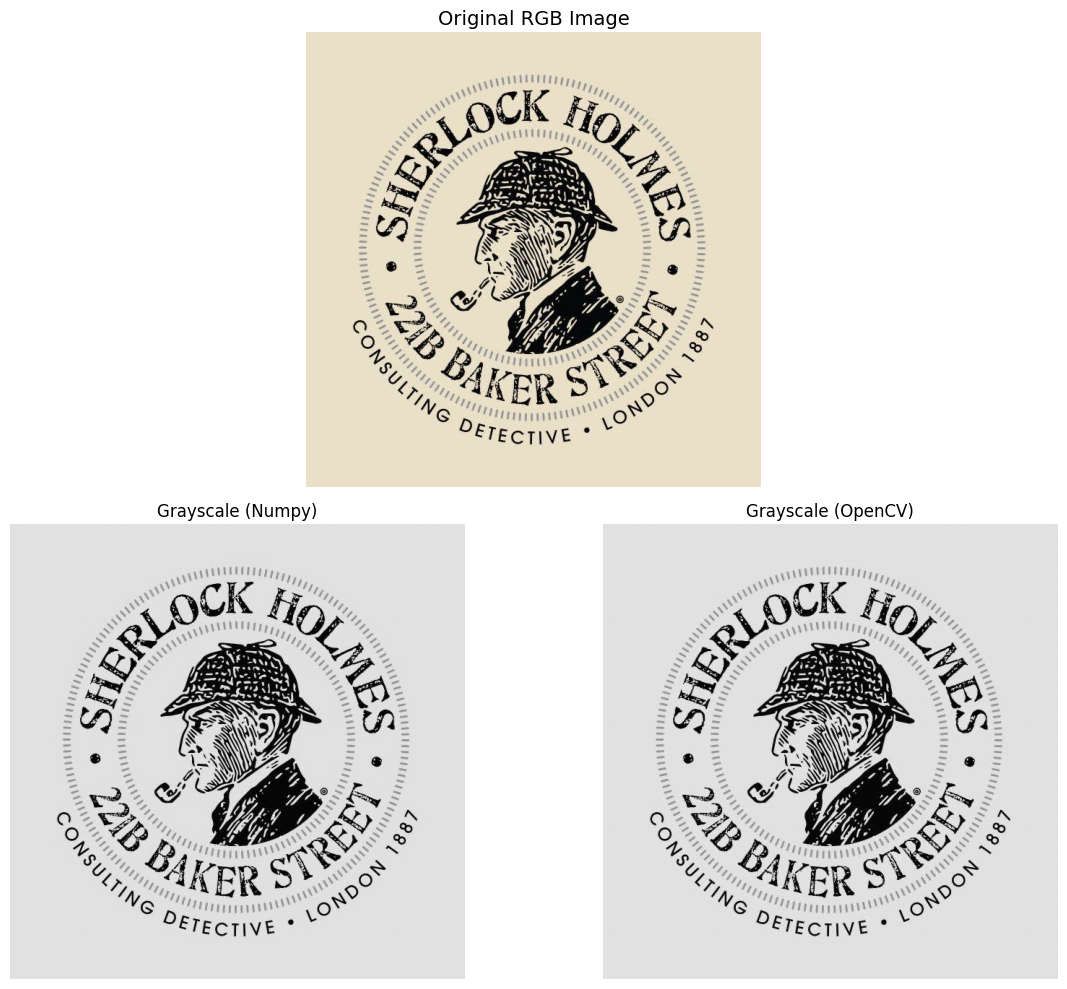

In [14]:
# now this image is taken with base64.b64encode(img_file.read()).decode() so we need to convert it back to 3 H X W matrix

# Convert bytes to numpy array
jpeg_bytes = base64.b64decode(b64_str) #decoding encoded JPEG into JPEG_BYTES
# print(jpeg_bytes)
arr = np.frombuffer(jpeg_bytes, dtype=np.uint8)

# Decode as image (BGR format) from the bytes
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)

img_rgb = BGR_to_RGB_numpy(img)
img_gray_numpy = RGB_to_Grayscale(img_rgb)
img_gray_opencv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize=(12, 10))

print(img_gray_numpy)
print(img_gray_opencv)

# Color image (big)
ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(img_rgb)
ax1.set_title("Original RGB Image", fontsize=14)
ax1.axis("off")

# Two grayscale images side by side
ax2 = fig.add_subplot(2, 2, 3)
ax2.imshow(img_gray_numpy, cmap='gray')
ax2.set_title("Grayscale (Numpy)", fontsize=12)
ax2.axis("off")

ax3 = fig.add_subplot(2, 2, 4)
ax3.imshow(img_gray_opencv, cmap='gray')
ax3.set_title("Grayscale (OpenCV)", fontsize=12)
ax3.axis("off")

plt.tight_layout()
plt.show()

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [15]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.
print(img_gray_numpy.shape)
print(img_gray_opencv.shape)

(630, 630)
(630, 630)


[[78099456.         +0.j     5911395.5   -728136.06j
  -1404194.5  +1265908.j    ...  1336287.2  +1049650.j
  -1404194.5  -1265908.j     5911395.5   +728136.06j ]
 [ 4323631.    +399486.28j  -2262986.5   +214915.69j
    551595.9   -697593.3j   ... -1240692.4  -1178034.5j
   1223841.1  +1338560.1j   -2761190.   -1086408.1j  ]
 [ 1750932.2   -218194.52j  -1158651.8   -120839.5j
    118179.086  +26828.162j ...   652795.75  +719144.j
  -1080494.5   -394436.22j   -394788.34  +365591.6j  ]
 ...
 [-1533568.4    +53912.273j   385895.6   -462155.1j
    371558.    +446398.38j  ...  1277355.6   +779954.7j
   -539831.7   -492871.22j    874513.06   +30535.857j]
 [ 1750932.2   +218194.52j   -394788.34  -365591.6j
  -1080494.5   +394436.22j  ...  -334259.    -459955.72j
    118179.086  -26828.162j -1158651.8   +120839.5j  ]
 [ 4323631.    -399486.28j  -2761190.   +1086408.1j
   1223841.1  -1338560.1j   ...  -799752.75  -521766.06j
    551595.9   +697593.3j   -2262986.5   -214915.69j ]]


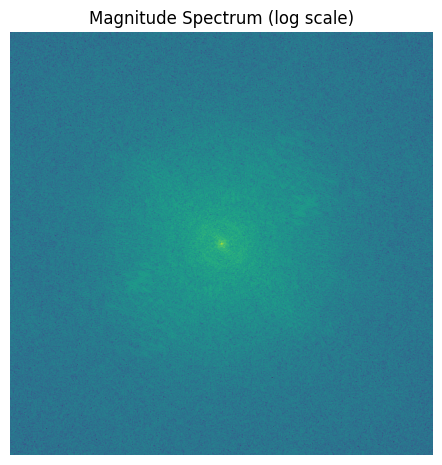

In [16]:
gray_float = img_gray_numpy.astype(np.float32)

#FFT
f = np.fft.fft2(gray_float)

#shifting low frequencies to center
f_shift = np.fft.fftshift(f)
print(f)

mag_spectrum = np.log(1+np.abs(f_shift))
phase_spectrum = np.angle(f_shift)

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow((mag_spectrum))
plt.title("Magnitude Spectrum (log scale)")
plt.axis('off')


plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [17]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

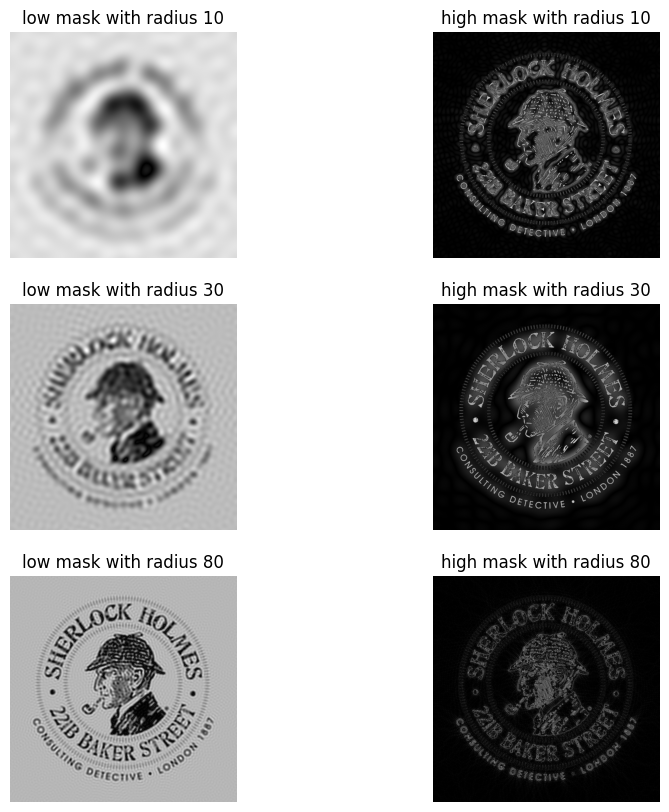

In [18]:
rows, cols = img_gray_numpy.shape
ccol = cols/2
crow = rows/2
lpf_mask_1 = np.zeros((rows, cols), np.uint8)
lpf_mask_2 = np.zeros((rows, cols), np.uint8)
lpf_mask_3 = np.zeros((rows, cols), np.uint8)
hpf_mask_1 = np.zeros((rows, cols), np.uint8)
hpf_mask_2 = np.zeros((rows, cols), np.uint8)
hpf_mask_3 = np.zeros((rows, cols), np.uint8)
radius_1 = 10
radius_2 = 30
radius_3 = 80

Y, X = np.ogrid[:rows, :cols]
dist = (X-ccol)**2 + (Y-crow)**2
lpf_mask_1[dist <= radius_1*radius_1] = 1
lpf_mask_2[dist <= radius_2*radius_2] = 1
lpf_mask_3[dist <= radius_3*radius_3] = 1
hpf_mask_1[dist >= radius_1*radius_1] = 1
hpf_mask_2[dist >= radius_2*radius_2] = 1
hpf_mask_3[dist >= radius_3*radius_3] = 1

lpf_a_1 = f_shift * lpf_mask_1
lpf_a_2 = f_shift * lpf_mask_2
lpf_a_3 = f_shift * lpf_mask_3
hpf_a_2 = f_shift * hpf_mask_1
hpf_a_1 = f_shift * hpf_mask_2
hpf_a_3 = f_shift * hpf_mask_3

l_img_r_1 = np.abs(np.fft.ifft2(np.fft.ifftshift(lpf_a_1)))
l_img_r_2 = np.abs(np.fft.ifft2(np.fft.ifftshift(lpf_a_2)))
l_img_r_3 = np.abs(np.fft.ifft2(np.fft.ifftshift(lpf_a_3)))
h_img_r_1 = np.abs(np.fft.ifft2(np.fft.ifftshift(hpf_a_1)))
h_img_r_2 = np.abs(np.fft.ifft2(np.fft.ifftshift(hpf_a_2)))
h_img_r_3 = np.abs(np.fft.ifft2(np.fft.ifftshift(hpf_a_3)))

figure = plt.figure(figsize=(10,10))
10,30,80
ax_1 = figure.add_subplot(3,2,1)
ax_1.imshow(l_img_r_1,cmap="gray")
ax_1.set_title("low mask with radius 10")
ax_1.axis("off")
ax_2 = figure.add_subplot(3,2,2)
ax_2.imshow(h_img_r_1,cmap="gray")
ax_2.set_title("high mask with radius 10")
ax_2.axis("off")
ax_3 = figure.add_subplot(3,2,3)
ax_3.imshow(l_img_r_2,cmap="gray")
ax_3.set_title("low mask with radius 30")
ax_3.axis("off")
ax_4 = figure.add_subplot(3,2,4)
ax_4.imshow(h_img_r_2,cmap="gray")
ax_4.set_title("high mask with radius 30")
ax_4.axis("off")
ax_5 = figure.add_subplot(3,2,5)
ax_5.imshow(l_img_r_3,cmap="gray")
ax_5.set_title("low mask with radius 80")
ax_5.axis("off")
ax_6 = figure.add_subplot(3,2,6)
ax_6.imshow(h_img_r_3,cmap="gray")
ax_6.set_title("high mask with radius 80")
ax_6.axis("off")


plt.show()

#blur level increases with increase in radius of mask becuase high changes in frequency corresponds
#to edges and after fftshift all low frequencies comes to center and high frequencies goes to edges
#so low radius is not able to capture high frequency changes terms

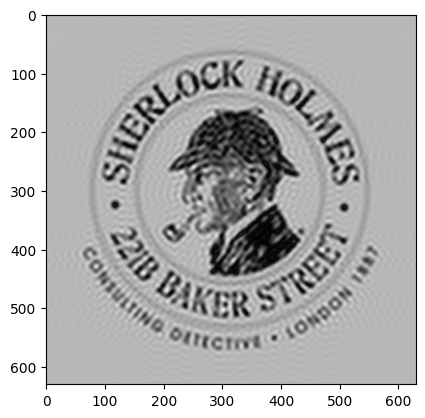

In [19]:
sq_mask_lpf = np.zeros((rows, cols), np.uint8)
side_length = 100
sq_mask_lpf[int((rows-side_length)/2):int((rows+side_length)/2),int((cols-side_length)/2):int((cols+side_length)/2)] = 1
img_a_sq_mask = np.abs(np.fft.ifft2(np.fft.ifftshift(sq_mask_lpf*f_shift)))


plt.imshow(img_a_sq_mask,cmap="gray")

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [20]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

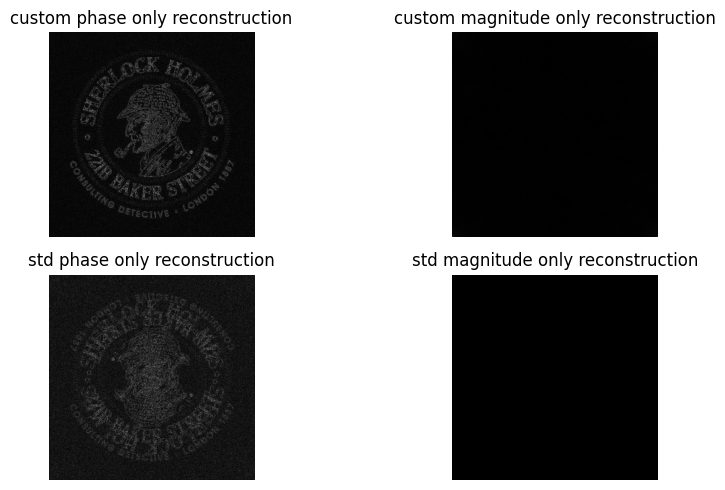

In [21]:
phase_only = (f_shift/np.abs(f_shift))
img_phase_only = np.abs(np.fft.ifft2(np.fft.ifftshift(phase_only)))
mag_only = (np.abs(f_shift))
img_mag_only = np.abs(np.fft.ifft2(np.fft.ifftshift(mag_only)))

std_phase_only = (np.angle(f_shift))
img_std_phase_only = np.abs(np.fft.ifft2(np.fft.ifftshift(std_phase_only)))
std_mag_only = 20*np.log(1+np.abs(f_shift))
img_std_mag_only = np.abs(np.fft.ifft2(np.fft.ifftshift(std_mag_only)))

figure = plt.figure(figsize=(10,5))
ax_1 = figure.add_subplot(2,2,1)
ax_1.set_title("custom phase only reconstruction")
ax_1.axis("off")
ax_1.imshow(img_phase_only,cmap = "gray")

ax_2 = figure.add_subplot(2,2,2)
ax_2.set_title("custom magnitude only reconstruction")
ax_2.axis("off")
ax_2.imshow(img_mag_only,cmap = "gray")

ax_3 = figure.add_subplot(2,2,3)
ax_3.set_title("std phase only reconstruction")
ax_3.axis("off")
ax_3.imshow(img_std_phase_only,cmap = "gray")

ax_4 = figure.add_subplot(2,2,4)
ax_4.set_title("std magnitude only reconstruction")
ax_4.axis("off")
ax_4.imshow(img_std_mag_only,cmap = "gray")


plt.tight_layout()
plt.show()


# log tries to suppress the large magnitude values that occurs in the magnitude
# part of the immage thats why it is used



## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

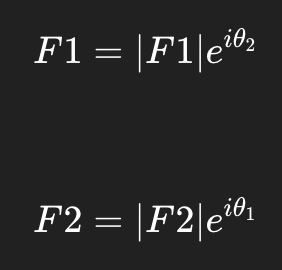

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [22]:
b64_str_2 = """/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFgAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAHYCAAADoAQAAQAAAHYCAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDgwOP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAnYCdgMBIgACEQEDEQH/xAAaAAACAwEBAAAAAAAAAAAAAAAAAQIDBAUG/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/2gAMAwEAAhADEAAAAfbEQkJgAAAAxAAAAAAAAAAAhghiYCYCBiBiYAAAAAADEwAlAAYA0wAAAAQDAAGgEAAAhgAxDBJghhWJ3I0wAVgAAAAAAAAAAAACaAAAAAAAAAAGIGJgAAEAwAapgAAAAIGIGIGAAAIBgxMAAAAAAAAAqbLkGSoAAKAQ0CMQMTATUAAAEwQAAAAACAADQA1TAAIGMAapgCaRpACBiFbTAABA0ADAYAAAAAhiAAAAiMQAEMEBQmCGCAQAAAAFYmJiGgABAAAAAAAGAA5UwBpgJDEhiYJqk24RIUTBAyLbESIQwAVAgaAAAAAEMQJosYiGJiGgAoAAAQwTAAAAENIAAAAAAAAAANMGiVpAwKAIRJkSTIkgRIEMVDIAAAAABFNAIAAAAAEAAAEWixgAAAOAEAFAADQAAAAAJghiIYACgJGmAAoAiYAAoNwDFAAAAABgmEAAAhoVMQMQAACBiBoABgAABFBYAA0wEwAAAAAAAAAAAAAAAAQEwAABQCAAAYhg3FqCAcZAxgBAIGAAIAKEAAAACYIYJgJgAwAAAKwLAAAYmAAAAACAIYmACgCACgCAEoAAFgAAyVEgTGIYRJCwcyEwAEAigAYgYgAQ0ANMAQ0ANMBgAhiBoAAIAWAAAA0DEDEDQIAxNAwAAABQHCYAAIEjAoAlGgYmDbgE1AAApAgABAAAAAAAANMAAAGIAAAAAAQMQRAuQAAAAUAAAAEAAABpgAAANEshAAgTEAAAUUpEJSBDJUwpAiREGkDQADENkSSG0xDQJoAAEDQAADQAIYmAAgLkGSxJoiSViGADEMiIy1MAAAAAAacAAJggYDYmNUwgAAAABJqkMEME2CYCYxDQNA1EGgAAGmDQAAJghgmAAEALliFkIhoEAKABgSoYIaoAAGICGJgAAA2gYNQCAEAlUiISIgyISEwaYMIQ1QIG4sEIAYDQAhgAJgAAAAAAABAkJEkgCQiQRGCAQEUxErAEwAAFIIsAAAAAAaagA0AAAgAGIkERoHEGRYyISIyGERpA2gkgAQMAGAAAAAADQACbEQAgYmMBAIZEYIYJgAwRIEMBSCJIiJIIkhUwAAAKQAgAABMEmESTIkgQ0IGCkhDBOQIYIaBgIaAAGgYkTIBMiAANIGgATEMESEiSCLGJgoCGIGJjSBiCSEDSJOATIBMgEiISEiQgYgYkMAbQMABgkwEwQIZFkiIScQYgkkAmgAAQMQTQAAAIaGIaAAYMSkgABoGmyI0CQNpgMEmESQRLEQJRAYIbItsSkESSENkXIhMAAAQAOotpBMEpIQCoYIkESQRJBEkESQJxCREJJAxBIiDEDBEnEJJAAwYAmCYAACYRbBAAgAAGgbUhAAJEhA3EiREJESpJA3FEyLRiBoCIwTaBoGRRMgE1EJEAkRAYKAAAAAAAAAwQwTAABoBiCSAE2JtDEQAUJsi2AIGkhoAQAMAYJsEwABBMEMItgAAJEgQJoSkESQQJoiSZEmESMlECAAADEwAAQACgwQwAYgAAGIRuIScWraRIQMTAAQwQ0AMABDBDQAIAAAAAAAAAkSdcYuKIrpMyNRjibjnwXpnMUdQ5Qc6eA83q6c+SWdqfDep3rPPKz00/Lms+qflbbPTHnbbO6ce2zqLBNNpkkmlUuy0rZMixoYhlAEMSJEETKkXmdLpeOJuMUU6CwRroPmqOm+PGO0cGs9CvOEegh5+Megq4ZHYjx2dKPMI315BdSyONKzstVYWKLHCQtcblJSryqS4IvqVY74Toi4JboWZnrcZXayqUgRYJFzVIGAoxMUamUqW5ZhdT57TeYK7ek+YzoLEG2OWReZ5S2qAOMoo4I1yRGLNiqkkmmDSiTjAuM6XRClVeZ4pqeSMbDGzWsgalkRqWZl6zsvjU6mqwkgACOpDPfn0qcZEbKrBSrklsaEukjAsotiTnVUbIZ7C90hN5bS+qMDRWpDdQTTRKFdiqRUTK2NWQoqnFZuMIsszO8bYTVzXC5M1q1JGUUlkqgmQCSAixiTQoyBKQRJIUZhBTCBNCTCJIEMNipc9NypFtsxWF5GETFGpwjbKFVxIhFLSqyq554y6iuwhpxaBlca0Qyzi62vObq8tJsdFi6KXGyBTJZa6bUrrjOWmVavnttzzsshKImkSRFmdY0GkTjES0gEiAWqATSRJxABDHEZFjUoEkpKCCBlueidcprPKqzTbQLrMaNKrhF5XBdRlhZ0ac15KuMF1wzyNU8+kqcckaZmc2RonVlVcYVlV9WVU1Svs4arNRlRfKqcsVEvlc65F7qlLKE6xkXZKAkk4wLo1TRjiTjFpIrC0gySi0lGKLHXMkoikopGEVmRFpeLdfRGF+Ym6EaTJeOMtcueyFVkhyWluxaDTEV+XeZ9XIvi+ddFR10OK51Rt21RUTqTprNWnRlGyWNWqkCNxVbVcsZZNl8kIk5I3VuatcUrUoIpQLkE0bokWLPIvdCW6Nc0kQoTRGsTQ6ImgpitjmyqaEbqkMiGUvy79Vtle6XLbCxJLZgKLZa5a69OSotapcileXcfYVaRebm1QlU86rSdOzKqtucvO1X4y5RmYeheWWQ5eg1rTRGe+qKucrFw2UX3ymii3OYDFbjXV0qLAqsCBbBhEQrlOFMiiULhYWwqTRCDhSdhFTrSMLY1AurJOtFpWIKmjXq6Vos2vRTStsckdTfKqedTMulKzGWaNeTbLPl34F6Wvn0ropv0ple3CunN0McQJwLctlNQ10b4cMWkhDRUU9GLVYymt3L3pnNeqLy1X5LZx15NmHK4y222xgLOdNxlvugVu2DMHWyxFhVXrtXnF8bmE3bFVkpy47p59S1U2oqNCVpkgAVq132QVxFFXSy0U9GwwU7KFpg9CVa8umatjndzZdzb1duakq3599Z7K64LacVdXJZKU1GeFNagydHGZ3PeRw6KVz3ZtAKjVZjy7Z3GOzRS8uiBLNLcllXDIVU5VZHNdJIrCTlNaFaCvz2FdsnCi6qulRUmzTyrTZkWiarxdEXFpzu50lZMmDpU69cYWZKd1uY35atRflpvlHKa0TYYrrbzDR28Ri3ysjLLDsqujRvMduimWhUdGxVPMdCvVzYr0K+qrI45dTxdAgs7Ixv2Vx47cV5aS/HOGieTTKU6qTTGlpKVWlayeeLJ1NNFUGtzKjMaJWVoqR6aZFlOictBfSk54J1ddnc1rWS+ApLZZ9UNejPfcyJKklmyqurbnwx2cePLXYwZ9ZHocTdLVuutTmVb+Tbsx3Spd/j7sXmx6Nlkqa3m1Rrs1DL0UsDPNN2KeOL7NDrmTMVz0sOtNZrc6vPorFonCTrhGmWeCbzl2HRlhlNXxik1ma1ZLNJNFuKSWkqkplKCuvQmc9qjZbrwuW5RRrpjdNUR30rWMtsrjC+mVkGtFV8LMumqZ0OdDTKy6sWrLBCNuSupZhqzb8nXqOD1bZ1nsllhwhOndkjZstqsl1YVKXRTGFkozgk4xtXn9CvJYrIYrnq4ozvKvQpTGgjPOozqmhKiS7pZ8snQeKk6EcNVnYzZtDOmGGEdmGBJsjgnW6jLct0KYm2vFVXVlybU3PGRq0YoS7zKKrbpX18qG+3ShaXi0U26aq2U6YWWVBTX0qaITtKdPN1sxl08Es8fRZhl0OZWeWqirbYyzquZQRssRCFoY3OdZR4rn0FnGvl386zZefGefo65ReijObo1ENzbWLVbQiLUZZXySEboJTfLKa6Kr7KpzpS4zbJYwuuXJDRWPPdMzw1pKoqmtcsM06RiJerXj6b25SVkRruSc7bJ2uoujPYQstL6pbankTZdnsXTAzlhntJZjUUXtVZTbGSzm9GFcxDLcjqNNuDLW+rqcuNWWeg5i0T358uqkl0SjtnPJKVcunPLLddCGS6ZuUKVsTzWaJVONOTS05dt1upnei3Nwx6GNc/TqhU6zREbq4Syuy6krnTWXQgrikiWX6+Jvvtvjg1l9fPoTTO22tTIYuO1466tXM2G/JrrzpTz11qVjlyTm0nDJpsjtywl1PPpL42Zjny05qnFWpPnarF5dt+WyJoLzk1axnpupudGjBdlfHLYld2amtvQ4eia6mOdEzFUW7arM9OWm7m2JpzNWBUzt5+XZm9Tn3aE5XUx4dOuuXqk2mSU1dj2ZKszWQYoNhqwv25M+3Js587JX6M8sJWAkCZM3Tq1MndVmarsEc2UKtVlsM/SjJVfNTZy8lva4NPZ1nJ1eTLOr87vJ5HcYOjppNGLH0yqm/LeVvO7A54erG2MFPbxXWHbC5iuvVbLzqexRZwttuXS10apM0uhlus9ey+ZyK2RNuuTBze5m3cl187M+2GTLdhi6bVqE675IbSjNqy9TLq4TthfybIT1aZVZ5ehXnsLoWEToz6x06VLXpz22c7B1OT0x0IWYZb+hzd2dXZ48868uX6Aw871mOOaURt0WV75VY80XcvfyrFtJVXhrs3ylqoM8dUM+kvgZ5uxKy3TVGvGNFefPpr38fVXQlQ8aeTpUJTrqy27JZapOjCjTGUnk3Yze1K1RkZ3mJ1tjXFLNfPsi7RzSNkuXpt3FRJjuos16teNuJ1XzlUM29c+S+VzZYoS5Z7aTfhuqlwSho3nRRtMa5NuiGpl2QyHSyk5rDt2u5q6nPWdTwa8lztxXc+zTl6nGq27o4kww01742dDn9znatGfTi4qp4967WTmQmKrb6+jPoqsizVXLMMeyqSundVqy6WGWZZQKlo522NE8Fkqo0LWYy0Z0px7r65ui/HbtrwXQacO8oN5Ljvxyvd5lqrucfs8rnvTjoz9Maqejkl0FUZeznw7c2EXzLNOenfqZL5NVFUE7nWkuniU13OdZVlXPmX6iMOi5zzs3Vdnv4ubupwS3xkWy1mvZnsz02QxRy3RzLWYXU6LIbMl2bdVTaaolMyrMmhDJs5lt92PrW0ltGZKVdydDMsGdTuUbK4F9xpxXVkC5qrlfLRookSJhyetzMOu/dy4Wvo+ZmnjVcrVqO/TizuJVqTSWRzctblqYqujl1mWfTBYzeolTvz5QvxdBcGDo0azrpzaJMObqQ3yy3rnXXq8OPVz6cHToj14WOMc5ITprRCFi6arBqwM+c7refKTTo4003049kXYb7CFijaad2nPTgHX5llBVVrFds9KYLdeeokJSWSvxTWqFGpZSu58zshjurWYyTDIOnoqQHSkHPqWBLPIEWsNSyIZsGGpfhAUQsvmEpQFzdIM6poDWdWALwhrC5084HXRtDNryhZXcFxSwS64JuOsJm7EBmyBqzqC87oAt8AkfQDC2Yc96JBOnFwB6Od/aCS/MHNk3hVHOCtmMNXZlDOaqg2kAz/8QALxAAAgICAgEEAgEEAgEFAAAAAQIAAxESEyEiBBAxMhQjQSAwQmAzUCRAQ4CQoP/aAAgBAQABBQL/APD/AI/+7rEx/wBJn/psf/FLEx74mJj/AHvH+2Zmf9PxMTHtiYmJj/Ucj/QcibrORJypOZJzJOdJzrPyBPyp+VPyp+UZ+VMzaCxhOd5+Q0/In5InOkFiGZH9rH/R7qJypOesQ+qWflQ+qafk2T8i2G62cjzd5s82eb2TZ5s82eZsmzzZ5myec855zzmxmfb+MnO83m85DOScpgucQeqsn5dk/MefltPyp+SJ+Qs50nMk5UnIs3WbCZH9nImyzkScqTmScyznWfkLnnE/InOZzmc8/In5Jn5Jn5JhvJnIZu02MzNptN5mdzudzudzv+rMzMzPtn26nE0NRnHiCqcXYpWcSzjWaCYUTUTqYWdD2yJkTImRMzMzMzabTdZuJyLORZyLN0myzKzKzqY9+/bud5y02b2x/dxMe2ZmZE2EyJsJkTabTabTabTaZM2M3m06x4rMqZlZ4wlAMCYExmYnyBMYmBMCYEwM4mIBNZqT7fyff+M9ZJnRPyJ17bT5O3cY9fMJM2mZtNpuZvN5uZuZuZlpsZsZmZM29szMzNpmZ9+/bvHtj21mBjWYmJ3g+3WoIgbLZInftmbdBuzmOASGhZYG6yc5abTk7DGFpyDYtC6idTqdZ12mBDqIdZjpuj2J8zOIzGbdFu9swTWFZpNOtDMTv+nqYmJgTExMTWazEx74mJqJiY7/AK99IARPkYEOMnsZ7CjGRt3v5QwdsxBHeGdEKsxHZH8nqJZtOzMgRXFqZyvU+y+2ZnaBMr8TL58sBlLt1AesZZuh8zPsGMDTMzMzMzMmZmZmZ9s/0Z9szMzM/wB7kbfy1/gtkhsFcYYAHPIFwk8yDoILEVi5aauJnBOAnIompgVt8gTaDs95L6gWNvq02y2+sHcVQW+YzTuY8s9M+APKfaE4n0RsZ+JgQYABmffPtmZ98+3c/j+P/QdTHtjMYxrMBG8f2QnE5Yp1X7QGK67/ABHMZsT5JyIrLtyGbgkizZgjKGXXO0yd1cZLankO5OWDeP8AlnE5Fm2xIikEcnbYw1ozU+5YMx30rzgd41AmuD/Y7H9O3Qg2mxmczP8AQPc/0ZOfYewM3cwBors0ebZm2WyGgbSbq05Fdi+F5OtFgOQviQrM2ql+NttjgZn3Iswxs0YukAYzyw2AdsqtldanjimtgBhRxgqwyjLh33ChWK5wdzLMqGVdR2M7D5UHMB9h7mbf0ZyPbr2yZ4mfx3MwzE+Z8e2evbBnxNpmCAQbBKQJxWh2QwqYy04OhJIisFYMbHw2ehFy0HbF0iNmLqwUjG9eWc5D6zkaxgxWckLhmrf1EY2ugOGez1CyzxhLYDEKHMU6kEQnMVermwzL4KTnJxnIRptGyD8xYDPn2z7dCbe3WfiDv2x4/EzMdgd/HsMexbUdGAzxmOmEwZ2YczPs5TVCqTkZi5xCzRjXsrYmq4yBHO6JloyayyuKSIxwBhSxuwiLr/FdDGA+SshNy6hnbjO2zFFXhFo71q+oyAM6/ZyEVVc67GDKLyOR8xVKE53O2ATOuQ/O2VXr+jHsZmaifUgwiFVM8ptMgwgzMz3nvWeQG05O8lhoDNWnxMw9zoifz4w8gdKxllrmRqQHnFFWbOypXmeKLXU0W1nOzYVQY36xUgatqQoxxhQJsrpglgBEOFsD5XLAL1Z81kMbKxqR4A3a7Ex9ga2c2LWdByGFnsYLHtyos0QWCNrgjyz4KMRlmNQPtB8meUHftmNjA1nexZSe58tmwQWAzJx1DdrAxILlZkMMEEuZmbzcTAyR1hps0ySOViORCPIEOpVSs8rV5AobjQcqtAcqLUyUWtaRVlq7QvYG/lRh5wA3qgybFRs14WvwZmne6oWi2kDRnmykEkqq9HGNO7CxeqoLFGssV2iApVU+LQiIBDtsfk+L7DVCJ/AGTrFBmZny+ZjJ6z3PidE6lRhdviGfJ8c8bRdyA3euYBMe3xPGECeUPQUjAJhn1DuMcaiV5EFPW7UN+TmOoactTnNZsLrXOfWPatrIh5XrcEV2OWxUXsrVFK518eBTDRX6cLfyKbURjYjwLqmib6ggUpu2ogdiWI2L1ylK7gUy5RltqWzfnCKQrv8AcmscvWWIIZSsUCYUsmoPjuQAWKzdwe4NlGAfbqdzGYGKzIafy3S+Xt0BrmcYg6OwUjymg1xgYE79lwZxgnixPJZvHTydWZQnHUrB4/I7niqJ9UeQsm1bweURuCXIjWFuNB4oliAHlsRqiiPcFsVu3VY+AiIa2WhNd6+MAFS4R7bVrLHZMcYsuOvkzELOSNupqpZTezkh1hwpLLM0NNK+NWsRmfKK4EJXK6ww5BxtGPiAJjogCYGH1yMRuoCNTXkapBqCUEKkDM8RC4wOx0ZoMfVHsKwOCP1tNWhrJAqCxFwve2TLPWtqPUWGVHu7Bm2J+b52qxWupRZcqqNdlZV5e3Y6mN6expX6aqKyO1lllxsVjBkUcBxQo01YsCtkAbCCviypr1FgNeSrIwvrbNPpztqoHJmcgaBvFGJuFS4Owl1mspVTMsbLH7LDj+Z/KgLN+21hNU2WEiA+OZgRvIAATcMSuY3RYtMWQRewAAAte/UXoZBirk8i4+42IhGYBBZiC5WmytWKnmGQGsZr5GmzLe1gaYMViJx7T6sozHIyRvGO8RUQLVudQzOEqRLaxW3Hp/ywZ0dWS7mvuVvTmOUWsec1WuceyG05FfZpRRynen1Gw0XU8YOuYEvnddIt8muWyMToucOvkXFiH5wWiDoWZU4wEQDAm2TyYY9zprOxMsRG2EUEnDTLKc5irrGb9a6RGh0ma9UdWhOQrAzpo1YeGrSBBqaO1Gsy8JGQ1ecjZWBjaRWynLtampmU2t331slz8QAfGHzyGpa/U93lLgiKgZ2FWgZGSstxrgZC2WeA9RyhBiP21DEooRjeXE8sfwtZrG+Q9OGpGHZwUiZrbdsrZsULWGpt18FgtQxkUsAMr1PtNW37U6kwVMAPss1eDUwJk8YxpNXhYlR1OTLZOMkxcxxmEnIcich127wyqrHXURelJGjqdQCkBUnllaDKHysfBYMos4uCorxVqtk8vTRjsVKsjtq9dviX6xY9YBQMh0DsIm6GuvWF0DpspwjIFs24toEQIAsa3U8drItwNfqeqhc+fzhnl5QtiguRuLq2TRtmO0ABXVrKxXZXOxCTE30yxgxhVxLlfFQ19vLDIYEsaFWLFcQMYpYw/Xxg+5XBeskoTnynJoovWLepObJyzHiT4q9cRwITvOHDcS5NaKTXW0NZL6Olq14lleLS6u2jNZl4CY1g2ALRQoZqkyq6wpUgTUsHK2ach/Tmvqx7BVNTsU1QWMoQMA4Bm2a6Qb1p9Klcu1LIlcQDU3Uvd+OOXNKnKEsn7MYs4/1vWYpMBKwWy6qmyHCQH9RYA7xbtBztk35gZbQQdsNN2WF4ZtOXIbOVWDAJfvlEBQgMu+qMMDAKQtAVIUdtUpJURB2E1Vm6psIOybXPOXEbkchzYtYKoEOeo9qqOZXi1KJnMCjAsBhwIDyCwBG5uMfmHd1YB1YFcWKrKgvDWz0eDPgep9Txn07ZCELHsnEqVm0FXewUr6R5+NxstertfXm31FbBK91BD18mG3zEziz7LYsZRlGGpwRoBCIqpOOvCsqk2KIHQQAsjQJNlVsiE4itDjX4XM6MOTMZiI8bZYuwRD41kQkGaq0r1Eb76CFvJbHE5kA12hrEUJXXivCjUW3eFdbKV3di6iPfYZyNXSvhHLQZrq1L2cSyupQ72QnIcspgTYLioec0XAGsyjQAuGWrdfruA5Ky6/ezAEUbMoTZ1QA1qwdSkfbWnIUecOyljFXodRiSe8Z8GYZWJ5EI2NmgcGcrQeUFYYPW+FXLYfXczjzP8V2naSt2MzmEs0VC0VcRQZkgGsQllgsTIKGNXqVVaybdASxJTMK1IqM0sr2VGOrWrUH9Rqgw8WpNQAIEdZoNCiV15i+qr1tapyfSsXOSq1MzWZcjyayxIrcbN65SEPJXTYtYsp5r1udo4huVAl9TVWUhKgl2ByxXbKWWWIb+K2j1PT67qaybWrsjL1x2EaOJxkA05JrGv44xx5dalWKwSKwmBkaT4KnRXbesvA7YLTHQnYg+Q3ROLFYMbNssWQDNi/8At/5NYN2r2VgxnZmpdVciOYcIDrjPm4GyjMCQMQ2i2WWKECAsfVkuxuqtN6Et4hi4Ra+iBZhvCJU2W2NoFhYgKfUDE4qpWmYtObfhFFi1VuXFjeZwqiusv0CQ5iFjF13s+z0uWtRgAg38sK2JtFc5Wy3OWWc3lybTODmdwvrBZ4wuQM2WBXOfqoLAMdmDEIX2mz5csSucZ7/ya4TZjFcxbHDMdkZOwGD+c5GE5mrnG+Stldf5JabLY6YjIAcLgroOJdKq8yxVJy2bVDisV7tW7M7MHsZICePa1ox7zmtyA1HzY6V1V8MDU6oouXBWGvaISAFGcM04szOBuN98FtIR+xfT+n9Qg9Iqs1TND6Z6VYISKlIFOQuAXRpjcMcFgSD5MCAmwJb7du3HlMaLnWsfZrOiwyBgih869hBtptFqUoEDEjVNVyyTiDg1+LdBi+XJEHqTkqs1/X5mbq44kU8qpWpRmZhOtwQsOjHYqDahmkCq0dwpBJsCGWIit6fkyFlg4yUJARDNONreN5VhK8HWoapxNnTRdgLHcoGsIGx1bBJE6QdFbFYtU4w3rdYnrWZrL1sTVg9VZxsAu4IUsWILL2gZ9ifKMqs3HqeJgdcR17/j/M1rx6iKQrcgzznOTivLMHAi3AgdTxMateRkcHQuykiEg153aeKxXJhZnIIA8zOPJ4u9grPYutSkFQxIrRIdNa/TnLsqQbFV9PMKFx1Wk21gXWa5mxDfUWZmUALHRT+yxQ0qbkXUCWuthLMQ7PYxxVTY+q1tUwdIaCygJoQGrKOYKvPR4oJcWiOWYnqFpt5bdeJdrE2LAK7nQW5XOw42AP1yDC+oO6wAhivYrnCc9qznYVnFi4Wrk2K+KiwBdtlbAXYWsKQBr4sN2tTYZnNmVvluNtmWCtRNa1gLzZgmkDrWvPaxqAVi7RrFQtdsiqQEBrTI5M9Fu9t4EID8an9TF8OU+y2plR2C7yy6pB+bWzv2xqJsvzYWoIFFtwJLsbnIWpeMNDsrg5hURXxFaJi5GXV9XKlQUNYASvMVOm6IIY7gQWGcgChvFidnGRiK2oN2kFqEtWpbgIC0dP8AVnAbTvi1BQ7BCXIRLDttzYBtM5MVlgR3KzyrcH3S6xmF2k/KqqQ+rsdu+WqwleWtzfZ2lzicpeJ+17MMqtWGN/kH2sYtEVghsxPuDWFiqL5hKjoWrT0yhRoE1IncL1XWNbYSqmK+jZMAwwDbcHjkBFfBIeyVZw+chItlaHboWHJvGO8s/iCQ4cYZgSadVrT9YoWcPLGULA/j0oO22S01BgqxMa1h8TPJLtWgVVgtUjlwNlA+ss6mrNOJEOssBSHYmx9rC/BV5XEIio6l6lqyEFVd7ru1TzIalyOMqGD+o45UzWIlLKlnp9Za/Sra0/nOTjQOdVA3lWxZ2IPKxhy0WvMRMB7QkAFk50gIY8KZCjZqdYTqdWdwqSzVRWH2BaFWYq+xFeoeo40s2NQDsVU7YKvghnWFTm5jk2eS2EkWlYbfEMsP/EzEs315WVuXt7zvWRP8R5x6VE2OV3MCEo1uDZcdNiUG9inGWKgo6qX2Z+WtVSzNb3I1JArlZ3XtG+0D4Nf0f5zgoxsdOOoC4bsxjuuTdYJT5IC2RRsCqXvx1rAeNLb10XLV0WWKmXxcbkgW623hL0ryVVV+ks2T9MHqF2s7O+1rA5WkqprKSqs6rTrGrYxkEK+TIGmPFtFX8fkNibWouVVtSzs9g1ltFZWsGOrKOPzSsV27B3ISsZr1vTIUPsQQW8jVsGFvHGsm2WUsFzgmvFrK2SPI/UorQ9s7uYlILMgi5y1SsrVhQdlmItoi1WGyysLF2AX0hcCuj06KaBDoQzqFR92IexiRvX2LskUYFIPizM60s1L8u4GHKhksVt2P1ZrFaqtoXBlhTCWZtUDjdfFbU2V9y0GQq/axl0trpn2UN1UIPCzksEZ1Z+IKOGwmpcMtQzorI6BCrOZXWWYjJRWCImVrq4mSrIXjy7vgKLLzUGhr7x+5K5jNnGoZc7hbBOElHV9G5BXhgCV05lrR35aUrOoQBnFOxwzCgGbJXC2lYZkrq+7DDXemQ110g1r6hfSxn2IYPWMw6lqLQUsRHRLeNa28cFms9A1sNN/p5xOtfjvkLW2prrQaswx8r6ofrHUSwotlh0dlLgFWDHC2KtWPPdtq7eJbfVrKbXMS9VKWbWO7Mz5B26R8Q1JYdtVsGo3aah4UBUvlhZhQ5dWrBU+lYW26BwjCAjWrVXNqIBbVGZSXXC46XGeSNd5qYxXZPpyJRGr1VbG2e6DuKrYeuxjo+iVcDEgnTlH0KooWgqTzam2o2u9diFjv6VUbGgUPX4sorg2mDp6fWumu1TPUGtgL1WK4M8naujxP0rXa1iELd2E1KqhXqw2wKiZxD9Qg161Vf1tW2qABeUoWpZoilxZYKybtZvk1srn4DkNLLEMdUdy4wS9k6ErZ1qV9Wt6n7VNqbClCGOdmP7GUNOPV9DnGBzitVbc/EziBiBZljWxWCzFybGbLjQWKpxZZZ+x3DvzrXXzDDbbhnNitiXVZVBrOOsWnXHqLcVpYLqa9DNQ4dJYptLltdpRho3RsYCng2WuvJOKooUC5pQ7uqrrSihpZUNrPCIqmahhYGC58q9NuNpjkqevijdAnIcI6veCO8FykC7WEDCnK1hmmu0r5LCWJRGd4zHkHHl9I1ugVwUH63YqjZZqVzq2RO8cR10xOPErBV69cdQeQCNsUYIdQ+wKGrBpsYB60qldW1pXkNmxPGgDPUZW3ZR0t9X6nK0Gxk4xAcvdSziy1FNL1QEE9GHOwztdkHRUitZolQdUqNjLaBZujeoZgZawECpsmtdinW4jmqrDcvGhV0sQLqxs1WUgTkAIs1hsZ4E4wbI7axMCa7RKiHRWErbZa2InIdlsDJWQJ+sitPPqdGI3YwHDBWZSsbLWK515SSrq0+0ILipm3P2FYVrCmdmzkhfJIjWCV1Gti6gNg1Jayy13tsrXVfWbLPUED0v5QacapHsdLfyLDK0Pqo5RY2I7/ALlfKOq2MtXGRvuMhEstDtZE7DeQODPTvibgy5c3I/6iyAW2Lz58Fs1IXD1MDL7VBHqcrbbmfEAGoswVOyKf1j1GybJkj9jZnwikRrN4WTj2KzfrdStmHnCErBOpczdYr5hldbQsgOCSuEKlLGtrYGnWPbBY+mABnYhztpWy11R615uNHI/RSMLL0RjyragodglTcq9i87l2Kj0gGwYCGzklNWpIVrFqrSw+YGsa4KVcWTCcda2MhtZJsQ3QdnIVRqF6ji3kX49RauvLyCrbHqPE8n/jV7GwjZOAWD1Hp2qg6gImPIKIoAnUtOThlGQ0+QMkq67qN49a4bMalljJpFbcea2CwcjPvCLIHOKgu4JeN8JrLXxbsBFcIxsyPmpkLtZhA/kFQM1w4WTBjNqch69HDsx3rIaoWWSllx6j1YrnpNt3sOF+Dl5XqiY1sA8n2VV6QVQjojxNXJW1QSKdJgyyty+vS0ODxXsnCDF1qCqpr/KFbYe1kNY9MGbhvXLV1Zsa1mintGlxBQnBFYwTmwtN+9cP94TKh0oZnHp7ROIwKgs6IRQSfUJFflI7LpldMStMJWOZErFZrQZZmRnXFtgNdmRN8wLg4yo8a9961s2VHKWpYUD9zi3XfSysqtnlz2MS5DKvqL7hKcFmOtlHqDsLLGZ347aSK6aqgPYGHlMXOw+PHS05GAYGCgKDYc1g6xRmvbSfkBlz46jkKkxqRsq4grGTZrOXaWFXbjyv0Pp7WL37NGoKhEBbbsxFBjt579L8IxDZaqEtjL1XPZZOUshxC/7a2IjMGnL+5ymzEuarCG1Arr0EspxU45EddZvAuzP6cE8RepVzFrJh1QCv9ZPWtpHp27ZE9THYJAzIA2qc1UstJiVEiyrAqXBDccTFwzkVgau0Y+Pwx8opwDbsvHAchhHYh9MQfsZVxAnWmI1hLV17LnRXs72AHMy1M5aB5SGZDcFjkBmbyo+PV+KDsYxHXtRmoKCvCvC3pXFu3mHUxqONmq3Zv11s2k13hIQovkSYzLXFVrauw1T1uVtatw3H6tLyarV5S9m5sTR8tR6hqvJFPCMmu8kOaK6GR8vq1tlo/WpKp/x2eoUV3FixtHHbkVT/xAAlEQADAAEEAgICAwEAAAAAAAAAAREQAhIgITAxE0EDQDJQcZD/2gAIAQMBAT8B/wCeUIyM2s2s2s2mxHxo+FHwnxHxajYzayEfgjIyPlCE5VlZSnZ2b2bmbilKUvCERtRtRtRtNpCDQ15KUpfDMTEIdeOEJm/uTg8Pg/6R+xfrrleN46vYmXDKUpSlxfDeF8/5F3hLFOieCYmb4O8TisTLVPyafsQ89cLwmL+zr0UemdG0WGXExc0TxD1+kuENYxMfLoifFMp7Jyue8exEwicLCmrUvTH4LzvimIesN4WZl6oatSeETFxS5vFYuFeM4/WaXDx17NS3CG0UnihGTxXw0ZT0dakNz1wuWXPRCcKNlxSi8iyzdDV2IeFh8qbs09+BmlQpOFuPePWPyFGIfvEITDxGTEGs95YuTpRDYjaLLxqdISiRDsaEMgxizeN43F6wxcKScGMhIaWP0XMGuGkb8TL3BrH0U6Z64MTNwjVqg/yMommehsmKM/0pOUxUVG4on2MXCEg+yEEMpexOMbTNpBdFeWUuLh5hOMPs+86soeWI1DNPsfo0+zX/ACwhjw/fBC9H0PDFweP/xAAlEQADAAEEAgMAAgMAAAAAAAAAAREQEiAhMQJAEzBBUHFgYZD/2gAIAQIBAT8B/wCedKU1I1IrNTPkZ8rPlPkPkRqRqRqRSrfSlzSmo1Gs1ms1FKUpc0pCEJiYhMclZWamamVlKUomai+3S5pSl/wCbp/Cz6FtnscDJ9dzdz9KfTC7Xl4R+E23Zc3dfSQ8X0NWVvuHveyiwzn7ITFeyYhBouOjyKsp4SOyY/omYTM9Sj5wktl2SkmeTnMxCEzCExCnGxF2/o884QsdHRdtLnk5KUpSE9JE/RHRd021lHs5OcMhpRcI6L9HezvLRIQfiI5OSZ047IcizRlyhsmGf7OzoaOsWjEWFLimotxdieOGTbRb1CDEjoXkcjx4jEspDIJMawmUmExvE2Tb+YhRDxTtCUNWFhGrHkXC8czLyxYsOyYp+HB493CZ/WEqcrCyuxogxLk0oozSJDJsQ0Ie7nLVJwJbqIpRiwmSiXJdrxpxcPyFv7xyfh+ZQ8rYxCGI8jx6zRiFljH2ePePLDfAhdC7z//EAD0QAAEDAwIEBAQEBQMEAgMAAAEAAhESITFBUSIyYXEDEIGRE0JSoSNiscEgMHLR4TNA8ENQgpIEYGOwsv/aAAgBAQAGPwL/APW15/8AoOVzBcwXMs+WqwVgrlWFgLAWAsrK5isytFyrlK19lzBZH/bchcyyrAlcis0LA8s/df5Wi+VaLRaLT+DT/Y2JXMV/hcgX+mv9P7rkKw5a+yz9llcyyFlZ/k5C5guYLmWVqtVjywseWVlZ8s+Wv+7ys+WVny18sLHlhY/gx/JjzysrKyuZcwWi+VfKsD3WB7rlXKjkeWv/AGW/8F3W8+aOytEeRUz5Z88+YWf45RsFgK/l+/8ADK6/x5/2Gv8AN1/gmolWlTdC6EKY8iddkL+ixHlC5gOsSqnVkjRpU3HQ+VlZfvKuqbo284Vz20UDXdSVorCFeAsFY8rrHorm6holC3nj+O/+/AI9l33XEI7XRRBn1KEENGtliQpOdFmD0VqIUmEIuvlpXCZvlVfZQJLldsH3K1A6rNgjglcFRG60B91c/ZS3G66ZX77KPus+6iR6eRA+6keWlPZWso6Y8rH1QkrM7wrTHljPlf8A7HoBqrgdJUzfogNUSHBx0XLYqclR8ytopnO1kZkFQoa0LLie66rifGyhqvmMlXcZ2Uj7KY90b2Ci8KMBCqr2QcCEW29FGAML9ysq4uN1N5RMKRJjMo79FPvZF0KS0gaKRwn7qXuGytH8/P8ADgj+Tj+Vb9FciB0WT6rhLIK/E4r2DVED/wAlzEI3vuuFxWDfcyonhx3VhJQMR2RpIvuv1Rt9lsNlcwdArz/7K8wDaFb7Kkt+6caZ6QiCFY3XXeVTMp1INirAoR90QJJPVDfbZE2HXKvKi/sgTMK5sjJsNFw8KNbiT1ur7WXopU7rHnP8nVaeq28tvPI/lY/igVwjceqglRPoCuRf9MgLmzopaLBNdcdIuiPhnuvmPRYj1Ul2AsulST6qK87ImT/TKmPZag9QqqTbSVIt6Ilk/wDkodMlG11E/tCi29lNMlUtsoMlEObb9EGTfdS159NUYcR3Vn1owSFYu7IcJtlcvaUJpv1VNFUdUCAcX6LZQLrC2/hkeWv8WVos+VwVwu91gLHnlQsffysuv8WVDWx1wo+IGz1UucS32QiJWLDdc7hfSypbbchQRV5YspxpLla53RxK4n4Vi+NwrSNLlcUjZcZx7JzmAdASokipTAdGq+Hw7oh/2QoseycHAwBMrilXhsZJVTeJCXUzZG5wiapP2UF1L9FS81O3UyOsKAVZzSg2qHbXQYMawVVwgASRqoOuxWm90BBE6qJWVzZU/wAV/LoreUGPL/Hn1R087eW6u3yjTv5f5Vis/wAIir0wqmj1QmY2QgHPdWpa3XqucTF1DWzKkiVOXBVcfohSAOsJ2LXQpBUReFEotaQXa1LIv0Rr4+6JpsOiDiyB1UwxrMLmi2ybTBla1YuFD3hoVLPEiNAi7xfEc09EPphPPxPQoHIPROvDVueyEgE6FQylRw1G6+JSK3Iz7BVxfZCkxOUSKaPug236q7baXRk+/kQv8qQDCHndWv5W+/nfCtKlXB88LX2V1K/upcrXWB2UzBWVhZXLHlCwtVS9zZOiubbIhss6jVUwuJSQh+xV2/8Aqpk+6vSR3uneLNAG648dFi6qt1lE8PoVUdVOUanw7omn4jyD+ZW8Qx2R4agDqp+I70KkNJ6IEf8Aw46qYHWUXWV4hc2qs4xhUgoB9mj7oSQFDWewVNr4R8SZMqoAwMg4UuIA2CcaSB9MoUTfdXaslQdd1pCjymLeWvefK2FYLP2Wi6LTypDr+UCoKRdZpOyuQue6wpVh6wuELlHkOIoiCuenoVzBaeVj5beUEUCVAf7hWaADsjpCu0Bve64JCh0Va9F8SHu9VyFoR4Wup+yNvEtq0ozVKdiqIQb10GURESUQXazcLm7Ih7j4kG4j9VxRA5QESA4kbYXDzFZQANG1IVT3Eu0JKdS4tnRUMFR3RqzqhEEDYKzY7KwuodvMKbkLhbfug48+nRE1d4Qu4f0qzTb5jqnGB3UgZyrRJ0lUkBc3opmO6ytVn3XC5XuFY+USpv7r+66oyVZbOVoWmVJdbsub7LPlIf7qp4/9VlbLHlZyhHCtZYBWys73V4U1LLcqzRGys2EbiV8re+6c6lrmjKHwmxOZ0Qc+k09EG0vhQGd4Vj6Qpb4aFfBB11X+i7aaVXJ6CFMWzhSddIQA4Ai5gLgcoWIK4yeLVSKafqym/Du1GrxHDorEOEbIy4unPVXgflK/CI6qaL6rAvsjALg3KqcBKpJzuVZFuygOnqELx6LiFtyp+FTTiMFBqAB4N6lLLnqfKdOqsFCIyEbwrXWkhQAKSuqwMrSeqOO6urK8BGI9FYUwshSLq6ubbKxQJKlqzbqtfRcV+6gL9ldqsuX7rmt1WVlSQhIMoOqa1QXaZUj7oF9yFgN8PquBrSdUAWeG0dlLKYzwhObiNIXFbQIuMHSEXmauymsmTAaVVW8EmSrPsdSgJPwjqpayo7bL4Yn3UC7u64r9NE6xE6OTG4m5AVTriPmQhmdlaY6o0tqMoA8+bjKHFcaj+yBg7yuWx6ZQ4Qq3ADoqZVdzbCl8VZVyR+64ihSMJ1TLRug1ojdYsdUR83VcTpjZXXzQrKzRV1WIC09VB+65lYq3qVcrJ9FaVJWO/l+xVsrYnZTfCjy5OyuFZqP9/KFxQoDkbKC31RuQrcW6FlCgeDQ7Q6LjbN8hfiPt9MKLFBzjVPRAeGySOiYfE4C77KA1znbuKtU2foQ+UZTHWDQVZ0gjVfC8NzC8mJVLfEa4NEyFzcYyCr3pOpsubhmyJo7QmsY2S6x6Jxu50WgprfGjsqnEbYQBgfcLaMqrxHCEXNa3pCBjl9VzlWLO6uWTjhUuvuhLbZhQGNpzMoiDFKLoHujLYAtup+GPZSADogPEbd2ieINivwz90fCc0zCOk5lAYQuVz3Vldy6oNt0UuPutD0QCzdYE6K+iiFF42UXCtKmAQuW6gmFaD3RNN9YVhPdX0yoJvK7LEHZWsURQSsXTZ8SAuI+6hzIUCoaBW8SVuVPxKT0KpqB6wqJqgey4aR+6c4TzYVLj1KlzZOkqKb9VwoSJXDYjCnpoq4hVjIwdkQ8NcfpVIZAKnm7BFzrLgBaFAcysdUNRsjDIGgQrd6N1VMNq6KmYKJN+iDpxortJOwCBiNatVVS6xvJVP/T2VEUuCwI7KXMbLtVLWQequY+lX5iovIQbRfWRhWtH2XE5xA1QNTnWwuBptoSrqxXEsC6HCpzaymJsuVSG4WLrlVsrSQucTsrFQXBcGNVK4ndgpEmVy2iytInIQBmcrErHqiQFdpKkCyIlbK3F3RDmydFU09VBJUb4XEFVS2d1NK4ReVfPRGzh3Q8MiZ1UydloV+G2BvFkCX22CsxuVdRF5RaAOiL303HKoEx7KoAj8uESzwxnJQabnJg4QHweKN19ROqtxCJcTZNLid+FF0kdDkr4nzap1ZjQdURGOqFZeXTgKpgBbsdFJqB6FVHl16p/W9hC4QXf0oSsWGgC4XUk4qXF/hWN3aSjOEYdSUJlseycdZsVqvxAe0L8Nsq4yrVeXQrfspEFSYRpI9VaUTNjusoSFqZsjB8ja4X5hcLMQvsuFRAX+VPw1y2QgG6iV/dNqVTfRS198+WbqXGpRdXuPppVhBiQEIIZVZNZ4bmj90Yqn6CdFYAu/dNDubUp7GcTdymtqqndOoGd0OHsmt+dxTyTV4mwQiL+yDfhg+i5IdO68QtE33yoLqp+UaI0+He2qrIJJQY7MWhPE1Hqoqc6NFbGpCDj7LlMhZJadBqo8NrQV+I8N1gJut4TYvfCFYLVQ1phCZjrqg1vY6qtwbPVOk5yobHQogtgi7gsBzYsiGte12I0V29LKavRXuStrK6hCnK4dVf2W3lpJ31UKFeFyo4KuubVWXSFuFGqccFVE+gXZcOVj0V2zFlbTRNmxQj2VsoUwLbYUl1wqtVDrWVwfRWgBSCDbJQqFZOTspBDb7IXadoKqp7BGsY5WgIvc6/tCgXOLo2IMJwdkwjBsjZsHMqXGb4lWea032hcTbaHKp1FkRwhRLj2KdU8QfcKS7mGq+GzxoOgVBM/qi60hQzJEoxwRYmFW0l53cmybzuibc0rcZuoJMhfFBDbZXH49fcomZUN9ZK5ubRcHMN0am8J13QAcW91rJVPiR6KWmnqE3iqKNKhq6qBiZR12C5QEf3R6KJjVTodkAqWniKNiVaZKn3QAGixfVaqaVP6og5CzKloaLqaaUXCDCMwN0DCnEIUYhdJUgkjvqoy0KCVUsuHUeQPD6lEE5yQoF29kHFjeqIg9Lrc7DVXFKkMsouOy+ID7rhOdQEe3/IQgnOqE+JJ6IkilUg20spp48gRYlHxAG+GQMgL4lMuKNLfdSSQNl8QzA3UjVEYdoobqoHsE5uKtFQe+6aLgdtEW+FD+yaAbm5MKp/jn1TauKLyAoOey6r4pGkmSrOa29J6KLxuUL5UUcRxCdKAa2eiq/dX1U/dSuqlzlGqiy4kAVplWAXZH/kqMIk2CjXdVFYQkWRpCuFwjCJdhHVeqyrmRiVfRDssXBQMeypBshwmRhWbZCsK2eiNcFcseqvb1XPVOpUeG5s9cI+KXBz/ANE1rRBJsjxTTYmFAjw5VM1aQUXM30K4TV+yueNyNFwocSe5wg7w/DY0jVUkX2UtvooJj+lAPJiyIIIaqA13DupJsNVxXO5ypayI+6JqkKmHYtdH4l3CyMH0hfMCNl/+TsmWsM2ReDS0bIHXsq/hzJ2X+nLtlLvCvGiEeztVJ8I+yBp4v2RFPETlXgFWdKEuE9/Kx7+UxcXWY/uuLKPssSQrWRgRBujEW1U+nlg40Q/MsHssGfK2qdbREwnAiBKMZGm6uOqdsiCpOq5oTqbGFxC8oghXi6+y4kdSNVdpxquN0l2gU/EjoFoR3uiAHD+lqFHC1oyUwNGvuiPhcKoaLO1cnZcdEBQJ0CgAXRf4vJiN11maGbKsCxON1P7IAPEnBVbfFl40OE8PaRF4GiZU4xGiFPDToUWvfO9kJJzgIOf3XDJPsn1nON0A98HICDwBRCoYZjRwyqrAoywwFeoNI5kXs8VpZHy6oFpFO0wjgx1X0uGATNlFQzGypdNtQrmxsAifDMXtfHRB73iRmVGm+64JUmVHzIGFP/AomxWZutFM3XpqgbI2mSgCO6pDrZV7X8iETKzhAzZO6KB6Li6qx9FUcRbov3UCytlXnuozJsF+qMmWoU2OpKAbfeEWm5GQm8Fu6lsHqoNZnYQgS6/uhP3VAFPZGpxDO64DI0EXRrbdNMApgeeYHVBtmuPXRXbN8psAA99E1rTrqUC4iNgpte2Mo0tqEKGsJteAgBIHXVS43VRi/wArVWBi0KPdGbv16IFz7HEKPDs4b6ovgu6DBVcR+UFODjATS3jnqifFhrRYjqrN4dimtNJByIwmHmPWyLQ/iacRZcLgAPui4uZOgCI8UAwLlfhv4T9lIAHplF5F9Vqe6lZtosqfVQUQ5C0qDhDUIkm/lCE6KoZRM+i4mkhO22U36J2uyjXCGbTIVWih5tMQidFPVZ1R4ZQOhCnKvYxorK02N0IHqrynOE9YUEwd1yF09EGUxULFcT5jUqGkxqVF3RqjAzqclXug4aWyjkzug4NVTx2QIbJCI8OOvRS50DOZlGlgjSVB4h3wjQJ0V3GOyJEVj5dSjLWggoXuM2Q+Q+yLWPfGCjJ4d0bR+6MsiLcRlf6ZOxhAnhH0hQxsBQgyDSMEqSBE2Ci6mlTVDZiy1JKuQ1sY3U0uLW5WrWdMoFrrt91LTCcxpgwFLrhWPdSJ91FlLDjKNAtoNlUYTeGRorNWFn1V85W+0K+YsFE4CjN5uoAhGDCzO6gWshw8WVM6wVJP+UZP2RiyjMlddSszddMrHULtspVW6g+5VRvt0VDR7IYtZTMX1Qgk91TN+y4Wm/VFvhji1EKwKhzY0RagXCy9Jtog4REKQaidAjWZEXuhYREocF9hop0bhATZGniM8pRkaWVxqqQDJO2FDsHMq8Wwpu4QifDZreFW1l9kyrwyAeYLBbdOr5R1VQLt41QbS6+sWQFp6BTGdIwg7UBXlEYlUcQVTrt+tB1ZlcTXAhAMumCGtjPVO8K9RRbrKIgiUYRtrZSfRT+q2TfxIIF0MdUbmywonKP2IKcP1VTzZWGVEQ7ogJKyF6LiN4yjVlGQpdGypbvMo6twjMf3U5EYQ1bquE5V9lxXuoq9FxjKG+i2RARpabrkhXGVbKuRZcpNWysCjUBf7K8NAzKhuNkH/DDIvKgcTtSuETVglOlx6woa2ey5rLhAjqg2Vcm6sPVG8BZAhZJI0RlvS4yqSKesYV3nGECST6IFzg6oeyNI91SbR1VLJnUqk4dYWRveYgpjnZxAQrNLupQNQt9SBkdVUdDnZZXywEANdip11UzAXCCSNSVNi6dEBh3RZXRGfRTUsW1CjIVyn/8A9LitCP1IhXkKwkI74UIUlAE5wumgT78uITN1+U4V3TESOqqMRCG8KMxdScJoOmFbdVOyNAiadbIMDaiNUdREBSYGy+b+lGoH+y4WhoQBmUGKXtv0V2qJaiIqOVycSqpER9S/UqlQ51xpC4TfqoIyhcoEepX+pUuC+91uRpGEQYATby9Q/PVRXKgnCLQYjqnUaaKVycTdIRq8K31JhxsEXueTSmho4VmT0TyzxIjQqZNhK0jRcdmuwVw/rCIdgYCyYJRiYws3NkSAqxI3QtAzIQdbKJcPVVXQn0hCCCZGVJkfdCmOq3aJnqvsvsjYhBoFgFM3QtfQhAwOqFvVTGOqJm6IaLaIgE7+qyNu6q5hp6JpxIWOKLFWxCj5ReU8gmYXNpEotJxZW9AtJUNwnUuAbu5HidRORkqW+Ly6OUDROviyAF0NGynT3snOvwqWGybFQhXGFM2OyILQQzfKaWkADSFIJN8FBxHDgBQG2V42tsiTlYxropqcJi8IPd4mFeatOip13aVY/wDsjEGdEZBwgQZEeyNcxnhCLqnZgjCoaKQAgR4kbhObw1dUHN44yEXZLvdOEe5X4jwFaowc6IPtOxRIEnQLk1m6aCsW6JuEBucjVSTjC1vlWcbYCLcuKHF6booj9VBvqr7yhMyNN0DAp2U5bFlP2U+6B0pTIN/1USYOqHUpv1boBxuqdNVY8QzZZyVGpso0hG9lLdTdE2RM8CuVfOiAF5wVwC6uS1ihrjUvxfEdGkBOAqpAm6kSVUER4tz+iF5CcICadW/qhxWnCNNhKaGCd5QAEOcmNL8bKWD0QOt47ppNoz1UfdRIXiA6oSGwi6mfzbLhbMIk+G72V9MKZP8AdOkEdVlGgVO1upfS3ojtGYQoAcZjK5b7ZUioT1iV+GYVmkbWRLnehREiE5zDed0LjtuqS6kDdF1AE4koNMgdFPqJ1QAdFJ5tEbRbJRdp+gXVa7CVOquI3sqpMPwE0DThV3AqsuA9FO+bppmyaCNYVZXDy5XJhGBG4QLbKmEb8W24VbTbEKzZqVhpdCBgXRIuFTmbhcMpwJEhCurp1TrWGJwmzbdEbusiXZ+kCVxRIvdAwLN+6cIMzMqkHjdmVaTuuBgAGZCJmZ1UkT0UF1JGiPhHBujTJR6otgX5ipLr4UXX9106IR4RjdXZBRDRr3QNRb0KoBkNPuqQ0xtOVa/Qo2Lj9KfDo6I+JJkCArOj9UBWXA9V+JYfUoaHMiVxM97oZFV0a+ZWidUXEZ62XPcqdI01KPF80rjni66KGk9DsvzmJTteKLhAUm/VA0aKaaW2mpOjPiWnZQqibZKLhdsTCLnaIMZGbBEVW0lFz2iBqgQdMFQ6mmNkXOxPMrYplMqYap1TtoghBpw1E0yXH7qkbqBlF2s3lYgDZFjgYzjKHE2YUOFG64W1eqAMBu6+l0qDroFxsgaIOdjdExXt22Uw6sGZGAiQP8K006UpwFowQocIYpbJ6JrRzDKvnYrhNipbe2SqQ2pGYq7pxc30lQzwzBGqm6e6q/VR63XAao90A77oWkKX42lSZdGgsq6Q2cgKmaW1cy4b2RJkp5A5RdAuvuiz5XLm4hbFld5ibA2X4mjuUKZVM5tlB8QNt0eMnBsoc4XOU5WZUJQLRKIc4iUN5QqJpwozCmbfoo2E4yq+JxAvsgGjRX1FimxqVNP5ZQ4SNTGiiCNKpToJchSc7JzXj0UVlrUQXushBf3UTW2EIsYsOijGkRlPa3w7xN9U1/jariIty9EW5kXi6LocSPsvh+HEagoUkRYmco8ZH5ibKXYwf7r4YZgwsYyE/wAPATbuBaJF1eLWvZHbY3UjvfCFh6bLgeAoJ4nIOMR/SpwFNUXwBlVONLlAE7qSW1bko0SBvCDZdC+H4bSCpBkjXKPieJvBGoTtQdVgKXlxcOq/ECcGt91WWz3VbRTpK/D95XP6DREG3dHbJug2Og6rN84VDGy77KeV2ygtzsrmN7ypbgYlATxHLlF4OiFsBRPopbEIAaaI24cBRKZB0up9EKcHBRLjceyN+8JxJMMG6cXHOApJlytUT0EImARuqcXwuLS91RXfYbriJtoEaSLKDFtVSRST+qvctOSh+qibaIuaHBxwcprnO4m6gXRm7t1DtUJ7EoiTxZjdV+Hw0lO5Wu+YIODZ6oim+qg2dpdRIHdB1rm6qbxUqGU1FB1sJ5ifugC/jHuU4WI/RN1AuiaIO64bXm64xPRViXGZ5k9wtsJVLBUeqqDiftdEO8IX1VLiL4TWNMaynOcS4NCLqS0aDqiQ4Akz3RmZTiTTGuqPibWE/qje6+XoodFtN1Q0DE9lw4GVLpkYXGWxsE4NfAi9kS64EprqrkSFLWji9/I1Gw2VxdREhG1zuML+5QFJ7BAvg3MiEYPCdgmj1K42turCnsjIRqqadHBdAJsiNzLlx4FwAi2THZEHSw6lTB7KXV7BQW2G6c48EY2KD3gwMjdfmIgqAJ7rmMRMShlrx9KloLeincLugW/LyoOazvZE201RLgJmy4oyu907+nRWeYiVOv5QuGbabogiCFDdEZmE1obbPZNpiN1xu0gQomU5pcfqAKqjSApIuuKzB90eKx0VyOvRESLDVG8N6aponOynxG36aICBRFoUVdvyoEeJNOsKZm0KT7FNHDBKixbeIVGmqjlDryi2CwfmTanF2tKvwouEGN0WhrW9VFndlxSRGFef7Kotv3RZFRx0Xh+G5priLJzPnZ91vGi/5ZVvMIMbKaL3MCPLhzonUuh27kwNcCfDVUtP6q8t21UMf6KZMlQ6zd1mRKkTYIVd5UZE2cE3hGipacINJ7VhUvZrZwQYTCo8P07qsht9FzTrBumxujtkQjlkbFU2qCv8uEdgq6RTvhGNOqbbhJuuI8OynFgFm8wuI6qXGWu/5lVNcTaQqgb6ok7JnECdtECOXWdFzC0hS36bd0Ksyg8d4KdPKU2CQoJndSHtVQNnE3CuDixi/qqtflBRdTjrEp7aXcR2wuOS3oF8Uj30TuIAXCIZE6x+iqLBOqdDKqdl8vxNJQ8Qt4QLAJrGtMkzcIvLrg6aol9QErIaYhcDhSDqvhxwRfZBrbFdVBCGCzRDhCaTEv8AsiZpd0wieGSc7BVTWcoONmxZOaQQBqmuMxTbujv8rRog0A2VQz0XAbHKcBHCsX0X4kocMdUDVZOZuojhGGgoGgD+o2QB1vTsqdAZCEci+JWegKJAAJFkG+JV0jRGREYIRAdAvdBrhxNTyRFlguLc9VyQbqW2FMgINJgu5U4Si/inELkAdiyHhhzgdnpwy7ZV9LBcOIxGqmjm3VU1DQKx4qUfDPohLrFYnaNE4jZCjaSqNFQBJnKHFw46nqiIwVBVhdbHZQ4S06D/AJlOjW9Sibj7pjizO6htMd8oNb+uUGDRcO9017GxGEACvin0Cb4xI9ArtVXi4BsFeDsAtoPunOEWFqQi1wNubqos3UqpuZsSviRIP06IltVXZTTi0EokkjbqhNoz/ZU9UQ70YEQW0jTr5B5FogyUGlvF9SZHzfStgg5zYE6FSBKne4KsUTnS6tZQgTZXLvZG11V4jzb6tVWIdsvhmQ2cgoR7lYz1UeJohA6otF90WPfDm4P7ItJ1wj8N7RuFIxUPRPZobNMfZNImcJzjNIiO6EtgdCjNxqup20ROHYlSOVyfxQMAoM+fQlM4THLfIU1WAqkarFv0T4d8xzshVABU4gYTX9YT32BxlAC04Q6KHHVBp+XKsLd0Wt0+rdA08U8SmqGHRyBDsJzeLvCovnZBnCKLmMoHQBVQAMWUFzi0YCLtVDqeyppk9ldCaoGYRIb0RMQB1VN5/ROYLNnZS7GiJJ9lOAUKmwQuJN46lA8Mk6dViXnouSXoVCrsqfm1jRYkDTdU+4TZ0ThCaJvOEfGdhcW4KLmupPRCXB06odEJRC3O6vpqpIHTouYkrRcKLpxlVI1DTVakiyaSDwgT1TYGbArgHMqWybKmMaowrmzbAKwFQELiQNJI2VA+br6wppz+qozrwqKZb9KAA1lEXIddPZvMp5kcVgEI+XCH5rjooEug5Uh2kxGAmiYgWKxk46IAOLgDg5Rc0VByLWc406LivOk6Iz6K850V2LIHRQxtRR8RxynAbZTgZVhO6a3Ls2XAz3Qb4bgBmSg5s+qE2WqtiVJsBqoJEdEPhC+6i4k3CmnWJVEg/lC19LqpoxqjJ9Eanm2yERB+bMKKHmr5pwjTcozjAQdwg/dZ+yB1KiYRawRZUvJ9FDTxKHVSoU9E0DRZAWVn1XEfZdQEQTphS2SNYasGMKSydVwyZBVp4RHdCMRhTAEFObiQnSIAxKY1t9LpwDYKB2uSd0QbEnmRa4Ag7fKm+JoU1g2XDMqiT7qbkjcQjshIgadUeICNYwrmbwFVqLIqYtFwi5lwq30l2iq8OZG6FTbO+ymc5QuCGi6YPD8M0kXMXKA5RJMoFzQAfVGsoO20CdIlW+ydfOqc516lFi42XMT31R8RS+QHpznHiJygJujA90ImnQLNtROVZsEGZUkST901sRtKsP8AKhuAmfouDJVPy4ndNDQIBVYcruHRUyEX8yB+lcTZTBFtYTj4UwBlTqgGqwJrwq3QJUk2CzlQiPuoA4evkDTC9ETHYheH4nyu0Vi61olcIsobaTdc1wdCsy0hSRCGzT7o0yb6Jp1bZEDZcXdM+ai3+FOs4UNvU7MTAVuAC8f3QtEYqUbpxLTuqKjUeIHdPls1Nn2VFNuZA2A1kqGXDm5Rc9lLTaVLcYFkC9jiBikpz2X+ppQYwRF5HVUtDvEOsouNnOF50TQ7xTI+VcXivHZspp3GFcoXyjv5HxHDCBPymyqi5upX9VkCbgJswq/RYUkoGNVLvYK1pCnZRuiNJV89ECFC5zGUCSTNlNIWs5VOivt5TZAU5Uge6ORDdFfKag06uhQ77LOUXabK+sofmVnDH2VIxByhmBm2V4Hgi4kifui2bnKtyqIR9lF7q6a4fMi4D3RdIshUfZMJ8PiOCnOGZuovS4SOiHV32QabMZJgaoFzRfQYAXFjFk2TiECPkOJTiDzPEXwnAAQ0p3hNpzkhRTzcSl16gR2XERN05zbGoN9E7xJsDbdBw+kIzJa7RAeIZbKfN72VmtvuJX//xAAtEAEAAgICAQMCBgMBAQEBAAABABEhMUFRYXGBkaGxECDB0eHwMEDxYFBwgP/aAAgBAQABPyH/APjypX/yqlf5a/8AEXL/APF3F/Jf+OpUr/7d/nqVKlfhUqVKlf8AhKgf+KqV/wCMqV+e5f8A4Sv8df8A4tf4B/4WpUr8b/CvwB+W/wAb/wDAX+Nf+Nz/AOMuX+B/qV/9mpUqV/oh/wDYqVKP/FVKlf6FSvyV+a5cv/SqVKlf71f56/wsv/VuXLl//BuX/qP41K/+cf69/wCC/wDYr/bv8b/K/jUr8ly5cv8A+BUr/aqVK/CpUr8p+N/4T8b/ANGpUr8Klf4aJUr8tSpUr8tSpUqVKlSvzP8Agv8AGpX4lSoflD8lfhX+jUqV+F/guWS//iKlfjf4VKlfhUqVKlf6F/lv89SpX4H5q/w3Lly5cuXLl/7F/wCrX4ZlMr/Pcv8AG5f5rly/y3/rH4XLly5cv/Rz/p1KlSpX+epX41Klf4K/JX+avy3L/Lf5a/LUqMfxv8M/hmW/hUr8K/JUqVKlflr/AEalSvxKlfkFSvxJf5a/y3+NSpUr8b/G5cuXL/xVKlfnuD/p3Lly/wDHf5Lly/xqVK/G5d/4Klflr865cv8AO/jcuX/gqVK/Jf43L/0K/Lcv81suX+apUr8uf8NSvy1K/wAS1/8ACLl/jX4XL/GvzZl/kr8KlSv9HP5K/IK/KFf6Fy5cuXLly5cuXLly/wAcfhX56lfhj/4gmh8/6Vfkr81/muX/ALtnc8T5iP7n4wuv6Z5n4nihmf8AeiO3zK9PdluPl/Br8jPUguJ0kQde5KsUvaDxZvwy3fz3BOnrGklfr5ofhUr8KlSpX4KlfjX+e5f5bl/ns7I7HzRPhHuIH6BH+zERPHJTo94iCu0+cf8Ao/BP/X+A/uZ/Qx8PzO4PmelGa7r5j6H3idT5lePzK7EqMy1ZTMGsVMtKv8J6j5ltTauGFxkD0l/f0hZRNKPeB5IeJgtqzzUKs/Bhd2g5B+J/wvwLyos/jPC/BvD+Zdw+ZZ2fMx3+azuUfuT/ALM/6U8Keo9o/wDNPHGpb5ifH1/B/pI9FS/SK6xge2PYnKpPL8p5vrFG2L8z0fh9UXxL7S5989c5ZJhzM9/hxtly/Mt3Ly89svwT0THU8ggIrZiayi+2YmbrTdMtZpTqA2XxKctqhrAuJaoc9wJxx3KaKfWUOHuQK2DxSwdR04+fwGO8R6JTS/SFOZW/E61K1uBTMbrX6y/Nzy/M/qJ20j/2y3lG409pZ2eSVfaj0iq2fKVzNWkjdaecwG59GYHtiJ8seR+ULdz2SqnzM+Z7T2mepn8PaZleInglfEw5l+ZSV7mLcwR644cMzYlIm+CYZi5eWjztqLc/Mq/7LSq7Sbi9+IYjlkhcaqu52nECzWnzEWLTmC5tqeT0lObKFlUT5XJ6dwLNGcYlLG6iRbGqqfX5lLmFsiaqVFzg3xK1e8ea/wATTWT1wxYdvEXZwlJrfS5hjtcSa19oOcv6Tmqu+fM1ljmObFxFNgCLkYOOpV1q8TAlIscqu0c8JTd363MAAu4ZLaOpawOu+oYbFLELbtLDlMncxoK8ajXH4F91KIu8wZzOYVPwbPEuyTzR7patz3vWeWLipLzHGo5fgX9fE8xEitTJipaJniEM8k+YrxKxuUeC51o8PtDamK5PmUKgalq+ltmUtTndS1kW5n2hlxLxts3F1qquK6jY5Gg8TnkXIlRss5Lu5fCrfWIa+6tnCJOEOgSUpy8hspJUctmziVaKi9XRlYZCrhg2+e8E2UZ3UG0VfVlPt3B0W55DfvF409hcpcHblLoh2SE0tYoiLTAyN2SmiJW18irlgGj2m/8AVChTB26lqqPBcEKAvMDVGptrEHsDnMC0sctwsF441UtoPEV5NyizIqLLJFcMyiWTCAMi+0N5v8OZjnmVwJ7ZpomSeLMuInuYcFdxgWipgfpK8fgWwhH1xC5V0xUVUS4a5xNyjrPiLrfzMdR7Q1RYBbhyraYAydJgd2wYvcCA31R8RbcsC/xLm0PpPeGDiJh/cPaFSaOKu7mBw9JE0/auPAtXmoY2MkX8RCsMOgMUBs0efpGCvmbJeWmcgqaYeAXk9Y68BfpL4CzTT9+JQV5bUU8pRkwxDi45cg9oYB6koi2eRn0Sihh4ijGW/dKWtg0twHHG4dLu8J1D5xHELA9cM5ib62e4GUVrfLHSMscAGV4eJ22/l4mGpxw6jKVgqwbIIC3sVUxa6lvGH0Toaix4xVb/AA3HMpeIw8zPibY+I13gnqlkBLzUvzLxLf0itTDxNNzXf0nti8CHmf3X48cQ9JfrL7+0vr5nGYTO57nxHI6sOCmuRtAaWDaKfpAvzC3LmEhIy3RFlt5MUxeL6Cd1THUqBbhceDgwbH3gGjRf2iOtPvKSh5bjeRrPDEDYYpSfzKRS7Sdvp3AJRRtfiFAqhFcvxggApebi1PBu2fiZAfpIRDo93Usc/QlAosfAgBcLatT2qAY9iqU1l7T9Is2ynwEx8UG2O+T6uWt9OaWv2luhl1n16ha8+VmCD5rcxiL1ZjnIPC7rkgo4wHZ+kPNvMtf1UyAtGVbgWfLNpdTATYdN1LMpT6xp3Ay8+so7j2Yi3yT/AIl4v6zErfvKJqV7e8FL3HsTgpStJZi17zOGp5v0gt/Ol9N+su4vv6R4tCIXVQK9ZUC+JxPPUU9YNLHWZjuU+ptZfzMjzLcIOALVVdolvErUssdm2CNUoJur/wCTSVc9M/eOAM+qOWIOBfqspSBbZM+/UuC088Cy88XID0uXUFBg2xYlFktoU7V/cS9yaa/zCFqY6YhGu5zszN6j/OG1ILm/tBApHAtj4IMCLiVRpsHlL8ws2eCKSY0Mi55mOLiuCGWG1btZaMDarZXFbAvQZlIKMVl2O4NoJfeYkBXWaVREF0aqaMeGEYbUSi2DAJk7TfmdRdDjKsnuA49ZYtVoFbwaTUm13SMxmmOIX2ilp6F4hosqLAKicTHK+YVRoTSQeaQ6lwp59p1Wupfk/aUOXfiNG7OZdkG8aY41FRi2xCnq9ZQ8P0jZmh5J6Up1Dew6meaQ1BK0HvNsMMY2yyeyYeZ3dQF6nIHzF8+0vj7xZr5nvM7xLLQN3gYU1EvBy+s6/XpwfMTYllQ0DuFQdtjLaOQOP5ihN9F11NgdAQLRc1bZENw/VKsyeyWa1Y4M8QtwerNehKjNTkizq6u3xmZsnA0IFic2wv0ZehYvJcQmDiq/8peYYrLBhgJNujcrQsZwu+ojBtYxUC1TU1/EGEL6GF984V37xnTfDmvrzDAzqXLdWALTPC7V2wMa2oGKqO/M3hfhG+hrw9uYJ+Rz9epTAFE1juVoLdhA95kd2VXcYqVOnbElFMivqzKrYipmeowAfeA+6DktCyiC9lS1d25yfriXB4vMwtZziGcGGZZMPJeZRK+qX5rzPVoZaeYDBhh3MAuF9QFwr5Jrh7sp4ZdNBNViVjBjd1eGZYMvM4VV+Yh/iVgWq/ieQheXSDNj5JhG184hfSdKn1Ypa8PpFHVRDm6uU4YlVZ9ZxJCrMO8zIDABeT7dS5Aukt1HX6OsxGi7F4ikX9tTLZ645EFV63nVe8tQfDghdFyw3BntMkiK6W7ShQIxf8xGIpaGiJrEHpeoy9jVadHmC5SXK9e3MKLW7lYyB4pD+1G07foIzOHB38zBMatZf1hl6u4Otozw8RSygTi+pcoWvglZXUmvacv62GD95hsFpgjMtuAmfiVlg7s+EYGoy1KDR8aMZLtYwCQDfq9BuBS4Wzv4IdxUuwoiZLTKl+JyloBQ8+kIKMMPB1mbuK7co6lHs6mHY801GjVPVhtUO25VKnvMLEi1e4bq+lRrkpeIjanxLHRvh4l5nHtuNOb9EEdm91Ku3bEtwNXHhefJMZK3qoqZN+biix8Rplx2hZBtyxacl9y7VdnSQr+DBZpb1Ktw+yYBS8DC2srLdL8IVhj9JZtkzstLMh72R3Z87l/zMow89Sl1eYZ8PjMdsHedDzAaC1VY45DaYg9Q3lAgWTg/dC3Auw58Sm8Au9Spsx26hyX1MC8W1Sx/2HK15ZkYK0aa2fvMCUVlNE+dzGINGjYZ5nIgGrneK4NBWIBUzu7jipLUNKovLJ+0XRi1vqM9jpowNysl5gGUKZUVOj5R/eYEOVgLvxc5GaCK9Goh5MmH7yiB2F24qoFLTzfDpgvDK0Kv0zEpqkyuHEogZVP3mHB6FjUqvCmhrxA4V+OamE65tT7yh5x7DG5DcBeT94ie76PqivrF4v7I71IzJO2DoD8o0CK9YjZK9m4tt3sbRRLDkVMh23QQcbjY0p0S26DqYWZHhgg7qWGTbCbBLznUB8eGUJydlwG0PErRkm/2kOc/E5NB6R7fRANT9COqiVMtj2jniN/CJuhOLrc2h7Hc5W9WJYqvFLboPmpd8v1MwxDDwT3DGGFDN+GDhp8zNcjsY018GZoEwdEf1lW1BmlavhBDb2qTqJqqqcMTeMYgKV0W1fWGKBylsV7zEyCO6mG8n7QFWboCX8RfYx4UPpBmABoWE5O/mgo3bLAciaAYIbup+JRWCzg/EHnVk+6o1v3/ADEmg5faLcC+EBlSxyU3C0ZyLZgFtWNz0hVAo5xCi8mqyS5FrwsvHvLHYOGc7iFwuxuMofALm0yqsHiAGYbUr1uDVS1Cs+cyi61MaIQL4woxSbIblnYW666ldaVTTUGhMFWZZkIRZnXvElQUw/dicQQ1m8SiQKVm4LEG+qldW+RL4TOm5XcAwxm2/XNekd5IvunENs3HhUWNWMRszQr6S90BHlle13FURTvmbltxu4osBzTUECAV7uUol5rKyI6UHNRKslx3LbWr7StFntDBmtjdVK4YFSl4czxPiKA9IMTYKGuZXTDTIesy4s9McswjxFo4vJC1qqvklL09YEVaOYtcVOF+SFvl9hfLOuFaJfFaN3AraXFL6Joew+hHSxwC41dch9st3ndOfrEuDfL+mJos7Y+ka8Au9X7RCCFZEY40zU8T5X0zqVgGC/EIK2HGGoo1YyGXSKg1RMWjsrHzFlhzMauAVruYdjTunCU6Q9KgtyyEFRs4st8Hr+0og0HhMw3xaRBQFrLNkTg/IjKuFsR11LbbV7ox1MClU4WZeoUu1k2goGnaUAKtAh94+MwqOVCqFx6v2m5x4CtM3CgC1ArSqzUxu4VxhQGbKYWeIajTxLSehvuZGOHLhDqt7jTbhzxLGquyrgStF76l+R6SsMVvnKAm9Wo67uHQR0sLVy4mUbjfqLrWGHJwXsi1Vrecoq3F8QUL13cDyUe+IaEC/VA5KeJszC2u/DLBwp5q54Dziwn71TIwbebgKs8LmBb5tTdfIzUHg1zwltw01Q6gdKAWkxfRpAvT1UiwTBmrjzG4ZwHEcTsIWghq2VYPZ12QRQRbjaRWLWaTESGNUHt3Ht6OuTKF3Qzq5WG9HIXUy1IdDE3jVwE8TJ47hf3gC64Vs+Y1S3eWu5RjmQ3mFqhGu5Xr1BVQYiQtshl0SN3Zqu+pd11uXqE9cXy8zRnVbkwLZa0n8sQdB2tljeLbQ/G4DR7GpK3zyrXvDAcc8niYYT0KTIIZyjucCVxf7Rht9mL9+ZTsWW8C/MK0FCOAf4j+hUssMb1pe+SohD3FGclyPH7ylIWJvId5lza313zOCaOOZhDV7KriWp0Isa4A5qJC67WIoseaGZI3qaVRCQ8SwlIbDdKXoZDwgK+RjUwxTxL7vVJYg732ibI1uDSaKu3mDAWeIdFhj0lgbLcI1X1icOFcNSjRwquoORtiL2udRxQFgsPEamPuiZRAMXAOAeIVaLus1SIqDl5S6Cl7TMFRG9rOQvGCJpcI4l/gb1lymj+yFpW7o7lGTSOoc+wz3+IllMxZ3bnayMVJAnV4mzOalL9e2MXVolluUA3cormqeDEUZQGnrmVu9wHxEQlmdq8ekzOrdkx1lhzxll+UB0XF7feDzhwGh+ssjk4ttMsKqov44gqs5vY+0x7ZpTMwgoMNCYXso6HvAJuQ8TYibYKPmVzBNnzGGIVs34qVmAmQv7oJVGRQJS8tRv1m+jFWYL6xHRUdWV6uOQKOWoVtMWW1F8vt4HUVXJ57mYseWk0PPwDt8TdFyTpTyeJ3LdtYC8MzQzFb+StQXst9RlpsOlTFPWjXdmy9GC32uHlEmTk5xKZmDy9Rocl0Go52Y6lfvTSVmZHMArMHZAKql8qlRi/VlRWyoPiOV4hteRCS1O3MDa2/ozJZn3uBxYPTDGZRBi0Oa7jmDniASss7uIAtoH18SrleLildxze4ICg9r9owHR2qBDhaz9YleAMnmNAvbrplpYE9KplXzADIjOwWo3NsFFnB6zGJ7MRcn0oRHEYcGeBMBf8ACGqEzgh3FyGVVnfrAqXAC+CCKAlHF+fMuyKldHzKpggM66l0Ulht/wCTMFCiqHKpYvcI5apaAoZgrfLDMHJrBdItmQODPMDXBYsKCv7HmIae1ZkjbW9yqPiFpbwdB95cjTPb69REqGWDb1nOmbRpUj4FfJd+kTim8memJ9waudD/AKHrG4umVmPMaJ4BxMgS84s3MPz9bz9pdV3YGRKGn0s1LFxsDNiION0d+IBDFYay/wCxKJO1aitAGirmEJicGI1QA8VzKGrpydStbaLv9ZY7PKyl36+YgGetuUAhshbuzB4RKoB31Do56vc2BdLH1mIDeF9xUtbxqVGy2wqIH3kC3o6l0JpbkIPkS8TE6OjaZTGVlZcbWYHMLFS8gcwzV4CiZhzTJdVHAvqtBqQ/sTVAFzHammIyIKK8Ss5Q9FwTMBmvEqD22blFEDizhgfnibla6uD6AzQ0Wjh7laNJk+TKIo3l3SNOxog5mAmqdF9FROnDulo47Aq4lw0BsM59ZWltVqajVobhTXmJTLGX6pfAx5KpmQ3uLhQ8UhNeVl8SMg2HzKABdIxUnytuKZLQ7tliD4EXLNct/wAYVdpwJOCaHyO2UGVcO18xFzQzSJiLGltvUwC3kqHo0fGL5Y7yDJWEutDMv+0cOBsVp8R98c0jKHb5VU7JaqFkAnMSnAT04gcZJhu/iXfat3zFUMLNmvWbdPaj2MWMnrW4aOodtvcx2hl3CYCFdi+ortat4xUVA4ViVBoOtx0yYB+sBFRn7Rmv2ERsBGlQFwcU6zcBS8qfEeCAWUjQVrdlGo1limYsq2sUymtWguZojbsuX5Klhg5ZXv0lBRpbYZKhzy3LSGAtufSDa6HJyUSwvcUGRrEFtV8iWeTfcrALJn7IJkSqfSCzkLManWhuXm2DZBjL0mWKi3WU3RPw8yu6F0eWbddXywJOWS4metdQdBb2mZYFd8xzkaH7RXVHPwg+VAVLEnQ2brxK9qjK8aldtBztlyy5a7WliD3C8+jEARXBzUz9ctmPpEBnVsFX49Ib4eF4iawD/XMHglsuiesOOVxuruc7+WM+lwWLX9YS6KmPU7YZAbBtXgmhnZk8EakzhRsPvAwAaE9CBamZ6vVjLxwLty5ll1WrDMpvdFMY8TJmlIXa/pDBYsOp9oJeoFePyjgcuiJcBP6ICrV9GM95ech9pYqNYwiUdMnb/mHBHyj7MM021dr7yk4DF6mGJz5eZkHKnQESsAt85R6/mNmZVRKYtLiCV/qzKWuOHEpTQ7znJC8PNndEVlOVbblJC6sxA68zKhttvlAUXQ74jdZwJCfQXLXOPtLEJTZmU5eA+8bourjqCBkKzeoWZBmph10BKU9LM1ROl695Wxu+P3ZT4BmU1At6ioteKcTUCn0JmAXUIJAQo156ipRuD3v2rqHOcqepQEPY3i4UM8luIaeYPH6SuGlWF5JqtavUYzJNrt+ZQwu0K1uVyG9Z8LlffWHqjDwn1fR5g2MHNr0IskBdzb4hYgGFcvaGmi+Tg8xowdi4QfOXYe8sIZA4iVksmqbX11KAVeOFXzPHyd6PECo73b1XibwhUDYQarbHmLYDvmoTtMI4eIcYv0dR3deOI1bV831/eBytOtH4jGk0b1EoVKvA3Mqn9ZbbvFz7/wAQG8q+4w2ZFOquCKoxRm8dwLLy62e0KAjxV8Jh4Ng4V6TIltlbcC+gzTMuoPoe8EMXE6SDXytvxiLvIVwHrLzLguvrMHAOyaiKeMvxFjd7FeuZZTDHVyi6q5BzMBuKfHMtlUL3lrWDrBcF8Q0Nucel7ljXARlRFt8HzLZqjhl69xu5h3gXXcDWguuuSWHwencbOMNCHktoN9TPl32OGOAurSS0Q8veXgNGr5JRrUMvrW91AeCu/tCnTbtj/kLNXcxc6fQg1M/K74zKCGDCu4E118/3mdlfBJYvBvxGhT5Ylkg0o0Xv8HC6HAxe+5ioLOD47j6Qt2osOCux5eplKj4PcAaL9IanaLGhmSgjWkFIJZKuj9JnekqXHadizx9ojF2tKlLIT/hFKlgZa9OoUFFu3iWJdOFRXqI3lmApRV1itSuADgpT3ldkG+aGQOUS4AhTU39c+ZuMrrEfmHwC91+iDUZNMbFOJieWijlcS+ht+01RdANpctF4UeIi6cD9UrsPYji4q1zlXlgEOqw0/H7RCC9A7PaUMhqnMpl6+tRWJlXxilLLeQHDP9ekBVltG0tgqhVNXXmGCPqigutqy9kR1WodAUW8N1DgJis9wCPK7gVOVhHUYcGWGQELdnc2IPDFG4pgcED6RSss+QRWoe3u3W4hC5ltJiUwGq6gRaEo8pMUe4xGu1TK/wBIqwhOxqBoYZyQNWE1XUMDIq134jeZME8ntZM1KjTKVW8/zKzUh4l9ABke/SUYogB58W+Zc63Kec/tD0F5LPpExerfiJYYGPuQzHcKp5eIXwVtHm5e6qlt7GA0rDDyTBrN8cwjbqYdvOpkGXFUEzoDGdvMtSrljSRSqPbT+J2p1lgFTs136Q2gVyv7TPSx0nEGsHlVmNzC5Di4QPR7Z58QW4afLmXUcAtRSOayp3C22/F2so5nYEbuEwp92VyTa2A2V8RE8QUv6yqKbVGnxDkrVB37ioAaYlwjTg4j5HL3IOjfacuZRzMAuS5biW4c/rMQNlTWKfB5vZn4hay5ob+u5QLG6W3PUwqPD5uIWiXzjSOQupiiElNKFF+Y5ylTfgkMXi3ASDe2RLrqYWTnd+/EZXffrKSIzk1K4gF6EMSCw7BLajZoHHUKqrPfED5VqHqKm7dbmOluVDiGHxAVXlt7jQbg7OJk5GP6faFWb7Nc+IgMY5OErrD7GtzMwnLxBVA30v1jtwXj3hQgc9zNRFC/HmIRfDeZm4az/M4Et23xZFlG5VDzcAb9A67jq0Wf194l8inmAL6kf73MJyufT/kuIXkeJmgKm9xlinN/ZMzWDm82wQnwLniA6yqkqiW5Y1rU2vaAb7Ss4a9pUbJ5ys6mYpTgh6LBW76m8nh+BNR24X4RLnYMr3MfS2ChgTgVVzXr3Lh0U7VekRhAdt3gIhM3FlVaVVTl9v4hghu26hfe31ujXU52BruZMAFr2eZSrk5XXxfEuADkLblpfKoo3OCJAuU7heta7hcPNBqD8q4qbQX60D+qjhRHqvWOlmtWvtcWqouSs5rQHu9xEwtrpKKXQzerEC7pb9UO2osy1Qaqrt+0CxwlruZJlUcL8XKIXMtSq47hWFUuz6H94nVQzZT++sF73LC/lA5K5i171KNOrY5YmMzWSWW2nhMeON5hrgMnuDgUPXcGekDMtZZhCKzwjKOcYdzyoljvzCkxDxLR2p1BNPKooM++mpmRa6a95ZPC7ev6TQr5hxUoZ2OF1MItkcctRosAsOauW14aLx19Zq4dI5zLddwztpXzGo5ZAbgULjXFekwLAMHbHJ646grfbHpDUU2NHEYp87ogVeqamGdciEPqx8swQ8acNv3jnvriEAe8NQV2Bhv16itaxZ/TU2SaAy+KhLKBoyrCyiXoMRRP3EV3GHWFWs5Z/wCQsKLTx9JtsybK/eXgAmeoqmIuBr9o5rtluc8ykKqUGXh94Tc1uzB5PjmIUCAaJp9iEDWkppQhnkLhUnFcv2l6wqbotdO9DR6xBFLoKrxLAAEc3sEw/wAo1yz1Td2o/rzOnvCwIz0o+JYPDkWeamncZWl9om5DsnsmpYGRy+krdIl19YUNdY0eKhnBly+qa5cVWRajzJtruxEHWxZRY94+QON24Ctx0A/WMI/cPJ4lqpZYQiiUzg5eJvFe84gbzAFAs6uVxjWbJRJw5caQqHMx1KxaHJ85+sqKlV2/3cpUmigagVmqZ5MSsAZW3QXm39oaUDih4iAhLvoJXORWSAnXHn1iZAKMJ9vvAagNTDfFt6l8LhhvXiZoWg0Zi0cA9seYlxBt59ZZg515QLi+AX6iCW6Kq22DNHj45lTs1y3DSdd0gZYp7o0et98u1JuuJgS1LGep1yUu85BQaN5iE7KGkEwzRCmR1nCmIN6NovI447jR57nSIO8K57xLF2/kPPpKQ2GkxqWQPBfPmN3WAbPiXxUoMHpKQNbUzi4V7e3lCicCuozcBMDWjfZB0o5aNPtBTTswFpd2CvEBXI2Mw08RSvMych2cUDsUYOXu4GI1wrRMDBLB9EsLlJyhFaAP5I/eCbCKWVANEzVq/eXY1OVcsyBBms/nmWQFT34facW1QG9dQCuGHT36wiWDdujudzguw/eI2NOWz3VzHkgsstzPvDwTyRY1fiTCUYAp6oY2gCP0juEZuEoTeM5zMotwjEOLu2EQDFJdxKSwbI4++dkRTq+sKqsu8yqlseZbMZAjxFsgOteZwSPIfX3lAXx3Fo94XtgbRUFRasIcx6aRXogNsywQ1Ux1VWlVVSgF0wt7gBa+Qg21G8+JRWgyHZCo5a9OYkEgpquupnXnq8PmGFQhvDtf79JYs2Lr2gl0GviWrCiCMpq3OaGoDgYjzCCDJmVNBxS7uAwWmA1MVDcH7zBsAui1RtxWlWvSIVDw/wBIvGAZQonzFzB5hdMG2DyQBUH0gONRR4ektV3+WJWSaay79pWqD0cn0lkA3rfvAt4wnX75ZUypLfolRqeLbKU+VoJ8QQQAJwl3lhUADGLX7QVgwWaDwxStgs6mOcooYekz+RQpCnG5aTMA2L+svRSVpc8RIKHFeUvtYHAHp5lR68apFgdLnv8AaU1Nm2JdAi1g43EzUcEfTxFEzQvXMXahaodEbnkppKfSNNCAdegpzx1BXWQ7Lh1qG46EC83DboLJ+t9YEhbKO3mCbovjuGFWF1GvZL0S4qZCBNy2l+ibILN5uXhaqp4lKxRtMU3+szaSZ3v1gsRgFy34lAr/ALuWycOZQNtK4lndG5frG3utnqev0gAyFajCso+LQso5t2oNzEdTNe8RiqZs2ywgqGHUoEbUPPm5a7ULYicq8S9yqAKba+zuPy4uF08xNS2+0QgQm+yDzN3ZT6wWHHYxxHOEzyrD3CtQ1jBUdtXWMAPnUKpKAGtzAhYaHfEoM69IQiZL8pe5eIdOmUDyZezKYhG3hGybDBCMOvg5V+kL9PeO97JaGCf0lnAaPbAfAHiJAI5gStUWMKAIcpr8aFqJsqApgF6JQLKMj6TcZNAady6c7B33KzXD1z4l8NCjFdy9XrZWotZc5X94iKGsMlecxjRxDcprD4rjUxH1REqpeys81MKXlFNtGDMvC44YZlVfFsssdDV2YfvG3g9QmTJ+aicCcTkTIlLFePEa7C/b/kGgcgtcywWVecjbftRLLyLnp/eIhuIy7s7qZyVTWMXGoC2TaI8AB7X6xokcFQQ7HW4UbnFS4ObRVyEvwnMXQpZl7QtXgcvMTAM6YeoADwvWYsbFAfQjgF0oyb/t/SVwXXj3nQLs8B9pcSvJoRcKl2w5lhRXPPiVCAno4i7nHomZaWmHAeccX6gviOQHl0+IuVAqY3HTjW4OoFSp2Q5VGLWai7olZOECA2VyMdYmQVBoOJUjgdOHX9uKH7oMpIAHD3G/urbft5gFZUuiPzR8Sg8NLzEMDQzescRW8FJ7yyLfN5uO2wNryenvLkha4YA0QYw8uc+0fQFal8z3t2KnGbyP3/eVryktxhEtbAZfWXCzZ2+0VtcGHMoFF5uv0IRZi5gDekYai3Oo6dwELFPLniKsBXj+8yq1fKYHMnLiVCqGPW4YHFZWGz1alD/Eb3GxAYkTheHhXNy8UeOEYat0WMZtm8pE4y6lMtzs49JjCl5e8078Icy/CNiiq9RkvqvaYxYOy63NDA4+CM5WlFqWYyOan0lUhVFG4H4Z1Tb7wq1SWnUT5hoiWS0a8IwBJ5ywF5Q/aQJR2vTUw21YrD2mYK2c/wB9pdGHjnkZenLLbrxChUFVjNx6ajDPqZ8yCHnj9YiyXd4NZ7mN2Vw6nVYLOoqrDgcVKolr6LLQQXGwpiYOFw5luZeTftEbIsPh/wCRt5R0tfSKDjG7b8wALXXJd5/mKh2ymqeZWrQtJ4sairhkd/AmdkFmjfU4Klhf2jy3GvnxHY1aSVyzgK0/8iSAdq1dGKmlmX5qI1ua4PrLUcs0zLBpWTbMi0NIOOplsLXilDLMgcHEKrBGm6vMwbLWDn1gxYvheO2FgJesJh+Zo6hs+lZbr2mtijli410paBdvrBFE6cKmZF2q5lepeyTeo7xEXmmC0eEqm5Xv4hOVatcZghF1uPtLHIzk48Rm6EbG0KzFqmzKFgXO8C7XzFj99c5jgeea+6epiq+8CK0DfEZZYw6f9gaGfAb5YQJouwOv3mb2Jrs6uoW1AoC7hq8HKbJS9F5KrxDb4XSY3EOoWAuYHGWNxRrtquIDB7BMs6lhx49WFLoZ4aPEHqgnEbBaklXM4iG3nNQGuRcNxHqtHLClk3cz5jC0v6O4eBS9XLgmy/7SzgXo/upa0mIZ5KnS85r4htsuX+tRBoPLD4mXjhJtzUHTWAsrxNCYt91UZgl3iOpSs7VYCZDWm+CYiu36L6zBoOjxzOBPKucworWKuFCLOfQz78RtAQWv6SigTTWX/JUGVeGPR7TWYoZajk9ioDGF4B3AV7xnmXoDVb3ep0ChdcTOyasXrqdaFD3np7X6UKDkHB16wmGD1MbVkq5SXpLCF/xgs7TGC2bjnLi/WCi8VjzyS8bXttYPBvvnwwcCUtPCUAXS7v8AtQctEC3GYJmrrJRcMui2/vKuvGJyekoo1riPM6JmXa8QlRadnpGyutjMeu4WnbAC35KCg5TYw1RRDVKwQZSYW6ILKieKhFlX4PE29HbqzObBr7i4mDJzbL6SwFjleZqQEqYiIfjb9kwdVtkjta7H4M8DHGa9fMY5BhOZV4QV84jeUNNLLcbWW/gSiWd8H7yuV1riWtmsx0JzYXkUSVr2WiXXX2llaOTB1UxjWbbCXI68fwZYXPFG+KmtyYeBp+8pCNMOcc/SAoKE4PtcVoAUsyzYnISohfLvCZdQ3vkgkxd+mCtlBTW/HtOCtKL5HEKYY3XHylQuxgaPEAr4I2Q+5qi2CbPNFf18w5ZRjnlmBsGnQP8AsVY2zaXiOzTz1EBaxt4a3BYtedi8yvMWLDVwFaCb9PMeQK2UtxnuFHoqOKpovz5jua5fe8kztVXbhhsoKwnjv2hkEwL8mxYMtmNdFSyBgcfymJCxBx6THJTDnUVzaKHmANYPb4lp3FHNGHyJVX7SiYFVfUfABfO/5jIYKMYhhX1Ate3pKFzzjFEwzs4Ku8/FyuuSisyxeRjlIICQVVlmeELrruDdro48yoDsfCBiBgAXF5612q/EGkq4VO2KoUMzXdqwzSgwuKuawK5Wo4COrDfvMGBgVVLvFrQ8auVdGzTXs7iqxJdoI0vTqKBCehhd24wzfrA75PEC3LYocK14neUy/cjUvIpWeZm1I2ba8S1E9izmLS1eAgAC9N3nJM0DvbSvBx/SYpbwtB+sQZBMulv+/SZlj5PTA8qIuoF+imz7EtCFltIVmslhfY+mGBRB5V0Bvzma3k8bry9y+AwyRe2quPL5ig3CrNlOIpCgvxbYWxwdtVlhtPE8Pie6IWL4fSLthtpYrklq8lh/fpDKFh8obtNucPXcdltObiJNBk684IY8DhxdamVlXNHjkiFhBVLgl6M6f9YjehiFMheNRcP9uIrQj2xdcd6jaNQPe4U9Q9Ryhw/tvUbIRWjOb3E2drXhlJVLuhCWqJliDq+YlgbHl4+ZZ1dB4YDHXQeXzEYa1JtkHM1lfH3hg3bJfBNgdR+6+s9xLn23m9o3kdyX+3g3PRQhxK4SpFubWKiq8IQTFpw95hsaBj3hLeWGM+kr3k4lain1agBedC1V6wzQ+GoM7WWXkib+bZNvTU1jW0LYZodkPhEF9ZXJhKlrTaZg7q/T9YxsXT6iDPvONXHRMAsLhrsRhUvKbdOcYrxERVgsm9m8JX+iaAIxDUZudec/rKcsLlUrrLxRPJO7A1eL7I53bV5wCi3AZuWFBZyYeEUiLtrMuZmODkMNGj94QGgK1IUWVf3hV+UXS/vF2GV5+lwFCWnYH7wynsQMH1YmWMFlDjy9EFk2gW+n0nEAAjeIFKNOe/2mVywX6lkANFVevrLDMi+V3KgK2U16R4CBQxfSofw0YcEA6tNRYXEJTew37zTMQQ2dw8AAN7zeY2pYCnPo6/ma5Nita59Y1YNKXnqeuZDuVBD6BxLsCw0R4nmUo1Y6qHdbwc+3MdwW6MpQgFrkXMdyVE4lQgN14X+/eeUkqVh4ZV4wWsvqMcY3byunQS0XprmddQUPl5zZzKW12RpMF7CCoO4u78whIKvqj8dyoqUGBZv2lAw4VN43KWsi96TwdsvD16XUJzZmnQl6jQWJRckqFSsKP2JkAWUwtrUKzu3Jal+hpb26lCAmfCZIdheBgy94jCHvlcsp9IQbI9I/d8xpAWnYAzGbENBOuJj5N45LnKDKO+veWmdF5ieJOTXvM0uzRQMSquCcdxqy5E36+0wpQbW7/rGaabPuZnwEaf1MrOBYqWNHipiFZcX1GEBU3ePSIUp0majtMmvr6whWal9v6x3a44eeCKu045uogza57bTMC6l6nEsPap+TKojKtWw7r1leAdI3dGPSFueh4QrEo9V3ROzgD2lwAK9xxn2iYc9zZiGYDNtcyxhk578sDnVG+G90y2vRYuHr6frOIIsG6ry+IT3No7r9YfRIi7tv33LTUEozl97mHjbZkrX29ZSQQA+2D2YgBbW0XWX7y5V007TWpXJZe/5gFPOVfs7jDtA+wXmX8eoen7xUFNxgL+vxM7VLDisAmK5iR+uYGwjg6/IyiGLC1tNzXCEywlwsNgLOx/VlXsMEWj6k8tY1oX56hVobKNX90dAM5us+pALIrstsmDC1er07qZKAlURgfB3FEvghZo9JdNyTuJSnkIQK8B+pAaDyYdagTtl0DsNpUab4ghIW89My7KEbxuroxHhH39syUF45CICCrnKMNB1yjoFW3AlBatdqnsQtHypo8LmqJnPjuVED9QhdHwQO2Ma8m8HsSysjo+6XlzQBx6+Jt7ai32hhgDpgOagBI0cjTMTMxoDn3fM1TjB3Dj0B5luLNl84XUVvJviC3ORYfr9YDmL1Vgo2xnqU4KwZuAADz8MwMS/kjDCa9WcEty9YQo1xBcQkKfWLXcYFdSyvSlbD1mHahigH7xV3eTi5shaWsHsjuZ39DjENegLfKH1SWoYx7zLsTOz941VtYNn1mzIcf1cSFbk5w4+ZtuMiM5vqAU2pUeYm3inTdThxpYTxHOrArmekSyxw695cHL2P7cpFYNlGle0sY0BxX05mHWHsZmUbyx61LTyuF7a46ivdzXB5PEyn9gCvSoy7LVNPfmYQKg49KlHbyLVntK5C7JrPXxGLJppAHkgqwwVBWmhLGBcKBluocmZT0ZevJgHM0BC2jzqGXAQwhrILlyO30mBTwLvHbEg5zAqFa6csyadfcw3TaGyLaqC8t+koUSJc3+kHQwru0TJbRd1/MbWUWNmWbcm98wnv9RpjKvKpWwGWUGbDmLorzNwdC6uDmoZGzxCToM4YoOQeT2lotwzXcVrSseIxDUFp+qC9PpHe0scrjlMnm4obDTL8MBwnx5lW11zB1gCwtADqVJgmmyc2D59oqp5/YlyuK8m2GsivQTE3010esFp3c6BBYYF08wAV5S+DUyBrUF+f77QsCw3jwxMsW4F7Gr+8sKLTvsOT7QgP0H91EutmXQzvzLYLsqjZiZSz8gYifACsvB6RcXhx+pKg24iyv9427ivLzODg3c1W6hAm9nmCiq54cVLHqNg4Z3IFymYZVRVRy1UUWHUquvvErvwEut/xGSnBD41uUxXyDl/EoGQsvNPiUNTfgxN5Kb5IFIdg1NUx7M9sHqW+N5jRHsc0/tSgK6Ujn26jghXYekLg+Odnkl0Cx5CIHAXvXXqkLLl+eWpWk75VPSpgFrHvXmXnh4RYZGBA2QIsc2cxnRFYKW+sWdBo8IWzp4Hwwg0jXo8mYYA4YEqKGkVlvcMnvnolggXEu/WVBQwrJ4m7QW3PfvM68wvMrWP0VXmoslOTg4uK1LZMpMG/AdvacQXQSwjB1+krKC3OCEmVFrPwmAqgZ+qVJZ6ENlOsioiK9MFjgTM10GmZUexy7YM/TVlbQGW+JUcWO0zCxeDUdAFchKA0Ku1FVmyLXrcGVc0mH7x+6AqpT2jMHVVw5lMr2qjl67I6iAKXSsPEFcq0e8dZNu269Ei2aJ4Qm0AvPm+Ie0Qr5cfqMTduN6r594Q7ugq/W2vRhGhRef7vMUhZaXqntOCL8MmeOpZG3KunvCrUXCtEK2eKK3DXifYkESB9cPkiiYBa1bt5mSeS3x37Snuzyf3EsYVN6Z4ljy8Bdzcwhbc8/aDwqJe9fxKrYoLydfWDQTCIpmCFZe3aVkNLTX9Y4cpMujiGxpte1zqo7zpBH9HpLNo7gZXUKVCGz7XHOwmjvp+saLKtEdYmQA9JcVGuGjWe4lhvDBHvDVNNQYsvLshBlN1c69pVCPYHUFfU0FWOVg1AAN0gVE3Gl+b6jB6NVfjE4ArYAx9O5gFsAm5miHlv1RJU4upm4+z7RQtYwA0P6yz3S278x63+2DEqB1aThMONLV43KFNCXdc4lxtDIr2IwOCgOUUpeqpwFpzWZhyAOd+sFpDGEZvpMvARgdS6dCHJ7viZ6hAK9RlgkNOCXsAwfqwpQYpsO4OdH0z/AJjNL7i31dZmwhu95Jbk5Xhh9SXIAOO6nPVoxxHaqAzZh6KclVF2eAZSVoWXniYscKt4gZxpeVPVlyt7FLP3ZcMrADbxr4losvsC5WMLNwsvrlhXpu5ViwbfWZCqm0yjve8m/SGBnR4Pm/mLCtz5viOOg5YoTcoiwWDj6fEBaLOnfVekaNfrCxoCGwYP4YFYaEvxUqnWVTrxdamI1N00Yt69pR9o4rDfsh5vQ8OP3Jhz8Bha34jiq1gyfc4l54crXDKsduetbgbmsNizGcR7NFnUfzhvSB6rlg2HZsjhmOGaBz+8E0Dw5jVC2g1h39Zpkm9lQFCjku2WaQCdTxF3+hM3FJn9oyMwVt8/CGCtWDmXRgYeIpir44MYTnkjkADjsvEHNdLYqLB3ahGrAobxtl/d8VzBzkz4R8ywzdGiAB+lmVQBuAX6+JUnsPmdFBDex+kRomJ7GMQzcOVDd04OYiOO0cdRNBPX1Ir5WKOX7wOCGTEH9JfbVNDNJjLbKYilTgYGqhYW3FgGnNqx5TUNspBQsI9lSkJe1Tu+JaXL2KwS2MYHLdnVzDPHTo8LGBXg883HtqD8gijaBuFpbZUxHpsqx4iDK7lrdaufvF4Q6A36wvQHpGABwL59BD4Bfv7gcIDlTSc3TlahixrIpGOphsL0l4DWUuGpYxTyovv0xGAXwnt+kXjdlW2UaDsT7spXnD8Co8UyClMWsC92oiR4CqfG/vECOzJnqpcS4V+hKAc23hcUslPoMeLKxejWblgKtrO7P4YKqrjU9PJNIKtOR/cQvQyWxuKiS8INira1lFFAX6Fe0GcYQT7RRq0oC4JtCsFfMtG278uanOS6GAvcBjdeylnF/pD9IVvH9xMQfSuXknbglbdssNgzZHONFc7lcqwBeSETyuq4g7FDeSoHpfRwojFZBQ0JdEciu4t1hwEGiDfi5YedCY6DnLMWw2AqkZ3Xq3cJrCz59BM5gujnPUuRRU19LUq8k3yf6R8KnDVTTAmDdck1qdGqxEKFSi++5qW1zxFCcmDEE92LjULfeEKstPJiAF6F3SpnSmF2c+ITXicJeavYFTAnrXDPUnLAiaZLfeARpNl4smLNlTILFgNVH9IciVoxARmmSKcleu4BYLZa9nEwHOx9EonAoi48TLh3C9PJ1KZ6xqv77TICLbb5ZexTBZWiBZmyZOzxKpF21rD4mlhc+GJ5kFOUbiXN/q/pLCgoEbTj3jAAqtL2TJLKum7z/fiGiFe56nccrxhs8xFES9Q9Ss6yX34gm8C73+kqTJZVTK2jGs2pAEE4ivPnFk3nVV6kzUv7ezzcqBTg3r9sSkrX26vX0hAbPgcELI5O6YuPEgqtz5+YsYHQe2YLltKb6lj2sfDsmYzW3Sr8k4CPK3I4jEafvDIlYb56qB2Ma8u0xAqqNGlwWAm3eE5lzfT0xECteyzUd7xpUALjzeCJXZwyxHM5bJOVMTVWhfgVAGzDT74NijVv3zDTWtz3PExYrovc2CjnGFYWUAPHmYjnTQ4PVhDTEeYPQ/EQhhhDglQR5W1FCrMo6Jbhg+5gAIdQqq8Rp1XAXu3LMk74vmWagObZvnMI15OTbDWJmlURYd7qVrc9vWWZOTg15CN2+I9mFpg1jksxJZc8xARFWr9oVwE+YJRENcPWN2RY1k8zAsnLUZLO6iGFvgbvxNIaDqp1WM+MQGWXf/I2nPl7S2zodCBoLtTzvPh/WOAY0P6VENVOFvc4FhtvEBNkg+dkSx0TdP8At/MAWaBZ9K8wCsFuDLUB7P0z0ioZTbl/SUpOT+vvMy9C5zglBFU2G02ISrVTV0+GUeQXI9X1lSY2hzXZ2dwkbA12vf1Y9O6W1fsESshtNt8QpK4zYplgSzzdFUSwPZT1byRG9tNvKXBEpcK9ajdem1d3uKMaqrtxvfz94SdS3ZjdfNQs8itdytm8jdV3x7RdbbQNINNB3QX0lb4FF71Z/eJlvCR2RI4ldwHPpCKjWPlwQEBMVgxoLfBe5purp2SxCd0y+FOOlygNzlmbwG74IGWTy69uYgK3K3hAZLL6eI3yGYOQ/SUWBQLR4Ii+G+eKg/Q2sytU7MRyB2yFYzyua5mNS/VKnbM2WEqaSqpefVGoEa6vmbiriuY8TPpPBqYEmkF3hNb9Y2IFOGUHqCbJkAG+PSXBdNWcxxalqvzKKh4tzEgGoJrVVrd+IXSxTcsoXyXiJbqF0Lvsg3qJuXCGj1ig0wsW8ekHvoZb9mcrjUDcLVty46xxUR9wtxnRdol68mL1m565Km0S7IVAsvAmJaV0S6yqyHf7xnpCWDHEIUX5hS9IZrzGLW0vIjd+Y8jUEUzctlTH3QQD3lhNghrvsmMuC7V4/lzMD0PLz+8IqEzTFf36xcXgBQ3Gx8Bag9rt8Oq17Shi1gGT+I8xC23px5M/EwANHsaX71K1k2sBvKQ5NxVBTA17y6fWM0ElTloM07gCfDA0t9Pef018OJkCvhIauv7mpcyMGKrcyyc2maydTQBEFP8AO6HDn9ZjaG8YnzcJXOC2ppbtwS03yYddaRrcl1ACtj2nWSV/eF5A2goo0Tc5VM4P3jvFAMwuosvEyrLle0cq9FzK7DDINND+YaOm4WiQJZ9znEKFqc1gMVRTLLrqkfdFpRKBKvUYwvVVJdLcXgmecH7QDdqB9cQXDqeucxe1yU8zALsIC03eSDYqc1qDfRxqmApkcenEqD1qWdWAyLQmi79n7zvt/YMSxHDhzDSRCDGkJW9LYoXsuVDAsWvhU0atAL077uJajw+SFWEuObKMfjx0F/4S2VhRvP8AyZ3A8Muk1mKlVs9SpKWi78JiBEBlxk7mZ/nKYLirMRHgU1SBaSvgu6zFpNAop1f0ZXFoQvkVNzBRj6Jfiu82IPSti6OXzB5p/wCsT1pZjNkcS5rKuyo/AlB0Yf1gonmHq8QirUv6X0jgChhxKArbTAHiX7aZIaPEOoE9PoZ9SKFJBbM1Awl81/WJ+INGrvuWWEYJUtlPlMzjH+RP/9oADAMBAAIAAwAAABAwAAQggAAAAAQQggwggAAAAAASAAAARBwAARwgBzwznwBAAAAgAATRBAAAAwgALNiwxDzwBTBhiAQAAADFIoABEEkgAAAwAAEEUgAakCBEusKgABACAAAQAADIDIBDA0EVgiRAEAAAAFKCl3eoTJJgixbISxAQwQCAwiIAABCAACEAAAAACkJ4CbBtfHDIIIAwChACSAygBCoSAQQAAAACEAUAAGEgBAAAQQAgIQAAAgBQgwwiiggBRCAAAAAAEgEAIJLwyizgJ6IaAgABDCCxAAAABgAAAEUkAEAEII0EBDCGDIILDDACBCgBCgAQBDAAACAAAEgwEEA60CcAK4rsoICygAAAQiwwwgAABwy0EEAAAFDSAEGYW1MMZuEqDQAxQhDQCRDCxziTQgwASaFAAOAAAACoBBgAiIIIISASCADQAjACiBDAAADHTAc3wLKQQh4gAAVw4bzyzxiCLRiAxBQQAgAAwQzLZJCgkEICARChABHzhTjAADSjjjwTiRyiCAADRTCEmkkmAoIEXFFEMNIIIAAgBBzxwQhQywgSCQSAQwDBgjgxXGHQRxhywCSDyiQSQwTQRTBxCBxSAATAAwwAAQDSQBwCRgBjDQghRwAiBAQSKIIoCEDAiRDCBDwzxxwywRSSiByhBzyhyCxjiTC44AwQGUmySgQBCn6AAAAAQDCBBBRjwR7AAAgThzQyAAFEDAAwTTEWU0IoMEMMMuTDAggBGGgAAgAAQgAAAEgAEEE28YIwAIK1sAZLAzhI9XdtrR58v9wDcFGs1bIqntEqP2MAf3OmIlMqZeZGenDrODn3UayMJ6wCYM9EGvPMbr4gzY6CVT17V9U7Ytvv9sLN+HDIZjHuqCRFkE0farrY54IGByKHDS9HhnoD8w4znDpCelwhderrQQxCnDHFdjH/AAPAejOhhoMdvVUzVkHZUwoXWsRkJoZcUJJ5AtQwTd7jGTBEkUS1vUSI3KbtUMs6mi4XOq49PnfSKvv/ALaE57qZh1NoNldviuS+5CO6p2CEGxgIlBn8t8P+zob1vQuzzxjB3dR0p3bjPBdJy/lCBl9tkjkYmLPG/CgmWDJrlW34CCfPunw8viqPtoj4bS9UIBjLLZjOj3zRaS8fnm22mEM/Zzq7rrCgcmNaebxRTAOluyOh8PJOBoyHQ+0EMsYx5BVxS3VGfO85x0K9Yfmwxh/LzldMSnqEap51u3m/cyjZUv2Dir3M4jn33aTvzHIjsFqDuE+/uF97/wAtCjCnDaChv3/aY6594hU7FW6K6PBhLmRbNZM6QncQ9E99WO6Vo2vBciXAMH6tGSV3CHJhSYFH4b6pBY2p+6SE7ehS1tZsBPQIBV7p8qWQt/L09tYPyCvos8rVXs7Khz/eb94IXQkJIZix6WJSck1UAzuuMw2FsE24wRwxyGO3Eu5sGj7wq2QOcdUadz9o/vzNIc+oftexvLofhwD4FhGxKico1ktLU7VSKrMnxQyG2IYdRu7S1XpAWT1Yd32qQkpsR3Sy13g7Xsxcr9FL6uvu5RcIKKKQGBKZcgNEk+cZQSqkSlKRbg8AJxyH3+FyLx1/+GHwL+IB/wDBgDC89D8ggfAic+f+/8QAIhEAAwADAQACAwEBAQAAAAAAAAERECExQSBRQFBhMHFg/9oACAEDAQE/EP1M/Fn4U+NKX/ClL8J8KX8OEwvjf8aX9GvisT8xYeXhfoXifn0pcXEzS/CflT5zD+K/Fov80MeUT8h/pZlk/wA1+dCfooQmJ8IQhCE/QQn/AIB/sH+bS/NFKXNWaUv4lzCEZGRlH8PjVR9D+obhsH9GN17ia/Br6huj+BH9EZH9Ef0RkZGL6C3g1eEZGRkJ8BMIpXkLKKLgMLL+GQqZr7NfBCdin4J0wRm1iwpUP4VEYQQVFLlkFlBEQQQREQl9EXuGeHCJjlGGjGZMqUpS4bRrz4woxX3F+Cw1SCUOi2y3h4NsuehqkXyrwilEylKNlKLZcPFNiZahZgzTPB4wjOjWLmDWaUuKJ4WxTFGNspaaXSsQ4wlBLYhpZlxiWhtxghbg0wnGcasKVG/CiZUJMWjotKc2QUapxCamyoelo8E5tnNmiib5DnCwhqJaEvrKkQPBE+jSwkmQZKaDWD0ioSceHD/gjusKzBtm2NemxsbR0caQk5i6jm1R2MJ0qwiH3RUj6CQxIYdXCrsptLRSLNEXcEkhsrSKxdpRr7HZo4XLb8PBOoh6MYUkaC08KJ6JvRqCRGiweCmn4NPoY0xpW5ghv6NiXpKTCWxjfhMUu4TpfBt1DtdGaKCK6wl9jgp6Vl9D2MJv00OeDTTpUIIQ4J1FQ4KJiXoeuEnQuoVazR9B2JIb+hqcwJmhlhFHrhTYv6NCQ20xoX6w0NCYtComLlKqCUIm9HR7C2P6CXgox6RvBvRBTulN+iexrYRENQgSS2NGNoTDplZShDSJBM6pWhfzhPWISD5rB7YnuYfMFwTI+A2htEEJURHUQKCCwgxcJRKDgmJbG10Mv6xWulFz4ptPBEEMmIWCRjODjTHA0CiC1Qi+jfRVo4xt0YW0w19iQaM+x/wbaQk7RovBGCbbEzG10IzaGxOuCQ+wmKxJkHYf0ONk2MktmzQye4UtDqQnop6NGLY1CPqIxjbwvjN9G20KUNeCCX8HpMTcGl0URUI3wZthUEm3BK6HoXQUWzQa2JJNiZVEgyo6FYSI+xUtDZOiiLbpHBD/AEQ2IIhsTThCDaGUzax8EknSHeFLQxDhsOdjLgijqQS2TPQ4wbaN3tk4eBPBpp4JDbQ1RUtQaQoY22MjbJs2cQx8E/UJN7YkLR+glpDVaGXozQm1wdqCVti9Gq8WokI0qx06KAh7GgRSbVEmkNGtkGoO+iezrcGE0iKxNemvBMXTRdNCrSRxCgmoba3g0W2JbCehvRUJLpwbJ4NK0K2qMTSGBQzUMT+pbohpDCN9FobCXp0keypjh4bEjFDBB1BPYwjtZBbIsHTRoEvpAlKsY5Gmw3+IgHsNvRnwNgt9HUM+HBcL9igT3sRLg3oScowoROET2NCW94oJIp+COBdGdYIQ2LdORbsKFo4IfWdiqYeCH1kOi1jbE0F3jg27hLQzgp//xAAiEQADAAMAAgMBAQEBAAAAAAAAAREQITEgQTBAUWFQcZH/2gAIAQIBAT8Q/wB2l+nS/SvjCE+W4X0X4zFL4UvwTK+gxfXf2l9ylH43EJ9ql+C4n3LlYhMUuJ/gIpSjxPqr4n99FKTFKUvlBeb+elL4v4r92l8qUpf8WEIQn+g8r/EfixfZng/qXxhCfbpSCCch/YRJIvwNOoS4EX9D+hP6f0KhNFRUVFX6QT+iR+y4j9JXsgknFsyy86xN3KMJwZjwjwYj9eIBYKy820osrH8M83hDEMomNlYUryVhfJfRhCI1h9IJEGQSawyCJlDQsrFKPE874IJERCYTENYhBomEbHolJ4XxuZiE8Hoaglh7xMbGoQS4e0Mhed4mh6xzMGQhGTxhCFYQTQjHCXhHhOCjY07ojE1WQd0sOtIk3R/otrYz1giUk+NYiwmmK+Gps16Obw9M0xIaaxDXoSO9HHorbrHrFwaCD0F0eePFR4W4rHhMUrYqyHobb4b4xrehL0N60JaolSJMtKJ4T9Oja2KBtHsazEUbENbLiEOCZHcM+CjFDg2KeyorhRm9Ik0iw2RTZ6E7oRPgh6INuGxdwRwWhGujNjxGXDSmhNmmMQNNPEmkJw6QRtnI4PYNFwT/AEW1Y1dFCE3WMgob9iEtlQVkj2RBw6bI2f0P8YaEmNFNnSYjE17IiLC6PTpPZYNVUTo0J7sb2NCO2RPo9dEo9mmGoJon2F6Btv0Nu6HgSdIxP7Giy8IyNCZ4/wDQ03vI2PZRvR/R+BODRRPeGw96I/ENOxCT6Hph7zclpvB4ENMzhaNjTQ210Q3WPZ/Rb5l5qwhqdEVJejGb0J1MHsamEkRI2IyMTnRv8GgSMltQanSI0hIJaFYmhpIxQGi0kOPoig1FI4JUb9FTzRVsbCq6iibIhzCGJRtwtsRoajRtobCVGnwTdEp0aXA5JFGYjQkYioqHs0Ml0U9GzIaKnEEqJwUcLAqlRs0EmCoPHbsixiZCQNIqQTY3cQRRoEiHIX0N3gnUShENN9EoX0JJIXSuwdhJtsVMqtj0o3jGmdZCFsTdHpHY1sahQRSIaLeE1DcP1QnY6NpjG94VBRsrNjV4VCM509wbS0hro9bFto6YkdZRYyv/AAcKrY2fByDJIQ6arEj4JVDzR0KMb1lQ3R7Cc6hNQ2eifpwQYogbFIaa7htoab9jIElKxl2RJhpDNEXQzrEVGhu6Ea0IdOU0MkxT6IPhAiZJA4HXSJD/AIRrgiYhFcPwJNidSQ5BT2WKorOmyMiNdRfBuqFbHorE4K9MaMb+iqabHXUPbIaY14GoJGtDEli+ivRGxM3WNNOITJwt2X2PdjV2VWDhES6QlEILRAhWWt0fMyWx8yfRI2bESR1gxwKGextR+DNM3WIhFMEDPQR0NuDEkx3w2hH/xAApEAEBAAICAgEDBAMBAQEAAAABEQAhMUFRYXEQgZEgobHBMNHw4fFA/9oACAEBAAE/ELly/pn0n/6L/jv6jn6nH65h9DjLjx+mYc/SZMn0cMuUw5/TdYc/R/y36XL9L9Lly/S5f8V/RP0HH6bly/QcuXePH6JkyYH6JkyfUd5cuX6mLf8AGsw+vOTHWX6L+o1g3/BMD6Bcn1C46y5cuXLi7z7/AEuXL9LnWBcn+O4GsmGTJ/jD9Ev1n0v+Mxcv6+cn0mTJnH1uXLlx39DeJ9b9Dxkn6E/wAmGmAXED/A8/pv67/wDjOP0BvJ9LvHj6LMv1C/RMn6Hn6HOHP+K5cv0Ofq/oeP1GXHn9bxhzj/h1jh+kw4+hz+m46fQt/QcZfrf0nOT9b+qOR+rkf0ORyP8AgPrPpTH/ABzDj6RwPocfQ5x4xZ9TX6L9BxkwAblMcrly5MB+iJkfV+lMX9E+tP1vP6pk/RMmc4E+t/yc4E/UcZcuOGuWZL9HAw2ysvDbJjWV9UjCGa/Q4sy/olyZfo8fS/qn63j6Bk+s+t/zH1PeM6y5fpccG5LgayfUBjzkfOTJkyZP1uW48/VPpcv0uX63K5XD/FD/AAT/ADH1W44fXvJcMmYGT6GT6X/Fcrl+jz9b+i/Uw4/SY8/of/wGPP8Aj7/UaYQ/qs/wjx+l4/wLMv6Y/SmU+o5TKY/oDf0f/wACYcfreMGGFcNMmvpTKZTKZfpMAyMmHOL9e/ov636z6RyP0jkcPp3k+gT9c+lxf/0zJgTD6X6XBuTAM19Ry/ov0eP1pcmTO8cD6XJ+i/S/Qb9L+m//AIb/AJJkyOLDLjg5zZk/Qsy/V1l+t/yBcmT/ABV//PP8AOVh7/QkyzHbRjXBLJmnOCZx9bkYu9ZX6K5fou8r9HK4focPqc/qcr+kzX+Jw4/zGP11hDKOXL6zb6azbJ+p/VfeX3l9/pPrvN/Q4+mvpZi3/IOsuXLly5frMn+I+rvI5P0mVyvjPjDywLgT9Sb+jx9Xn/CfqDX+A5x//Ac/S5f1nOQcmT6quVw/QOWYJwyJmsv6rlxfo/q7yOVLkwJkyZMmDMv+C5ccn+Y1lyXJl/Uc4Mw39Jj9Ev6pe8EYdMqZXnJ7+ly5TKYpfo4t+k+kcjk+hMTDWO84y5cX63Lly4by5f0Lk/z3Lhz+sfpcuPH6hODu8JcZD6X9Lx9XnLlwyYaMm819Jl+qfR5+ty5clyZvA85x9Lg7+gfWZMTxkmB9TJkyZLiT/Ec/pePoF+oQ5xh/gePo5fpHBXKwJkzvNMMfp1jo+hjHbLlw5yYB4+pzjjz9JgbyfojDb6HHH6TjIY8f4zn9LxhkcBn0DeR5yT/C8fWZMjJP0X6P0WsdMq/oRmH+UcuRh9CMXf6By/VyZP0z6T9YYE+k/RcjIymUy5XKYpMuDOsv0D6Jk+nGUy6+m30jh5ZGQ/8AxXBv1mTJkyfqn0mTDJly4N+n2+hiy4JM++T3k9/R5yZXxm8rlcrm/ODvBmG/oZcuX6LlcDeLrODF+hGW4v0v0WZf1TJ9JkyZMjkyTAyMmJ/in6N5MmSfS/ouX6K5foXLly/VvK+iZxl/SFMuD9FxRy5c4wdYu8v0uW4H6rl+ly5MmRxIYFcNfomQxDGeZ9Lly5cOP0nH1eP195t9DpkfoNPoeP0rik+h5xd5TBr9FmXK+foeMecYcv055wx5y4DefoFck/RL+kcR/SP1F8fSDzjDHTX6W/0hEyYG8nrGv1fP1i9YlMk+kv1dH0LvHn6PjlPThlAT6FNZbiZPpDE9YcZL9Ewh+j+g+msuXKfojiOb8sw1yPogx8DLX1ksnxlMplMplfoZTKZTBLl/Xf19/Rf0uTzm3Ga5GFMrirm3efPDfNMS/VjIyMk+gb+k+ib+kfrcuXLhi5c++KGNcZXN5feWuTJhisrJgyZNfoEmcZMcuXK5dYqZX0GZyMjIycjLjrDeT3+mzLm8OfpLkyYmsd5PpcuX6Llye8DfOOH0hPo4sx/S6+ipkXkcPTGjk8s9hlHLgechmvo8fQn0v03lyvWVysrLlz4ZWLfouXLlZWVl+g7xdZWCuXLlxfGV+lwT75TBy/R4yY/SHn6NmRzh9Kz5fpmmL+i5cuT6Lfpz9JkfOfLNvOP6IY4cZTBLlMpi71kyGaxwLh9e4V4yOR+iJ19A19b9D6QxNcYN6xjn68/eHm4Qech9b5zTjzk+qGPORiEyGQx+tcrlcrlyYF+i368fQ4uX6LPoOPoc4g44k+oVw+gPoeMr7wU7wWd/QCYofoBSv0ADrEExBjz9IYbfRF3f0iVwYyZGSfqePpL9Hj9EznHT6hpnyzXN8+WfL6mmH0Qc5HnFHvNY/SMhkMTxnGXBbg4YhcQxSYOCyuR+qRkZMr9FVw4+icdfp2x5zXnIYMwvePOXKZLnyz5Yb/ouU+ijnKOUymTI5Po84rXK4Xtz73DDf6LlMnz9L9McuXLly5cuXLhi5TxlwjDLtl1gXAYDvIzX0QZHDN9ZHI5Mc1OMh4z4ZWaM15z74C5eEOGPP0gZZ+g3L7y4q5HN4LkTK4CbyPP0XFv0hkMZk+hU1cViTvKe8v0XF19BWL/mmfLJ9DXeDMrKy5XPkzRwZXGmCvLhT9L6xmEfo1gXAhgT6OsV6+iuLrnLly/SuA4p7wjv9DvGsnIeMBwJ3+sMUmVi3HAXN5crhXAyf4b4+gayGT6a6/XcBfotwLgJmjIyMuO8I7w5zWXx9N3GMVMVcBcjlZHxhXWGYyH0v+Cfp3cN98fH0bkfpvLysGZX1yOf0Xj/ABXLiz9IH6A+H1BzL85f0J3/AIR2fVk+iYG/q8/ST/8AAc/SZP8AFyh+BhvjfxvJ6zufWnn6HOU/TMMhmvohgGQ/Uv0HOGc4KHBlb9QfOXL+mYG/1PGT639MXrP+39eMhyPzibs/szlBw9DfDiTsPoHNv8CyfC5SNfhyLTfjEin4hgTq95TYH8mKcpeNsej9/IsQ+HJOIOB5BnTm2E884ACU9BwWphpPL7YModmOHAnwMLF3eTBh2PLP5w5B+DmxrdyMvGcKz84Yk5E+30fHOeW58s+3FGTJhiBiGQyGSfQubyfQ3xjTK5v6g+cplzgxEzlyYJOTKZ3jrpxQN4peQ+XEOQ++NQz4xzKfGKJS9Gci3iDFumfN4t+5XEcH4hg23/j4M6T+eckPuZwR18tyGwU9uf6e8Q1H93GegfKzbs+2P6zqmE+hhjwflyCG3zlGyPMY3ttfHElDfYmAcz7MqHd8mESJ6b9sHCY0N94BgQ0bbi6Tt2un7ZzRSc9GeYl18sA4b3XrNCOypwe835A1jVFFVmCSQC0uOB8UwymcjVL/AFloJLtL/rDBCejP7yO080/1jwfsj+8WzZeV/eD8l9n+8E8H3gZ/mWCNfmsHYfgcswt85r0uOl+Nguxz4ZV0/Oa8mQeH9zJ7MIdmU8mJdPziDf4mT83xxB3iQef4riJR/B4HivZhJ03XR/eVqDLsYghadY26Adt/1luC/CwC0x6D+XGvD+MMX7RMA0b9sg555ifODJ+8xTfd3hdrhaFfW87G2Mdr5xBNI/GcpR85Xy46cOtUxfw/fG+iZrdvvjvWgypyfvm+lYKHLfWOw5MHOvKYNeP4yXv6MhwqvrDsB+2Usn4ZKb/AZt1R4wVQN7Mfde8jjtjA3gEUW8cetZWB3UQv3w8mqB5X3kFHqgdZuUUYk/fNRkGo9Z4BBo1yYkugb+WcYStAQP7cRNB6TeXSy4cG7zWhlCSnYGAgJO4lylqnkYfxlSzOnHvcE06xIJslmt4VaELoYMBU4csUFXL2YmRK7i7cqtn14wp5YJRzemF4sNrOM7DTijK1KL1gBOZxzgxfuR6zmEnh5uKKo5uB0fQjimkXUw+KrxtMOos3uf1hvSa60/jEiHfQ1hO9R4HR1i0UJdSOCW2kQxDVQ5ZjHkPvi0g+65zUCvgxR5p6MdGoX1h6LCmmXKpJ+xlXj9s/A+MIv/mFsEe8R6SfOdqn7YbJ9xxpztxvA7RfWQSD87yBtMjSOOjAjG3lDLJIniYjjfreAKp2XN5h9XjENh++SJsY6dOUtmTxim0/jEB3z8Ym6FfC44x0mTWCa+/S4UHPnlMAdnHe8LD9wYj2UaBWfOPbtqVbvV1rHAaXFgP53ibBZtV1jmR9xPjD030AX31jcFPeqerjuABD2fzit1CxVfjfOKqwJ9qaaLjRKOg0n+7gQaQaZ+1x8/xAx+xzgyIalI68evxjH7ut4saiG/5xKQuzSv8AvjIakHN69mGAI1RTh5wmgLsdg6wMODAXHvIkIIgbv8GFrJwgavr+8o1egI4XbH52/hkFW2C/2cOsJIKqdMqqkBQg1+HIEfWbgtCJt2ds6bqYEKeZYr/frB0YpwlPGs05DXHB/c94EjyJ/vigUqWiKHqQ+MRRWktfONuOWjYehcYEI0LjyHEqDbQefRg4h9pPTjRgq3t2axwGIF14yfTXUxTs7xsxAS3rKLth4F94s6Q54plYodh/WKNKzqXHnbvgzkuvjFVTQ+2I1wfBcT0VvmYheUb6Yml6OLm058Bm/mPjFbOHjEZC/JjD+EDLmg/A5dQIs5M3Q29mKdLfaOaBpN6ynsU++QYNXe+c0B5jgmGk2L6ywWi+UwbyF8lc5Cv3XAEexTZMCRohSzrE0C+m4kNuvDC3gAaCeybxJoCaBxexc66DM8Hi4VNalN92zj4zeBVbWhejtMYEobRH/v7xAtwY77uBqygQoHmOvxgnci4K+XxigKWhUk1lCmXmFxKUME+R8rp/8yIAy2bejj85JhYMQ++CPMriqgRMDOIn+su7wAVD684RquKl3Z4cKyKhheh7wgDHSit/jEsW+HoY3MBFs34HGBIm7fsYBYllON+V4wAp0pE+hHOAELyHzmtzvEU9DzgljFSuagBhBr5xIbaK2fE1MBI8LV2vwf3iMihbwONrgkgRoKffjIBnfDTf6/OOj5CMHGmde8FuiQS7+DCXZ4Br8+fOaUGUEevb8YwJEgEGF/GK9AVRo+HLQgKx2fvmvTCBWa3onvnDBqg5f7wqSw0VwFkHxnhOu1047KD1nXAcLw4XJHd6yBoThy/qH0xPQ7cG1QW84QCyh05xu3oVwTRfKRxCK/Df85OigG9WY6mgTWJAGHveCHFDl4wlHt4oGL4egZlGLHpMUw05pLi0ILelMisR62YCjF107yH2NVLgaZToLcF2YTe8ABt8XXzglt13Oc3jAXnWOyDObxlC/k6x0nL4yLyA9uMAKs3rAI0B1rN4RU0X9ucJOG35r1rl9YxGEFhp4v8AOALpRaa72Ym3U/cNDksxwgaAPHFJN+cSwaFQeXLDWEMzcF36Gz5x1EHz37HJ9OQERQrZ2vWNDlusP384xEm2ij52bu8qmbgtHySZCostUDo8MUlIok8Xezxh+NEe9pN9HCbZ2hseDj+sG0EMkHz4xGth2qcJwck6AKMl8nOKChUDfpF/plUqqaZHueU1es2QlUgA5Xb1lLOx0LtFBnUcK5qQC08Hn75z4O0MPKjvfWFTRdOx+O94zSnCrl87uTJGxY+bvrD6rTprTiwdXwgO+TfxjMiXB0wt54+2MoERNk6X1lnFRaBOAfvcUkOh3d3nFTwcok7Tu4exIJsHL8YQhlPM+A14xgVDQ2V3OPu4NLqPBN1BJ695u7bQ1Otu3jHRRYgvN6xCRGbUKyfXFvesDoaeLiKU0xYj42O8QklTxlTl885yEl5Lg5dj24GNSpi10LOkwRBT+cldO+jnHgt1U8OKaa1uGWoM7msEmgngJi7mxNGQBGCb6XH0cdsmHfy7uAE2vswEKPLpgh5Z03nEDkvS31gxRinPC4TnxxvBbJ++ItQHziaBy7HFi3gPDiEFTDRovw4xOEKbvFwDYs8PWANKnxiFqPyshKcXWNlPziQUhFAd3TPkxNVCsT1tvI+kmQp0sDjxjO1I6E7ZKfGs19VhqE738cYZQTljft173kxjZZCBNgcp7cQQt0TZ56v74oZWHHFQ0u+Msgmtq+k0VXeSzAUWNvV4yjx7grrSaVw9gxCB5BoIY1c2vDSX/wCsu8K/V8D08n3yoMlpoe3XDv1jXjWlbfvEwjhLoqPAok++VluHLfKxH/cwlhWikjmgyIfCnPF0zrCbI9OUI+7558YpyYN0t1E3xrGd1x2ZtXmvjN/NoiPNC9UyIQpzjqqs1zwLgxpWwhuWLnnkx9CRYEekm76wQumLwe/ue8iC8RMHo06yqxIZUHOnY9nOFQzVBZw5b/4mUAQEIT5HfXFxtYKhKG+IF/FwLdBDNfvRPnEkdbk9xH4rzlWwWV7dkK11vLRinmPFeT0zflq0h5rbrdtu8AqQ1oHv1kthFLD4XCdaMXamAIGtFdTEU1rva/nApRTzkxYDyvfxik4BicM84ScKdnENtblEucoFccMCkb6HeRTWnOKIUXVycViVhME4UtBLi1BCeX/5mgCekT9jIFUoQIhl4AW8NYhLubSbwAMx45YIKgD6wF1EcxxkCFnzOMhmIcTEp2rowQVJ8u8iURkGl15V5yEQY7XFlrHeagfeYaLkOZgDZ+yZSqBwBvHqYadHiYxML5xO9QEVsxdSdlIdwN39s17pGJCe3KXYFq91nlO+scigAGivJujvOJRLD8LpA10GDLTOkR87hisoBqL5a0wdEbBfad/vh14FaSt2Xv5yqCigi3xtwFM0lOfTGl6fSTCa0nrIV6/LGwstAmENTb9shD0GbnWjTr5xhU/LOAqQ+MQMtQQbOttB/bjyBxZB6KP3waVnl32gWTuH4wL6V8sthzFwLP3WPzX/ABcVVCBm2m6N+HHZFDUuVWQ7d84pLyRFLq3f4xLJrDIpAoic+HjEYjBJDwXWnXWaOC3QQJ3r1lg/g4AOVFuOYYFQv7HWeWkkkvPifObnYxi8jgKkHkiDudnvR6xb1xLXBZsPthBouitels+cDwObEE5KYAnYqY/IOvnArZmE4nSYZK3g1rdqsmzjNmMIOiaIOse0SnAdh14yRUoDj0br4ytx0EKj5uScIy7DA7LsVezwGTQKs/46wUOqcXsyHyCrcAmjEiXj7Yu6RNRr75IQI2s495oKhHhOXjIwhHbuOFXjFT/R7whhG8LNecqrs47MtCX5MTRh2hx+ct8U+b9sW8HqZRwyt0pshwG51W6vxNffEPmCWb54zlOYx6vvKVP2hlW11DnEC0bUwKjS9G94LVsdZcER9jiPgHLdGAQK++GmCvc3iE3V8pgo+UGjk9MPQ3lXkPcTAECTy0uNOwm4suIha9uKLYQtE68nxgeFIPsoYer0CNu6Xk6cSXyMJTbr594RogoRO6QSPecjdisX357cjrASoXXYOjufOMnuUFefu5aA4/8A5NY1yppdg7Lz84UIhAlW83+ftm9wo9COF5XzrARKobtbeg+O8FRbogRe+IOWQpaJ1wXZmyupwH5dt+MHfRrvVdH4dZS5imC8A6tdTRkeaBgb7A6476mEtAA5jqfHesC4BIE03L2+coFSB04Apr+sNe+GOzRFfBllQ0qp9nX74lrGwCuFpfw48Y6QDl4ab59ZNZETt6RflishlXUUbxz61l+wRYSeZ++JACxFY645O8rQgCfIpw+cApVfSGQd+usU5hEX5INu8fFcpmzxvIvAE84JwwLCNCj5TDGEj9jSt6mBVgeYeJDTD72YWOheZz2BowIcOuEbHs9AffNWiIx9qJa/NMpuggGGMKQcv7wVlYeZvHqEgVS5Fa/DRMRFKNNC5KVTws3iT5EuU2wmzLHQp16+O8E+Xbd05MSdiaSBhyCdVP27+cB1wf8AxkoJcDovzkEoDtwAuO2u56MFQV1eNYny5C5AUYtJm1pleGs85Kho5Oseaj0af7wcRXubfWskkAo0uBA5HMTfrNIIvprOdBfKlyUOs1fyxoIkF1CmPQ2HdayiAhyobwKJpp4//cK3APB93OvScE4++KiBm3l8YRGk8omvB7xp3OQcOJbXW2f1coULbNmBoNRAnsHbO8XeiWU+fhhbLgDF2neFpagOHZ5198ik+kkr4847Ojf3HqfGaC7Zk+OTvAh9g4As7VfZg8IyhHTxeXW+cL481T1wDxecaKodgJ4BpcQm6Rcfi79YOZxDU7jywoASXpvkrt+dHWHigKO0PHCb9nAVm0TltiwU1ckxFAoZqg7c93O+5w+bzvwY9JGzPe6HoFcPScCIPhCcOvwnjNINsO/gp9bPDcaryxab9xu4ro42EZwA7vvEQFk0gOwja/cyOoJNxpHL8947RcHPo1ep6+cCnIqp53ZDAFEeS91P6ZfzgGCPBE4CbxVeVGBTcHOd4QEG2ryj531i3uJg4/PfjNR6KsvAuprc5yhgOGHRPnrFKtjaU7+xiDI6RZOSG/lc5+OMHQwdYMzz0C6Va6kLbjstAGjqncywDBBeBoxwaeftnjY26jsvHBjqMCRQXTWdm2gaG9j/ABgDMUTlXwTrIIERIw+D1gLyDSSPm+sVQHs0z/vGGQAHno8vsxagdrlipORNbfjAFQ6f7YBKhtDl/Wc6RtR08L8ZLUMTUT7f7yBNMcB+TrKIpOCmw8fnACJ2dTFCoWuo+E5xOwOKG8KRU9jPib+2WqFWnA++AhaMSu3rBA+gNh7wYK+wdechjN5EyrWmipb+zgGqNLovn3gpzOroLhVioOb8YJirVw26gi0X0mG5udxYOuTOQts/gI+sTRgin9TBgaOtjXvE3RrYsvrAToews1m2XMKsxO8OyEYVSENtPK3Z6MnY2tCTiXRxjexBjb8s7wHAIRtavK6AvQZEpsV6duvjACBAQ56Tw/GEe8AeCqvGAwTwhjuHfOIoHFCFvtbB8fjCEKgTr7mAARRDoGxSqkwBcPQL3c4iN9YwgqO6ePXrDNxKkCDqt/3kCB1nJ21OYuF0NRY56PxOT4wKmyL3GDtHnfu5SutSGvzd4EReD7QhziZKCA15Js0jnAbAQCkWSqJr5ySWA6Au3RgYZKk+FAKmAPUBSDlBeunKhXQdbvkmtDvzkMNd0ouzzOXGFnFpE0HBvZXDQaIsBe2uJ4++BnCkCBUC8+3OXPoBh8iCPZziqqjAQfufjFuQBqPReHvvLoxQUXzGjvfPdyevWH2AGo7N9uMbFcWuKfbx7yEcIQgWKcHvDQ4SAddaA7w6kJFZxq9n4wxbBFbvf/jLEbVEiRnRpzQFtT0HZrxPD4zdsVVKuD9/wZxi9Vn3a7xp9uCqYDAt0VH4xwSQRhKeK6xi0ckp7wdUKPQY5S0YQM1SE0RE+ML1HYQZPnGpQCob/OIXbPBtMR++IOPWNITgj4lyBoTyvP3yJ2o8A756wAY8DZ/rIAiKBSvHNzsQDHgGQEButEcRU2WgsziFoamx7TxvLGaaCtuy5xoOoYNKDSFDxjY/AoIC74HBMsfAX1yZB4NHplGpNlAv23cDkDzZcSDymj+MVpIpBPufGaiaXRbvw4+xWxGp/wAYyEuyF/fFk0OlOeDfOIEpAEaPRcsqQ7eC/bIb3FKL1POUFijwgtZ9+8hg8zRdBd34/OBkAgPn5uIawmwgNu+Jxgmib6o0ZXu0xIMYxXegWzUXCgMgQD43y4494qiA3QU36yJTORBOAG/hMWnqgH4Sqe9YoBXLSeh555cVkCw2c7DU4y4spHBBrj38ZTiUJJGW+JhVsqhYdQe1/JhzMi6oeuE/GVYWTBHj8fOWEXAamuQnHeKXSpC2pwu9Yyc473tV09r1M8QeuF+9f7wQRuwqa28ld3O/bOUmtFoXVnvN1NgIHjo/LgYbQ0F5IGsvknUSvC8q9yZXE2CqSIscc7zgsKHSQ0OADx095UEB/OdzzHENCYS03Sw9PxxjPpuVewjdE77x0jyAR1wDgBoCfk9HExQPUbo6UHSnam/tjtxpGk0vnzDvAAAKU7bZu8TrA08EbA2Y0j37xmX4oAPPZfOcTHXaC6OXjNuy6oCmh/GLGTG2VNjo9YSOsAmD3gmIAC/m/OIpC/mmBfIOiz3jcUZBbPmYd+khMhOrhu6g7RhZVrSjr4yrGiXvviZIcQ6VT748lVs6d4o90K/uyhbWl3mwjmgWaxfKZty8PjE1RYRf2xRg3Hyd+cvRRy+x8YJaTXc9asymIKutXjFraLrI+cWLBzGR5PLltO3ka/YuVxKDTe/GTxVXSN9OPFGhyfesaqPXaj6E3i4QaVVglhdAP3wAUkgv5zgIJGR+2FAzcRH7LjnYQeYfnWBrFojx9sSlYUOuuRx3UHUNn7944SG2j+MaeehUHSVT2wxoyLBPBh16Md5KGoZbvleh4xCkUAgftvNbBN8flRMrzTi8ycgmuM28cpDTlYftrHWSJAEgbeVOHzljUzRD5Xy36xfBETgEj2ve79s5i4tEtDwecjlOGiTJfLzi571aRbs4325zd9Mmmaf24SadGCPt8fExG/yAnso39uN4xzvAIXceN94ySQJpOKJppPWK4wM+5r767wghQwKycI/6zUvRBCPnTD35xTD9Kej55nxcrWywI+V2/cMQjx75ewZ6ymNQY+UeTvnWCEZ14WD5PR2xQIeBjbeuJirJ+1G83Vn75Oo1MFDl8yfGHvRiDo8L5ctLLak5obKvwmJh0w0GP4eMAL5F6ko0J9nGo1BTVLLt+eLhxMB5Rop++sO1lJlu2z8bmE5FC/MZwfGDu2gO6Ox1y++MdsgzBSDvowrJSbRJpKW88ZpICrznSOzTon3xaQ6AS6RWul0ExvfCVU+z843XGznp4d48g0AlHSQyaLiaCfbGQJeyq+fxMa2waHl0h3nTjj+E3xk8WTToLipgBj0d6bgKA2roPtiOSbQFNcfjDaHPu6b4+MIdlaw69TJxqJOOXz8ZtiKpNOtuIQheWxF7D1iwAtiafUlfOEcBrrdfjNKMQukeXDN3arunx4xcAChAn54+MlOFAp+3jFwiN0+hrk9mDK3tMj4/nEPjOt7RltwVB7TdeZgzO4P2w8OG1CF1V9xxcSFc16B6vzhe0AjKYErjsRDfxiGGVRUp5/bBYqWwzPJv+cVBJhQj3fbkPFBsD595Rrwlv85WK5B5Gexf4xHC1plnBXz4mWspHa+S9YjXkI4nlv5wOLC7Aq5E4DxMCENyA6MdcCRGxiyhqm8kpNVItmm8+KZMFuqJwp5xtfxgiez0cTAs1tSNbWRfeb1dRI7dQOsQEkq8Jtu94gmUCE8qHh84rDGq0hoBTEjVN6A+VoeesdO7NUTfAD7uQlToUTsRulP9YJzBJMgdx/bA0Ehsg8KDqYVeFe5Hf/OXkjU2MHpwYFaXUAvi3SZcwJDA23Q4ePXvDvUtEb5Xj7GSTKcDwr0eDJJl11iGkdQ83K9CFrBzs3fl++EQKIRr2Efuwl+5bX2j5wajBhANHy/Gu8VA1DEny23b6zWJIs4uJeP7xOBUFKvbq6xSNaaYlGzzx3nfPCUpaegJN4cgqjQ8tvnWvGCLQnRxSWeFxxg9pQWxmxxgkusiHkWvg4wEAil0vDfnWCWEKlEmrSy6y5uIxwHyHzhU2luDaNuk2meTxBkqOPDMlJp1Cf8ArEgJdDfjPdOXAho839sCR3hh9/8AWBO4XSSHReMAPgKGhOX8mbFoioXzmh+Irke9/wBY+6ijeodYQg5yifB53iVRUYaq8z+PvilDmNNpv8ZWaR2aF9OS11wKj/tdZVBw4ErvXV847QCAV4afeClxkb+/rG6hNfhrL9+Vs+P+95OeggPOvxkyJbK1608YbzCIP4ZtE3TsXq4opLsHfnEISytip7wiFgtU/GP+7t/idZ2zcu74xAdYhDX25YVYVZO35zgkAmxOt4LLGH1H5wp+LwL4HE2V0NieNmH0BeDx77ME68J5WHWzBq+6ZFukzQeO8MWAUW99dJ+DHFuaBT0M1j2ICgfs2TBlUwW71TYfbKcUpGgXVDWUtkRssEvBO/Oa3ldNcCrs9YAkWutq6fyuHUnYgTJH+sdFICQgPfqYROQTbipiObfGO5uqvVIHq2IYUmS5bNlkB/8Ac5UpAKvwKww0LMeWc7X8bxvKh2HvXDG7HEAU5UMEmGb/AHEJzw85vxMEEBkcuMFITmIN17KJ3CZQsQdiFk8TCPtJxZ8b17M5AsFcBoewXxzkiuKZEQUm3j7twcwpGdGzghxDAYVwc06L7DNUiFq0sG2zWv3xYbNI/sYc7LSJefb6yrfeAZxUp1kJEImiiy7UMfTQQzTsXo0O/nHcmHNSqDrrWCvGLF5EGFF5+2HZIBEx6PK9PWM4VGqLypxrzhkrgaWuGdTKSaXmIKvk5fedYM1d6FA6X1ceoONMFNa9Y9np8Af3tXnWPWJNpYfnB1Dvsr385s0LtHax/wC941QZCyL1cVNYKtT3/wB5wrBXCTWq51QEhY5n3madvA05/jBYNAAo9kfNuR40/sSXjWB23Vp8rnC3u27eN8rhfCBFiPvNjqa2NnOBrKiNjzcNBshyKf7wl7oAtgnDiYkBHID+8fYdmKM9ma0cFEPDjvIq9gmzs1gQTo6QcnjYY0DvfGWEGeTfH7Y28w0IB24xFrQcl8+MuC0OCRK/xT5wqyY73e2RbFjIVO58TeB2APLfAMMKbAWy/uwUKmlFnrGUY2GxeQ7ecszZIQC/ziHiugI3ZvnrJ4cFNwesiIiArN6E594TkY4Hz9MwEMUJadtc/GGz4rCdknHzg47wlo+H7fbGwE0bD5ZipqkBOtl+HnAvQSh2wDyvjZlAH215wsnxkEhIghrjz8zB4z2qRYi8pz3gAPC8ktR2OuesJ3rZXaxx5e1DCYwhAeUFflvN4gjQfKOom87UFw8C9a6evORY8PD5eb77w940hJbd7qYZUvQ43rlb++OKiMCAhKHnfGchyiy0VFdX1ciTWRw+V0NYs5M9QHG+9RMQHaKka62qQ1isNQdD8XY984TIET3ZUnhymCB8fVvIgox87mJdsBAss6Tf/mGV+xDVkR5UnPGcGhtQjkeLYTNhpXapBQ+bc2dBSnhqodvGFP8AiqwvBTbz8OKply2WkjdT3lHiGa3Yprg4xLutKIu9OlwPek6wSPWvA4B0CYgprTtOMCqagjvz6hJisZ0NUD27U0c5UPpgovXXw4i9mP0F/M15GcHNwtRhcIlRZUs2bxUWfRk3LvVwan240mb/AKy2FCO1SCf+4EAbLot/5cppE286+fLvAC6aE0Ox++UAR6Ero/fIBHYNdxO1ybUGtuuEDCFgGzo8VwlANKy6+P5xTaHsC8ad84DoKOXzPGc8CfY8TGB7oo6kfJnARkNYDz/5lGSZALX+sQDAu9V/8HHHw210+Ue+OMUyRdrHgnWdGYQCf5w6LWwqnjXOQIpAnIzl6++IpGMhOiHw5zigQYI6p1xg31dhDn+jN14UNL/G8OifZqkc/GVISClaC/jTkobE1FDaj84QBeB06F4RcnCA0QORrXnJ3cQHTr3MFc1FuLNT0fsuKaR8K3HyeMHDaq5xxsuDNlFDs0Gze4dYjdkOBBwqddM74xISe/uE88Y4eFZUTKau2Px4x6vFrwNbWFcBEdmaxYwFijXvFB1wKPQ8bmBo2ZhOyT9g1twXrVqtiTbx/OLoJfstH0yYAaSkD2jgyeaD0p5Vlv8AGEkWmijfI+MI4qVkbU1BIA/LmgUBYpFF03RlPFIHmE5HxiTgJdHAbup4w6GAOwd9d4y8IhArWLua6xI+SDcvcqjv4nvFslUuOFsUD3198hgQEL5V8ExoxNRw5PJNAzrAcDgtnKRi+/6yE4xdEPC8/wAeMEhlsiSO6w+bgkuDK9tp1os1kBtJGbBw3V/OLSLxYeATauAAoawOFi+6Y3Tqn2EThvzrEGguYl4Kd+8aRTomNWU4fOExUgPyNpwcEPGDMcFemF93vGBiTZt4V/hhy35tFauPpKWrXUHnyY7zgMtPWi6MWJRt1F1ojJ5/fG1dnkbC7bPDyYxrralAhBLd9OQQed5F2r1OvJgs2hZsV2xy4MLXnACJVrt6U95sCOI6sj8mAV0IBaqzKk7mpYd2/jjHA0HAO+/e8OaCghRY1dv4wMHAewin2o4LXA0eF0zsxsq2Q3nPjLAIoVm7xjpmg5OrPGcFDrBBy7PxjVdbwB4feveGwFDC6ON4pKmYbPm+Xn7ZymAOSrr4/jGCUdinPJzsMf0ZiJv0N/tkw5xHsKvcBxp3RQNhpN+slAuNthVnfD8zEkY2xdL2dYEuUGUE3D/vEU2CK35d6/jNmkIaA5VMMYBLHBDz8GPNraEFmxmpcImoXSMJszaKqc3UqvU/nAtKRbvQQ88X4zgXK4tnHXFEwSjNJC6H3DeSMr06D8fF3kQgioOvsd4TrFAKPFr3iACQoRyY/NDKy+4e3cdOMnrIDYR50cfGO+jwAO6aYc1wIOtop4Hkw8+1DCeF2zrBXQELody4EEGr8smuGB+MSS7aILr7EwGBQ4j3JJvjfnAuQgFae5fDL4ybcIMkujCQG7gHiLXuu28XTv1ghIEJq87vCfbHNwAoL4M3qM4lyxSq6RrR61+LtxpUhOp5R29zWWmmU0c7etl/EwdrtWE2ckfI8vjKfIBQdXg33xNYqALCnoxXTE6LjTbXYORuD8CJ7xnDnOGuE6TQR8rigBVGmzhHk8TZhA2Na0DFsTXnFkGw7qpTz74yOwEoboAgn3xGO1TDkGomKKTQF3tFde8OBYrYViFXFAF3Tg4HnR5y+Z+xPK8Hy/tiK7wlFOj8+MX2NixOjkPnnrCwWSOXG+zWRBFlqoDSvlwGsrAUCQAhOyXh3MHHASxEo+h++HPQCEXMG7nsxViakQzXTjl1ioqupRxA9/7x8IE4cxbPeBza5ShfffrDwhobqFTc3MfwLhFBCTy4J9ZsgHuT5uEspHFCVHobuc456WFXXhPguPXhAJQ6nn+Md6VNBe3XkyqkgDwcX73E7ogG4qqdPrCOWbvIOb68e80hSCsnl/nASMldCYI9/wC2bF0ttbF1/wBvKwbXZGqLX84ARUEbjmD5OcGRybNM/oMSk8EaHnrk3imy6MJt6/cwQaDE6LevfrG1pEArpt/DB1KkUUDtDsdHrIOdsRuWmz1MhjiCwB8d71jbKgegan87+MDUjRU1SU/KXETuKjQsW9f95wLwwEA8x9yZU+bRb4413BxSRd1qpa/g/czZskdZ3h59YU02CGlL87/bBW7ItVRNIJj6WcEjA2errjFk9Uba1AfsMdIvpRZ8p7waTKGSBz5cDr9QCKoDrkMSihsyijb3sr4MPhpk1vVoF1rzkmDTmLqp4a3WG8dBfA0vR/aYLy7iF7Vdzt9ONsYulO12HnHMQLcvladF7ywJByS4CHHxtwhRlLArp/bHUBHCW3fAvj9sayBugSAvHDuZHMONnCahFfFwTXkLpMIk4UfwecRzr2VJW8qBv0YcoQpxpaSUGsRGBSGzwdBvxgzFpuRPY7wJFgoSdgHXGCFGW9uQed7yVFTH2aLzxxT98k4UYdLxR2T85M1DUACzyl4C8YzQosja2hrHrY4HMTGiB3LR73cWcQQ3Gi8vhw1eviGob3uo8fjBsIctroTweCvblIooKVVAD+bkSpZUAzU0k1if7iR8ixptrfGB1GFcY3Tw+d4HWXdgkmmueTICb0+xrWw+0wkGMaWyLrjv048pXa5WUKTc3mo+OEYNbTV/N7zi5c6pZf4vTiwCTW21jpyBXXjFC/cBfRW6a8YKljc6JNvGtecVGvdAPUWrjkJgF6eXnfxgoUpQwf5E/vIDnYoi9mI4hQnLnw/GOWc9Nn9jxMiiAi0V8fnEOtkAHPoenWXXfSnYP/J+clcOi5mprB0QbI2NPraDk6ainBAJ+3Xw50GYLdSvz/WeGcIpTZ16/ZwhVvENC1DrczlBDPR0XzvEFa8pip1PxjWDZa7BI78Uj7ya4hLIvLXvjJ20w0Oxd+K4G4LttLPevOaQMIulAIvBo7ypeSKxTTT4/nBoWxOLnd9czFUVdbaUwfdtwnQ+4Q4KHt1gCstrFrJH2P2xreWbSsQDkwurMuCwNB3tRuOPMm7QCXX+sYFeqErf7tPnI/7QLSHxxKfhcApmQLKCB542ejPDHBlXDPnn1hawTYD4nsv8XDhVD/Kd6GZZQugHAA+T/jEqlSIRam6J4M0HQAgKTTb6GsjAUCNjXXlsnrIM7pNCdK2ehJmu3BhoC0dj795JkFGBw2nNON84qMl0RnK3++cKW1AAfxyPzcWEbG+XVeT0q/GBoJW571J5OcElSHScCfs3m1HrnnpPH+sDrtzBrt9ONcL3hEpIemwD4PHrF1xJpF8a6xSabYi6Xab3iFbkGiQbog+suseQSh6vVxk4bu8Cx53iC0lHHj7c/GXyVNRcwvL+2LRTFqoKY4VNG9ZxbBNq78uMiQtYgLXWhbgMgISCj3i1ByLv7ZGhYfiqe1VzacdAXzh/TKh6XDhyn9usGl6Ah9ud7+y5zne7Ym6vd/GStt+QhJ3y+cRSzbFaM2Ck5x/GCADnrtL7YRJ75NHMJfW82nK6QbZbTizRZg0CctLHaj0zBhawyPCvTzuJm8oJoab7dI9cucOCvYglTZrXWJjDFUeD4G+PJ7xuGKlRT2PZ3lhCDRdN2OrPjApoq3Pam76y3hNhcaD494BbS+a9l8vkwbV2KJI9OEnorKCaAnDp/ONMA5ANBJ8ZGSVtIWphp2E1dNnzvn3iKawOARr+XLp2apAsRuvgOMsA3bx019k3RxYoIU2tIk5x7YQKhDj7yYlnCCY1ynSAhkXyJIaHHiF+2AbV3y1pM14Pzjzz7QCdby8oFcBYl8NcelFwaC6N/BhJltD8l+cJ0lCkXD/y5qKMV1sNXIqT0ggLf/casPMCf3TbAgEQbaFNePP4xSaWk4mp4UcSmUTZSis+QPhxbGi7jajfjLEGy0iHT5j84+8x4VR0edT8TBlAaKEWo3OdOvOMNEarFp6RyZcnPdP2OELCbAYEPgOvWJSVWkQwJ88GJPJAHaux75xnjGxFTTU7Q+2RxKwVSHTRqQ84fxNhg0HEp6ZmspwHxNJt56wtL47woBvjhw2ap2I7Y8+2HkeCIY+OZrHt0t7XtSb6ydyb2Hs5eXLV1wIaOp/OB7KRsGoK7D1cdGAOK/nWn85RIRuj7h1/r75dLSo2VFHEdFxaeRgPlsP2yKKkdvDU84UO0Cw05Gu3rD640ANrflPNxRe7uBtYaDzzlVL5IVmwffNuXe2NHPS+MKVQBdfwJ1iLv9A2IpkhxjH+xTHe9ec2rIGQb5T2PPrNuJuQIBt93bPjAvJiUnIV9T+DNyUnRh1MIYUEYoBpjnejzgbBCGeZ0uj+8W8BQhby/d8Yxb40Oh1QDwmCFK0ixorR7/GHN2x8dOWrz7wyrcA2PLiBpEXdZIwlKFlD+PjI+baOhDZrN4wykCw15nTz8cZBxbZjNk/HzgXWoQ05VKAjQwL0kAK4PBri/Di1Ng4L32YJLBIunKGvxjmGICCHY+vPeVo2CQoNo893vN9YQG9GJ98AIC6Hk1ifa4YnKweup6I85cOAdnl2PjR+c5MIl4fXzjplCpuEQ9c5Fm1XDUL8YqXbqA07+JkKAOi7USHyYMkSL5SaW+h2c4LCgKNANT5sx4+U8NDD4rkumE2VZQ8YkaKUMjAXs2fbN6NyJxTF9c8YZh7homtEe7zk6UkTlz9nDmwRWrRr/vzjsRtfGw5o8whglJQqOUoH3xSUfoFE/G8C4wm4FFNOJOMY7+RJd1dn3briKohss3E+IGKzg7BZw05tR4MI4QSjkRD3SMlDBKPXWw6rPOsSskLC2b/MTeUGTzvYPhd2+smOkNILo77tyCuXYvStcnvpyWUF9xu1/wC7zUjIBUerN8cYh6gEYnzzjE+SBNOt+TrZm+TxmrcvNc6meEL7Ovvi0aVewfazIrvm0amjhcFVADsUs0KzjrB3fOsbSvMN4aFV0heU1fWaszoQuR9ks/fNjbDQFL6Ad94rxBEiDkE4nGPhJWuToHn7TIBLt1AGj422+cdkAJCPG3veSB0wvbgrg8HvGM0w4ULG747xaYoTYdJyTlwp4IVVnTl5fOcoyMhp88M8eMOESrZmt8384N/3yofDjF+tyiKvQX1457xaRwItnkHi3zj5XAUHSKVOcdKdjI8JxtpwGltalOBxtSYKlddLVVGvW837EBxtNdzgDT5wrTNVur4Xc3xxcJSNKbIlpr5EmbtPfINzy3zzW4cDcNYpxWnjn3iaEqN5daG8m74wpWRog2VkwIhgbsql8vs63gSDR9qFOhPeRNyDVB2D2NlOeMlcMYwFp5R6Bm+vAxNJRNM6XGJpeSl6MZWvXONcWgiLUoc64HJSU40RqIGv5xFaTsTx8vvrxgCp23ycNxQgEa1B7j5zcCWRqfJ8YKFpo0Tbr51jDX+QPO+rSesfF3hYPanrKDtIdJv9j1l7kQ2kaedHnBMPIEJIOhn8Y5gmq3k2fuLv3hC0y+TTX939sB1VICsCJNUZmqQNB24yPyP5xJTdaTZE/f74hr7E5KNb/ZhieYEgj/cW4qjbCi0FvnYzOHkBuyFH7bveJHIWUolvg/vEFt7j6CnIifjK7SYfdRj4OefGLcZQKEJU9J75wY5trg8A86jk0NBjo2lOpxjV+Ua1IB+P4Mmtpbvsr4tH7YvoQInDSvvVzfIoasCgP2j9nGq6EyPp1LLcl6ygFanB0JcD2Io7IRl8HWKJbVOYb+ZkyaiWLo+P95LRHik3G+wduRErQFILrZzhJ2F7ScAZRggAJRvfAD1k4ppIpo58npwEhCQEPANji9iVZ44Q1NmuTHC4zCorVYd/McIsFSqEO3K+usOOAkagmdemH0Kbd1eTavG+TFpXiso4fwZxi15eBN0w8Wc5zQEAzzyFe8Cri0hRz40F/Jjo8hYPo+FRA+bkBDpITRN9HYrrEFuuCJbOi4gcCkA7aHHvWBQHglThn9P3welqbCnTeRnvDiYeZ877uANNAO40LVdfGK7CX16B64q/vlXrhmnbfbbwEuDInlSiag4rqvPWbVNGAZDRvZybwGXRAPsn9MD+YbANlGqhPblmsAviwEHex8YhSDOqeE0h4xEaoPJbsMntMNOnEIc7cc94r81SodPPX8YA/cm+tFtmsf6suhnaqj8GIcBAMKbu6fPOJQoZeCDrU45m9phgYC0fSDNee+8Iw2qJuhS9dHWIwUVr3sQ4vFvEchCBRLXdLs5AtId3Gu6zyTN4Cnc+tf3LgUecSadtM+28ZKwmmiYybbRsngmVO0Ir4+E/vNlGwUqCgHfeSr0jyHbz1x8YgCgnkJov33MI6MoxQaV9LfGPCtG2nf2fxnWEQR4X/wBwBSASsNW8WaxOaaVrXQCahPtMDootgA9d6fvkGCiMAF2f9xl/wCkNHfl8YjApt0ahDyFf2zUTpCPvpdax6EIbMVJp5n3RwMlOFVKSn7uQ4TQKblnwLrw4ggNPA5T8hvvAGJKcHe/ub/Bg1VmWoUX2tlvOBCkgiMAUXk458YRktqbdNo8X/eAhFpognoD3lFjmMWhs6gnR++RDtB6bP9B+7gDiE6BmgX+ckQ0QbScQ8vfcwaKhsBDT5nF9mUmzekQ8oeKZR7RvtbJOZYHdxw9HzEgPPAYCgYEOOQ2bNhfnDcXhqDQvyhhNKCCEGE184IRmI7fb/WFPFpbeK/xg5iLnfG/4wCSGzrOiBK5CAb1IOApXA+sOhIF+LLdfvk5wOKoVFrS8mITU8eo2W6393FRsHTA7qbNGp3gaEgYXX4c8Yi4b7gynmMXKKsHMA1V6N5RQFSFex8rrXxhrq0Mlyj2649zD2udAHkcrR9ZLrPxCp7c9YtIdiFENj6425pXBDNHCdvvzlKE0Qjwc5Bwb1DXHHWEJqAb8C9k57wZwtBF5bcEJvEPUwlYcW9+fGBXeqAvb1y4w4I9Exdd6wCNBS8g6HdbvjKENJ4Mqug/1iK1BCodhFTzcH8zwd0+I8njHQqMI+gFInjDiPEC0sjqdt3EUkmnlSpwntm7kOSAm1Yddxho94APFCGgbp4c0TiC7hScjdprWVcBoQIrzH9MQRinZKVXZy4mPE5BXW+5M0kqEctkHk/py9s5BBZSM0+POGRxEreWOHW8ClDk7X7cffAIeNtjxjmLDD91w8J6IX/WRhFBdo/OMdpO1B7PUckschTe53wLecBxVt6B1vn7YoRWINpa3qad/bPt3Mb0ng9uJMmINjSUOv2ctIORRDh/d++Iwl617v+zJuHg71f6j6w1avTzTnnev3vrAoCpAq2fjFvkwC+x6Y5SG1IVfL5lyp+hpStU+DXnCdtjNAxAKzeIZEBFFFP34+MFACmORop1L/GSmgEkKKv7wzfKqogEk3u8vjLQWT3HTs++OKEJipRHzMnXNB5Ad/ZrWLevEJqTjlC/hlVPAYlset84YhYgP2JfI5JRpOFBlOznWXENg6W6CP35wJIDMeYcc7Pk1i3bTghAvWyIuCSztIL09cN5vrFn+KQG3R5CfnBAdXbQtPkNwdYYdpys8ODx7ajeLggIseoaGlnvrAmciPcKHOMuAWo+cSv3wdlkif4CXCkLUEqHm/eYAbN3D5HGvebRsnQnvZtTejRMACyehTw7Gu284TT6A4VuwS+DB+aSlXIVbXxl0bMopy70iIj31gReBenaAPc4xRAysFEOR28rreWDYgjmEr/b7yM/0+xHOtYIdlpWYhGl0adE85dugOgm9hfI4GagNU5S9Uc54MMJH4czNlIFRSh8NbPPGLRaOBdmtHbzjKLsUjsvJ8YIIommia83ZxrxkhRcMPtHNG8sgZRcHnv8A+5dzNBo4JM0CQHknbrvrO+UQj2ccG8dpSvPQR4bvxjMBwI900RnvvHFDwpZ1Nc7odx+cHiMFwzaamj9sNiwgLdLIXKjvYG9tvByy4leJTeAXePTMnMJ18gmpRF8zjBSST0Y9eATlcVh9JVzeG961rWBmph27L0bLrJhdFo28fh+7ipNQGt3EtycCXE2B/wCfvgY0GjoGvekzdtoAqNQ8F9YD9LToV5eEeIc8d5CbxMXGBu9Q8yTE1rAKgm9uTRr5x8zLNodHRhtx/wAq6pPN9TCQaxK0CU1Oe984iswqVU1PIOazDUQGXQ+L6xNa7AHTbTm7jvXnA1c5RD19/wAGUSopRraPHNf3wdSSbFCJ+zPbgwqI5EsVP6+HLhBbDBOQf6wmpETinaDzvvrFRRRKCn2O/tiraRMVlD0lofGbClfhC2Pj49YNUdBh7+x84LvowKNgnENf+YraN7bBXfzx/wDMA0EMDThempx/eOJh8A2nLlKb70c5Pf5VocN/O+MUtYSCAkBwF3ew1gQUqwCDrfEt/B5yGmGws3Yvk7feOC3aKlgfvHR5uTmgBALe+VQ1myYS7Igo6oIfnKDQEPb5D81vqYWTaVoBsX4XWMiVFaAEPZuvrB5YRXsLXXnT9tYgrlE1nmzm4FXXNKea8Y9iSoi8h3GXy6KKtbTsBd452gD01Qfx9sIwV9K8YkWVTY9T15xUkIx56Mcwo6R1ejjNikIld7sxBPJht6cOF0QXhhKrI76zb+IKIHiMH9tveSwMaV2XOU1jBVAogxyLvc/GaHBqweaO6rlr3L0u4hPeB8xtqbe+5lwU2QnBoetG+cO8p7rC5Uc33amJIBs1eOMPAAiPBAQ5RzXbxSB9i7j/AO49RyRkQaSz85eVSDWF1HQa5wBHAqTTnm/1hoooAruCr5/P7ZaHOjPLDoJ5XKPDQkZ4upqzmXGUJoNxLPUN7xoQleUvYJz59ZXzNZCFbeqecIEO00Vp05Z0+HGVojUGjw7xQ1itUHg0PC1xpdTpZQhOgeN+MBXQ3hKcTi/Gsa63ooPG+7xnt2DT7vUcaSBdxaKu4c/fGhmijBwPzh/qg2miM6lPtMAG+5ovpPJvOIUljIMTdCKLHnEcLLPEpvf2/DhBMIOewvoFni3GqVFkDq6OTvKkousQGk+59wwoieAaWhZ1zjq7sh4VDh9eMG2wgu7cF0HJebipQE/QjpXl4++bBJXlSbHyThgII84kJfDWiz3m+w4yM5D5HP3cdmhVV20FuIo7kIJii+OT+sNhQNqwlv2mIa0jskavuJvIxA5K7064T/bnGtI1SznjXEfeOSlENjYbV70PvzlYopGRbW+x18BgV0A3xqH7jOdDcN0PJ+YnYuSkJwDXArvw4M2iAQgya5DKEZjqf8+ePGB7l1tps75gg4smAkASEb9r25QYeSYrBeKBhYDKXQRfXXhrEduodxlILvjYHKmbroSSS+Op57ZhqaQqRAduBAh5JcprNqQbp0QUuIlEJ4w7cz8bw0u2G4Y4dnOEiDr2Sv3uNQsgVPz8eMUmhOSiM042vwYqOiJtD9yd/tm1WxsdpxMrgWIEtOtcOH8ZNYyZNubaHie8WKmLXl/0TjB4kLRMADTRQuv4ZCV/lCGuXbtVfjBnNolHZt/8wNJp2KgADxV+2c1uOEF53omWHJeYqxmoHHrKe7DUbqD1zgJLYCn5Lz7e8AJuSmIuwvjEqDI8SqV++dd1k3O1+WKYUSJUve9/bEIJEOReTFZbq2xLfnj+samPwYVn5uWIANID5bvHKKlmL7NeprBNmLtSXj3b9a5xNzI0DnnjmTV4w5KUEWEQ6MEwIIBIo8jrAhvLeDeK4Oct3eGqvU/AXH8oNpAkPvkPUusWNJ4CrfOB3K27j2Bs4YsnNKINVfDg5X7gLyOnvJRtwlPMT1MFtNUxT2ZAwDCQw1HgNa1PfjJlQrYz2Di73kIlNU8N66OOsVKq2ZAsW9QbjRSGiwcz5P5wEGGBgaNc8dma36jhOqxsvZgDQnYxAL6W6ywHZApgaHHn3zgslGA2Pzy64Plw4xEjqa6/GDMHQgU00WOo7x3+Jch5S/OsKIEkRqbE4DbrF9SsBWkF4q/sMXXwHc4XhI6d/bEtawbKlTXNb+2AutQZxsV8kdn95soRoFFNt5vXrJQyg62HhMXCkVZCwaJ1sxCTAIiukX22Ses2KFNzSbXv5wwo04dv9sJKIaLKFJzFExbVQdkvKeANXNZgqQputq5uBQSSqrleuH4xNVr0grZwXuaw6BgDNAOqc4QmKR1CPgu3/wBza5kTajEeB/enWVzAcKR3sePOHiZuuw7Hfica1zhWE1akEBdfYxOCFmgrE9sbcLq0i29T8lXDhDqAVE/Ii685FFYaQbo+eJxpwxojjqdL6MqoPgAkzU4u8NcVkjQ1t4MsUhzqPab56yRYE2NNs5d6zjupULQJ15XHoAgr8jcxeCysHkwN1h5wmuRAV8TBylBY04H9c4IMYuavh6zdwJ1lLU2L1++bh2IotbW34yRHi8nvj9t5KUvK8g28esQwFq8keLrX/uHFidaajq13P9YyIWCQRWaOvHeJoqNkI9jrBHGo06qc/wAYTXkU8bF5ziEDQgj0Hf3/ADiWLKCJYg+R/OaOSmA05ZwnzMN/2rtKpeRycG5hkzIQAugupei4RxEJB0OtPOJhBCL8uvIdOLN+Antr3NfjIemaH4Wbia94KqLSDSnfPuSYwh7YATq32nvNCSAa7Aim+3KpTUr60autD5wKDRtHjFBRvr74qkW4hU2MczyWa6bZofG5NuH2hQXjh1edY5BERqvD44zWncErNnieDKcdQerNjOcVWbmARz6BP3x8OsXkug3ccSyAImbcrzt18YZeDQ1OvkH9sOUgLA2V8E46xr6sSw8X1ucbwkcC5RQAR8jX1iN1oHXhF43N8ymsmwwQVivB3wDxMnBWiGkYfGuOlcQ1zmdx4jXjjrL0SQHng+wG+8cqOc8IVny8OtjlAJBEnyenh494hpaEGBQk+71o8Y6SEGWJ0vXDveNRkctYPsFNcaxoXDUMPD8Gsrh3oKNQHh9+sFwR854E+GR+z1gjNK92MT0IFzQaNp6Og8SvziwQLI2Hy/Z3lAUD6RCehv7+cGo0A2bJfgdJkBVW4asyzYvAU5A7YOIoCoMNnoi7xW8sJhgMOgdHw9c4CJMW4qw97Ir7PGQmTBAtC681fPPeL50cSldT0aNeN3NFMPGV9yUdPGW4ihNAO9HfYeUzQVpvEFavHOnuYvZuAQ3Q45OPtHzgUSiPtFbTl7PF5wazxJ2dp72bxClALoq8u2xHCRiakmfwHWNgVAFHyYM2mqHYDPHNyABRVYlW8L+ccCIBYtxr/wB95D24KGuStTN40IwGl+I384Bk1uy5r424FlwAb2lPeCZt5y20HRvhdYhrl1gspDsp7y+owkPHXeu8r3koZb33Xw8YBEktxN6F1Z3M1OYqYCXb7bcjTqhtwMc3mOJSWpULmqA863mlbsvTYOJfLk59EWHaLe31jFgyeYWXjKbbyUVT52AecFcSNxEWQ8bOZicxdMI3d8779ZpQEfqS+b5yzDrNCTdOzDoVwCILQu7zMaAbYm+O9O+NYtxLvGmlGos6usUlKKcRa75H+cWlIRSTdedZD5SBOC7BsMjbWp5wogLt++JGG6IWnaiO/YOMKGRGeHwfTFvq1oJ6b1gDi+Rvbl1TfuFZgNJzkarSM1rXONZhtQFp8Xa2YpKVN4AsibQ3eVDPlUry7t1Mq5DStFoxj9u53j7vJQr9uP5POKH2SNG/tBbwNZFW6eD1zx6xgmNORryhvbeDjECFFX61Tk9+sMHApu6qT4ec1UqW8aaPsfvcJojqxEfy0++aIqEdyI5vswWIgCiPfm37xco2E5qdB8P554ycwAB0Qo+CveNaOfHm2HhA+N4XCgVGl7+b/GUtXIRJort0H7tcMSkIU01+0cf2gotnPpdHnAFWryokPnbW8LiqYA+0tfDPLMLGmHagce9lnWDpEFHWox+0XvCMRkICEFOoP7ZoG9X2O3T0BnkcoAgYw6u/HeDdGl3o2Q8aL98fpzSiE7H2n23hFAFMG0Gd8TX3xQCgKLc7eB7MQoSJGVD08ffIC8pDAYdXSe8AooC9BvsCOTzGS52Zs8c/zg4y6WqNB7rx6mJVFeCrcCdfGOjtsZUcPcAc8+sJBYVmuDsLGPbjrtuwxAQV9j9sG3MsJoiVHF1vBEO8VSAB4SSvOSHjRLY5OjnFRQpBeAVNnrNVp9xKu3yfGDffgfBKwND4znbC5Q68JzjQ6BQINFPEyP8ASFn4mFESjuycp0uO4TWgJ2O8SIEqpCSjxfjJgBlaWL7cvsMWcVxDeLe2XfdwujaDwNs6twMAQ4E78RwJSvSp4aWTnEyKE1oez59eclVGzwF38GRwIrpZvfQW3JPE5UNEhIAyd4xVgAAUuj1mpoVUXXuXBuTnkcaH55uWxd4UuiLzxhK2gTooPAGye8SiIb40KnZ+PeEORAUXdbMgymTQA4EWPxvzmwRPYhyKN1py/iJ1fg39/vnhU3T7J4yA1AOdwA7CeMiTlJclQXU5mMpeAUFEL4LzrWPwKCCrp4SY7qQKXQnhzz1gMc88QgELoA85sX8qwjcry81esMJAIpbX/veKbBq8LyB8DkaPKUy7L5YfjCdEoQEAgQmzYM9MUAByTxM2px9jzhWSpJQsZviv7sBo4ghEgPMfBtnWLfVSgJ41LtfAZwgzUwHbw+J3nFjwhRLs7NaxbIgJLajohtaCtzcQIhCMTtCHhLikuAB0oSrrnoNTAiVNFuyJffOAIHjUfuNvHOEMIh3dgFNbR3lOAz8oEB2APNechAW7OwVtHTr4wKibNjZ34++DWgsKZ0F8mL4y5ksdxh2PrjLAUFYgWvx0+MBY0jSVCp32PtMhokonaRa61NYWTVahYMV33Mkl4Sp1yDm3WusU17YgbK86yELsN5A+27iZP59aODrrQYBENFqmknWhvscIER6DCv3334wE4VmgCL8Y0jBUAA14Cq8V05qwdDq932xkzYKiESEZp901wuTQyp0CmzlafTjgMAhWg/diARUO5Uj6f2cVRGAZBRXx1984DYKhrZpAXV5yjDAaNsBQb5KfGDNNARFgh8ecuFaoS25ePaY2WJC8da54wYV6e8Uj30cNrcLR5n2wAmcBPBZtmQE4sMAHAd7mGWPKvfk7O94B4MALQ4PkpvBCFrBP3J8HW9uE6URQCNHqeO+83L0+AWqG6EutZVS5yHrXzcGQJjnSOBoJMQR58qwDzgOZO9Xp/rDkbAhx4yaeicFfb1j1KFIHeRK+t948U2bYJAHh8ZyihBRpSG3fjWJx1IqlOVueLMqdxNjbU43iDUT5HYDX7492zM6agd/LjCD2MB2h0vrASOQ+b34Yq8teWeVfG87ZN1MadQI848FXcZ7aw+cpcG3Bc7DCs2LoQRsk6YfIFDF8o7r5PObg+rgpyy6Hn3lMHZ0PArq7Pzh262KqfeMWwnWHpK5YP/j/ABmhRIr05S0mkxcjcjfFpO+MGDRoHALXhVY+DA7UTuTphdNZ98eL1DxhiqDb3vJytSOAROdAqfMxFvhoVQKPUrRy5Y8kYhA1qHKrXXODnAoDc7IC713d4px5W5Q5LWt8+cbAQg0wbI/s99Y4UiLMfHBtu/DAxk7UFAJHB1cwRZxHEClYaHpxxwdPciYVoKBAshJA8vnIgo04zhx9h7xyHIXYrFldcnmZtVyArfGUG+99YdmAAlIZHlAZMuU6qY6gie8jgPCfRHJ2vpxyCR+UZQ3uVzXhmAEeNdp15c1a+MNyHgUu9ie8g1FhQi6fCn4yB5iWzujxTWctgdEGSuEBuaCiIWgFTbdhl4DEKNzi4GLn12lAG/w3JYnUcj5SsMrwICpC2iPnfEcmIgQmKRJgc9eplx0ct4OA4L0aw9QqwgHlGbeKV0Yi+hC8pWdHcwBUohFnOpxrh4cYwIEKxYF4X7mAOtVUQ3UI2Nd7mE6qAkNPC3j1MWJSU1ow8dj55weyamIqNb0m6c4VH9x5kq9pd9cYehJDQTTr8YOGzAV1obx3fnASDCectVx8Z2yNJTo+9cmQWn0NPHLXjnPFP+l09q/7wEgyz3aE7TWDDLRFUjTW9+5gSd2JGPL04l12pbZDt/jDDszKTVklfPWEO6MyPKPd67xvVtCFpt3y482YTIKI+TCsCykVzy8BvJwKTKbOH5++F0DQ1fBhiDFMgJOPeUjDSgtSoah75xQcdBN6KJfnDAZNL46/uM1/xTyBx10h1d4zqSTeyadU2+7k0FEj2rA98dZL4x9G+0jAcxwF5KovDeBGMdIK8jn/AMcUgwgTgHWlYZzopUG15QoGjeNlRmjwAKGgXgr3mmAxVCup1/DLu0JS7ex0nGjWXVCuqHc3g1ZziILKYCu54DjRzMnoX1DLZrnxjCNliWQgeA1ye8bpJdgvA8Xf2x0+hNBGwvc4ymkQOim9Bp28ZGbtoS3HiNfyuSqAUxB+4mquXcIkwFHWoSI6PODqULCHSJ99PuYwKYYQxH7gtzVBQR06d2iL+fesWYhchxry20773oy8MFqyLa8FX+8Nz49ZvA44/N6kw7yoV2PkOSdjldAlUtRVcwD6xorQFm5N9g1d8TKnKI9NABtPN6xewLpsuIvfBu64zQKYAbVEXqz8ZHKjRANq7L1JusaWLdU4mjc8bxpAgFfQzYpX4Hzh6uBS+RyHric4UcFKBVAPJL2TxkaaAZskW1p7OFnuJ874KG3jRqY3h4EQDXo0vxjMgFXzafIoF8YTZ2GFWA3NpX2zczQZdoHBQ83ZfBkAb3Mt27SNg7xMcNDYcwgNOvnJPBpxSo6gNHKZZQmhkIBGGj7X3hTKVujy0JC+TCDX26Q0URHxkhUaiC+yaZ75wFwTi9AgkJTXJgWgIoJjzyW4Hr/ZEvIWd6snTgeOhFE6PKoTXcwQchxumu6CuKQmKHdCiFRD0cHdwos8FrbUqw+fnIYe4QWnatiBs0k94uwtAtX/ALnG9Wqjsf71rD2kcm2hPZLXF1C3ytiJ0b6x3BE2p3oXTe+cfREQrCo4rYXGwts5Wl/G8ZhjtFNGl1e7NY+m15AoSkVNZcv1Dr2yu9pz05U2vVekvsODXOEMTEpa0KgF78ZqMwa2DsE0PgwXyk35YPhnfOUudLsJDnl+cqlkKdntOX5wjd0XTw3X4yfEBZSMn8jj8hSxu+TnW9bx2FcAFqH5ZyI2iYrYetGKACmq87WcM5/bLawP2Cj9x3xvIc0hizvTnl04FHdSU/yPfWUTbwis5jw2b94jbIap4iJvc86wI3UAPRf+uHLuaob5bTpMwD0Lze965wzWEDarVbWveANd0cllepvnxgNzYOR29Y83V4C0U+WPxm9vcbOya8Xvxlgwe7NhRnnIDnyrh16wtOUUjLT5+HKXSbqaFP3R94qUAKQAnwu37OOTqE6CjR2TnctHDgPJY00Tsvc6HLchGhor3CnF/GbzXEVadOE7h3+c4YSoU8RP+d5axZc7tCAgz84KIM09wGQezBBA6dBGyPKAffETSDUqcA7A0Lq4EdGBKQAtiPPnK046BOAX0W/GHBPEQyqG+fsTxgCpheEJQboFxwcB2IgoE0029Y4UAGCHkI4YGvvkPHGorm6m2B++IK90wRoA7pV3D1hVNiKEUNIDfxguboR2S+20uE2oSGp4+6pjhDddvCT05eo+8DL2hJIT5g484SmxgSek8mkft3iQUQL3K6OHe+ftjd/UDfVaJrc5cnKXb6Agw0h+7gyJ4KvIbE3Na+3QIiKNHH5uBm4hqBiGdF1xrDCbbUKxPk/2425SmxWwc3Rv5xDUejbNVG3plhPRQMgJqTVmzHgpQYqjpOC8ck94/QUKJ+OPBMIZYjQN0/BcJYoppwWaqnbiTINhmJKMqD3PmOAFAG6DsjyQZZ8GAjN2MkF1R+DBQDM2HLDQwnWGiLT95GVyl/RDq3GeQzT1KQ7tVn7Y0CWNRBtZrX+nCL32ToJeDx25u0ZirYv5QDelybH4K7lAhpyriTYiQ8dr0Trl3syhALDFQrLoeeOsL5QCwUt5un8Zrhkb1JQ871m9kBR6d3KTDmQS5t3vznGzRDQ4OdmcLQ8ByHvoxpWXK60NO10ZCsUZpdiRbhIqASqsFUPNmCvjdvDS794gAnKN8j378ZfnTxECR1o3+2Qao77HHaXEYIxsEXpb83CYKyta4Ju/fBxpu7bov41+cPqVlWn3xmkhGbsGudOJrFJE1Deu9Q7yclKBO+rK+O8QoyOggE1YNed95KNAAQO4HhaX1iNHBdad7dYvAKSqpBM2V41yOvtzkHSdivykdHgOXGBLqAkZJ46ecYD1e7Fg9Nv7c4gAuMKaCeNq+cvod0aPOoA2qx4FwH6NLVagXlKP+kwxaAYxR2cSnQvONJTUbqA5I9i6fnHEFgOrlREsKJp74x49GnfRAFWuuNmblAFu4Hmpjb4EEHQF6LzyzziS0l0tKo7QcsAzW4a0CMgBx1puBqTtwckCcNod5VTAFbHFGix13cELkLgkVz3tZg4CFcQRF8bn59YJ5aTFtueNXb0YcAhNP7ZIezGFeynyqF5VfzlxYSecG3FBF4Jd4Ux0W7O14B09FbcO7gzGqaeFNPKYjMBjKHs5Tf2OcBN2tXamh8Dm96y/YWCkDS5Xl/a7zWHdCNU5157gZttJBB9d3b6wcpLESzi6US/EyZSLAWPJjgjv5zdnOfgiCvZx3y5DUhdKKBDowgCAj0DXld43jb3bGkeixJkOGBrudj2AawNBwCxtF713uTBh3MDA4snO/kxOLFnYeR8uvkzaIvGA2z85VoLQu7t53z4MZVRQTwYR7L95gn0DwJceNz0mNlpyDboDrjrNbORQjYuUXn+8BavgOBYJzK7ftl5nl6HXs1cZARCtbvofRgLbVPDzXtkyEAgGztQ2Bo+UxwqsKfl4Jx985dxVGtvV+JrFzJKWp08u9XRhKlLZk5b2rSfOIrsSRqNDYGpmq9aYuqj4sL845GojGgaObW71l4rSos0MKoZzUYkVuaTjBFmkDZ5eQfGeCTVNPs/zl71jID1xx+7hsNpD05Xs3fPOATsd0CMg74vXOcX8OjTlHz5rcjh7aGk5N6+N4FQNJg4R7xHMxSA1/vKizYIK2/8A4bw2VjZNdV/f7mDuCDiZpW6vjLZRBy+SPiKsx5wcFd+/eNBV0IU2ivE85XVVh35Tqr3iFrdTa+wjh5cJui2HBJ/OCNKDkHI8qqd6yUcUqbat+HKHzaVNHP8A7jNAqloHiSTidYimQQaU1N/1d4ZkOO3o3w8/jCxeqqx4A0Ko+8BZlbhyTbJR4s2XWDAwBRvaB9HzzrEVz3S1aZwCjzhiAQEU5b2p+NGAIBV8NhAUo60fbIH0cAyN1yQJ008OQEgm5Kad9zCGk2NpHJHZm3JWvMi9IoehxirUdFqgnz684FFUlCkkJ3WHgxKSRRs00OTnfh9ZTrTSiiQ7E271LkxQb1wD2B39/ePaDewFKR6F6HBj9STa6HkG8P7uec7WxGh0sNxdYBrIEiCLo60k+I4nuhe2qP55Y6AAql5EE4XkYqtTXQlEJ2in2wZQFXiBs26Nhj3RAg5QK2PD+MYqFKJEohzBXuOSFpqY00Ty096yGRQRRW3LZ36c2qDi5GpTSF8t4yhEjDO0eOH2OEdC4Zex7Ao3nASsIx4jl3z+zGQEDOgqzq9YDTtVIN0PWuxdawCVaUIrYfPvFlboG0E31stcSborxKiE8aXvrHrAjpVGOg0IvWO2OTOLo6Gufk4wjVaRp1hHZ58c4w0UG8HhE4LgvoDUoaF2F2/jArI7DxHBoXlWUrAcIzveFqT9AFAO23L4zXnMUk4WwQ5/OLXymoDXRyzWMT23VPInz1mosVoIO9PWJlGVY7o7j8945l5QRW3z/wB6xl55CKqF33vBbBg5hsrqLNc6wELg3AiJexveMOihUGaJBjFcpRrGh4h13yY59Ef7Vp37y0KSbJPLuZPrabRAdvrAVAZt+T1OHTsymO76pGL5wMn6FAfuuTMza7Gx9s5OMG2QHJoLt+OPeEmvjQ1b4JgcRMYCvMNrBlyg/B5q6p3DjL0rcEHR7KP3xsSlpFaddrRhOtXHJ1Z1UfbHqqCVeLflvPjEI6U7eKjOqJxw4rCy4wEpX8e+MltCKcOQnhymdpNnbH29YmoYDyeKmXyBrqO+dOIYTgZ8inj3gQQtSIQbPV0c43jUovIp9978IBiEjsi6SA/sOERIIADVoWwdj84zo5Ljc1+FcDZeB0c8pz0zjlbwYqG0Lh2Yajv73rD4G7o5Ik0vH7TOMnAAcvxLhK6FQJoretase83MwbwOj0RI6J4xabQeqo8808y9Yk2olBCeXXzXHKPQqCgD8nb24TR0X1EfAUa+cUVGFRi2dRF43iaM9AutjylPUzlHoBEjQHcpiSBTXXS00Pxrb7xwgVHd+o9+7vGqUEAVVKOS9cmMqaYGSUQ+wfnEk1bWwQj+Q9+jOdyM3ID5pX2njF4eoqeXgg78uWWsGQWLL7jeecBumjyek6p0YLthPdR8qfbAp9mjRqq08Qnr3hEc6DAlaPBunLecvhAUIxX0j+PeLUBlSheY9DU+5l0cFcDxzxOcluYBgh+7E2HrhOgaN193GfqjcK6G9H4wagwo9OH95g07DORHgl27+3zjMQ6miLsrjfjzhUejQF4Mgqpd645pDYAgl5qvNKnTfWO3WCksl1/rEZHLFFyLXRrDvMiqE7r0GsFeXZbYW/HONZpJOdcvzzlpUVcA6rnhLGpp7miDgjqqI3fbGDsSBa5FfO8A6BDDThTs8ZfISkLUv2xW3ugk8N/DvGhbQQJWuOA9vGePz5atbNQLtlxMwZE0PK7qnnNftK1PVfJv5y/ooaWM5NcP5wqct5g1Xp6cMGArS5D47LgGiBanxzpv9sZF83VXR6XALTacdHV24Z1lBqFe3M84uJE2s+3475y2pIslPdK8K6JkfLBIXhF6v2yhdhwHJ69YUJcROIOWSPyc4ipSrwYDwEcXGEaC7GPTxcJSPYqkqluEge8AlCqpTs4Dzx6yh2ZXaVG2z7YmI7zJ3+9MlLVogvHHMx0ejkjNP24zVchQ/cF6yGLayeSK+DFQNNBwTS+TWcLkpUPkkusTljHUNdV53JrjbesVIulOzQKQ2usrqgE6eDCnEojiNAwgfY+o/N8ZJJlvN2lW8JbgdNJ1Q+Bw8jzMufZAF3ef7+cBTEAKrSab2c5zonKADavIo35McT5uICIvZOXJfGdE+sUiJvnX43h6BUS2aLcLPDcaUAuhGl7JcABEoSFX7d8bNecGuJEeQOa6Av4yYZg2I1yaBVeE7y6taBK0AO+drpuALBZKE0Um+7gVA2KuOOXS+sdVqiFHdU6k+N4koBqaatB2IR8BklYKSIMPRT5zV8ADj1o+QrHesbKkKIJlvQvLo3rFaEDGwqeutzbesYzEnIAF0cH74qWohOB745bfWEELi8shPLW/EuDK0owUYeXnfLcmiAZrYAp2cmbjjWxAVdJJx3gkoYK1ervsEfLhBQRSgAQfgfvh6kNlTtV5an4csO7J8lIb1tvtpzk5olFI58BxzkeaOd3arUnjzrAHIyJs2KoI3z+JhjDKFaMTXhn2MCQQtQ+OAcggehYsvOspTUsh5DW8R+gkr5O+MgKodwca8YCRwKANbR5uLvKgYOy+i8YMyrs6urhmwkBXOr5398XaQoOHA+PjHnrk4niryZbNjoiHgeVftiiGoYibD5i5RADfho2crJJ6xxi4oiI0d7Qo5MYG/aFeee7vzjsaJ1GadvyZp8eza589fGbZvuF9nn46yTIE9NoV0Xeahlu6l9HPi+HDIbAGp5TxjTLxFLz8e83sI2p6b68HeEUdZCGpzWxANYDDR1C6Rqb1PtjUXaLWNqRl+MrS3VISGq8727zrKOWkGTsims01UBJZc3xiZ8hEbDnR7cPVwQQDgPkvfly8PhWiakPARy5aJmycF4es5L9WKmorfn8aMsgcOOOBHhcefh9Ee/zgxTmz7B8ZLyQuzGzilbrfAD8YZD2EQ79qP2Zgiw6Mlpo7trPJvTnC/Q9SbnOvwJjwEoJQLrzy5G0ZC0lG9zeDO7U0dD+AYzbMxqlNvMLrAoyiFNo/qazi7CvQvB55DxgonN9BBPYF25hl8NY9gaQ6c70GHE4mUnR88M95pyIFBNRrqrzwVg61TbXynbVs4M6t0GGI1zrh/bOUUKoBuLJ3vgpmtR3BnKDju/jN6ECIL67X1gyVdNRKyFEHLpLeNaAPSXeBCGQIBW595+DIxWfgcXd1X41cgJ1r3zjk82/xikFFJFwN1pGAgBdgpTpPuwp8gG6LweSlxQrzQjUeSh+NZHQSqNQ1/B9TDtRFApAPcKnz6yxw2lXwWE4HJdpHzxuO1T98PhZeG/gB35MrtKU8Gfvb/wDMaaIwBg0PCJAscXCFBQP4E2PxlMZWJqoPgRnOveEIcmDdL5oHPnBtwGwp0fjZ9u8HuxBexFInTfzgHkakBpSPbcR6i9XyJ/eNAFBwMk+fWJ6VuQE84oYAgmz0TKpQoPLP/MVgGrLsD+MrYK6GvNfHbxlIVIWgdsdJv5wQBHCUK699XxjL1URCVXj/AFll1pIiKz0Tc7uCWBESbRzPvgrixJiyPsmt8YPv35qQeZThI61NudPK+bgRPICqbyfbWGH1LAeU80wHHqamwsXs+MCHsavd2ujztxNI0Nh2LwaFnrCFgwoppdX+sEdHmtndTp/fHkl5ChQKwDlmIhpLIKOy111h1MukyqnGnXGAi2IDfSPjKOlR11VAwhMXN2pOCx8rMJgClGiY3z4xnNo6cP8AtYSI0GqNF8+Mn/8ApvTn9jGVH2Cq650PRvLVCLYdm3fcxo61fe9M8/8AuB8ogST5P6yhFFB8g+d7MY6QAumAr8N1kGnGgX0QDF0quwEL/wDDhDAAos8/5/bAcAJBU6141vFJE9d6LrqsmsBQBq+EhF9afnKyjkdd8bFBvvE6qNKAAQtSzlhdZE06Jagb0cBtPSY0qWNaSycNNfhwOAUp0S3yH7DNPKNbgwo3ENmHy/uVROeFkuCSKKjCCmnlX5zaASHdaZOuHeW3tOpqir6kwieHq5Mf4W85CVuDbSHjc+0xixvsRxo1I+08YisnULSb2qwTXB3lFJQdSkKAjT+kw6hhXiR9G8FwCALCXSMF6JWY4DVBU/cLSEx73GuoIPqOD7GFKIyHnRr5MdcwQITjRW3ZxnDoU33arsPW3WaYS0hquuNBp9YJVCEpskHjl+MA75wDx/AD4KxlFT9ON+mn3MgxWYbRB/Oj5xCOKVAODWxv2h6yCrkoSNUnNZqdcy0MM7fYH3sedmPBRJRi0U5Dk6azQnE8C8Se2PyuIOyqMlpw1NTU84/9CKXYnuK/B7xHqhMAauz8OBOI4g+vn3gPiWw5eXz7wK+OpKp5wje0KYXb51iKBKDyzesExhFAHX3uAGRYYSovLoPWXmEAFDV/7rH2kUtAHI61wZSYoBpCB5V6wU9IgmEDvwfExRZ3vRDbiWqBHmL3v848QmHSTWptJ3mp0hEI/vquLBgAjoJz5KHjObcDUF4Dt8zrNnj6ErB9/PGFRHMRL272dY/bwUCtX3q4A1M7xHp1PnJo8RWVDPyR9aMvzUjsOlXu4BgZU6jZHVMR1QUBThoc/wDmEgOAEhzTlS4VO3SBhoa9HPvG6UVdpCG+ucClvsKPrjb3gqSQRRfNZ23jrLoaIk9F+IXDR2RU1InUeNbuGFR05beZ7zZ8xBY5K8QmIkBBqzgf+TNgOQ9DccEwegXVMvg7++EIRR3OtOXreTN4gRodafn+c3vkiHYoJ93d4w9NnEXkXXB4+MHBEthtX/5jCXK9wm2fPGHy1J2hSgcRC/8AmVFvgTw08d77wDFZMJBTo0yeXHTlcg+Mfh1cdJMJSWii+VLeb1in0DoG34V+4YlE7Cl1oSbU8GA2ejCBUh3R3ve8LEUpOiFDnfH3wdujB0Ng+ehej4wWPIg5wQ9OtE6MTBZZo6e+eW+3F+7H6yoHOlr8uMmOIThLdEZvTsymvQ4G1EcgKHkJhKLs2RCJI7Qpt2a4wdZBENfu6U3tBivS5cnizygXyPGphoNqYBoUs1sscUl29Dbu8qvGQJNJROAE2uPVN6x0JYrVsI1QU5a9Yta4RtFSc0UTkfI466pisILxeP3wYCKyG51y2U9TL0cvosovESEIdu8BhUT1hTlyBIcmA4aipO/BWOwkuGgwAEFtRT58fOW1wDaafCQNjoLObKE0cIVDbfTcSpEKxZQPPJe85yA3uOD1wOTc8tM7D2ba9bylf2BRNaW3x1m2yMFAaMOI1HckL3iEy3LX7mLTxAVhvThQQoAescS2CqxyHRiaNYEAs/LWHrNobF4/Yb7biXA4DEHsMMgJyn9sRqhZ2NIm+Ba6weAFFJ3OcEAUhvIIZBYUIWjnOSglOSfGGAxjtcE+Nx0D6fWjEHkiKoa495UercogQB1ta4I+SPRfHnGgQ8zXOHtAM0J/t3gdKs4sHX9ccYgOIEvg7M2VAlKK9jeftgk1gmhHeHDBIKVE2f8AXvJBi+xqqu/2mB4gGEpKb8Q+2MrODaR2H2y5SBkwBt2iqTf3zXCsSMaOveB0UNAIbyKI+lB1D1/GCqmiEgGj31vIEOxi3YH+8CA6ZNv/ALgcGatXYNP/ACYkCyGaIjT9sSSMiG5ml8a/bA2xJtQ5vE/gyEg47kAqHQoTGDQgyFi4c71ilkXB9WtaG3SGDEBJB2NkXa+VvGIg4qm1B0jSGt5vXXa6rlm00TRd4d21A7GVJIem33gCGXqdPE/vBg03TTRN37YAUMJAD0jz5zYC9lrQfst+2aXpChgyL56ykLkHApOTk3f2wXAIbHWtb198e87BIHZPjAOic/Bew51N5DK3SuLUDkD5LhpXccpFt8dYU0TwCSsYzqyJihOe5dvnClID5wHkQ2no6x0OmqjTkanPXjNGqYkLNIyXVPON3kpRu6Cm9I2Hbj2q4u0LGsnAKYzIumk5ebctx5YtgwcHS84oYlHhAUOwpwc9zjKpzXWI0nKyngmAspJATNO3feucAcU63BDtSi93eN/KexUdvTIlk6w7nJTwVDo/+OMbh0N6EKNztDH4b/Tcoh1DXdwHK7PgOT7mpxkVM3DfD9n2z//Z"""

b'\xff\xd8\xff\xe1\x00\xdeExif\x00\x00II*\x00\x08\x00\x00\x00\x06\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00V\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00^\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00f\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x90\x07\x00\x04\x00\x00\x000210\x01\x91\x07\x00\x04\x00\x00\x00\x01\x02\x03\x00\x86\x92\x07\x00\x16\x00\x00\x00\xc0\x00\x00\x00\x00\xa0\x07\x00\x04\x00\x00\x000100\x01\xa0\x03\x00\x01\x00\x00\x00\xff\xff\x00\x00\x02\xa0\x04\x00\x01\x00\x00\x00v\x02\x00\x00\x03\xa0\x04\x00\x01\x00\x00\x00v\x02\x00\x00\x00\x00\x00\x00ASCII\x00\x00\x00Picsum ID: 808\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x

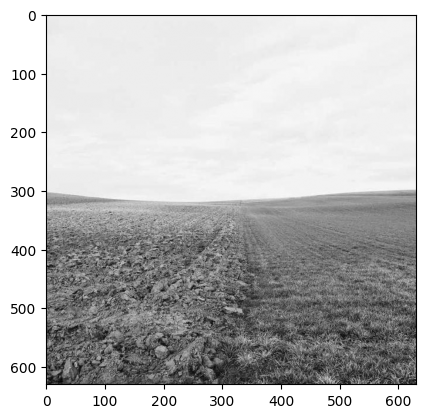

In [23]:
# Convert bytes to numpy array
jpeg_bytes = base64.b64decode(b64_str_2) #decoding encoded JPEG into JPEG_BYTES
print(jpeg_bytes)
arr = np.frombuffer(jpeg_bytes, dtype=np.uint8)

# Decode as image (BGR format) from the bytes
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)

img_gray_2 = RGB_to_Grayscale(BGR_to_RGB_numpy(img))


plt.imshow(img_gray_2,cmap="gray")
plt.show()

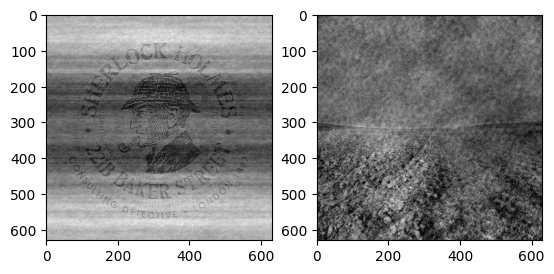

In [24]:
f_shift_2=np.fft.fftshift(np.fft.fft2(img_gray_2))
phase_only_2 = f_shift_2/np.abs(f_shift_2)
mag_only_2 = np.abs(f_shift_2)

f_shift_2=np.fft.fftshift(np.fft.fft2(img_gray_2))
phase_only_2 = f_shift_2/np.abs(f_shift_2)
mag_only_2 = np.abs(f_shift_2)



reconstruction_1 = np.abs(np.fft.ifft2(np.fft.ifftshift(mag_only_2*phase_only)))
reconstruction_2 = np.abs(np.fft.ifft2(np.fft.ifftshift(mag_only*phase_only_2)))

plt.subplot(1,2,1)
plt.imshow(reconstruction_1,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction_2,cmap="gray")
plt.show()

# yes this demostration shows that phase describes the structure as
# in both the images the shape of the image is described the phase part
# and the magnitude desscribes the texture of image